In [9]:
#conda install pip

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\bhavi\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - pip


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |           py37_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following packages will be UPDATED:

  conda                                       4.7.12-py37_0 --> 4.8.4-py37_0




conda-4.8.4          | 2.9 MB    |            |   0% 
conda-4.8.4          | 2.9 MB    |            |   1% 
conda-4.8.4          | 2.9 MB    | ####6      |  47% 
conda-4.8.4          | 2.9 MB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to r

In [12]:
#pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/a3/de/c648ef6835192e6e2cc03f40b19eeda4382c49b5bafb43d88b931c4c74ac/google_pasta-0.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/61/51/046cbc61c7607e5ecead6ff1a9453fba5e7e47a5ea8d608cc7036586a5ef/scipy-1.4.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/8a/48/a76be51647d0eb9f10e2a4511bf3ffb8cc1e6b14e9e4fab46173aa79f981/termcolor-1.1.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/7b/b8/88def36e74bee9fce511c9519571f4e485e890093ab7442284f4ffaef60b/google_auth_oauthlib-0.4.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/95/de/214830a981892a3e286c3794f41ae67a4495df1108c3da8a9f62159b9a9d/pyasn1_modules-0.2.8-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a3/12/b92740d845ab62ea4edf04d2f4164d82532b5a0b03836d4d4e71c6f3d379/requests_oauthlib-1.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonho

In [2]:
import pandas as pd

#### Reading dataset into a pandas dataframe

In [3]:
df = pd.read_csv("hour.csv")

In [3]:
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

#### Dropping unnecessary columns which we will not be using as inputs, such as 'instant', 'date', 'casual', 'registered'

In [4]:
y = df.cnt
df = df.drop(columns=['instant', 'dteday','casual','registered','cnt'])

In [5]:
df.head()

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   
3       1   0     1   3        0        6           0           1  0.24   
4       1   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  
0  0.2879  0.81        0.0  
1  0.2727  0.80        0.0  
2  0.2727  0.80        0.0  
3  0.2879  0.75        0.0  
4  0.2879  0.75        0.0

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y, test_size=0.2, random_state=42, shuffle=True)

In [44]:
len(x_train)

13903

In [50]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 2*len(x_train.columns), activation = 'sigmoid', input_shape = (len(x_train.columns),)))
#model.add(tf.keras.layers.Dense(units = 2*len(x_train.columns), activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [51]:
fitted_model = model.fit(x_train, y_train, epochs =25000, validation_data=(x_test,y_test), batch_size = len(x_train))

Epoch 1/25000
1/1 [==============================] - 0s 204ms/step - loss: 69329.5938 - mse: 69329.5938 - val_loss: 65698.5469 - val_mse: 65698.5469
Epoch 2/25000
1/1 [==============================] - 0s 26ms/step - loss: 69320.4297 - mse: 69320.4297 - val_loss: 65689.6172 - val_mse: 65689.6172
Epoch 3/25000
1/1 [==============================] - 0s 32ms/step - loss: 69311.2656 - mse: 69311.2656 - val_loss: 65680.6875 - val_mse: 65680.6875
Epoch 4/25000
1/1 [==============================] - 0s 24ms/step - loss: 69302.0859 - mse: 69302.0859 - val_loss: 65671.7578 - val_mse: 65671.7578
Epoch 5/25000
1/1 [==============================] - 0s 32ms/step - loss: 69292.9219 - mse: 69292.9219 - val_loss: 65662.8203 - val_mse: 65662.8203
Epoch 6/25000
1/1 [==============================] - 0s 33ms/step - loss: 69283.7344 - mse: 69283.7344 - val_loss: 65653.8828 - val_mse: 65653.8828
Epoch 7/25000
1/1 [==============================] - 0s 26ms/step - loss: 69274.5312 - mse: 69274.5312 - val_lo

1/1 [==============================] - 0s 26ms/step - loss: 68810.4922 - mse: 68810.4922 - val_loss: 65193.3008 - val_mse: 65193.3008
Epoch 57/25000
1/1 [==============================] - 0s 29ms/step - loss: 68800.6875 - mse: 68800.6875 - val_loss: 65183.7695 - val_mse: 65183.7695
Epoch 58/25000
1/1 [==============================] - 0s 26ms/step - loss: 68790.8750 - mse: 68790.8750 - val_loss: 65174.2188 - val_mse: 65174.2188
Epoch 59/25000
1/1 [==============================] - 0s 25ms/step - loss: 68781.0391 - mse: 68781.0391 - val_loss: 65164.6602 - val_mse: 65164.6602
Epoch 60/25000
1/1 [==============================] - 0s 28ms/step - loss: 68771.1953 - mse: 68771.1953 - val_loss: 65155.0781 - val_mse: 65155.0781
Epoch 61/25000
1/1 [==============================] - 0s 20ms/step - loss: 68761.3281 - mse: 68761.3281 - val_loss: 65145.4922 - val_mse: 65145.4922
Epoch 62/25000
1/1 [==============================] - 0s 27ms/step - loss: 68751.4531 - mse: 68751.4531 - val_loss: 65135

1/1 [==============================] - 0s 29ms/step - loss: 68228.8125 - mse: 68228.8125 - val_loss: 64627.1641 - val_mse: 64627.1641
Epoch 112/25000
1/1 [==============================] - 0s 35ms/step - loss: 68216.9688 - mse: 68216.9688 - val_loss: 64615.6562 - val_mse: 64615.6562
Epoch 113/25000
1/1 [==============================] - 0s 31ms/step - loss: 68205.0547 - mse: 68205.0547 - val_loss: 64604.0820 - val_mse: 64604.0820
Epoch 114/25000
1/1 [==============================] - 0s 32ms/step - loss: 68193.0938 - mse: 68193.0938 - val_loss: 64592.4688 - val_mse: 64592.4688
Epoch 115/25000
1/1 [==============================] - 0s 31ms/step - loss: 68181.1094 - mse: 68181.1094 - val_loss: 64580.8242 - val_mse: 64580.8242
Epoch 116/25000
1/1 [==============================] - 0s 30ms/step - loss: 68169.0625 - mse: 68169.0625 - val_loss: 64569.1289 - val_mse: 64569.1289
Epoch 117/25000
1/1 [==============================] - 0s 29ms/step - loss: 68156.9766 - mse: 68156.9766 - val_loss:

Epoch 166/25000
1/1 [==============================] - 0s 31ms/step - loss: 67539.0938 - mse: 67539.0938 - val_loss: 63958.2344 - val_mse: 63958.2344
Epoch 167/25000
1/1 [==============================] - 0s 35ms/step - loss: 67526.7266 - mse: 67526.7266 - val_loss: 63946.2695 - val_mse: 63946.2695
Epoch 168/25000
1/1 [==============================] - 0s 30ms/step - loss: 67514.4219 - mse: 67514.4219 - val_loss: 63934.3438 - val_mse: 63934.3438
Epoch 169/25000
1/1 [==============================] - 0s 30ms/step - loss: 67502.1328 - mse: 67502.1328 - val_loss: 63922.4570 - val_mse: 63922.4570
Epoch 170/25000
1/1 [==============================] - 0s 31ms/step - loss: 67489.9062 - mse: 67489.9062 - val_loss: 63910.6094 - val_mse: 63910.6094
Epoch 171/25000
1/1 [==============================] - 0s 30ms/step - loss: 67477.7266 - mse: 67477.7266 - val_loss: 63898.8086 - val_mse: 63898.8086
Epoch 172/25000
1/1 [==============================] - 0s 31ms/step - loss: 67465.5781 - mse: 67465.

Epoch 275/25000
1/1 [==============================] - 0s 36ms/step - loss: 66411.2266 - mse: 66411.2266 - val_loss: 62867.3203 - val_mse: 62867.3203
Epoch 276/25000
1/1 [==============================] - 0s 31ms/step - loss: 66402.4531 - mse: 66402.4531 - val_loss: 62858.8359 - val_mse: 62858.8359
Epoch 277/25000
1/1 [==============================] - 0s 25ms/step - loss: 66393.6953 - mse: 66393.6953 - val_loss: 62850.3633 - val_mse: 62850.3633
Epoch 278/25000
1/1 [==============================] - 0s 30ms/step - loss: 66384.9688 - mse: 66384.9688 - val_loss: 62841.9258 - val_mse: 62841.9258
Epoch 279/25000
1/1 [==============================] - 0s 29ms/step - loss: 66376.2500 - mse: 66376.2500 - val_loss: 62833.4766 - val_mse: 62833.4766
Epoch 280/25000
1/1 [==============================] - 0s 30ms/step - loss: 66367.5547 - mse: 66367.5547 - val_loss: 62825.0586 - val_mse: 62825.0586
Epoch 281/25000
1/1 [==============================] - 0s 27ms/step - loss: 66358.8516 - mse: 66358.

Epoch 384/25000
1/1 [==============================] - 0s 24ms/step - loss: 65528.1562 - mse: 65528.1562 - val_loss: 62012.5312 - val_mse: 62012.5312
Epoch 385/25000
1/1 [==============================] - 0s 26ms/step - loss: 65520.5312 - mse: 65520.5312 - val_loss: 62005.1562 - val_mse: 62005.1562
Epoch 386/25000
1/1 [==============================] - 0s 30ms/step - loss: 65512.9297 - mse: 65512.9297 - val_loss: 61997.7891 - val_mse: 61997.7891
Epoch 387/25000
1/1 [==============================] - 0s 28ms/step - loss: 65505.3242 - mse: 65505.3242 - val_loss: 61990.4258 - val_mse: 61990.4258
Epoch 388/25000
1/1 [==============================] - 0s 29ms/step - loss: 65497.7344 - mse: 65497.7344 - val_loss: 61983.0742 - val_mse: 61983.0742
Epoch 389/25000
1/1 [==============================] - 0s 31ms/step - loss: 65490.1406 - mse: 65490.1406 - val_loss: 61975.7383 - val_mse: 61975.7383
Epoch 390/25000
1/1 [==============================] - 0s 30ms/step - loss: 65482.5664 - mse: 65482.

Epoch 493/25000
1/1 [==============================] - 0s 25ms/step - loss: 64712.4453 - mse: 64712.4453 - val_loss: 61222.7148 - val_mse: 61222.7148
Epoch 494/25000
1/1 [==============================] - 0s 25ms/step - loss: 64705.3125 - mse: 64705.3125 - val_loss: 61215.8164 - val_mse: 61215.8164
Epoch 495/25000
1/1 [==============================] - 0s 28ms/step - loss: 64698.1719 - mse: 64698.1719 - val_loss: 61208.9219 - val_mse: 61208.9219
Epoch 496/25000
1/1 [==============================] - 0s 29ms/step - loss: 64691.0586 - mse: 64691.0586 - val_loss: 61202.0234 - val_mse: 61202.0234
Epoch 497/25000
1/1 [==============================] - 0s 31ms/step - loss: 64683.9492 - mse: 64683.9492 - val_loss: 61195.1445 - val_mse: 61195.1445
Epoch 498/25000
1/1 [==============================] - 0s 33ms/step - loss: 64676.8359 - mse: 64676.8359 - val_loss: 61188.2539 - val_mse: 61188.2539
Epoch 499/25000
1/1 [==============================] - 0s 33ms/step - loss: 64669.7188 - mse: 64669.

Epoch 602/25000
1/1 [==============================] - 0s 25ms/step - loss: 63960.1914 - mse: 63960.1914 - val_loss: 60494.6094 - val_mse: 60494.6094
Epoch 603/25000
1/1 [==============================] - 0s 31ms/step - loss: 63953.4688 - mse: 63953.4688 - val_loss: 60488.1016 - val_mse: 60488.1016
Epoch 604/25000
1/1 [==============================] - 0s 29ms/step - loss: 63946.7383 - mse: 63946.7383 - val_loss: 60481.5898 - val_mse: 60481.5898
Epoch 605/25000
1/1 [==============================] - 0s 27ms/step - loss: 63940.0312 - mse: 63940.0312 - val_loss: 60475.0898 - val_mse: 60475.0898
Epoch 606/25000
1/1 [==============================] - 0s 30ms/step - loss: 63933.3086 - mse: 63933.3086 - val_loss: 60468.5898 - val_mse: 60468.5898
Epoch 607/25000
1/1 [==============================] - 0s 29ms/step - loss: 63926.5938 - mse: 63926.5938 - val_loss: 60462.0938 - val_mse: 60462.0938
Epoch 608/25000
1/1 [==============================] - 0s 30ms/step - loss: 63919.8828 - mse: 63919.

Epoch 711/25000
1/1 [==============================] - 0s 36ms/step - loss: 63241.1328 - mse: 63241.1328 - val_loss: 59798.7461 - val_mse: 59798.7461
Epoch 712/25000
1/1 [==============================] - 0s 28ms/step - loss: 63234.6484 - mse: 63234.6484 - val_loss: 59792.4688 - val_mse: 59792.4688
Epoch 713/25000
1/1 [==============================] - 0s 29ms/step - loss: 63228.1641 - mse: 63228.1641 - val_loss: 59786.2148 - val_mse: 59786.2148
Epoch 714/25000
1/1 [==============================] - 0s 33ms/step - loss: 63221.6875 - mse: 63221.6875 - val_loss: 59779.9375 - val_mse: 59779.9375
Epoch 715/25000
1/1 [==============================] - 0s 32ms/step - loss: 63215.2148 - mse: 63215.2148 - val_loss: 59773.6797 - val_mse: 59773.6797
Epoch 716/25000
1/1 [==============================] - 0s 29ms/step - loss: 63208.7422 - mse: 63208.7422 - val_loss: 59767.4102 - val_mse: 59767.4102
Epoch 717/25000
1/1 [==============================] - 0s 30ms/step - loss: 63202.2734 - mse: 63202.

Epoch 820/25000
1/1 [==============================] - 0s 33ms/step - loss: 62545.3242 - mse: 62545.3242 - val_loss: 59125.6289 - val_mse: 59125.6289
Epoch 821/25000
1/1 [==============================] - 0s 32ms/step - loss: 62539.0430 - mse: 62539.0430 - val_loss: 59119.5352 - val_mse: 59119.5352
Epoch 822/25000
1/1 [==============================] - 0s 35ms/step - loss: 62532.7461 - mse: 62532.7461 - val_loss: 59113.4492 - val_mse: 59113.4492
Epoch 823/25000
1/1 [==============================] - 0s 53ms/step - loss: 62526.4688 - mse: 62526.4688 - val_loss: 59107.3750 - val_mse: 59107.3750
Epoch 824/25000
1/1 [==============================] - 0s 32ms/step - loss: 62520.1797 - mse: 62520.1797 - val_loss: 59101.2930 - val_mse: 59101.2930
Epoch 825/25000
1/1 [==============================] - 0s 35ms/step - loss: 62513.8984 - mse: 62513.8984 - val_loss: 59095.2070 - val_mse: 59095.2070
Epoch 826/25000
1/1 [==============================] - 0s 34ms/step - loss: 62507.6016 - mse: 62507.

Epoch 929/25000
1/1 [==============================] - 0s 33ms/step - loss: 61868.4414 - mse: 61868.4414 - val_loss: 58471.0234 - val_mse: 58471.0234
Epoch 930/25000
1/1 [==============================] - 0s 33ms/step - loss: 61862.3086 - mse: 61862.3086 - val_loss: 58465.0898 - val_mse: 58465.0898
Epoch 931/25000
1/1 [==============================] - 0s 33ms/step - loss: 61856.1680 - mse: 61856.1680 - val_loss: 58459.1641 - val_mse: 58459.1641
Epoch 932/25000
1/1 [==============================] - 0s 31ms/step - loss: 61850.0469 - mse: 61850.0469 - val_loss: 58453.2383 - val_mse: 58453.2383
Epoch 933/25000
1/1 [==============================] - 0s 31ms/step - loss: 61843.9141 - mse: 61843.9141 - val_loss: 58447.3086 - val_mse: 58447.3086
Epoch 934/25000
1/1 [==============================] - 0s 31ms/step - loss: 61837.7930 - mse: 61837.7930 - val_loss: 58441.3945 - val_mse: 58441.3945
Epoch 935/25000
1/1 [==============================] - 0s 31ms/step - loss: 61831.6602 - mse: 61831.

1/1 [==============================] - 0s 24ms/step - loss: 61213.8125 - mse: 61213.8125 - val_loss: 57838.1953 - val_mse: 57838.1953
Epoch 1038/25000
1/1 [==============================] - 0s 29ms/step - loss: 61207.8164 - mse: 61207.8164 - val_loss: 57832.3945 - val_mse: 57832.3945
Epoch 1039/25000
1/1 [==============================] - 0s 30ms/step - loss: 61201.8242 - mse: 61201.8242 - val_loss: 57826.6094 - val_mse: 57826.6094
Epoch 1040/25000
1/1 [==============================] - 0s 30ms/step - loss: 61195.8398 - mse: 61195.8398 - val_loss: 57820.8242 - val_mse: 57820.8242
Epoch 1041/25000
1/1 [==============================] - 0s 27ms/step - loss: 61189.8477 - mse: 61189.8477 - val_loss: 57815.0352 - val_mse: 57815.0352
Epoch 1042/25000
1/1 [==============================] - 0s 25ms/step - loss: 61183.8516 - mse: 61183.8516 - val_loss: 57809.2422 - val_mse: 57809.2422
Epoch 1043/25000
1/1 [==============================] - 0s 27ms/step - loss: 61177.8789 - mse: 61177.8789 - val

1/1 [==============================] - 0s 21ms/step - loss: 60573.4414 - mse: 60573.4414 - val_loss: 57219.3867 - val_mse: 57219.3867
Epoch 1146/25000
1/1 [==============================] - 0s 24ms/step - loss: 60567.5781 - mse: 60567.5781 - val_loss: 57213.7188 - val_mse: 57213.7188
Epoch 1147/25000
1/1 [==============================] - 0s 23ms/step - loss: 60561.7031 - mse: 60561.7031 - val_loss: 57208.0547 - val_mse: 57208.0547
Epoch 1148/25000
1/1 [==============================] - 0s 20ms/step - loss: 60555.8477 - mse: 60555.8477 - val_loss: 57202.3906 - val_mse: 57202.3906
Epoch 1149/25000
1/1 [==============================] - 0s 22ms/step - loss: 60549.9922 - mse: 60549.9922 - val_loss: 57196.7188 - val_mse: 57196.7188
Epoch 1150/25000
1/1 [==============================] - 0s 24ms/step - loss: 60544.1211 - mse: 60544.1211 - val_loss: 57191.0469 - val_mse: 57191.0469
Epoch 1151/25000
1/1 [==============================] - 0s 31ms/step - loss: 60538.2773 - mse: 60538.2773 - val

1/1 [==============================] - 0s 32ms/step - loss: 59946.0391 - mse: 59946.0391 - val_loss: 56613.3438 - val_mse: 56613.3438
Epoch 1254/25000
1/1 [==============================] - 0s 32ms/step - loss: 59940.2891 - mse: 59940.2891 - val_loss: 56607.7773 - val_mse: 56607.7773
Epoch 1255/25000
1/1 [==============================] - 0s 32ms/step - loss: 59934.5469 - mse: 59934.5469 - val_loss: 56602.2227 - val_mse: 56602.2227
Epoch 1256/25000
1/1 [==============================] - 0s 28ms/step - loss: 59928.7891 - mse: 59928.7891 - val_loss: 56596.6719 - val_mse: 56596.6719
Epoch 1257/25000
1/1 [==============================] - 0s 22ms/step - loss: 59923.0391 - mse: 59923.0391 - val_loss: 56591.1250 - val_mse: 56591.1250
Epoch 1258/25000
1/1 [==============================] - 0s 25ms/step - loss: 59917.2930 - mse: 59917.2930 - val_loss: 56585.5664 - val_mse: 56585.5664
Epoch 1259/25000
1/1 [==============================] - 0s 27ms/step - loss: 59911.5430 - mse: 59911.5430 - val

1/1 [==============================] - 0s 28ms/step - loss: 59330.2422 - mse: 59330.2422 - val_loss: 56018.7266 - val_mse: 56018.7266
Epoch 1362/25000
1/1 [==============================] - 0s 28ms/step - loss: 59324.5898 - mse: 59324.5898 - val_loss: 56013.2617 - val_mse: 56013.2617
Epoch 1363/25000
1/1 [==============================] - 0s 31ms/step - loss: 59318.9219 - mse: 59318.9219 - val_loss: 56007.7969 - val_mse: 56007.7969
Epoch 1364/25000
1/1 [==============================] - 0s 29ms/step - loss: 59313.2734 - mse: 59313.2734 - val_loss: 56002.3398 - val_mse: 56002.3398
Epoch 1365/25000
1/1 [==============================] - 0s 29ms/step - loss: 59307.6211 - mse: 59307.6211 - val_loss: 55996.8828 - val_mse: 55996.8828
Epoch 1366/25000
1/1 [==============================] - 0s 31ms/step - loss: 59301.9688 - mse: 59301.9688 - val_loss: 55991.4336 - val_mse: 55991.4336
Epoch 1367/25000
1/1 [==============================] - 0s 28ms/step - loss: 59296.3164 - mse: 59296.3164 - val

1/1 [==============================] - 0s 32ms/step - loss: 58712.8438 - mse: 58712.8438 - val_loss: 55422.2344 - val_mse: 55422.2344
Epoch 1470/25000
1/1 [==============================] - 0s 32ms/step - loss: 58706.6680 - mse: 58706.6680 - val_loss: 55416.2422 - val_mse: 55416.2422
Epoch 1471/25000
1/1 [==============================] - 0s 31ms/step - loss: 58700.4609 - mse: 58700.4609 - val_loss: 55410.2188 - val_mse: 55410.2188
Epoch 1472/25000
1/1 [==============================] - 0s 28ms/step - loss: 58694.2383 - mse: 58694.2383 - val_loss: 55404.1719 - val_mse: 55404.1719
Epoch 1473/25000
1/1 [==============================] - 0s 32ms/step - loss: 58687.9570 - mse: 58687.9570 - val_loss: 55398.0820 - val_mse: 55398.0820
Epoch 1474/25000
1/1 [==============================] - 0s 30ms/step - loss: 58681.6484 - mse: 58681.6484 - val_loss: 55391.9531 - val_mse: 55391.9531
Epoch 1475/25000
1/1 [==============================] - 0s 31ms/step - loss: 58675.3047 - mse: 58675.3047 - val

1/1 [==============================] - 0s 24ms/step - loss: 57957.3555 - mse: 57957.3555 - val_loss: 54692.9375 - val_mse: 54692.9375
Epoch 1578/25000
1/1 [==============================] - 0s 36ms/step - loss: 57950.8242 - mse: 57950.8242 - val_loss: 54686.6562 - val_mse: 54686.6562
Epoch 1579/25000
1/1 [==============================] - 0s 23ms/step - loss: 57944.3008 - mse: 57944.3008 - val_loss: 54680.3672 - val_mse: 54680.3672
Epoch 1580/25000
1/1 [==============================] - 0s 21ms/step - loss: 57937.7812 - mse: 57937.7812 - val_loss: 54674.1094 - val_mse: 54674.1094
Epoch 1581/25000
1/1 [==============================] - 0s 21ms/step - loss: 57931.2930 - mse: 57931.2930 - val_loss: 54667.8398 - val_mse: 54667.8398
Epoch 1582/25000
1/1 [==============================] - 0s 20ms/step - loss: 57924.8008 - mse: 57924.8008 - val_loss: 54661.5898 - val_mse: 54661.5898
Epoch 1583/25000
1/1 [==============================] - 0s 21ms/step - loss: 57918.3125 - mse: 57918.3125 - val

1/1 [==============================] - 0s 27ms/step - loss: 57285.7773 - mse: 57285.7773 - val_loss: 54045.8164 - val_mse: 54045.8164
Epoch 1686/25000
1/1 [==============================] - 0s 31ms/step - loss: 57279.7852 - mse: 57279.7852 - val_loss: 54040.0352 - val_mse: 54040.0352
Epoch 1687/25000
1/1 [==============================] - 0s 46ms/step - loss: 57273.7891 - mse: 57273.7891 - val_loss: 54034.2617 - val_mse: 54034.2617
Epoch 1688/25000
1/1 [==============================] - 0s 47ms/step - loss: 57267.7812 - mse: 57267.7812 - val_loss: 54028.4727 - val_mse: 54028.4727
Epoch 1689/25000
1/1 [==============================] - 0s 44ms/step - loss: 57261.7930 - mse: 57261.7930 - val_loss: 54022.7070 - val_mse: 54022.7070
Epoch 1690/25000
1/1 [==============================] - 0s 47ms/step - loss: 57255.8203 - mse: 57255.8203 - val_loss: 54016.9141 - val_mse: 54016.9141
Epoch 1691/25000
1/1 [==============================] - 0s 43ms/step - loss: 57249.7891 - mse: 57249.7891 - val

1/1 [==============================] - 0s 29ms/step - loss: 56651.8242 - mse: 56651.8242 - val_loss: 53435.0195 - val_mse: 53435.0195
Epoch 1794/25000
1/1 [==============================] - 0s 46ms/step - loss: 56646.0820 - mse: 56646.0820 - val_loss: 53429.4688 - val_mse: 53429.4688
Epoch 1795/25000
1/1 [==============================] - 0s 44ms/step - loss: 56640.3281 - mse: 56640.3281 - val_loss: 53423.8711 - val_mse: 53423.8711
Epoch 1796/25000
1/1 [==============================] - 0s 51ms/step - loss: 56634.4297 - mse: 56634.4297 - val_loss: 53418.3828 - val_mse: 53418.3828
Epoch 1797/25000
1/1 [==============================] - 0s 30ms/step - loss: 56628.8281 - mse: 56628.8281 - val_loss: 53412.8438 - val_mse: 53412.8438
Epoch 1798/25000
1/1 [==============================] - 0s 31ms/step - loss: 56623.0625 - mse: 56623.0625 - val_loss: 53407.3047 - val_mse: 53407.3047
Epoch 1799/25000
1/1 [==============================] - 0s 34ms/step - loss: 56617.3320 - mse: 56617.3320 - val

1/1 [==============================] - 0s 28ms/step - loss: 56039.7070 - mse: 56039.7070 - val_loss: 52845.4609 - val_mse: 52845.4609
Epoch 1902/25000
1/1 [==============================] - 0s 29ms/step - loss: 56034.1055 - mse: 56034.1055 - val_loss: 52840.0781 - val_mse: 52840.0781
Epoch 1903/25000
1/1 [==============================] - 0s 32ms/step - loss: 56028.5508 - mse: 56028.5508 - val_loss: 52834.7070 - val_mse: 52834.7070
Epoch 1904/25000
1/1 [==============================] - 0s 32ms/step - loss: 56022.9102 - mse: 56022.9102 - val_loss: 52829.3203 - val_mse: 52829.3203
Epoch 1905/25000
1/1 [==============================] - 0s 29ms/step - loss: 56017.3594 - mse: 56017.3594 - val_loss: 52823.9492 - val_mse: 52823.9492
Epoch 1906/25000
1/1 [==============================] - 0s 30ms/step - loss: 56011.7969 - mse: 56011.7969 - val_loss: 52818.5742 - val_mse: 52818.5742
Epoch 1907/25000
1/1 [==============================] - 0s 27ms/step - loss: 56006.1992 - mse: 56006.1992 - val

1/1 [==============================] - 0s 33ms/step - loss: 55437.9336 - mse: 55437.9336 - val_loss: 52265.8008 - val_mse: 52265.8008
Epoch 2010/25000
1/1 [==============================] - 0s 31ms/step - loss: 55432.1211 - mse: 55432.1211 - val_loss: 52260.1875 - val_mse: 52260.1875
Epoch 2011/25000
1/1 [==============================] - 0s 32ms/step - loss: 55426.2383 - mse: 55426.2383 - val_loss: 52254.5781 - val_mse: 52254.5781
Epoch 2012/25000
1/1 [==============================] - 0s 27ms/step - loss: 55420.4727 - mse: 55420.4727 - val_loss: 52248.9297 - val_mse: 52248.9297
Epoch 2013/25000
1/1 [==============================] - 0s 28ms/step - loss: 55414.5898 - mse: 55414.5898 - val_loss: 52243.2500 - val_mse: 52243.2500
Epoch 2014/25000
1/1 [==============================] - 0s 26ms/step - loss: 55408.6992 - mse: 55408.6992 - val_loss: 52237.5469 - val_mse: 52237.5469
Epoch 2015/25000
1/1 [==============================] - 0s 26ms/step - loss: 55402.7695 - mse: 55402.7695 - val

1/1 [==============================] - 0s 25ms/step - loss: 54677.0664 - mse: 54677.0664 - val_loss: 51532.9727 - val_mse: 51532.9727
Epoch 2118/25000
1/1 [==============================] - 0s 29ms/step - loss: 54670.5938 - mse: 54670.5938 - val_loss: 51526.7461 - val_mse: 51526.7461
Epoch 2119/25000
1/1 [==============================] - 0s 36ms/step - loss: 54664.1289 - mse: 54664.1289 - val_loss: 51520.5391 - val_mse: 51520.5391
Epoch 2120/25000
1/1 [==============================] - 0s 28ms/step - loss: 54657.6758 - mse: 54657.6758 - val_loss: 51514.3438 - val_mse: 51514.3438
Epoch 2121/25000
1/1 [==============================] - 0s 31ms/step - loss: 54651.2266 - mse: 54651.2266 - val_loss: 51508.1523 - val_mse: 51508.1523
Epoch 2122/25000
1/1 [==============================] - 0s 34ms/step - loss: 54644.7969 - mse: 54644.7969 - val_loss: 51501.9688 - val_mse: 51501.9688
Epoch 2123/25000
1/1 [==============================] - 0s 27ms/step - loss: 54638.3789 - mse: 54638.3789 - val

1/1 [==============================] - 0s 21ms/step - loss: 53993.8047 - mse: 53993.8047 - val_loss: 50875.1719 - val_mse: 50875.1719
Epoch 2226/25000
1/1 [==============================] - 0s 27ms/step - loss: 53986.5820 - mse: 53986.5820 - val_loss: 50868.1641 - val_mse: 50868.1641
Epoch 2227/25000
1/1 [==============================] - 0s 35ms/step - loss: 53979.2930 - mse: 53979.2930 - val_loss: 50861.1016 - val_mse: 50861.1016
Epoch 2228/25000
1/1 [==============================] - 0s 22ms/step - loss: 53971.9453 - mse: 53971.9453 - val_loss: 50853.9805 - val_mse: 50853.9805
Epoch 2229/25000
1/1 [==============================] - 0s 31ms/step - loss: 53964.5547 - mse: 53964.5547 - val_loss: 50846.8086 - val_mse: 50846.8086
Epoch 2230/25000
1/1 [==============================] - 0s 33ms/step - loss: 53957.0664 - mse: 53957.0664 - val_loss: 50839.5664 - val_mse: 50839.5664
Epoch 2231/25000
1/1 [==============================] - 0s 40ms/step - loss: 53949.5742 - mse: 53949.5742 - val

1/1 [==============================] - 0s 28ms/step - loss: 53210.7422 - mse: 53210.7422 - val_loss: 50123.3008 - val_mse: 50123.3008
Epoch 2334/25000
1/1 [==============================] - 0s 27ms/step - loss: 53204.1953 - mse: 53204.1953 - val_loss: 50117.0117 - val_mse: 50117.0117
Epoch 2335/25000
1/1 [==============================] - 0s 37ms/step - loss: 53197.6484 - mse: 53197.6484 - val_loss: 50110.7383 - val_mse: 50110.7383
Epoch 2336/25000
1/1 [==============================] - 0s 39ms/step - loss: 53191.1211 - mse: 53191.1211 - val_loss: 50104.4688 - val_mse: 50104.4688
Epoch 2337/25000
1/1 [==============================] - 0s 29ms/step - loss: 53184.5938 - mse: 53184.5938 - val_loss: 50098.1992 - val_mse: 50098.1992
Epoch 2338/25000
1/1 [==============================] - 0s 24ms/step - loss: 53178.0742 - mse: 53178.0742 - val_loss: 50091.9414 - val_mse: 50091.9414
Epoch 2339/25000
1/1 [==============================] - 0s 25ms/step - loss: 53171.5625 - mse: 53171.5625 - val

1/1 [==============================] - 0s 34ms/step - loss: 52464.9180 - mse: 52464.9180 - val_loss: 49406.1641 - val_mse: 49406.1641
Epoch 2442/25000
1/1 [==============================] - 0s 31ms/step - loss: 52457.3750 - mse: 52457.3750 - val_loss: 49398.9336 - val_mse: 49398.9336
Epoch 2443/25000
1/1 [==============================] - 0s 31ms/step - loss: 52449.8398 - mse: 52449.8398 - val_loss: 49391.7188 - val_mse: 49391.7188
Epoch 2444/25000
1/1 [==============================] - 0s 30ms/step - loss: 52442.3125 - mse: 52442.3125 - val_loss: 49384.5156 - val_mse: 49384.5156
Epoch 2445/25000
1/1 [==============================] - 0s 22ms/step - loss: 52434.8242 - mse: 52434.8242 - val_loss: 49377.3398 - val_mse: 49377.3398
Epoch 2446/25000
1/1 [==============================] - 0s 23ms/step - loss: 52427.3320 - mse: 52427.3320 - val_loss: 49370.1758 - val_mse: 49370.1758
Epoch 2447/25000
1/1 [==============================] - 0s 28ms/step - loss: 52419.8750 - mse: 52419.8750 - val

1/1 [==============================] - 0s 31ms/step - loss: 51726.1133 - mse: 51726.1133 - val_loss: 48698.4180 - val_mse: 48698.4180
Epoch 2550/25000
1/1 [==============================] - 0s 28ms/step - loss: 51719.7227 - mse: 51719.7227 - val_loss: 48692.2930 - val_mse: 48692.2930
Epoch 2551/25000
1/1 [==============================] - 0s 28ms/step - loss: 51713.3633 - mse: 51713.3633 - val_loss: 48686.1953 - val_mse: 48686.1953
Epoch 2552/25000
1/1 [==============================] - 0s 31ms/step - loss: 51706.9883 - mse: 51706.9883 - val_loss: 48680.0938 - val_mse: 48680.0938
Epoch 2553/25000
1/1 [==============================] - 0s 28ms/step - loss: 51700.6211 - mse: 51700.6211 - val_loss: 48674.0039 - val_mse: 48674.0039
Epoch 2554/25000
1/1 [==============================] - 0s 28ms/step - loss: 51694.2734 - mse: 51694.2734 - val_loss: 48667.9062 - val_mse: 48667.9062
Epoch 2555/25000
1/1 [==============================] - 0s 29ms/step - loss: 51687.9258 - mse: 51687.9258 - val

1/1 [==============================] - 0s 24ms/step - loss: 51062.9258 - mse: 51062.9258 - val_loss: 48063.0469 - val_mse: 48063.0469
Epoch 2658/25000
1/1 [==============================] - 0s 22ms/step - loss: 51056.9922 - mse: 51056.9922 - val_loss: 48057.3672 - val_mse: 48057.3672
Epoch 2659/25000
1/1 [==============================] - 0s 24ms/step - loss: 51051.0547 - mse: 51051.0547 - val_loss: 48051.6719 - val_mse: 48051.6719
Epoch 2660/25000
1/1 [==============================] - 0s 29ms/step - loss: 51045.1172 - mse: 51045.1172 - val_loss: 48045.9883 - val_mse: 48045.9883
Epoch 2661/25000
1/1 [==============================] - 0s 28ms/step - loss: 51039.1875 - mse: 51039.1875 - val_loss: 48040.3125 - val_mse: 48040.3125
Epoch 2662/25000
1/1 [==============================] - 0s 32ms/step - loss: 51033.2617 - mse: 51033.2617 - val_loss: 48034.6328 - val_mse: 48034.6328
Epoch 2663/25000
1/1 [==============================] - 0s 29ms/step - loss: 51027.3398 - mse: 51027.3398 - val

1/1 [==============================] - 0s 18ms/step - loss: 50437.4688 - mse: 50437.4688 - val_loss: 47464.1602 - val_mse: 47464.1602
Epoch 2766/25000
1/1 [==============================] - 0s 31ms/step - loss: 50431.8164 - mse: 50431.8164 - val_loss: 47458.7461 - val_mse: 47458.7461
Epoch 2767/25000
1/1 [==============================] - 0s 38ms/step - loss: 50426.1602 - mse: 50426.1602 - val_loss: 47453.3438 - val_mse: 47453.3438
Epoch 2768/25000
1/1 [==============================] - 0s 27ms/step - loss: 50420.5117 - mse: 50420.5117 - val_loss: 47447.9297 - val_mse: 47447.9297
Epoch 2769/25000
1/1 [==============================] - 0s 19ms/step - loss: 50414.8672 - mse: 50414.8672 - val_loss: 47442.5273 - val_mse: 47442.5273
Epoch 2770/25000
1/1 [==============================] - 0s 18ms/step - loss: 50409.2227 - mse: 50409.2227 - val_loss: 47437.1172 - val_mse: 47437.1172
Epoch 2771/25000
1/1 [==============================] - 0s 25ms/step - loss: 50403.5781 - mse: 50403.5781 - val

1/1 [==============================] - 0s 35ms/step - loss: 49839.0039 - mse: 49839.0039 - val_loss: 46891.5312 - val_mse: 46891.5312
Epoch 2874/25000
1/1 [==============================] - 0s 32ms/step - loss: 49833.5781 - mse: 49833.5781 - val_loss: 46886.3398 - val_mse: 46886.3398
Epoch 2875/25000
1/1 [==============================] - 0s 30ms/step - loss: 49828.1445 - mse: 49828.1445 - val_loss: 46881.1406 - val_mse: 46881.1406
Epoch 2876/25000
1/1 [==============================] - 0s 29ms/step - loss: 49822.7148 - mse: 49822.7148 - val_loss: 46875.9492 - val_mse: 46875.9492
Epoch 2877/25000
1/1 [==============================] - 0s 27ms/step - loss: 49817.2852 - mse: 49817.2852 - val_loss: 46870.7539 - val_mse: 46870.7539
Epoch 2878/25000
1/1 [==============================] - 0s 27ms/step - loss: 49811.8672 - mse: 49811.8672 - val_loss: 46865.5664 - val_mse: 46865.5664
Epoch 2879/25000
1/1 [==============================] - 0s 30ms/step - loss: 49806.4375 - mse: 49806.4375 - val

1/1 [==============================] - 0s 26ms/step - loss: 49262.3984 - mse: 49262.3984 - val_loss: 46340.2305 - val_mse: 46340.2305
Epoch 2982/25000
1/1 [==============================] - 0s 30ms/step - loss: 49257.1602 - mse: 49257.1602 - val_loss: 46335.2109 - val_mse: 46335.2109
Epoch 2983/25000
1/1 [==============================] - 0s 41ms/step - loss: 49251.9102 - mse: 49251.9102 - val_loss: 46330.1992 - val_mse: 46330.1992
Epoch 2984/25000
1/1 [==============================] - 0s 31ms/step - loss: 49246.6758 - mse: 49246.6758 - val_loss: 46325.1875 - val_mse: 46325.1875
Epoch 2985/25000
1/1 [==============================] - 0s 29ms/step - loss: 49241.4258 - mse: 49241.4258 - val_loss: 46320.1758 - val_mse: 46320.1758
Epoch 2986/25000
1/1 [==============================] - 0s 29ms/step - loss: 49236.1875 - mse: 49236.1875 - val_loss: 46315.1719 - val_mse: 46315.1719
Epoch 2987/25000
1/1 [==============================] - 0s 31ms/step - loss: 49230.9453 - mse: 49230.9453 - val

1/1 [==============================] - 0s 28ms/step - loss: 48704.6094 - mse: 48704.6094 - val_loss: 45807.3203 - val_mse: 45807.3203
Epoch 3090/25000
1/1 [==============================] - 0s 32ms/step - loss: 48699.5195 - mse: 48699.5195 - val_loss: 45802.4688 - val_mse: 45802.4688
Epoch 3091/25000
1/1 [==============================] - 0s 26ms/step - loss: 48694.4375 - mse: 48694.4375 - val_loss: 45797.6094 - val_mse: 45797.6094
Epoch 3092/25000
1/1 [==============================] - 0s 29ms/step - loss: 48689.3555 - mse: 48689.3555 - val_loss: 45792.7656 - val_mse: 45792.7656
Epoch 3093/25000
1/1 [==============================] - 0s 33ms/step - loss: 48684.2734 - mse: 48684.2734 - val_loss: 45787.9141 - val_mse: 45787.9141
Epoch 3094/25000
1/1 [==============================] - 0s 33ms/step - loss: 48679.2031 - mse: 48679.2031 - val_loss: 45783.0625 - val_mse: 45783.0625
Epoch 3095/25000
1/1 [==============================] - 0s 29ms/step - loss: 48674.1289 - mse: 48674.1289 - val

1/1 [==============================] - 0s 25ms/step - loss: 48163.6094 - mse: 48163.6094 - val_loss: 45290.8750 - val_mse: 45290.8750
Epoch 3198/25000
1/1 [==============================] - 0s 23ms/step - loss: 48158.6719 - mse: 48158.6719 - val_loss: 45286.1719 - val_mse: 45286.1719
Epoch 3199/25000
1/1 [==============================] - 0s 30ms/step - loss: 48153.7344 - mse: 48153.7344 - val_loss: 45281.4648 - val_mse: 45281.4648
Epoch 3200/25000
1/1 [==============================] - 0s 25ms/step - loss: 48148.8008 - mse: 48148.8008 - val_loss: 45276.7539 - val_mse: 45276.7539
Epoch 3201/25000
1/1 [==============================] - 0s 27ms/step - loss: 48143.8711 - mse: 48143.8711 - val_loss: 45272.0547 - val_mse: 45272.0547
Epoch 3202/25000
1/1 [==============================] - 0s 32ms/step - loss: 48138.9453 - mse: 48138.9453 - val_loss: 45267.3477 - val_mse: 45267.3477
Epoch 3203/25000
1/1 [==============================] - 0s 34ms/step - loss: 48134.0117 - mse: 48134.0117 - val

1/1 [==============================] - 0s 31ms/step - loss: 47637.9531 - mse: 47637.9531 - val_loss: 44789.5117 - val_mse: 44789.5117
Epoch 3306/25000
1/1 [==============================] - 0s 32ms/step - loss: 47633.1602 - mse: 47633.1602 - val_loss: 44784.9375 - val_mse: 44784.9375
Epoch 3307/25000
1/1 [==============================] - 0s 28ms/step - loss: 47628.3633 - mse: 47628.3633 - val_loss: 44780.3672 - val_mse: 44780.3672
Epoch 3308/25000
1/1 [==============================] - 0s 33ms/step - loss: 47623.5508 - mse: 47623.5508 - val_loss: 44775.7891 - val_mse: 44775.7891
Epoch 3309/25000
1/1 [==============================] - 0s 32ms/step - loss: 47618.7500 - mse: 47618.7500 - val_loss: 44771.2188 - val_mse: 44771.2188
Epoch 3310/25000
1/1 [==============================] - 0s 28ms/step - loss: 47613.9844 - mse: 47613.9844 - val_loss: 44766.6484 - val_mse: 44766.6484
Epoch 3311/25000
1/1 [==============================] - 0s 24ms/step - loss: 47609.1836 - mse: 47609.1836 - val

1/1 [==============================] - 0s 26ms/step - loss: 47126.5742 - mse: 47126.5742 - val_loss: 44302.1719 - val_mse: 44302.1719
Epoch 3414/25000
1/1 [==============================] - 0s 25ms/step - loss: 47121.8984 - mse: 47121.8984 - val_loss: 44297.7266 - val_mse: 44297.7266
Epoch 3415/25000
1/1 [==============================] - 0s 28ms/step - loss: 47117.2305 - mse: 47117.2305 - val_loss: 44293.2734 - val_mse: 44293.2734
Epoch 3416/25000
1/1 [==============================] - 0s 22ms/step - loss: 47112.5625 - mse: 47112.5625 - val_loss: 44288.8320 - val_mse: 44288.8320
Epoch 3417/25000
1/1 [==============================] - 0s 27ms/step - loss: 47107.8945 - mse: 47107.8945 - val_loss: 44284.3906 - val_mse: 44284.3906
Epoch 3418/25000
1/1 [==============================] - 0s 28ms/step - loss: 47103.2305 - mse: 47103.2305 - val_loss: 44279.9453 - val_mse: 44279.9453
Epoch 3419/25000
1/1 [==============================] - 0s 27ms/step - loss: 47098.5664 - mse: 47098.5664 - val

1/1 [==============================] - 0s 25ms/step - loss: 46628.6836 - mse: 46628.6836 - val_loss: 43828.1133 - val_mse: 43828.1133
Epoch 3522/25000
1/1 [==============================] - 0s 28ms/step - loss: 46624.1328 - mse: 46624.1328 - val_loss: 43823.7891 - val_mse: 43823.7891
Epoch 3523/25000
1/1 [==============================] - 0s 30ms/step - loss: 46619.5859 - mse: 46619.5859 - val_loss: 43819.4609 - val_mse: 43819.4609
Epoch 3524/25000
1/1 [==============================] - 0s 27ms/step - loss: 46615.0508 - mse: 46615.0508 - val_loss: 43815.1289 - val_mse: 43815.1289
Epoch 3525/25000
1/1 [==============================] - 0s 29ms/step - loss: 46610.4883 - mse: 46610.4883 - val_loss: 43810.8086 - val_mse: 43810.8086
Epoch 3526/25000
1/1 [==============================] - 0s 28ms/step - loss: 46605.9492 - mse: 46605.9492 - val_loss: 43806.4805 - val_mse: 43806.4805
Epoch 3527/25000
1/1 [==============================] - 0s 30ms/step - loss: 46601.4102 - mse: 46601.4102 - val

1/1 [==============================] - 0s 24ms/step - loss: 46143.5352 - mse: 46143.5352 - val_loss: 43366.6094 - val_mse: 43366.6094
Epoch 3630/25000
1/1 [==============================] - 0s 24ms/step - loss: 46139.1055 - mse: 46139.1055 - val_loss: 43362.4023 - val_mse: 43362.4023
Epoch 3631/25000
1/1 [==============================] - 0s 28ms/step - loss: 46134.6680 - mse: 46134.6680 - val_loss: 43358.1758 - val_mse: 43358.1758
Epoch 3632/25000
1/1 [==============================] - 0s 28ms/step - loss: 46130.2422 - mse: 46130.2422 - val_loss: 43353.9609 - val_mse: 43353.9609
Epoch 3633/25000
1/1 [==============================] - 0s 29ms/step - loss: 46125.8047 - mse: 46125.8047 - val_loss: 43349.7500 - val_mse: 43349.7500
Epoch 3634/25000
1/1 [==============================] - 0s 30ms/step - loss: 46121.3672 - mse: 46121.3672 - val_loss: 43345.5312 - val_mse: 43345.5312
Epoch 3635/25000
1/1 [==============================] - 0s 31ms/step - loss: 46116.9453 - mse: 46116.9453 - val

1/1 [==============================] - 0s 26ms/step - loss: 45670.5898 - mse: 45670.5898 - val_loss: 42917.1328 - val_mse: 42917.1328
Epoch 3738/25000
1/1 [==============================] - 0s 30ms/step - loss: 45666.2656 - mse: 45666.2656 - val_loss: 42913.0352 - val_mse: 42913.0352
Epoch 3739/25000
1/1 [==============================] - 0s 26ms/step - loss: 45661.9453 - mse: 45661.9453 - val_loss: 42908.9219 - val_mse: 42908.9219
Epoch 3740/25000
1/1 [==============================] - 0s 26ms/step - loss: 45657.6250 - mse: 45657.6250 - val_loss: 42904.8203 - val_mse: 42904.8203
Epoch 3741/25000
1/1 [==============================] - 0s 27ms/step - loss: 45653.3008 - mse: 45653.3008 - val_loss: 42900.7070 - val_mse: 42900.7070
Epoch 3742/25000
1/1 [==============================] - 0s 27ms/step - loss: 45648.9844 - mse: 45648.9844 - val_loss: 42896.6172 - val_mse: 42896.6172
Epoch 3743/25000
1/1 [==============================] - 0s 34ms/step - loss: 45644.6719 - mse: 45644.6719 - val

1/1 [==============================] - 0s 27ms/step - loss: 45209.4844 - mse: 45209.4844 - val_loss: 42479.3359 - val_mse: 42479.3359
Epoch 3846/25000
1/1 [==============================] - 0s 28ms/step - loss: 45205.2656 - mse: 45205.2656 - val_loss: 42475.3359 - val_mse: 42475.3359
Epoch 3847/25000
1/1 [==============================] - 0s 31ms/step - loss: 45201.0508 - mse: 45201.0508 - val_loss: 42471.3359 - val_mse: 42471.3359
Epoch 3848/25000
1/1 [==============================] - 0s 30ms/step - loss: 45196.8438 - mse: 45196.8438 - val_loss: 42467.3398 - val_mse: 42467.3398
Epoch 3849/25000
1/1 [==============================] - 0s 28ms/step - loss: 45192.6250 - mse: 45192.6250 - val_loss: 42463.3359 - val_mse: 42463.3359
Epoch 3850/25000
1/1 [==============================] - 0s 27ms/step - loss: 45188.4141 - mse: 45188.4141 - val_loss: 42459.3398 - val_mse: 42459.3398
Epoch 3851/25000
1/1 [==============================] - 0s 30ms/step - loss: 45184.1914 - mse: 45184.1914 - val

1/1 [==============================] - 0s 25ms/step - loss: 44759.5820 - mse: 44759.5820 - val_loss: 42052.5977 - val_mse: 42052.5977
Epoch 3954/25000
1/1 [==============================] - 0s 30ms/step - loss: 44755.4766 - mse: 44755.4766 - val_loss: 42048.6953 - val_mse: 42048.6953
Epoch 3955/25000
1/1 [==============================] - 0s 28ms/step - loss: 44751.3594 - mse: 44751.3594 - val_loss: 42044.8008 - val_mse: 42044.8008
Epoch 3956/25000
1/1 [==============================] - 0s 33ms/step - loss: 44747.2422 - mse: 44747.2422 - val_loss: 42040.9023 - val_mse: 42040.9023
Epoch 3957/25000
1/1 [==============================] - 0s 29ms/step - loss: 44743.1289 - mse: 44743.1289 - val_loss: 42037.0039 - val_mse: 42037.0039
Epoch 3958/25000
1/1 [==============================] - 0s 27ms/step - loss: 44739.0195 - mse: 44739.0195 - val_loss: 42033.1055 - val_mse: 42033.1055
Epoch 3959/25000
1/1 [==============================] - 0s 30ms/step - loss: 44734.9102 - mse: 44734.9102 - val

1/1 [==============================] - 0s 25ms/step - loss: 44320.6641 - mse: 44320.6641 - val_loss: 41636.7031 - val_mse: 41636.7031
Epoch 4062/25000
1/1 [==============================] - 0s 21ms/step - loss: 44316.6602 - mse: 44316.6602 - val_loss: 41632.9062 - val_mse: 41632.9062
Epoch 4063/25000
1/1 [==============================] - 0s 31ms/step - loss: 44312.6445 - mse: 44312.6445 - val_loss: 41629.1055 - val_mse: 41629.1055
Epoch 4064/25000
1/1 [==============================] - 0s 28ms/step - loss: 44308.6367 - mse: 44308.6367 - val_loss: 41625.3086 - val_mse: 41625.3086
Epoch 4065/25000
1/1 [==============================] - 0s 26ms/step - loss: 44304.6289 - mse: 44304.6289 - val_loss: 41621.5039 - val_mse: 41621.5039
Epoch 4066/25000
1/1 [==============================] - 0s 27ms/step - loss: 44300.6211 - mse: 44300.6211 - val_loss: 41617.7070 - val_mse: 41617.7070
Epoch 4067/25000
1/1 [==============================] - 0s 31ms/step - loss: 44296.6172 - mse: 44296.6172 - val

1/1 [==============================] - 0s 26ms/step - loss: 43892.6133 - mse: 43892.6133 - val_loss: 41231.5312 - val_mse: 41231.5312
Epoch 4170/25000
1/1 [==============================] - 0s 20ms/step - loss: 43888.6875 - mse: 43888.6875 - val_loss: 41227.8281 - val_mse: 41227.8281
Epoch 4171/25000
1/1 [==============================] - 0s 33ms/step - loss: 43884.7734 - mse: 43884.7734 - val_loss: 41224.1250 - val_mse: 41224.1250
Epoch 4172/25000
1/1 [==============================] - 0s 28ms/step - loss: 43880.8594 - mse: 43880.8594 - val_loss: 41220.4102 - val_mse: 41220.4102
Epoch 4173/25000
1/1 [==============================] - 0s 37ms/step - loss: 43876.9453 - mse: 43876.9453 - val_loss: 41216.7148 - val_mse: 41216.7148
Epoch 4174/25000
1/1 [==============================] - 0s 27ms/step - loss: 43873.0391 - mse: 43873.0391 - val_loss: 41213.0156 - val_mse: 41213.0156
Epoch 4175/25000
1/1 [==============================] - 0s 22ms/step - loss: 43869.1172 - mse: 43869.1172 - val

1/1 [==============================] - 0s 34ms/step - loss: 43443.0977 - mse: 43443.0977 - val_loss: 40803.1641 - val_mse: 40803.1641
Epoch 4278/25000
1/1 [==============================] - 0s 29ms/step - loss: 43438.1172 - mse: 43438.1172 - val_loss: 40798.3672 - val_mse: 40798.3672
Epoch 4279/25000
1/1 [==============================] - 0s 33ms/step - loss: 43433.1445 - mse: 43433.1445 - val_loss: 40793.5742 - val_mse: 40793.5742
Epoch 4280/25000
1/1 [==============================] - 0s 26ms/step - loss: 43428.1836 - mse: 43428.1836 - val_loss: 40788.7930 - val_mse: 40788.7930
Epoch 4281/25000
1/1 [==============================] - 0s 27ms/step - loss: 43423.2305 - mse: 43423.2305 - val_loss: 40784.0078 - val_mse: 40784.0078
Epoch 4282/25000
1/1 [==============================] - 0s 28ms/step - loss: 43418.2773 - mse: 43418.2773 - val_loss: 40779.2344 - val_mse: 40779.2344
Epoch 4283/25000
1/1 [==============================] - 0s 35ms/step - loss: 43413.3320 - mse: 43413.3320 - val

1/1 [==============================] - 0s 28ms/step - loss: 42539.8203 - mse: 42539.8203 - val_loss: 39920.3633 - val_mse: 39920.3633
Epoch 4386/25000
1/1 [==============================] - 0s 28ms/step - loss: 42531.5000 - mse: 42531.5000 - val_loss: 39912.4609 - val_mse: 39912.4609
Epoch 4387/25000
1/1 [==============================] - 0s 25ms/step - loss: 42523.2500 - mse: 42523.2500 - val_loss: 39904.6133 - val_mse: 39904.6133
Epoch 4388/25000
1/1 [==============================] - 0s 23ms/step - loss: 42515.0703 - mse: 42515.0703 - val_loss: 39896.8359 - val_mse: 39896.8359
Epoch 4389/25000
1/1 [==============================] - 0s 27ms/step - loss: 42506.9570 - mse: 42506.9570 - val_loss: 39889.1289 - val_mse: 39889.1289
Epoch 4390/25000
1/1 [==============================] - 0s 29ms/step - loss: 42498.8984 - mse: 42498.8984 - val_loss: 39881.4727 - val_mse: 39881.4727
Epoch 4391/25000
1/1 [==============================] - 0s 31ms/step - loss: 42490.9102 - mse: 42490.9102 - val

1/1 [==============================] - 0s 30ms/step - loss: 41802.5547 - mse: 41802.5547 - val_loss: 39220.8867 - val_mse: 39220.8867
Epoch 4494/25000
1/1 [==============================] - 0s 28ms/step - loss: 41797.0117 - mse: 41797.0117 - val_loss: 39215.6602 - val_mse: 39215.6602
Epoch 4495/25000
1/1 [==============================] - 0s 29ms/step - loss: 41791.4883 - mse: 41791.4883 - val_loss: 39210.4453 - val_mse: 39210.4453
Epoch 4496/25000
1/1 [==============================] - 0s 28ms/step - loss: 41785.9609 - mse: 41785.9609 - val_loss: 39205.2383 - val_mse: 39205.2383
Epoch 4497/25000
1/1 [==============================] - 0s 30ms/step - loss: 41780.4844 - mse: 41780.4844 - val_loss: 39200.0508 - val_mse: 39200.0508
Epoch 4498/25000
1/1 [==============================] - 0s 30ms/step - loss: 41775.0000 - mse: 41775.0000 - val_loss: 39194.8672 - val_mse: 39194.8672
Epoch 4499/25000
1/1 [==============================] - 0s 27ms/step - loss: 41769.5273 - mse: 41769.5273 - val

1/1 [==============================] - 0s 28ms/step - loss: 41240.0938 - mse: 41240.0938 - val_loss: 38688.8203 - val_mse: 38688.8203
Epoch 4602/25000
1/1 [==============================] - 0s 29ms/step - loss: 41235.0664 - mse: 41235.0664 - val_loss: 38684.0781 - val_mse: 38684.0781
Epoch 4603/25000
1/1 [==============================] - 0s 45ms/step - loss: 41230.0508 - mse: 41230.0508 - val_loss: 38679.3242 - val_mse: 38679.3242
Epoch 4604/25000
1/1 [==============================] - 0s 32ms/step - loss: 41225.0234 - mse: 41225.0234 - val_loss: 38674.5703 - val_mse: 38674.5703
Epoch 4605/25000
1/1 [==============================] - 0s 30ms/step - loss: 41220.0039 - mse: 41220.0039 - val_loss: 38669.8281 - val_mse: 38669.8281
Epoch 4606/25000
1/1 [==============================] - 0s 33ms/step - loss: 41214.9844 - mse: 41214.9844 - val_loss: 38665.0820 - val_mse: 38665.0820
Epoch 4607/25000
1/1 [==============================] - 0s 33ms/step - loss: 41209.9688 - mse: 41209.9688 - val

1/1 [==============================] - 0s 30ms/step - loss: 40707.8945 - mse: 40707.8945 - val_loss: 38185.7773 - val_mse: 38185.7773
Epoch 4710/25000
1/1 [==============================] - 0s 47ms/step - loss: 40703.0508 - mse: 40703.0508 - val_loss: 38181.1953 - val_mse: 38181.1953
Epoch 4711/25000
1/1 [==============================] - 0s 46ms/step - loss: 40698.2109 - mse: 40698.2109 - val_loss: 38176.6250 - val_mse: 38176.6250
Epoch 4712/25000
1/1 [==============================] - 0s 49ms/step - loss: 40693.3672 - mse: 40693.3672 - val_loss: 38172.0430 - val_mse: 38172.0430
Epoch 4713/25000
1/1 [==============================] - 0s 48ms/step - loss: 40688.5312 - mse: 40688.5312 - val_loss: 38167.4766 - val_mse: 38167.4766
Epoch 4714/25000
1/1 [==============================] - 0s 48ms/step - loss: 40683.6992 - mse: 40683.6992 - val_loss: 38162.9023 - val_mse: 38162.9023
Epoch 4715/25000
1/1 [==============================] - 0s 49ms/step - loss: 40678.8672 - mse: 40678.8672 - val

1/1 [==============================] - 0s 29ms/step - loss: 40192.2031 - mse: 40192.2031 - val_loss: 37697.8164 - val_mse: 37697.8164
Epoch 4818/25000
1/1 [==============================] - 0s 29ms/step - loss: 40187.4883 - mse: 40187.4883 - val_loss: 37693.3633 - val_mse: 37693.3633
Epoch 4819/25000
1/1 [==============================] - 0s 31ms/step - loss: 40182.7734 - mse: 40182.7734 - val_loss: 37688.9023 - val_mse: 37688.9023
Epoch 4820/25000
1/1 [==============================] - 0s 30ms/step - loss: 40178.0703 - mse: 40178.0703 - val_loss: 37684.4414 - val_mse: 37684.4414
Epoch 4821/25000
1/1 [==============================] - 0s 29ms/step - loss: 40173.3555 - mse: 40173.3555 - val_loss: 37679.9844 - val_mse: 37679.9844
Epoch 4822/25000
1/1 [==============================] - 0s 30ms/step - loss: 40168.6484 - mse: 40168.6484 - val_loss: 37675.5273 - val_mse: 37675.5273
Epoch 4823/25000
1/1 [==============================] - 0s 30ms/step - loss: 40163.9375 - mse: 40163.9375 - val

1/1 [==============================] - 0s 31ms/step - loss: 39688.5703 - mse: 39688.5703 - val_loss: 37221.5938 - val_mse: 37221.5938
Epoch 4926/25000
1/1 [==============================] - 0s 29ms/step - loss: 39683.9570 - mse: 39683.9570 - val_loss: 37217.2266 - val_mse: 37217.2266
Epoch 4927/25000
1/1 [==============================] - 0s 32ms/step - loss: 39679.3477 - mse: 39679.3477 - val_loss: 37212.8711 - val_mse: 37212.8711
Epoch 4928/25000
1/1 [==============================] - 0s 28ms/step - loss: 39674.7227 - mse: 39674.7227 - val_loss: 37208.5117 - val_mse: 37208.5117
Epoch 4929/25000
1/1 [==============================] - 0s 30ms/step - loss: 39670.1133 - mse: 39670.1133 - val_loss: 37204.1562 - val_mse: 37204.1562
Epoch 4930/25000
1/1 [==============================] - 0s 32ms/step - loss: 39665.5000 - mse: 39665.5000 - val_loss: 37199.7969 - val_mse: 37199.7969
Epoch 4931/25000
1/1 [==============================] - 0s 32ms/step - loss: 39660.8672 - mse: 39660.8672 - val

1/1 [==============================] - 0s 29ms/step - loss: 39193.9336 - mse: 39193.9336 - val_loss: 36755.1680 - val_mse: 36755.1680
Epoch 5034/25000
1/1 [==============================] - 0s 29ms/step - loss: 39189.3828 - mse: 39189.3828 - val_loss: 36750.8906 - val_mse: 36750.8906
Epoch 5035/25000
1/1 [==============================] - 0s 30ms/step - loss: 39184.8398 - mse: 39184.8398 - val_loss: 36746.5977 - val_mse: 36746.5977
Epoch 5036/25000
1/1 [==============================] - 0s 30ms/step - loss: 39180.2812 - mse: 39180.2812 - val_loss: 36742.3164 - val_mse: 36742.3164
Epoch 5037/25000
1/1 [==============================] - 0s 29ms/step - loss: 39175.7422 - mse: 39175.7422 - val_loss: 36738.0312 - val_mse: 36738.0312
Epoch 5038/25000
1/1 [==============================] - 0s 31ms/step - loss: 39171.1914 - mse: 39171.1914 - val_loss: 36733.7578 - val_mse: 36733.7578
Epoch 5039/25000
1/1 [==============================] - 0s 28ms/step - loss: 39166.6484 - mse: 39166.6484 - val

1/1 [==============================] - 0s 30ms/step - loss: 38679.9102 - mse: 38679.9102 - val_loss: 36270.7070 - val_mse: 36270.7070
Epoch 5142/25000
1/1 [==============================] - 0s 29ms/step - loss: 38674.1797 - mse: 38674.1797 - val_loss: 36265.2461 - val_mse: 36265.2461
Epoch 5143/25000
1/1 [==============================] - 0s 29ms/step - loss: 38668.4102 - mse: 38668.4102 - val_loss: 36259.8164 - val_mse: 36259.8164
Epoch 5144/25000
1/1 [==============================] - 0s 29ms/step - loss: 38662.6016 - mse: 38662.6016 - val_loss: 36254.3008 - val_mse: 36254.3008
Epoch 5145/25000
1/1 [==============================] - 0s 28ms/step - loss: 38656.7578 - mse: 38656.7578 - val_loss: 36248.7773 - val_mse: 36248.7773
Epoch 5146/25000
1/1 [==============================] - 0s 28ms/step - loss: 38650.8867 - mse: 38650.8867 - val_loss: 36243.2344 - val_mse: 36243.2344
Epoch 5147/25000
1/1 [==============================] - 0s 29ms/step - loss: 38644.9805 - mse: 38644.9805 - val

1/1 [==============================] - 0s 28ms/step - loss: 38064.4805 - mse: 38064.4805 - val_loss: 35693.0000 - val_mse: 35693.0000
Epoch 5250/25000
1/1 [==============================] - 0s 28ms/step - loss: 38059.3047 - mse: 38059.3047 - val_loss: 35688.1211 - val_mse: 35688.1211
Epoch 5251/25000
1/1 [==============================] - 0s 29ms/step - loss: 38054.1328 - mse: 38054.1328 - val_loss: 35683.3125 - val_mse: 35683.3125
Epoch 5252/25000
1/1 [==============================] - 0s 29ms/step - loss: 38048.9648 - mse: 38048.9648 - val_loss: 35678.4336 - val_mse: 35678.4336
Epoch 5253/25000
1/1 [==============================] - 0s 33ms/step - loss: 38043.8047 - mse: 38043.8047 - val_loss: 35673.6406 - val_mse: 35673.6406
Epoch 5254/25000
1/1 [==============================] - 0s 27ms/step - loss: 38038.6523 - mse: 38038.6523 - val_loss: 35668.7656 - val_mse: 35668.7656
Epoch 5255/25000
1/1 [==============================] - 0s 29ms/step - loss: 38033.5000 - mse: 38033.5000 - val

1/1 [==============================] - 0s 27ms/step - loss: 37527.6289 - mse: 37527.6289 - val_loss: 35190.1641 - val_mse: 35190.1641
Epoch 5358/25000
1/1 [==============================] - 0s 28ms/step - loss: 37522.8086 - mse: 37522.8086 - val_loss: 35185.6523 - val_mse: 35185.6523
Epoch 5359/25000
1/1 [==============================] - 0s 29ms/step - loss: 37517.9922 - mse: 37517.9922 - val_loss: 35181.1406 - val_mse: 35181.1406
Epoch 5360/25000
1/1 [==============================] - 0s 27ms/step - loss: 37513.1875 - mse: 37513.1875 - val_loss: 35176.6250 - val_mse: 35176.6250
Epoch 5361/25000
1/1 [==============================] - 0s 29ms/step - loss: 37508.3750 - mse: 37508.3750 - val_loss: 35172.1250 - val_mse: 35172.1250
Epoch 5362/25000
1/1 [==============================] - 0s 27ms/step - loss: 37503.5703 - mse: 37503.5703 - val_loss: 35167.6094 - val_mse: 35167.6094
Epoch 5363/25000
1/1 [==============================] - 0s 30ms/step - loss: 37498.7656 - mse: 37498.7656 - val

1/1 [==============================] - 0s 18ms/step - loss: 37017.4141 - mse: 37017.4141 - val_loss: 34711.3203 - val_mse: 34711.3203
Epoch 5466/25000
1/1 [==============================] - 0s 21ms/step - loss: 37012.7656 - mse: 37012.7656 - val_loss: 34706.9688 - val_mse: 34706.9688
Epoch 5467/25000
1/1 [==============================] - 0s 22ms/step - loss: 37008.1172 - mse: 37008.1172 - val_loss: 34702.5703 - val_mse: 34702.5703
Epoch 5468/25000
1/1 [==============================] - 0s 29ms/step - loss: 37003.4688 - mse: 37003.4688 - val_loss: 34698.2305 - val_mse: 34698.2305
Epoch 5469/25000
1/1 [==============================] - 0s 22ms/step - loss: 36998.8242 - mse: 36998.8242 - val_loss: 34693.8242 - val_mse: 34693.8242
Epoch 5470/25000
1/1 [==============================] - 0s 25ms/step - loss: 36994.1836 - mse: 36994.1836 - val_loss: 34689.4844 - val_mse: 34689.4844
Epoch 5471/25000
1/1 [==============================] - 0s 20ms/step - loss: 36989.5312 - mse: 36989.5312 - val

1/1 [==============================] - 0s 31ms/step - loss: 36518.4844 - mse: 36518.4844 - val_loss: 34240.3477 - val_mse: 34240.3477
Epoch 5574/25000
1/1 [==============================] - 0s 28ms/step - loss: 36513.8906 - mse: 36513.8906 - val_loss: 34236.0156 - val_mse: 34236.0156
Epoch 5575/25000
1/1 [==============================] - 0s 47ms/step - loss: 36509.2969 - mse: 36509.2969 - val_loss: 34231.6562 - val_mse: 34231.6562
Epoch 5576/25000
1/1 [==============================] - 0s 55ms/step - loss: 36504.7070 - mse: 36504.7070 - val_loss: 34227.3203 - val_mse: 34227.3203
Epoch 5577/25000
1/1 [==============================] - 0s 46ms/step - loss: 36500.1172 - mse: 36500.1172 - val_loss: 34222.9609 - val_mse: 34222.9609
Epoch 5578/25000
1/1 [==============================] - 0s 31ms/step - loss: 36495.5234 - mse: 36495.5234 - val_loss: 34218.6289 - val_mse: 34218.6289
Epoch 5579/25000
1/1 [==============================] - 0s 49ms/step - loss: 36490.9336 - mse: 36490.9336 - val

1/1 [==============================] - 0s 31ms/step - loss: 36028.4883 - mse: 36028.4883 - val_loss: 33775.8398 - val_mse: 33775.8398
Epoch 5682/25000
1/1 [==============================] - 0s 31ms/step - loss: 36024.0195 - mse: 36024.0195 - val_loss: 33771.6016 - val_mse: 33771.6016
Epoch 5683/25000
1/1 [==============================] - 0s 32ms/step - loss: 36019.5508 - mse: 36019.5508 - val_loss: 33767.3516 - val_mse: 33767.3516
Epoch 5684/25000
1/1 [==============================] - 0s 30ms/step - loss: 36015.0859 - mse: 36015.0859 - val_loss: 33763.1211 - val_mse: 33763.1211
Epoch 5685/25000
1/1 [==============================] - 0s 34ms/step - loss: 36010.6172 - mse: 36010.6172 - val_loss: 33758.8711 - val_mse: 33758.8711
Epoch 5686/25000
1/1 [==============================] - 0s 29ms/step - loss: 36006.1445 - mse: 36006.1445 - val_loss: 33754.6484 - val_mse: 33754.6484
Epoch 5687/25000
1/1 [==============================] - 0s 30ms/step - loss: 36001.6836 - mse: 36001.6836 - val

1/1 [==============================] - 0s 33ms/step - loss: 35553.0430 - mse: 35553.0430 - val_loss: 33324.9062 - val_mse: 33324.9062
Epoch 5790/25000
1/1 [==============================] - 0s 29ms/step - loss: 35548.7109 - mse: 35548.7109 - val_loss: 33320.8320 - val_mse: 33320.8320
Epoch 5791/25000
1/1 [==============================] - 0s 30ms/step - loss: 35544.3789 - mse: 35544.3789 - val_loss: 33316.6992 - val_mse: 33316.6992
Epoch 5792/25000
1/1 [==============================] - 0s 32ms/step - loss: 35540.0469 - mse: 35540.0469 - val_loss: 33312.6289 - val_mse: 33312.6289
Epoch 5793/25000
1/1 [==============================] - 0s 31ms/step - loss: 35535.7148 - mse: 35535.7148 - val_loss: 33308.4727 - val_mse: 33308.4727
Epoch 5794/25000
1/1 [==============================] - 0s 30ms/step - loss: 35531.3906 - mse: 35531.3906 - val_loss: 33304.4414 - val_mse: 33304.4414
Epoch 5795/25000
1/1 [==============================] - 0s 29ms/step - loss: 35527.0625 - mse: 35527.0625 - val

1/1 [==============================] - 0s 31ms/step - loss: 35091.8359 - mse: 35091.8359 - val_loss: 32888.2812 - val_mse: 32888.2812
Epoch 5898/25000
1/1 [==============================] - 0s 32ms/step - loss: 35087.6250 - mse: 35087.6250 - val_loss: 32884.2734 - val_mse: 32884.2734
Epoch 5899/25000
1/1 [==============================] - 0s 29ms/step - loss: 35083.4219 - mse: 35083.4219 - val_loss: 32880.3281 - val_mse: 32880.3281
Epoch 5900/25000
1/1 [==============================] - 0s 29ms/step - loss: 35079.2148 - mse: 35079.2148 - val_loss: 32876.3008 - val_mse: 32876.3008
Epoch 5901/25000
1/1 [==============================] - 0s 29ms/step - loss: 35075.0039 - mse: 35075.0039 - val_loss: 32872.3828 - val_mse: 32872.3828
Epoch 5902/25000
1/1 [==============================] - 0s 29ms/step - loss: 35070.8047 - mse: 35070.8047 - val_loss: 32868.3359 - val_mse: 32868.3359
Epoch 5903/25000
1/1 [==============================] - 0s 32ms/step - loss: 35066.6016 - mse: 35066.6016 - val

1/1 [==============================] - 0s 31ms/step - loss: 34643.4922 - mse: 34643.4922 - val_loss: 32464.4336 - val_mse: 32464.4336
Epoch 6006/25000
1/1 [==============================] - 0s 32ms/step - loss: 34639.3984 - mse: 34639.3984 - val_loss: 32460.5391 - val_mse: 32460.5391
Epoch 6007/25000
1/1 [==============================] - 0s 29ms/step - loss: 34635.3047 - mse: 34635.3047 - val_loss: 32456.7109 - val_mse: 32456.7109
Epoch 6008/25000
1/1 [==============================] - 0s 29ms/step - loss: 34631.2148 - mse: 34631.2148 - val_loss: 32452.7969 - val_mse: 32452.7969
Epoch 6009/25000
1/1 [==============================] - 0s 31ms/step - loss: 34627.1250 - mse: 34627.1250 - val_loss: 32448.9922 - val_mse: 32448.9922
Epoch 6010/25000
1/1 [==============================] - 0s 34ms/step - loss: 34623.0352 - mse: 34623.0352 - val_loss: 32445.0527 - val_mse: 32445.0527
Epoch 6011/25000
1/1 [==============================] - 0s 28ms/step - loss: 34618.9453 - mse: 34618.9453 - val

1/1 [==============================] - 0s 48ms/step - loss: 34207.1719 - mse: 34207.1719 - val_loss: 32052.3770 - val_mse: 32052.3770
Epoch 6114/25000
1/1 [==============================] - 0s 48ms/step - loss: 34203.1953 - mse: 34203.1953 - val_loss: 32048.6094 - val_mse: 32048.6094
Epoch 6115/25000
1/1 [==============================] - 0s 48ms/step - loss: 34199.2109 - mse: 34199.2109 - val_loss: 32044.8555 - val_mse: 32044.8555
Epoch 6116/25000
1/1 [==============================] - 0s 45ms/step - loss: 34195.2227 - mse: 34195.2227 - val_loss: 32041.0938 - val_mse: 32041.0938
Epoch 6117/25000
1/1 [==============================] - 0s 53ms/step - loss: 34191.2422 - mse: 34191.2422 - val_loss: 32037.3379 - val_mse: 32037.3379
Epoch 6118/25000
1/1 [==============================] - 0s 34ms/step - loss: 34187.2539 - mse: 34187.2539 - val_loss: 32033.5703 - val_mse: 32033.5703
Epoch 6119/25000
1/1 [==============================] - 0s 30ms/step - loss: 34183.2773 - mse: 34183.2773 - val

1/1 [==============================] - 0s 29ms/step - loss: 33782.3359 - mse: 33782.3359 - val_loss: 31651.5312 - val_mse: 31651.5312
Epoch 6222/25000
1/1 [==============================] - 0s 28ms/step - loss: 33778.4570 - mse: 33778.4570 - val_loss: 31647.8672 - val_mse: 31647.8672
Epoch 6223/25000
1/1 [==============================] - 0s 31ms/step - loss: 33774.5742 - mse: 33774.5742 - val_loss: 31644.2090 - val_mse: 31644.2090
Epoch 6224/25000
1/1 [==============================] - 0s 36ms/step - loss: 33770.6953 - mse: 33770.6953 - val_loss: 31640.5508 - val_mse: 31640.5508
Epoch 6225/25000
1/1 [==============================] - 0s 34ms/step - loss: 33766.8203 - mse: 33766.8203 - val_loss: 31636.8906 - val_mse: 31636.8906
Epoch 6226/25000
1/1 [==============================] - 0s 42ms/step - loss: 33762.9375 - mse: 33762.9375 - val_loss: 31633.2344 - val_mse: 31633.2344
Epoch 6227/25000
1/1 [==============================] - 0s 29ms/step - loss: 33759.0547 - mse: 33759.0547 - val

1/1 [==============================] - 0s 32ms/step - loss: 33368.5234 - mse: 33368.5234 - val_loss: 31261.4453 - val_mse: 31261.4453
Epoch 6330/25000
1/1 [==============================] - 0s 29ms/step - loss: 33364.7422 - mse: 33364.7422 - val_loss: 31257.8809 - val_mse: 31257.8809
Epoch 6331/25000
1/1 [==============================] - 0s 33ms/step - loss: 33360.9609 - mse: 33360.9609 - val_loss: 31254.3242 - val_mse: 31254.3242
Epoch 6332/25000
1/1 [==============================] - 0s 29ms/step - loss: 33357.1836 - mse: 33357.1836 - val_loss: 31250.7578 - val_mse: 31250.7578
Epoch 6333/25000
1/1 [==============================] - 0s 30ms/step - loss: 33353.4062 - mse: 33353.4062 - val_loss: 31247.1992 - val_mse: 31247.1992
Epoch 6334/25000
1/1 [==============================] - 0s 32ms/step - loss: 33349.6250 - mse: 33349.6250 - val_loss: 31243.6406 - val_mse: 31243.6406
Epoch 6335/25000
1/1 [==============================] - 0s 27ms/step - loss: 33345.8555 - mse: 33345.8555 - val

1/1 [==============================] - 0s 26ms/step - loss: 33165.6172 - mse: 33165.6172 - val_loss: 31070.3398 - val_mse: 31070.3398
Epoch 6384/25000
1/1 [==============================] - 0s 25ms/step - loss: 33161.8867 - mse: 33161.8867 - val_loss: 31066.7617 - val_mse: 31066.7617
Epoch 6385/25000
1/1 [==============================] - 0s 25ms/step - loss: 33158.1562 - mse: 33158.1562 - val_loss: 31063.3340 - val_mse: 31063.3340
Epoch 6386/25000
1/1 [==============================] - 0s 29ms/step - loss: 33154.4219 - mse: 33154.4219 - val_loss: 31059.7129 - val_mse: 31059.7129
Epoch 6387/25000
1/1 [==============================] - 0s 29ms/step - loss: 33150.6875 - mse: 33150.6875 - val_loss: 31056.3320 - val_mse: 31056.3320
Epoch 6388/25000
1/1 [==============================] - 0s 34ms/step - loss: 33146.9609 - mse: 33146.9609 - val_loss: 31052.6602 - val_mse: 31052.6602
Epoch 6389/25000
1/1 [==============================] - 0s 27ms/step - loss: 33143.2344 - mse: 33143.2344 - val

1/1 [==============================] - 0s 26ms/step - loss: 32767.5195 - mse: 32767.5195 - val_loss: 30695.5898 - val_mse: 30695.5898
Epoch 6492/25000
1/1 [==============================] - 0s 28ms/step - loss: 32763.8770 - mse: 32763.8770 - val_loss: 30692.1641 - val_mse: 30692.1641
Epoch 6493/25000
1/1 [==============================] - 0s 28ms/step - loss: 32760.2383 - mse: 32760.2383 - val_loss: 30688.7441 - val_mse: 30688.7441
Epoch 6494/25000
1/1 [==============================] - 0s 31ms/step - loss: 32756.6074 - mse: 32756.6074 - val_loss: 30685.3203 - val_mse: 30685.3203
Epoch 6495/25000
1/1 [==============================] - 0s 32ms/step - loss: 32752.9648 - mse: 32752.9648 - val_loss: 30681.8965 - val_mse: 30681.8965
Epoch 6496/25000
1/1 [==============================] - 0s 28ms/step - loss: 32749.3262 - mse: 32749.3262 - val_loss: 30678.4785 - val_mse: 30678.4785
Epoch 6497/25000
1/1 [==============================] - 0s 33ms/step - loss: 32745.6973 - mse: 32745.6973 - val

1/1 [==============================] - 0s 31ms/step - loss: 32379.2910 - mse: 32379.2910 - val_loss: 30330.5332 - val_mse: 30330.5332
Epoch 6600/25000
1/1 [==============================] - 0s 20ms/step - loss: 32375.7422 - mse: 32375.7422 - val_loss: 30327.2012 - val_mse: 30327.2012
Epoch 6601/25000
1/1 [==============================] - 0s 20ms/step - loss: 32372.1875 - mse: 32372.1875 - val_loss: 30323.8633 - val_mse: 30323.8633
Epoch 6602/25000
1/1 [==============================] - 0s 26ms/step - loss: 32368.6426 - mse: 32368.6426 - val_loss: 30320.5312 - val_mse: 30320.5312
Epoch 6603/25000
1/1 [==============================] - 0s 30ms/step - loss: 32365.0918 - mse: 32365.0918 - val_loss: 30317.1953 - val_mse: 30317.1953
Epoch 6604/25000
1/1 [==============================] - 0s 29ms/step - loss: 32361.5449 - mse: 32361.5449 - val_loss: 30313.8574 - val_mse: 30313.8574
Epoch 6605/25000
1/1 [==============================] - 0s 29ms/step - loss: 32358.0000 - mse: 32358.0000 - val

1/1 [==============================] - 0s 29ms/step - loss: 32000.4375 - mse: 32000.4375 - val_loss: 29974.7246 - val_mse: 29974.7246
Epoch 6708/25000
1/1 [==============================] - 0s 31ms/step - loss: 31996.9707 - mse: 31996.9707 - val_loss: 29971.4434 - val_mse: 29971.4434
Epoch 6709/25000
1/1 [==============================] - 0s 34ms/step - loss: 31993.5117 - mse: 31993.5117 - val_loss: 29968.1719 - val_mse: 29968.1719
Epoch 6710/25000
1/1 [==============================] - 0s 34ms/step - loss: 31990.0430 - mse: 31990.0430 - val_loss: 29964.9688 - val_mse: 29964.9688
Epoch 6711/25000
1/1 [==============================] - 0s 26ms/step - loss: 31986.5820 - mse: 31986.5820 - val_loss: 29961.6641 - val_mse: 29961.6641
Epoch 6712/25000
1/1 [==============================] - 0s 31ms/step - loss: 31983.1191 - mse: 31983.1191 - val_loss: 29958.4570 - val_mse: 29958.4570
Epoch 6713/25000
1/1 [==============================] - 0s 30ms/step - loss: 31979.6562 - mse: 31979.6562 - val

1/1 [==============================] - 0s 27ms/step - loss: 31630.5273 - mse: 31630.5273 - val_loss: 29627.6855 - val_mse: 29627.6855
Epoch 6816/25000
1/1 [==============================] - 0s 28ms/step - loss: 31627.1406 - mse: 31627.1406 - val_loss: 29624.5078 - val_mse: 29624.5078
Epoch 6817/25000
1/1 [==============================] - 0s 27ms/step - loss: 31623.7617 - mse: 31623.7617 - val_loss: 29621.3379 - val_mse: 29621.3379
Epoch 6818/25000
1/1 [==============================] - 0s 32ms/step - loss: 31620.3750 - mse: 31620.3750 - val_loss: 29618.1680 - val_mse: 29618.1680
Epoch 6819/25000
1/1 [==============================] - 0s 27ms/step - loss: 31616.9941 - mse: 31616.9941 - val_loss: 29614.9941 - val_mse: 29614.9941
Epoch 6820/25000
1/1 [==============================] - 0s 27ms/step - loss: 31613.6113 - mse: 31613.6113 - val_loss: 29611.8223 - val_mse: 29611.8223
Epoch 6821/25000
1/1 [==============================] - 0s 26ms/step - loss: 31610.2324 - mse: 31610.2324 - val

1/1 [==============================] - 0s 25ms/step - loss: 31448.7988 - mse: 31448.7988 - val_loss: 29457.4473 - val_mse: 29457.4473
Epoch 6870/25000
1/1 [==============================] - 0s 26ms/step - loss: 31445.4570 - mse: 31445.4570 - val_loss: 29454.1777 - val_mse: 29454.1777
Epoch 6871/25000
1/1 [==============================] - 0s 30ms/step - loss: 31442.1055 - mse: 31442.1055 - val_loss: 29451.1406 - val_mse: 29451.1406
Epoch 6872/25000
1/1 [==============================] - 0s 29ms/step - loss: 31438.7656 - mse: 31438.7656 - val_loss: 29447.9766 - val_mse: 29447.9766
Epoch 6873/25000
1/1 [==============================] - 0s 27ms/step - loss: 31435.4180 - mse: 31435.4180 - val_loss: 29444.8125 - val_mse: 29444.8125
Epoch 6874/25000
1/1 [==============================] - 0s 26ms/step - loss: 31432.0762 - mse: 31432.0762 - val_loss: 29441.7695 - val_mse: 29441.7695
Epoch 6875/25000
1/1 [==============================] - 0s 29ms/step - loss: 31428.7363 - mse: 31428.7363 - val

1/1 [==============================] - 0s 30ms/step - loss: 31091.5801 - mse: 31091.5801 - val_loss: 29122.9824 - val_mse: 29122.9824
Epoch 6978/25000
1/1 [==============================] - 0s 24ms/step - loss: 31088.3105 - mse: 31088.3105 - val_loss: 29119.9219 - val_mse: 29119.9219
Epoch 6979/25000
1/1 [==============================] - 0s 26ms/step - loss: 31085.0391 - mse: 31085.0391 - val_loss: 29116.8652 - val_mse: 29116.8652
Epoch 6980/25000
1/1 [==============================] - 0s 22ms/step - loss: 31081.7754 - mse: 31081.7754 - val_loss: 29113.8145 - val_mse: 29113.8145
Epoch 6981/25000
1/1 [==============================] - 0s 25ms/step - loss: 31078.5059 - mse: 31078.5059 - val_loss: 29110.7559 - val_mse: 29110.7559
Epoch 6982/25000
1/1 [==============================] - 0s 28ms/step - loss: 31075.2383 - mse: 31075.2383 - val_loss: 29107.7012 - val_mse: 29107.7012
Epoch 6983/25000
1/1 [==============================] - 0s 32ms/step - loss: 31071.9746 - mse: 31071.9746 - val

1/1 [==============================] - 0s 19ms/step - loss: 30742.4590 - mse: 30742.4590 - val_loss: 28796.6934 - val_mse: 28796.6934
Epoch 7086/25000
1/1 [==============================] - 0s 19ms/step - loss: 30739.2656 - mse: 30739.2656 - val_loss: 28793.7031 - val_mse: 28793.7031
Epoch 7087/25000
1/1 [==============================] - 0s 25ms/step - loss: 30736.0742 - mse: 30736.0742 - val_loss: 28790.7090 - val_mse: 28790.7090
Epoch 7088/25000
1/1 [==============================] - 0s 27ms/step - loss: 30732.8809 - mse: 30732.8809 - val_loss: 28787.7461 - val_mse: 28787.7461
Epoch 7089/25000
1/1 [==============================] - 0s 28ms/step - loss: 30729.6816 - mse: 30729.6816 - val_loss: 28784.7480 - val_mse: 28784.7480
Epoch 7090/25000
1/1 [==============================] - 0s 28ms/step - loss: 30726.4902 - mse: 30726.4902 - val_loss: 28781.7754 - val_mse: 28781.7754
Epoch 7091/25000
1/1 [==============================] - 0s 28ms/step - loss: 30723.2988 - mse: 30723.2988 - val

1/1 [==============================] - 0s 27ms/step - loss: 30401.2344 - mse: 30401.2344 - val_loss: 28478.2598 - val_mse: 28478.2598
Epoch 7194/25000
1/1 [==============================] - 0s 27ms/step - loss: 30398.1074 - mse: 30398.1074 - val_loss: 28475.3457 - val_mse: 28475.3457
Epoch 7195/25000
1/1 [==============================] - 0s 28ms/step - loss: 30394.9863 - mse: 30394.9863 - val_loss: 28472.4336 - val_mse: 28472.4336
Epoch 7196/25000
1/1 [==============================] - 0s 28ms/step - loss: 30391.8652 - mse: 30391.8652 - val_loss: 28469.5215 - val_mse: 28469.5215
Epoch 7197/25000
1/1 [==============================] - 0s 24ms/step - loss: 30388.7441 - mse: 30388.7441 - val_loss: 28466.6113 - val_mse: 28466.6113
Epoch 7198/25000
1/1 [==============================] - 0s 34ms/step - loss: 30385.6230 - mse: 30385.6230 - val_loss: 28463.7031 - val_mse: 28463.7031
Epoch 7199/25000
1/1 [==============================] - 0s 31ms/step - loss: 30382.5078 - mse: 30382.5078 - val

1/1 [==============================] - 0s 27ms/step - loss: 30067.6719 - mse: 30067.6719 - val_loss: 28167.4434 - val_mse: 28167.4434
Epoch 7302/25000
1/1 [==============================] - 0s 26ms/step - loss: 30064.6211 - mse: 30064.6211 - val_loss: 28164.5957 - val_mse: 28164.5957
Epoch 7303/25000
1/1 [==============================] - 0s 32ms/step - loss: 30061.5684 - mse: 30061.5684 - val_loss: 28161.7520 - val_mse: 28161.7520
Epoch 7304/25000
1/1 [==============================] - 0s 24ms/step - loss: 30058.5117 - mse: 30058.5117 - val_loss: 28158.9160 - val_mse: 28158.9160
Epoch 7305/25000
1/1 [==============================] - 0s 31ms/step - loss: 30055.4648 - mse: 30055.4648 - val_loss: 28156.0664 - val_mse: 28156.0664
Epoch 7306/25000
1/1 [==============================] - 0s 23ms/step - loss: 30052.4082 - mse: 30052.4082 - val_loss: 28153.2285 - val_mse: 28153.2285
Epoch 7307/25000
1/1 [==============================] - 0s 25ms/step - loss: 30049.3594 - mse: 30049.3594 - val

1/1 [==============================] - 0s 25ms/step - loss: 29741.4512 - mse: 29741.4512 - val_loss: 27863.7578 - val_mse: 27863.7578
Epoch 7410/25000
1/1 [==============================] - 0s 26ms/step - loss: 29738.4648 - mse: 29738.4648 - val_loss: 27860.9570 - val_mse: 27860.9570
Epoch 7411/25000
1/1 [==============================] - 0s 26ms/step - loss: 29735.4785 - mse: 29735.4785 - val_loss: 27858.2363 - val_mse: 27858.2363
Epoch 7412/25000
1/1 [==============================] - 0s 20ms/step - loss: 29732.4922 - mse: 29732.4922 - val_loss: 27855.3887 - val_mse: 27855.3887
Epoch 7413/25000
1/1 [==============================] - 0s 20ms/step - loss: 29729.5117 - mse: 29729.5117 - val_loss: 27852.6719 - val_mse: 27852.6719
Epoch 7414/25000
1/1 [==============================] - 0s 26ms/step - loss: 29726.5254 - mse: 29726.5254 - val_loss: 27849.8672 - val_mse: 27849.8672
Epoch 7415/25000
1/1 [==============================] - 0s 20ms/step - loss: 29723.5410 - mse: 29723.5410 - val

1/1 [==============================] - 0s 19ms/step - loss: 29422.6094 - mse: 29422.6094 - val_loss: 27567.1641 - val_mse: 27567.1641
Epoch 7518/25000
1/1 [==============================] - 0s 22ms/step - loss: 29419.6875 - mse: 29419.6875 - val_loss: 27564.4492 - val_mse: 27564.4492
Epoch 7519/25000
1/1 [==============================] - 0s 26ms/step - loss: 29416.7695 - mse: 29416.7695 - val_loss: 27561.7383 - val_mse: 27561.7383
Epoch 7520/25000
1/1 [==============================] - 0s 22ms/step - loss: 29413.8535 - mse: 29413.8535 - val_loss: 27559.0273 - val_mse: 27559.0273
Epoch 7521/25000
1/1 [==============================] - 0s 24ms/step - loss: 29410.9395 - mse: 29410.9395 - val_loss: 27556.3145 - val_mse: 27556.3145
Epoch 7522/25000
1/1 [==============================] - 0s 22ms/step - loss: 29408.0254 - mse: 29408.0254 - val_loss: 27553.6113 - val_mse: 27553.6113
Epoch 7523/25000
1/1 [==============================] - 0s 22ms/step - loss: 29405.1074 - mse: 29405.1074 - val

1/1 [==============================] - 0s 23ms/step - loss: 29111.1914 - mse: 29111.1914 - val_loss: 27277.8027 - val_mse: 27277.8027
Epoch 7626/25000
1/1 [==============================] - 0s 21ms/step - loss: 29108.3418 - mse: 29108.3418 - val_loss: 27275.1484 - val_mse: 27275.1484
Epoch 7627/25000
1/1 [==============================] - 0s 21ms/step - loss: 29105.4902 - mse: 29105.4902 - val_loss: 27272.5078 - val_mse: 27272.5078
Epoch 7628/25000
1/1 [==============================] - 0s 32ms/step - loss: 29102.6445 - mse: 29102.6445 - val_loss: 27269.8594 - val_mse: 27269.8594
Epoch 7629/25000
1/1 [==============================] - 0s 24ms/step - loss: 29099.7988 - mse: 29099.7988 - val_loss: 27267.2148 - val_mse: 27267.2148
Epoch 7630/25000
1/1 [==============================] - 0s 22ms/step - loss: 29096.9531 - mse: 29096.9531 - val_loss: 27264.5781 - val_mse: 27264.5781
Epoch 7631/25000
1/1 [==============================] - 0s 24ms/step - loss: 29094.1055 - mse: 29094.1055 - val

1/1 [==============================] - 0s 30ms/step - loss: 28807.1328 - mse: 28807.1328 - val_loss: 26995.5508 - val_mse: 26995.5508
Epoch 7734/25000
1/1 [==============================] - 0s 28ms/step - loss: 28804.3496 - mse: 28804.3496 - val_loss: 26992.9902 - val_mse: 26992.9902
Epoch 7735/25000
1/1 [==============================] - 0s 29ms/step - loss: 28801.5703 - mse: 28801.5703 - val_loss: 26990.3066 - val_mse: 26990.3066
Epoch 7736/25000
1/1 [==============================] - 0s 32ms/step - loss: 28798.7910 - mse: 28798.7910 - val_loss: 26987.8789 - val_mse: 26987.8789
Epoch 7737/25000
1/1 [==============================] - 0s 29ms/step - loss: 28796.0137 - mse: 28796.0137 - val_loss: 26985.1523 - val_mse: 26985.1523
Epoch 7738/25000
1/1 [==============================] - 0s 30ms/step - loss: 28793.2324 - mse: 28793.2324 - val_loss: 26982.6621 - val_mse: 26982.6621
Epoch 7739/25000
1/1 [==============================] - 0s 31ms/step - loss: 28790.4570 - mse: 28790.4570 - val

1/1 [==============================] - 0s 25ms/step - loss: 28510.3652 - mse: 28510.3652 - val_loss: 26720.2207 - val_mse: 26720.2207
Epoch 7842/25000
1/1 [==============================] - 0s 23ms/step - loss: 28507.6523 - mse: 28507.6523 - val_loss: 26717.7051 - val_mse: 26717.7051
Epoch 7843/25000
1/1 [==============================] - 0s 31ms/step - loss: 28504.9395 - mse: 28504.9395 - val_loss: 26715.1895 - val_mse: 26715.1895
Epoch 7844/25000
1/1 [==============================] - 0s 31ms/step - loss: 28502.2285 - mse: 28502.2285 - val_loss: 26712.6719 - val_mse: 26712.6719
Epoch 7845/25000
1/1 [==============================] - 0s 33ms/step - loss: 28499.5156 - mse: 28499.5156 - val_loss: 26710.1582 - val_mse: 26710.1582
Epoch 7846/25000
1/1 [==============================] - 0s 30ms/step - loss: 28496.8066 - mse: 28496.8066 - val_loss: 26707.6426 - val_mse: 26707.6426
Epoch 7847/25000
1/1 [==============================] - 0s 33ms/step - loss: 28494.0898 - mse: 28494.0898 - val

1/1 [==============================] - 0s 29ms/step - loss: 28220.8555 - mse: 28220.8555 - val_loss: 26451.7891 - val_mse: 26451.7891
Epoch 7950/25000
1/1 [==============================] - 0s 50ms/step - loss: 28218.2051 - mse: 28218.2051 - val_loss: 26449.3438 - val_mse: 26449.3438
Epoch 7951/25000
1/1 [==============================] - 0s 31ms/step - loss: 28215.5566 - mse: 28215.5566 - val_loss: 26446.8809 - val_mse: 26446.8809
Epoch 7952/25000
1/1 [==============================] - 0s 33ms/step - loss: 28212.9102 - mse: 28212.9102 - val_loss: 26444.4355 - val_mse: 26444.4355
Epoch 7953/25000
1/1 [==============================] - 0s 29ms/step - loss: 28210.2656 - mse: 28210.2656 - val_loss: 26441.9746 - val_mse: 26441.9746
Epoch 7954/25000
1/1 [==============================] - 0s 29ms/step - loss: 28207.6230 - mse: 28207.6230 - val_loss: 26439.5273 - val_mse: 26439.5273
Epoch 7955/25000
1/1 [==============================] - 0s 28ms/step - loss: 28204.9785 - mse: 28204.9785 - val

1/1 [==============================] - 0s 29ms/step - loss: 27938.5391 - mse: 27938.5391 - val_loss: 26190.2344 - val_mse: 26190.2344
Epoch 8058/25000
1/1 [==============================] - 0s 32ms/step - loss: 27935.9629 - mse: 27935.9629 - val_loss: 26187.8340 - val_mse: 26187.8340
Epoch 8059/25000
1/1 [==============================] - 0s 29ms/step - loss: 27933.3789 - mse: 27933.3789 - val_loss: 26185.4590 - val_mse: 26185.4590
Epoch 8060/25000
1/1 [==============================] - 0s 36ms/step - loss: 27930.8047 - mse: 27930.8047 - val_loss: 26183.0547 - val_mse: 26183.0547
Epoch 8061/25000
1/1 [==============================] - 0s 49ms/step - loss: 27928.2266 - mse: 27928.2266 - val_loss: 26180.6875 - val_mse: 26180.6875
Epoch 8062/25000
1/1 [==============================] - 0s 32ms/step - loss: 27925.6445 - mse: 27925.6445 - val_loss: 26178.2754 - val_mse: 26178.2754
Epoch 8063/25000
1/1 [==============================] - 0s 30ms/step - loss: 27923.0664 - mse: 27923.0664 - val

1/1 [==============================] - 0s 29ms/step - loss: 27663.3926 - mse: 27663.3926 - val_loss: 25935.5371 - val_mse: 25935.5371
Epoch 8166/25000
1/1 [==============================] - 0s 27ms/step - loss: 27660.8750 - mse: 27660.8750 - val_loss: 25933.2051 - val_mse: 25933.2051
Epoch 8167/25000
1/1 [==============================] - 0s 32ms/step - loss: 27658.3672 - mse: 27658.3672 - val_loss: 25930.8809 - val_mse: 25930.8809
Epoch 8168/25000
1/1 [==============================] - 0s 31ms/step - loss: 27655.8535 - mse: 27655.8535 - val_loss: 25928.5566 - val_mse: 25928.5566
Epoch 8169/25000
1/1 [==============================] - 0s 31ms/step - loss: 27653.3398 - mse: 27653.3398 - val_loss: 25926.2344 - val_mse: 25926.2344
Epoch 8170/25000
1/1 [==============================] - 0s 34ms/step - loss: 27650.8262 - mse: 27650.8262 - val_loss: 25923.9102 - val_mse: 25923.9102
Epoch 8171/25000
1/1 [==============================] - 0s 30ms/step - loss: 27648.3145 - mse: 27648.3145 - val

1/1 [==============================] - 0s 31ms/step - loss: 27395.3418 - mse: 27395.3418 - val_loss: 25687.7246 - val_mse: 25687.7246
Epoch 8274/25000
1/1 [==============================] - 0s 29ms/step - loss: 27392.8984 - mse: 27392.8984 - val_loss: 25685.4434 - val_mse: 25685.4434
Epoch 8275/25000
1/1 [==============================] - 0s 30ms/step - loss: 27390.4492 - mse: 27390.4492 - val_loss: 25683.1816 - val_mse: 25683.1816
Epoch 8276/25000
1/1 [==============================] - 0s 31ms/step - loss: 27388.0020 - mse: 27388.0020 - val_loss: 25680.9375 - val_mse: 25680.9375
Epoch 8277/25000
1/1 [==============================] - 0s 33ms/step - loss: 27385.5508 - mse: 27385.5508 - val_loss: 25678.6465 - val_mse: 25678.6465
Epoch 8278/25000
1/1 [==============================] - 0s 28ms/step - loss: 27383.1113 - mse: 27383.1113 - val_loss: 25676.4141 - val_mse: 25676.4141
Epoch 8279/25000
1/1 [==============================] - 0s 32ms/step - loss: 27380.6582 - mse: 27380.6582 - val

1/1 [==============================] - 0s 29ms/step - loss: 27134.3359 - mse: 27134.3359 - val_loss: 25446.7441 - val_mse: 25446.7441
Epoch 8382/25000
1/1 [==============================] - 0s 36ms/step - loss: 27131.9492 - mse: 27131.9492 - val_loss: 25444.5469 - val_mse: 25444.5469
Epoch 8383/25000
1/1 [==============================] - 0s 31ms/step - loss: 27129.5645 - mse: 27129.5645 - val_loss: 25442.3477 - val_mse: 25442.3477
Epoch 8384/25000
1/1 [==============================] - 0s 35ms/step - loss: 27127.1797 - mse: 27127.1797 - val_loss: 25440.1504 - val_mse: 25440.1504
Epoch 8385/25000
1/1 [==============================] - 0s 30ms/step - loss: 27124.8008 - mse: 27124.8008 - val_loss: 25437.9531 - val_mse: 25437.9531
Epoch 8386/25000
1/1 [==============================] - 0s 32ms/step - loss: 27122.4160 - mse: 27122.4160 - val_loss: 25435.7578 - val_mse: 25435.7578
Epoch 8387/25000
1/1 [==============================] - 0s 30ms/step - loss: 27120.0352 - mse: 27120.0352 - val

1/1 [==============================] - 0s 31ms/step - loss: 26880.2949 - mse: 26880.2949 - val_loss: 25212.6094 - val_mse: 25212.6094
Epoch 8490/25000
1/1 [==============================] - 0s 32ms/step - loss: 26877.9746 - mse: 26877.9746 - val_loss: 25210.4766 - val_mse: 25210.4766
Epoch 8491/25000
1/1 [==============================] - 0s 32ms/step - loss: 26875.6543 - mse: 26875.6543 - val_loss: 25208.3379 - val_mse: 25208.3379
Epoch 8492/25000
1/1 [==============================] - 0s 33ms/step - loss: 26873.3398 - mse: 26873.3398 - val_loss: 25206.2070 - val_mse: 25206.2070
Epoch 8493/25000
1/1 [==============================] - 0s 32ms/step - loss: 26871.0195 - mse: 26871.0195 - val_loss: 25204.0684 - val_mse: 25204.0684
Epoch 8494/25000
1/1 [==============================] - 0s 31ms/step - loss: 26868.7031 - mse: 26868.7031 - val_loss: 25201.9375 - val_mse: 25201.9375
Epoch 8495/25000
1/1 [==============================] - 0s 31ms/step - loss: 26866.3887 - mse: 26866.3887 - val

1/1 [==============================] - 0s 29ms/step - loss: 26633.1660 - mse: 26633.1660 - val_loss: 24985.2754 - val_mse: 24985.2754
Epoch 8598/25000
1/1 [==============================] - 0s 31ms/step - loss: 26630.9043 - mse: 26630.9043 - val_loss: 24983.2031 - val_mse: 24983.2031
Epoch 8599/25000
1/1 [==============================] - 0s 35ms/step - loss: 26628.6543 - mse: 26628.6543 - val_loss: 24981.1309 - val_mse: 24981.1309
Epoch 8600/25000
1/1 [==============================] - 0s 45ms/step - loss: 26626.3984 - mse: 26626.3984 - val_loss: 24979.0586 - val_mse: 24979.0586
Epoch 8601/25000
1/1 [==============================] - 0s 30ms/step - loss: 26624.1445 - mse: 26624.1445 - val_loss: 24976.9883 - val_mse: 24976.9883
Epoch 8602/25000
1/1 [==============================] - 0s 30ms/step - loss: 26621.8867 - mse: 26621.8867 - val_loss: 24974.9141 - val_mse: 24974.9141
Epoch 8603/25000
1/1 [==============================] - 0s 29ms/step - loss: 26619.6328 - mse: 26619.6328 - val

1/1 [==============================] - 0s 27ms/step - loss: 26512.1719 - mse: 26512.1719 - val_loss: 24874.1152 - val_mse: 24874.1152
Epoch 8652/25000
1/1 [==============================] - 0s 30ms/step - loss: 26509.9473 - mse: 26509.9473 - val_loss: 24872.1250 - val_mse: 24872.1250
Epoch 8653/25000
1/1 [==============================] - 0s 46ms/step - loss: 26507.7246 - mse: 26507.7246 - val_loss: 24870.0488 - val_mse: 24870.0488
Epoch 8654/25000
1/1 [==============================] - 0s 43ms/step - loss: 26505.4980 - mse: 26505.4980 - val_loss: 24868.0156 - val_mse: 24868.0156
Epoch 8655/25000
1/1 [==============================] - 0s 43ms/step - loss: 26503.2773 - mse: 26503.2773 - val_loss: 24865.9902 - val_mse: 24865.9902
Epoch 8656/25000
1/1 [==============================] - 0s 33ms/step - loss: 26501.0547 - mse: 26501.0547 - val_loss: 24863.9180 - val_mse: 24863.9180
Epoch 8657/25000
1/1 [==============================] - 0s 29ms/step - loss: 26498.8301 - mse: 26498.8301 - val

1/1 [==============================] - 0s 56ms/step - loss: 26275.2930 - mse: 26275.2930 - val_loss: 24656.9199 - val_mse: 24656.9199
Epoch 8760/25000
1/1 [==============================] - 0s 36ms/step - loss: 26273.1309 - mse: 26273.1309 - val_loss: 24654.9414 - val_mse: 24654.9414
Epoch 8761/25000
1/1 [==============================] - 0s 37ms/step - loss: 26270.9707 - mse: 26270.9707 - val_loss: 24652.9648 - val_mse: 24652.9648
Epoch 8762/25000
1/1 [==============================] - 0s 50ms/step - loss: 26268.8125 - mse: 26268.8125 - val_loss: 24650.9824 - val_mse: 24650.9824
Epoch 8763/25000
1/1 [==============================] - 0s 32ms/step - loss: 26266.6504 - mse: 26266.6504 - val_loss: 24649.0078 - val_mse: 24649.0078
Epoch 8764/25000
1/1 [==============================] - 0s 30ms/step - loss: 26264.4883 - mse: 26264.4883 - val_loss: 24647.0293 - val_mse: 24647.0293
Epoch 8765/25000
1/1 [==============================] - 0s 35ms/step - loss: 26262.3301 - mse: 26262.3301 - val

1/1 [==============================] - 0s 32ms/step - loss: 26045.1621 - mse: 26045.1621 - val_loss: 24446.3828 - val_mse: 24446.3828
Epoch 8868/25000
1/1 [==============================] - 0s 30ms/step - loss: 26043.0605 - mse: 26043.0605 - val_loss: 24444.4668 - val_mse: 24444.4668
Epoch 8869/25000
1/1 [==============================] - 0s 31ms/step - loss: 26040.9609 - mse: 26040.9609 - val_loss: 24442.5527 - val_mse: 24442.5527
Epoch 8870/25000
1/1 [==============================] - 0s 29ms/step - loss: 26038.8672 - mse: 26038.8672 - val_loss: 24440.6289 - val_mse: 24440.6289
Epoch 8871/25000
1/1 [==============================] - 0s 29ms/step - loss: 26036.7676 - mse: 26036.7676 - val_loss: 24438.7207 - val_mse: 24438.7207
Epoch 8872/25000
1/1 [==============================] - 0s 39ms/step - loss: 26034.6680 - mse: 26034.6680 - val_loss: 24436.7969 - val_mse: 24436.7969
Epoch 8873/25000
1/1 [==============================] - 0s 31ms/step - loss: 26032.5742 - mse: 26032.5742 - val

1/1 [==============================] - 0s 31ms/step - loss: 25821.6914 - mse: 25821.6914 - val_loss: 24242.4883 - val_mse: 24242.4883
Epoch 8976/25000
1/1 [==============================] - 0s 32ms/step - loss: 25819.6523 - mse: 25819.6523 - val_loss: 24240.6289 - val_mse: 24240.6289
Epoch 8977/25000
1/1 [==============================] - 0s 32ms/step - loss: 25817.6152 - mse: 25817.6152 - val_loss: 24238.7754 - val_mse: 24238.7754
Epoch 8978/25000
1/1 [==============================] - 0s 29ms/step - loss: 25815.5742 - mse: 25815.5742 - val_loss: 24236.9160 - val_mse: 24236.9160
Epoch 8979/25000
1/1 [==============================] - 0s 30ms/step - loss: 25813.5391 - mse: 25813.5391 - val_loss: 24235.0664 - val_mse: 24235.0664
Epoch 8980/25000
1/1 [==============================] - 0s 29ms/step - loss: 25811.5039 - mse: 25811.5039 - val_loss: 24233.2012 - val_mse: 24233.2012
Epoch 8981/25000
1/1 [==============================] - 0s 29ms/step - loss: 25809.4688 - mse: 25809.4688 - val

1/1 [==============================] - 0s 33ms/step - loss: 25604.7598 - mse: 25604.7598 - val_loss: 24045.0996 - val_mse: 24045.0996
Epoch 9084/25000
1/1 [==============================] - 0s 34ms/step - loss: 25602.7773 - mse: 25602.7773 - val_loss: 24043.3066 - val_mse: 24043.3066
Epoch 9085/25000
1/1 [==============================] - 0s 60ms/step - loss: 25600.8008 - mse: 25600.8008 - val_loss: 24041.5059 - val_mse: 24041.5059
Epoch 9086/25000
1/1 [==============================] - 0s 65ms/step - loss: 25598.8262 - mse: 25598.8262 - val_loss: 24039.7109 - val_mse: 24039.7109
Epoch 9087/25000
1/1 [==============================] - 0s 43ms/step - loss: 25596.8477 - mse: 25596.8477 - val_loss: 24037.9121 - val_mse: 24037.9121
Epoch 9088/25000
1/1 [==============================] - 0s 32ms/step - loss: 25594.8691 - mse: 25594.8691 - val_loss: 24036.1172 - val_mse: 24036.1172
Epoch 9089/25000
1/1 [==============================] - 0s 31ms/step - loss: 25592.8926 - mse: 25592.8926 - val

1/1 [==============================] - 0s 31ms/step - loss: 25394.1387 - mse: 25394.1387 - val_loss: 23853.8828 - val_mse: 23853.8828
Epoch 9192/25000
1/1 [==============================] - 0s 36ms/step - loss: 25392.2148 - mse: 25392.2148 - val_loss: 23852.1387 - val_mse: 23852.1387
Epoch 9193/25000
1/1 [==============================] - 0s 32ms/step - loss: 25390.2949 - mse: 25390.2949 - val_loss: 23850.3945 - val_mse: 23850.3945
Epoch 9194/25000
1/1 [==============================] - 0s 30ms/step - loss: 25388.3770 - mse: 25388.3770 - val_loss: 23848.6504 - val_mse: 23848.6504
Epoch 9195/25000
1/1 [==============================] - 0s 31ms/step - loss: 25386.4570 - mse: 25386.4570 - val_loss: 23846.9082 - val_mse: 23846.9082
Epoch 9196/25000
1/1 [==============================] - 0s 32ms/step - loss: 25384.5352 - mse: 25384.5352 - val_loss: 23845.1641 - val_mse: 23845.1641
Epoch 9197/25000
1/1 [==============================] - 0s 32ms/step - loss: 25382.6172 - mse: 25382.6172 - val

1/1 [==============================] - 0s 36ms/step - loss: 25189.3086 - mse: 25189.3086 - val_loss: 23667.5820 - val_mse: 23667.5820
Epoch 9300/25000
1/1 [==============================] - 0s 28ms/step - loss: 25187.4355 - mse: 25187.4355 - val_loss: 23665.9004 - val_mse: 23665.9004
Epoch 9301/25000
1/1 [==============================] - 0s 33ms/step - loss: 25185.5605 - mse: 25185.5605 - val_loss: 23664.2051 - val_mse: 23664.2051
Epoch 9302/25000
1/1 [==============================] - 0s 33ms/step - loss: 25183.6895 - mse: 25183.6895 - val_loss: 23662.4531 - val_mse: 23662.4531
Epoch 9303/25000
1/1 [==============================] - 0s 41ms/step - loss: 25181.8203 - mse: 25181.8203 - val_loss: 23660.8125 - val_mse: 23660.8125
Epoch 9304/25000
1/1 [==============================] - 0s 33ms/step - loss: 25179.9473 - mse: 25179.9473 - val_loss: 23659.0410 - val_mse: 23659.0410
Epoch 9305/25000
1/1 [==============================] - 0s 32ms/step - loss: 25178.0723 - mse: 25178.0723 - val

1/1 [==============================] - 0s 29ms/step - loss: 24989.2129 - mse: 24989.2129 - val_loss: 23485.1309 - val_mse: 23485.1309
Epoch 9408/25000
1/1 [==============================] - 0s 27ms/step - loss: 24987.3809 - mse: 24987.3809 - val_loss: 23483.4609 - val_mse: 23483.4609
Epoch 9409/25000
1/1 [==============================] - 0s 30ms/step - loss: 24985.5527 - mse: 24985.5527 - val_loss: 23481.7988 - val_mse: 23481.7988
Epoch 9410/25000
1/1 [==============================] - 0s 30ms/step - loss: 24983.7207 - mse: 24983.7207 - val_loss: 23480.1387 - val_mse: 23480.1387
Epoch 9411/25000
1/1 [==============================] - 0s 25ms/step - loss: 24981.8906 - mse: 24981.8906 - val_loss: 23478.4727 - val_mse: 23478.4727
Epoch 9412/25000
1/1 [==============================] - 0s 48ms/step - loss: 24980.0605 - mse: 24980.0605 - val_loss: 23476.8086 - val_mse: 23476.8086
Epoch 9413/25000
1/1 [==============================] - 0s 46ms/step - loss: 24978.2383 - mse: 24978.2383 - val

1/1 [==============================] - 0s 28ms/step - loss: 24794.5684 - mse: 24794.5684 - val_loss: 23308.6191 - val_mse: 23308.6191
Epoch 9516/25000
1/1 [==============================] - 0s 27ms/step - loss: 24792.7949 - mse: 24792.7949 - val_loss: 23306.9570 - val_mse: 23306.9570
Epoch 9517/25000
1/1 [==============================] - 0s 29ms/step - loss: 24791.0234 - mse: 24791.0234 - val_loss: 23305.4219 - val_mse: 23305.4219
Epoch 9518/25000
1/1 [==============================] - 0s 31ms/step - loss: 24789.2559 - mse: 24789.2559 - val_loss: 23303.7695 - val_mse: 23303.7695
Epoch 9519/25000
1/1 [==============================] - 0s 30ms/step - loss: 24787.4863 - mse: 24787.4863 - val_loss: 23302.1973 - val_mse: 23302.1973
Epoch 9520/25000
1/1 [==============================] - 0s 30ms/step - loss: 24785.7168 - mse: 24785.7168 - val_loss: 23300.6035 - val_mse: 23300.6035
Epoch 9521/25000
1/1 [==============================] - 0s 28ms/step - loss: 24783.9453 - mse: 24783.9453 - val

1/1 [==============================] - 0s 33ms/step - loss: 24606.5605 - mse: 24606.5605 - val_loss: 23139.1230 - val_mse: 23139.1230
Epoch 9624/25000
1/1 [==============================] - 0s 32ms/step - loss: 24604.8535 - mse: 24604.8535 - val_loss: 23137.5840 - val_mse: 23137.5840
Epoch 9625/25000
1/1 [==============================] - 0s 31ms/step - loss: 24603.1465 - mse: 24603.1465 - val_loss: 23136.0469 - val_mse: 23136.0469
Epoch 9626/25000
1/1 [==============================] - 0s 30ms/step - loss: 24601.4375 - mse: 24601.4375 - val_loss: 23134.5117 - val_mse: 23134.5117
Epoch 9627/25000
1/1 [==============================] - 0s 29ms/step - loss: 24599.7305 - mse: 24599.7305 - val_loss: 23132.9727 - val_mse: 23132.9727
Epoch 9628/25000
1/1 [==============================] - 0s 35ms/step - loss: 24598.0215 - mse: 24598.0215 - val_loss: 23131.4414 - val_mse: 23131.4414
Epoch 9629/25000
1/1 [==============================] - 0s 32ms/step - loss: 24596.3145 - mse: 24596.3145 - val

1/1 [==============================] - 0s 32ms/step - loss: 24425.2324 - mse: 24425.2324 - val_loss: 22976.4688 - val_mse: 22976.4688
Epoch 9732/25000
1/1 [==============================] - 0s 28ms/step - loss: 24423.5840 - mse: 24423.5840 - val_loss: 22975.0020 - val_mse: 22975.0020
Epoch 9733/25000
1/1 [==============================] - 0s 29ms/step - loss: 24421.9336 - mse: 24421.9336 - val_loss: 22973.5215 - val_mse: 22973.5215
Epoch 9734/25000
1/1 [==============================] - 0s 29ms/step - loss: 24420.2871 - mse: 24420.2871 - val_loss: 22972.0488 - val_mse: 22972.0488
Epoch 9735/25000
1/1 [==============================] - 0s 26ms/step - loss: 24418.6406 - mse: 24418.6406 - val_loss: 22970.5781 - val_mse: 22970.5781
Epoch 9736/25000
1/1 [==============================] - 0s 29ms/step - loss: 24416.9941 - mse: 24416.9941 - val_loss: 22969.0977 - val_mse: 22969.0977
Epoch 9737/25000
1/1 [==============================] - 0s 30ms/step - loss: 24415.3516 - mse: 24415.3516 - val

1/1 [==============================] - 0s 29ms/step - loss: 24250.3457 - mse: 24250.3457 - val_loss: 22820.2422 - val_mse: 22820.2422
Epoch 9840/25000
1/1 [==============================] - 0s 29ms/step - loss: 24248.7539 - mse: 24248.7539 - val_loss: 22818.8750 - val_mse: 22818.8750
Epoch 9841/25000
1/1 [==============================] - 0s 29ms/step - loss: 24247.1641 - mse: 24247.1641 - val_loss: 22817.3945 - val_mse: 22817.3945
Epoch 9842/25000
1/1 [==============================] - 0s 32ms/step - loss: 24245.5781 - mse: 24245.5781 - val_loss: 22816.0645 - val_mse: 22816.0645
Epoch 9843/25000
1/1 [==============================] - 0s 28ms/step - loss: 24243.9902 - mse: 24243.9902 - val_loss: 22814.5508 - val_mse: 22814.5508
Epoch 9844/25000
1/1 [==============================] - 0s 28ms/step - loss: 24242.4062 - mse: 24242.4062 - val_loss: 22813.2598 - val_mse: 22813.2598
Epoch 9845/25000
1/1 [==============================] - 0s 30ms/step - loss: 24240.8223 - mse: 24240.8223 - val

1/1 [==============================] - 0s 28ms/step - loss: 24081.6992 - mse: 24081.6992 - val_loss: 22670.1895 - val_mse: 22670.1895
Epoch 9948/25000
1/1 [==============================] - 0s 30ms/step - loss: 24080.1641 - mse: 24080.1641 - val_loss: 22668.8242 - val_mse: 22668.8242
Epoch 9949/25000
1/1 [==============================] - 0s 31ms/step - loss: 24078.6348 - mse: 24078.6348 - val_loss: 22667.4668 - val_mse: 22667.4668
Epoch 9950/25000
1/1 [==============================] - 0s 30ms/step - loss: 24077.1055 - mse: 24077.1055 - val_loss: 22666.1035 - val_mse: 22666.1035
Epoch 9951/25000
1/1 [==============================] - 0s 32ms/step - loss: 24075.5723 - mse: 24075.5723 - val_loss: 22664.7441 - val_mse: 22664.7441
Epoch 9952/25000
1/1 [==============================] - 0s 36ms/step - loss: 24074.0430 - mse: 24074.0430 - val_loss: 22663.3828 - val_mse: 22663.3828
Epoch 9953/25000
1/1 [==============================] - 0s 42ms/step - loss: 24072.5137 - mse: 24072.5137 - val

1/1 [==============================] - 0s 28ms/step - loss: 23919.1289 - mse: 23919.1289 - val_loss: 22526.0098 - val_mse: 22526.0098
Epoch 10056/25000
1/1 [==============================] - 0s 30ms/step - loss: 23917.6465 - mse: 23917.6465 - val_loss: 22524.7207 - val_mse: 22524.7207
Epoch 10057/25000
1/1 [==============================] - 0s 33ms/step - loss: 23916.1777 - mse: 23916.1777 - val_loss: 22523.3906 - val_mse: 22523.3906
Epoch 10058/25000
1/1 [==============================] - 0s 30ms/step - loss: 23914.7012 - mse: 23914.7012 - val_loss: 22522.1035 - val_mse: 22522.1035
Epoch 10059/25000
1/1 [==============================] - 0s 28ms/step - loss: 23913.2266 - mse: 23913.2266 - val_loss: 22520.7832 - val_mse: 22520.7832
Epoch 10060/25000
1/1 [==============================] - 0s 29ms/step - loss: 23911.7500 - mse: 23911.7500 - val_loss: 22519.4805 - val_mse: 22519.4805
Epoch 10061/25000
1/1 [==============================] - 0s 29ms/step - loss: 23910.2773 - mse: 23910.2773

1/1 [==============================] - 0s 29ms/step - loss: 23840.0859 - mse: 23840.0859 - val_loss: 22456.0996 - val_mse: 22456.0996
Epoch 10110/25000
1/1 [==============================] - 0s 32ms/step - loss: 23838.6348 - mse: 23838.6348 - val_loss: 22454.8145 - val_mse: 22454.8145
Epoch 10111/25000
1/1 [==============================] - 0s 28ms/step - loss: 23837.1875 - mse: 23837.1875 - val_loss: 22453.5371 - val_mse: 22453.5371
Epoch 10112/25000
1/1 [==============================] - 0s 30ms/step - loss: 23835.7344 - mse: 23835.7344 - val_loss: 22452.2539 - val_mse: 22452.2539
Epoch 10113/25000
1/1 [==============================] - 0s 29ms/step - loss: 23834.2852 - mse: 23834.2852 - val_loss: 22450.9707 - val_mse: 22450.9707
Epoch 10114/25000
1/1 [==============================] - 0s 31ms/step - loss: 23832.8398 - mse: 23832.8398 - val_loss: 22449.6953 - val_mse: 22449.6953
Epoch 10115/25000
1/1 [==============================] - 0s 29ms/step - loss: 23831.3926 - mse: 23831.3926

1/1 [==============================] - 0s 28ms/step - loss: 23762.5137 - mse: 23762.5137 - val_loss: 22387.5996 - val_mse: 22387.5996
Epoch 10164/25000
1/1 [==============================] - 0s 28ms/step - loss: 23761.0879 - mse: 23761.0879 - val_loss: 22386.3438 - val_mse: 22386.3438
Epoch 10165/25000
1/1 [==============================] - 0s 31ms/step - loss: 23759.6660 - mse: 23759.6660 - val_loss: 22385.0859 - val_mse: 22385.0859
Epoch 10166/25000
1/1 [==============================] - 0s 31ms/step - loss: 23758.2422 - mse: 23758.2422 - val_loss: 22383.8320 - val_mse: 22383.8320
Epoch 10167/25000
1/1 [==============================] - 0s 36ms/step - loss: 23756.8223 - mse: 23756.8223 - val_loss: 22382.5801 - val_mse: 22382.5801
Epoch 10168/25000
1/1 [==============================] - 0s 28ms/step - loss: 23755.4023 - mse: 23755.4023 - val_loss: 22381.3262 - val_mse: 22381.3262
Epoch 10169/25000
1/1 [==============================] - 0s 28ms/step - loss: 23753.9805 - mse: 23753.9805

1/1 [==============================] - 0s 45ms/step - loss: 23686.3887 - mse: 23686.3887 - val_loss: 22320.5137 - val_mse: 22320.5137
Epoch 10218/25000
1/1 [==============================] - 0s 32ms/step - loss: 23684.9941 - mse: 23684.9941 - val_loss: 22319.2598 - val_mse: 22319.2598
Epoch 10219/25000
1/1 [==============================] - 0s 31ms/step - loss: 23683.5977 - mse: 23683.5977 - val_loss: 22318.0566 - val_mse: 22318.0566
Epoch 10220/25000
1/1 [==============================] - 0s 31ms/step - loss: 23682.2031 - mse: 23682.2031 - val_loss: 22316.7949 - val_mse: 22316.7949
Epoch 10221/25000
1/1 [==============================] - 0s 31ms/step - loss: 23680.8145 - mse: 23680.8145 - val_loss: 22315.6133 - val_mse: 22315.6133
Epoch 10222/25000
1/1 [==============================] - 0s 32ms/step - loss: 23679.4199 - mse: 23679.4199 - val_loss: 22314.3340 - val_mse: 22314.3340
Epoch 10223/25000
1/1 [==============================] - 0s 29ms/step - loss: 23678.0254 - mse: 23678.0254

1/1 [==============================] - 0s 34ms/step - loss: 23611.7090 - mse: 23611.7090 - val_loss: 22254.8008 - val_mse: 22254.8008
Epoch 10272/25000
1/1 [==============================] - 0s 30ms/step - loss: 23610.3418 - mse: 23610.3418 - val_loss: 22253.5879 - val_mse: 22253.5879
Epoch 10273/25000
1/1 [==============================] - 0s 29ms/step - loss: 23608.9746 - mse: 23608.9746 - val_loss: 22252.3945 - val_mse: 22252.3945
Epoch 10274/25000
1/1 [==============================] - 0s 34ms/step - loss: 23607.6035 - mse: 23607.6035 - val_loss: 22251.1895 - val_mse: 22251.1895
Epoch 10275/25000
1/1 [==============================] - 0s 30ms/step - loss: 23606.2363 - mse: 23606.2363 - val_loss: 22249.9844 - val_mse: 22249.9844
Epoch 10276/25000
1/1 [==============================] - 0s 29ms/step - loss: 23604.8691 - mse: 23604.8691 - val_loss: 22248.7891 - val_mse: 22248.7891
Epoch 10277/25000
1/1 [==============================] - 0s 33ms/step - loss: 23603.5000 - mse: 23603.5000

1/1 [==============================] - 0s 30ms/step - loss: 23538.4531 - mse: 23538.4531 - val_loss: 22190.4648 - val_mse: 22190.4648
Epoch 10326/25000
1/1 [==============================] - 0s 32ms/step - loss: 23537.1074 - mse: 23537.1074 - val_loss: 22189.2871 - val_mse: 22189.2871
Epoch 10327/25000
1/1 [==============================] - 0s 33ms/step - loss: 23535.7637 - mse: 23535.7637 - val_loss: 22188.1113 - val_mse: 22188.1113
Epoch 10328/25000
1/1 [==============================] - 0s 30ms/step - loss: 23534.4199 - mse: 23534.4199 - val_loss: 22186.9297 - val_mse: 22186.9297
Epoch 10329/25000
1/1 [==============================] - 0s 35ms/step - loss: 23533.0781 - mse: 23533.0781 - val_loss: 22185.7559 - val_mse: 22185.7559
Epoch 10330/25000
1/1 [==============================] - 0s 30ms/step - loss: 23531.7363 - mse: 23531.7363 - val_loss: 22184.5801 - val_mse: 22184.5801
Epoch 10331/25000
1/1 [==============================] - 0s 32ms/step - loss: 23530.4004 - mse: 23530.4004

1/1 [==============================] - 0s 37ms/step - loss: 23466.5938 - mse: 23466.5938 - val_loss: 22127.4824 - val_mse: 22127.4824
Epoch 10380/25000
1/1 [==============================] - 0s 35ms/step - loss: 23465.2754 - mse: 23465.2754 - val_loss: 22126.3301 - val_mse: 22126.3301
Epoch 10381/25000
1/1 [==============================] - 0s 24ms/step - loss: 23463.9551 - mse: 23463.9551 - val_loss: 22125.1758 - val_mse: 22125.1758
Epoch 10382/25000
1/1 [==============================] - 0s 30ms/step - loss: 23462.6406 - mse: 23462.6406 - val_loss: 22124.0234 - val_mse: 22124.0234
Epoch 10383/25000
1/1 [==============================] - 0s 33ms/step - loss: 23461.3242 - mse: 23461.3242 - val_loss: 22122.8672 - val_mse: 22122.8672
Epoch 10384/25000
1/1 [==============================] - 0s 31ms/step - loss: 23460.0098 - mse: 23460.0098 - val_loss: 22121.7188 - val_mse: 22121.7188
Epoch 10385/25000
1/1 [==============================] - 0s 42ms/step - loss: 23458.6934 - mse: 23458.6934

1/1 [==============================] - 0s 31ms/step - loss: 23396.1172 - mse: 23396.1172 - val_loss: 22065.8281 - val_mse: 22065.8281
Epoch 10434/25000
1/1 [==============================] - 0s 27ms/step - loss: 23394.8281 - mse: 23394.8281 - val_loss: 22064.7246 - val_mse: 22064.7246
Epoch 10435/25000
1/1 [==============================] - 0s 23ms/step - loss: 23393.5352 - mse: 23393.5352 - val_loss: 22063.5645 - val_mse: 22063.5645
Epoch 10436/25000
1/1 [==============================] - 0s 28ms/step - loss: 23392.2422 - mse: 23392.2422 - val_loss: 22062.4648 - val_mse: 22062.4648
Epoch 10437/25000
1/1 [==============================] - 0s 26ms/step - loss: 23390.9531 - mse: 23390.9531 - val_loss: 22061.3164 - val_mse: 22061.3164
Epoch 10438/25000
1/1 [==============================] - 0s 33ms/step - loss: 23389.6602 - mse: 23389.6602 - val_loss: 22060.1953 - val_mse: 22060.1953
Epoch 10439/25000
1/1 [==============================] - 0s 30ms/step - loss: 23388.3711 - mse: 23388.3711

1/1 [==============================] - 0s 29ms/step - loss: 23327.0176 - mse: 23327.0176 - val_loss: 22005.5215 - val_mse: 22005.5215
Epoch 10488/25000
1/1 [==============================] - 0s 31ms/step - loss: 23325.7480 - mse: 23325.7480 - val_loss: 22004.4180 - val_mse: 22004.4180
Epoch 10489/25000
1/1 [==============================] - 0s 33ms/step - loss: 23324.4805 - mse: 23324.4805 - val_loss: 22003.3125 - val_mse: 22003.3125
Epoch 10490/25000
1/1 [==============================] - 0s 27ms/step - loss: 23323.2148 - mse: 23323.2148 - val_loss: 22002.2109 - val_mse: 22002.2109
Epoch 10491/25000
1/1 [==============================] - 0s 33ms/step - loss: 23321.9531 - mse: 23321.9531 - val_loss: 22001.1055 - val_mse: 22001.1055
Epoch 10492/25000
1/1 [==============================] - 0s 28ms/step - loss: 23320.6855 - mse: 23320.6855 - val_loss: 22000.0020 - val_mse: 22000.0020
Epoch 10493/25000
1/1 [==============================] - 0s 31ms/step - loss: 23319.4180 - mse: 23319.4180

1/1 [==============================] - 0s 29ms/step - loss: 23259.2754 - mse: 23259.2754 - val_loss: 21946.5176 - val_mse: 21946.5176
Epoch 10542/25000
1/1 [==============================] - 0s 30ms/step - loss: 23258.0312 - mse: 23258.0312 - val_loss: 21945.4414 - val_mse: 21945.4414
Epoch 10543/25000
1/1 [==============================] - 0s 29ms/step - loss: 23256.7930 - mse: 23256.7930 - val_loss: 21944.3594 - val_mse: 21944.3594
Epoch 10544/25000
1/1 [==============================] - 0s 33ms/step - loss: 23255.5508 - mse: 23255.5508 - val_loss: 21943.2793 - val_mse: 21943.2793
Epoch 10545/25000
1/1 [==============================] - 0s 28ms/step - loss: 23254.3086 - mse: 23254.3086 - val_loss: 21942.2012 - val_mse: 21942.2012
Epoch 10546/25000
1/1 [==============================] - 0s 31ms/step - loss: 23253.0664 - mse: 23253.0664 - val_loss: 21941.1211 - val_mse: 21941.1211
Epoch 10547/25000
1/1 [==============================] - 0s 30ms/step - loss: 23251.8281 - mse: 23251.8281

1/1 [==============================] - 0s 30ms/step - loss: 23192.8828 - mse: 23192.8828 - val_loss: 21888.8223 - val_mse: 21888.8223
Epoch 10596/25000
1/1 [==============================] - 0s 30ms/step - loss: 23191.6660 - mse: 23191.6660 - val_loss: 21887.7559 - val_mse: 21887.7559
Epoch 10597/25000
1/1 [==============================] - 0s 30ms/step - loss: 23190.4512 - mse: 23190.4512 - val_loss: 21886.7305 - val_mse: 21886.7305
Epoch 10598/25000
1/1 [==============================] - 0s 31ms/step - loss: 23189.2402 - mse: 23189.2402 - val_loss: 21885.6426 - val_mse: 21885.6426
Epoch 10599/25000
1/1 [==============================] - 0s 31ms/step - loss: 23188.0254 - mse: 23188.0254 - val_loss: 21884.6152 - val_mse: 21884.6152
Epoch 10600/25000
1/1 [==============================] - 0s 31ms/step - loss: 23186.8047 - mse: 23186.8047 - val_loss: 21883.5371 - val_mse: 21883.5371
Epoch 10601/25000
1/1 [==============================] - 0s 30ms/step - loss: 23185.5898 - mse: 23185.5898

1/1 [==============================] - 0s 31ms/step - loss: 23127.8496 - mse: 23127.8496 - val_loss: 21832.4375 - val_mse: 21832.4375
Epoch 10650/25000
1/1 [==============================] - 0s 29ms/step - loss: 23126.6543 - mse: 23126.6543 - val_loss: 21831.4062 - val_mse: 21831.4062
Epoch 10651/25000
1/1 [==============================] - 0s 28ms/step - loss: 23125.4648 - mse: 23125.4648 - val_loss: 21830.3750 - val_mse: 21830.3750
Epoch 10652/25000
1/1 [==============================] - 0s 31ms/step - loss: 23124.2754 - mse: 23124.2754 - val_loss: 21829.3457 - val_mse: 21829.3457
Epoch 10653/25000
1/1 [==============================] - 0s 30ms/step - loss: 23123.0859 - mse: 23123.0859 - val_loss: 21828.3125 - val_mse: 21828.3125
Epoch 10654/25000
1/1 [==============================] - 0s 30ms/step - loss: 23121.8945 - mse: 23121.8945 - val_loss: 21827.2812 - val_mse: 21827.2812
Epoch 10655/25000
1/1 [==============================] - 0s 31ms/step - loss: 23120.7051 - mse: 23120.7051

1/1 [==============================] - 0s 31ms/step - loss: 23064.1621 - mse: 23064.1621 - val_loss: 21777.3438 - val_mse: 21777.3438
Epoch 10704/25000
1/1 [==============================] - 0s 30ms/step - loss: 23062.9941 - mse: 23062.9941 - val_loss: 21776.3398 - val_mse: 21776.3398
Epoch 10705/25000
1/1 [==============================] - 0s 29ms/step - loss: 23061.8281 - mse: 23061.8281 - val_loss: 21775.3340 - val_mse: 21775.3340
Epoch 10706/25000
1/1 [==============================] - 0s 31ms/step - loss: 23060.6621 - mse: 23060.6621 - val_loss: 21774.3242 - val_mse: 21774.3242
Epoch 10707/25000
1/1 [==============================] - 0s 32ms/step - loss: 23059.4941 - mse: 23059.4941 - val_loss: 21773.3184 - val_mse: 21773.3184
Epoch 10708/25000
1/1 [==============================] - 0s 23ms/step - loss: 23058.3301 - mse: 23058.3301 - val_loss: 21772.3105 - val_mse: 21772.3105
Epoch 10709/25000
1/1 [==============================] - 0s 33ms/step - loss: 23057.1660 - mse: 23057.1660

1/1 [==============================] - 0s 31ms/step - loss: 23001.8164 - mse: 23001.8164 - val_loss: 21723.5527 - val_mse: 21723.5527
Epoch 10758/25000
1/1 [==============================] - 0s 33ms/step - loss: 23000.6738 - mse: 23000.6738 - val_loss: 21722.5625 - val_mse: 21722.5625
Epoch 10759/25000
1/1 [==============================] - 0s 33ms/step - loss: 22999.5312 - mse: 22999.5312 - val_loss: 21721.5859 - val_mse: 21721.5859
Epoch 10760/25000
1/1 [==============================] - 0s 32ms/step - loss: 22998.3906 - mse: 22998.3906 - val_loss: 21720.5957 - val_mse: 21720.5957
Epoch 10761/25000
1/1 [==============================] - 0s 31ms/step - loss: 22997.2480 - mse: 22997.2480 - val_loss: 21719.6211 - val_mse: 21719.6211
Epoch 10762/25000
1/1 [==============================] - 0s 31ms/step - loss: 22996.1113 - mse: 22996.1113 - val_loss: 21718.6289 - val_mse: 21718.6289
Epoch 10763/25000
1/1 [==============================] - 0s 31ms/step - loss: 22994.9727 - mse: 22994.9727

1/1 [==============================] - 0s 32ms/step - loss: 22940.8125 - mse: 22940.8125 - val_loss: 21671.0352 - val_mse: 21671.0352
Epoch 10812/25000
1/1 [==============================] - 0s 48ms/step - loss: 22939.6934 - mse: 22939.6934 - val_loss: 21670.0781 - val_mse: 21670.0781
Epoch 10813/25000
1/1 [==============================] - 0s 21ms/step - loss: 22938.5801 - mse: 22938.5801 - val_loss: 21669.1172 - val_mse: 21669.1172
Epoch 10814/25000
1/1 [==============================] - 0s 29ms/step - loss: 22937.4609 - mse: 22937.4609 - val_loss: 21668.1562 - val_mse: 21668.1562
Epoch 10815/25000
1/1 [==============================] - 0s 24ms/step - loss: 22936.3477 - mse: 22936.3477 - val_loss: 21667.1992 - val_mse: 21667.1992
Epoch 10816/25000
1/1 [==============================] - 0s 31ms/step - loss: 22935.2324 - mse: 22935.2324 - val_loss: 21666.2422 - val_mse: 21666.2422
Epoch 10817/25000
1/1 [==============================] - 0s 33ms/step - loss: 22934.1152 - mse: 22934.1152

1/1 [==============================] - 0s 51ms/step - loss: 22881.1387 - mse: 22881.1387 - val_loss: 21619.7930 - val_mse: 21619.7930
Epoch 10866/25000
1/1 [==============================] - 0s 30ms/step - loss: 22880.0488 - mse: 22880.0488 - val_loss: 21618.8594 - val_mse: 21618.8594
Epoch 10867/25000
1/1 [==============================] - 0s 34ms/step - loss: 22878.9531 - mse: 22878.9531 - val_loss: 21617.9219 - val_mse: 21617.9219
Epoch 10868/25000
1/1 [==============================] - 0s 36ms/step - loss: 22877.8613 - mse: 22877.8613 - val_loss: 21616.9883 - val_mse: 21616.9883
Epoch 10869/25000
1/1 [==============================] - 0s 32ms/step - loss: 22876.7715 - mse: 22876.7715 - val_loss: 21616.0469 - val_mse: 21616.0469
Epoch 10870/25000
1/1 [==============================] - 0s 32ms/step - loss: 22875.6797 - mse: 22875.6797 - val_loss: 21615.1113 - val_mse: 21615.1113
Epoch 10871/25000
1/1 [==============================] - 0s 30ms/step - loss: 22874.5879 - mse: 22874.5879

1/1 [==============================] - 0s 29ms/step - loss: 22822.7812 - mse: 22822.7812 - val_loss: 21569.7949 - val_mse: 21569.7949
Epoch 10920/25000
1/1 [==============================] - 0s 29ms/step - loss: 22821.7148 - mse: 22821.7148 - val_loss: 21568.8867 - val_mse: 21568.8867
Epoch 10921/25000
1/1 [==============================] - 0s 28ms/step - loss: 22820.6465 - mse: 22820.6465 - val_loss: 21567.9707 - val_mse: 21567.9707
Epoch 10922/25000
1/1 [==============================] - 0s 28ms/step - loss: 22819.5781 - mse: 22819.5781 - val_loss: 21567.0566 - val_mse: 21567.0566
Epoch 10923/25000
1/1 [==============================] - 0s 30ms/step - loss: 22818.5117 - mse: 22818.5117 - val_loss: 21566.1445 - val_mse: 21566.1445
Epoch 10924/25000
1/1 [==============================] - 0s 28ms/step - loss: 22817.4434 - mse: 22817.4434 - val_loss: 21565.2363 - val_mse: 21565.2363
Epoch 10925/25000
1/1 [==============================] - 0s 29ms/step - loss: 22816.3770 - mse: 22816.3770

1/1 [==============================] - 0s 24ms/step - loss: 22765.7285 - mse: 22765.7285 - val_loss: 21521.0410 - val_mse: 21521.0410
Epoch 10974/25000
1/1 [==============================] - 0s 17ms/step - loss: 22764.6895 - mse: 22764.6895 - val_loss: 21520.1543 - val_mse: 21520.1543
Epoch 10975/25000
1/1 [==============================] - 0s 16ms/step - loss: 22763.6484 - mse: 22763.6484 - val_loss: 21519.2598 - val_mse: 21519.2598
Epoch 10976/25000
1/1 [==============================] - 0s 18ms/step - loss: 22762.6035 - mse: 22762.6035 - val_loss: 21518.3633 - val_mse: 21518.3633
Epoch 10977/25000
1/1 [==============================] - 0s 19ms/step - loss: 22761.5586 - mse: 22761.5586 - val_loss: 21517.4785 - val_mse: 21517.4785
Epoch 10978/25000
1/1 [==============================] - 0s 18ms/step - loss: 22760.5156 - mse: 22760.5156 - val_loss: 21516.5859 - val_mse: 21516.5859
Epoch 10979/25000
1/1 [==============================] - 0s 22ms/step - loss: 22759.4727 - mse: 22759.4727

1/1 [==============================] - 0s 28ms/step - loss: 22709.9785 - mse: 22709.9785 - val_loss: 21473.5078 - val_mse: 21473.5078
Epoch 11028/25000
1/1 [==============================] - 0s 29ms/step - loss: 22708.9570 - mse: 22708.9570 - val_loss: 21472.6348 - val_mse: 21472.6348
Epoch 11029/25000
1/1 [==============================] - 0s 27ms/step - loss: 22707.9395 - mse: 22707.9395 - val_loss: 21471.7695 - val_mse: 21471.7695
Epoch 11030/25000
1/1 [==============================] - 0s 28ms/step - loss: 22706.9219 - mse: 22706.9219 - val_loss: 21470.9023 - val_mse: 21470.9023
Epoch 11031/25000
1/1 [==============================] - 0s 26ms/step - loss: 22705.9023 - mse: 22705.9023 - val_loss: 21470.0352 - val_mse: 21470.0352
Epoch 11032/25000
1/1 [==============================] - 0s 28ms/step - loss: 22704.8789 - mse: 22704.8789 - val_loss: 21469.1660 - val_mse: 21469.1660
Epoch 11033/25000
1/1 [==============================] - 0s 29ms/step - loss: 22703.8652 - mse: 22703.8652

1/1 [==============================] - 0s 19ms/step - loss: 22655.5020 - mse: 22655.5020 - val_loss: 21427.1660 - val_mse: 21427.1660
Epoch 11082/25000
1/1 [==============================] - 0s 18ms/step - loss: 22654.5039 - mse: 22654.5039 - val_loss: 21426.3242 - val_mse: 21426.3242
Epoch 11083/25000
1/1 [==============================] - 0s 20ms/step - loss: 22653.5078 - mse: 22653.5078 - val_loss: 21425.4727 - val_mse: 21425.4727
Epoch 11084/25000
1/1 [==============================] - 0s 21ms/step - loss: 22652.5078 - mse: 22652.5078 - val_loss: 21424.6309 - val_mse: 21424.6309
Epoch 11085/25000
1/1 [==============================] - 0s 29ms/step - loss: 22651.5156 - mse: 22651.5156 - val_loss: 21423.7832 - val_mse: 21423.7832
Epoch 11086/25000
1/1 [==============================] - 0s 28ms/step - loss: 22650.5195 - mse: 22650.5195 - val_loss: 21422.9395 - val_mse: 21422.9395
Epoch 11087/25000
1/1 [==============================] - 0s 29ms/step - loss: 22649.5273 - mse: 22649.5273

1/1 [==============================] - 0s 20ms/step - loss: 22602.2891 - mse: 22602.2891 - val_loss: 21382.0137 - val_mse: 21382.0137
Epoch 11136/25000
1/1 [==============================] - 0s 19ms/step - loss: 22601.3125 - mse: 22601.3125 - val_loss: 21381.1836 - val_mse: 21381.1836
Epoch 11137/25000
1/1 [==============================] - 0s 23ms/step - loss: 22600.3320 - mse: 22600.3320 - val_loss: 21380.3535 - val_mse: 21380.3535
Epoch 11138/25000
1/1 [==============================] - 0s 21ms/step - loss: 22599.3594 - mse: 22599.3594 - val_loss: 21379.5273 - val_mse: 21379.5273
Epoch 11139/25000
1/1 [==============================] - 0s 26ms/step - loss: 22598.3848 - mse: 22598.3848 - val_loss: 21378.7090 - val_mse: 21378.7090
Epoch 11140/25000
1/1 [==============================] - 0s 19ms/step - loss: 22597.4141 - mse: 22597.4141 - val_loss: 21377.8867 - val_mse: 21377.8867
Epoch 11141/25000
1/1 [==============================] - 0s 23ms/step - loss: 22596.4453 - mse: 22596.4453

1/1 [==============================] - 0s 21ms/step - loss: 22550.3008 - mse: 22550.3008 - val_loss: 21338.0098 - val_mse: 21338.0098
Epoch 11190/25000
1/1 [==============================] - 0s 25ms/step - loss: 22549.3496 - mse: 22549.3496 - val_loss: 21337.2012 - val_mse: 21337.2012
Epoch 11191/25000
1/1 [==============================] - 0s 30ms/step - loss: 22548.4004 - mse: 22548.4004 - val_loss: 21336.4023 - val_mse: 21336.4023
Epoch 11192/25000
1/1 [==============================] - 0s 23ms/step - loss: 22547.4531 - mse: 22547.4531 - val_loss: 21335.5977 - val_mse: 21335.5977
Epoch 11193/25000
1/1 [==============================] - 0s 28ms/step - loss: 22546.4961 - mse: 22546.4961 - val_loss: 21334.7969 - val_mse: 21334.7969
Epoch 11194/25000
1/1 [==============================] - 0s 29ms/step - loss: 22545.5508 - mse: 22545.5508 - val_loss: 21333.9961 - val_mse: 21333.9961
Epoch 11195/25000
1/1 [==============================] - 0s 20ms/step - loss: 22544.6035 - mse: 22544.6035

1/1 [==============================] - 0s 33ms/step - loss: 22499.5469 - mse: 22499.5469 - val_loss: 21295.1465 - val_mse: 21295.1465
Epoch 11244/25000
1/1 [==============================] - 0s 30ms/step - loss: 22498.6172 - mse: 22498.6172 - val_loss: 21294.3691 - val_mse: 21294.3691
Epoch 11245/25000
1/1 [==============================] - 0s 31ms/step - loss: 22497.6855 - mse: 22497.6855 - val_loss: 21293.5840 - val_mse: 21293.5840
Epoch 11246/25000
1/1 [==============================] - 0s 27ms/step - loss: 22496.7617 - mse: 22496.7617 - val_loss: 21292.7988 - val_mse: 21292.7988
Epoch 11247/25000
1/1 [==============================] - 0s 31ms/step - loss: 22495.8320 - mse: 22495.8320 - val_loss: 21292.0137 - val_mse: 21292.0137
Epoch 11248/25000
1/1 [==============================] - 0s 30ms/step - loss: 22494.9062 - mse: 22494.9062 - val_loss: 21291.2305 - val_mse: 21291.2305
Epoch 11249/25000
1/1 [==============================] - 0s 29ms/step - loss: 22493.9805 - mse: 22493.9805

1/1 [==============================] - 0s 27ms/step - loss: 22449.9922 - mse: 22449.9922 - val_loss: 21253.4043 - val_mse: 21253.4043
Epoch 11298/25000
1/1 [==============================] - 0s 28ms/step - loss: 22449.0859 - mse: 22449.0859 - val_loss: 21252.6367 - val_mse: 21252.6367
Epoch 11299/25000
1/1 [==============================] - 0s 26ms/step - loss: 22448.1836 - mse: 22448.1836 - val_loss: 21251.8867 - val_mse: 21251.8867
Epoch 11300/25000
1/1 [==============================] - 0s 23ms/step - loss: 22447.2812 - mse: 22447.2812 - val_loss: 21251.1191 - val_mse: 21251.1191
Epoch 11301/25000
1/1 [==============================] - 0s 26ms/step - loss: 22446.3789 - mse: 22446.3789 - val_loss: 21250.3750 - val_mse: 21250.3750
Epoch 11302/25000
1/1 [==============================] - 0s 28ms/step - loss: 22445.4766 - mse: 22445.4766 - val_loss: 21249.5957 - val_mse: 21249.5957
Epoch 11303/25000
1/1 [==============================] - 0s 28ms/step - loss: 22444.5703 - mse: 22444.5703

1/1 [==============================] - 0s 23ms/step - loss: 22401.6289 - mse: 22401.6289 - val_loss: 21212.7656 - val_mse: 21212.7656
Epoch 11352/25000
1/1 [==============================] - 0s 23ms/step - loss: 22400.7402 - mse: 22400.7402 - val_loss: 21212.0234 - val_mse: 21212.0234
Epoch 11353/25000
1/1 [==============================] - 0s 24ms/step - loss: 22399.8594 - mse: 22399.8594 - val_loss: 21211.2812 - val_mse: 21211.2812
Epoch 11354/25000
1/1 [==============================] - 0s 26ms/step - loss: 22398.9727 - mse: 22398.9727 - val_loss: 21210.5410 - val_mse: 21210.5410
Epoch 11355/25000
1/1 [==============================] - 0s 29ms/step - loss: 22398.0938 - mse: 22398.0938 - val_loss: 21209.7988 - val_mse: 21209.7988
Epoch 11356/25000
1/1 [==============================] - 0s 31ms/step - loss: 22397.2109 - mse: 22397.2109 - val_loss: 21209.0566 - val_mse: 21209.0566
Epoch 11357/25000
1/1 [==============================] - 0s 25ms/step - loss: 22396.3223 - mse: 22396.3223

1/1 [==============================] - 0s 21ms/step - loss: 22354.4316 - mse: 22354.4316 - val_loss: 21173.2090 - val_mse: 21173.2090
Epoch 11406/25000
1/1 [==============================] - 0s 19ms/step - loss: 22353.5703 - mse: 22353.5703 - val_loss: 21172.4883 - val_mse: 21172.4883
Epoch 11407/25000
1/1 [==============================] - 0s 19ms/step - loss: 22352.7051 - mse: 22352.7051 - val_loss: 21171.7656 - val_mse: 21171.7656
Epoch 11408/25000
1/1 [==============================] - 0s 21ms/step - loss: 22351.8438 - mse: 22351.8438 - val_loss: 21171.0430 - val_mse: 21171.0430
Epoch 11409/25000
1/1 [==============================] - 0s 19ms/step - loss: 22350.9863 - mse: 22350.9863 - val_loss: 21170.3242 - val_mse: 21170.3242
Epoch 11410/25000
1/1 [==============================] - 0s 35ms/step - loss: 22350.1211 - mse: 22350.1211 - val_loss: 21169.6016 - val_mse: 21169.6016
Epoch 11411/25000
1/1 [==============================] - 0s 29ms/step - loss: 22349.2617 - mse: 22349.2617

1/1 [==============================] - 0s 23ms/step - loss: 22308.3945 - mse: 22308.3945 - val_loss: 21134.7188 - val_mse: 21134.7188
Epoch 11460/25000
1/1 [==============================] - 0s 25ms/step - loss: 22307.5508 - mse: 22307.5508 - val_loss: 21134.0117 - val_mse: 21134.0117
Epoch 11461/25000
1/1 [==============================] - 0s 25ms/step - loss: 22306.7090 - mse: 22306.7090 - val_loss: 21133.3066 - val_mse: 21133.3066
Epoch 11462/25000
1/1 [==============================] - 0s 24ms/step - loss: 22305.8672 - mse: 22305.8672 - val_loss: 21132.6074 - val_mse: 21132.6074
Epoch 11463/25000
1/1 [==============================] - 0s 23ms/step - loss: 22305.0273 - mse: 22305.0273 - val_loss: 21131.9043 - val_mse: 21131.9043
Epoch 11464/25000
1/1 [==============================] - 0s 24ms/step - loss: 22304.1855 - mse: 22304.1855 - val_loss: 21131.2031 - val_mse: 21131.2031
Epoch 11465/25000
1/1 [==============================] - 0s 29ms/step - loss: 22303.3477 - mse: 22303.3477

1/1 [==============================] - 0s 20ms/step - loss: 22263.4980 - mse: 22263.4980 - val_loss: 21097.2812 - val_mse: 21097.2812
Epoch 11514/25000
1/1 [==============================] - 0s 19ms/step - loss: 22262.6777 - mse: 22262.6777 - val_loss: 21096.6074 - val_mse: 21096.6074
Epoch 11515/25000
1/1 [==============================] - 0s 21ms/step - loss: 22261.8594 - mse: 22261.8594 - val_loss: 21095.9199 - val_mse: 21095.9199
Epoch 11516/25000
1/1 [==============================] - 0s 21ms/step - loss: 22261.0371 - mse: 22261.0371 - val_loss: 21095.2363 - val_mse: 21095.2363
Epoch 11517/25000
1/1 [==============================] - 0s 23ms/step - loss: 22260.2148 - mse: 22260.2148 - val_loss: 21094.5547 - val_mse: 21094.5547
Epoch 11518/25000
1/1 [==============================] - 0s 21ms/step - loss: 22259.4004 - mse: 22259.4004 - val_loss: 21093.8711 - val_mse: 21093.8711
Epoch 11519/25000
1/1 [==============================] - 0s 20ms/step - loss: 22258.5820 - mse: 22258.5820

1/1 [==============================] - 0s 20ms/step - loss: 22219.7422 - mse: 22219.7422 - val_loss: 21060.9043 - val_mse: 21060.9043
Epoch 11568/25000
1/1 [==============================] - 0s 23ms/step - loss: 22218.9414 - mse: 22218.9414 - val_loss: 21060.2422 - val_mse: 21060.2422
Epoch 11569/25000
1/1 [==============================] - 0s 21ms/step - loss: 22218.1406 - mse: 22218.1406 - val_loss: 21059.5781 - val_mse: 21059.5781
Epoch 11570/25000
1/1 [==============================] - 0s 19ms/step - loss: 22217.3457 - mse: 22217.3457 - val_loss: 21058.9160 - val_mse: 21058.9160
Epoch 11571/25000
1/1 [==============================] - 0s 23ms/step - loss: 22216.5430 - mse: 22216.5430 - val_loss: 21058.2500 - val_mse: 21058.2500
Epoch 11572/25000
1/1 [==============================] - 0s 22ms/step - loss: 22215.7422 - mse: 22215.7422 - val_loss: 21057.5859 - val_mse: 21057.5859
Epoch 11573/25000
1/1 [==============================] - 0s 26ms/step - loss: 22214.9512 - mse: 22214.9512

1/1 [==============================] - 0s 21ms/step - loss: 22177.0938 - mse: 22177.0938 - val_loss: 21025.5352 - val_mse: 21025.5352
Epoch 11622/25000
1/1 [==============================] - 0s 20ms/step - loss: 22176.3145 - mse: 22176.3145 - val_loss: 21024.8906 - val_mse: 21024.8906
Epoch 11623/25000
1/1 [==============================] - 0s 22ms/step - loss: 22175.5371 - mse: 22175.5371 - val_loss: 21024.2441 - val_mse: 21024.2441
Epoch 11624/25000
1/1 [==============================] - 0s 20ms/step - loss: 22174.7598 - mse: 22174.7598 - val_loss: 21023.5996 - val_mse: 21023.5996
Epoch 11625/25000
1/1 [==============================] - 0s 24ms/step - loss: 22173.9766 - mse: 22173.9766 - val_loss: 21022.9551 - val_mse: 21022.9551
Epoch 11626/25000
1/1 [==============================] - 0s 28ms/step - loss: 22173.2031 - mse: 22173.2031 - val_loss: 21022.3125 - val_mse: 21022.3125
Epoch 11627/25000
1/1 [==============================] - 0s 20ms/step - loss: 22172.4258 - mse: 22172.4258

1/1 [==============================] - 0s 32ms/step - loss: 22135.5430 - mse: 22135.5430 - val_loss: 20991.1484 - val_mse: 20991.1484
Epoch 11676/25000
1/1 [==============================] - 0s 33ms/step - loss: 22134.7871 - mse: 22134.7871 - val_loss: 20990.5195 - val_mse: 20990.5195
Epoch 11677/25000
1/1 [==============================] - 0s 39ms/step - loss: 22134.0254 - mse: 22134.0254 - val_loss: 20989.8945 - val_mse: 20989.8945
Epoch 11678/25000
1/1 [==============================] - 0s 26ms/step - loss: 22133.2676 - mse: 22133.2676 - val_loss: 20989.2695 - val_mse: 20989.2695
Epoch 11679/25000
1/1 [==============================] - 0s 25ms/step - loss: 22132.5078 - mse: 22132.5078 - val_loss: 20988.6426 - val_mse: 20988.6426
Epoch 11680/25000
1/1 [==============================] - 0s 24ms/step - loss: 22131.7520 - mse: 22131.7520 - val_loss: 20988.0176 - val_mse: 20988.0176
Epoch 11681/25000
1/1 [==============================] - 0s 25ms/step - loss: 22130.9961 - mse: 22130.9961

1/1 [==============================] - 0s 30ms/step - loss: 22095.0742 - mse: 22095.0742 - val_loss: 20957.7344 - val_mse: 20957.7344
Epoch 11730/25000
1/1 [==============================] - 0s 28ms/step - loss: 22094.3340 - mse: 22094.3340 - val_loss: 20957.1250 - val_mse: 20957.1250
Epoch 11731/25000
1/1 [==============================] - 0s 29ms/step - loss: 22093.5957 - mse: 22093.5957 - val_loss: 20956.5137 - val_mse: 20956.5137
Epoch 11732/25000
1/1 [==============================] - 0s 34ms/step - loss: 22092.8594 - mse: 22092.8594 - val_loss: 20955.9102 - val_mse: 20955.9102
Epoch 11733/25000
1/1 [==============================] - 0s 28ms/step - loss: 22092.1211 - mse: 22092.1211 - val_loss: 20955.2949 - val_mse: 20955.2949
Epoch 11734/25000
1/1 [==============================] - 0s 28ms/step - loss: 22091.3848 - mse: 22091.3848 - val_loss: 20954.6934 - val_mse: 20954.6934
Epoch 11735/25000
1/1 [==============================] - 0s 30ms/step - loss: 22090.6426 - mse: 22090.6426

1/1 [==============================] - 0s 26ms/step - loss: 22055.6602 - mse: 22055.6602 - val_loss: 20925.2539 - val_mse: 20925.2539
Epoch 11784/25000
1/1 [==============================] - 0s 26ms/step - loss: 22054.9414 - mse: 22054.9414 - val_loss: 20924.6582 - val_mse: 20924.6582
Epoch 11785/25000
1/1 [==============================] - 0s 28ms/step - loss: 22054.2188 - mse: 22054.2188 - val_loss: 20924.0684 - val_mse: 20924.0684
Epoch 11786/25000
1/1 [==============================] - 0s 35ms/step - loss: 22053.5039 - mse: 22053.5039 - val_loss: 20923.4746 - val_mse: 20923.4746
Epoch 11787/25000
1/1 [==============================] - 0s 30ms/step - loss: 22052.7852 - mse: 22052.7852 - val_loss: 20922.8789 - val_mse: 20922.8789
Epoch 11788/25000
1/1 [==============================] - 0s 26ms/step - loss: 22052.0625 - mse: 22052.0625 - val_loss: 20922.2891 - val_mse: 20922.2891
Epoch 11789/25000
1/1 [==============================] - 0s 27ms/step - loss: 22051.3438 - mse: 22051.3438

1/1 [==============================] - 0s 28ms/step - loss: 22017.2656 - mse: 22017.2656 - val_loss: 20893.6289 - val_mse: 20893.6289
Epoch 11838/25000
1/1 [==============================] - 0s 30ms/step - loss: 22016.5645 - mse: 22016.5645 - val_loss: 20893.0566 - val_mse: 20893.0566
Epoch 11839/25000
1/1 [==============================] - 0s 22ms/step - loss: 22015.8613 - mse: 22015.8613 - val_loss: 20892.4785 - val_mse: 20892.4785
Epoch 11840/25000
1/1 [==============================] - 0s 27ms/step - loss: 22015.1621 - mse: 22015.1621 - val_loss: 20891.9004 - val_mse: 20891.9004
Epoch 11841/25000
1/1 [==============================] - 0s 30ms/step - loss: 22014.4629 - mse: 22014.4629 - val_loss: 20891.3242 - val_mse: 20891.3242
Epoch 11842/25000
1/1 [==============================] - 0s 30ms/step - loss: 22013.7637 - mse: 22013.7637 - val_loss: 20890.7461 - val_mse: 20890.7461
Epoch 11843/25000
1/1 [==============================] - 0s 34ms/step - loss: 22013.0625 - mse: 22013.0625

1/1 [==============================] - 0s 26ms/step - loss: 21979.8594 - mse: 21979.8594 - val_loss: 20862.8145 - val_mse: 20862.8145
Epoch 11892/25000
1/1 [==============================] - 0s 27ms/step - loss: 21979.1777 - mse: 21979.1777 - val_loss: 20862.2461 - val_mse: 20862.2461
Epoch 11893/25000
1/1 [==============================] - 0s 28ms/step - loss: 21978.4922 - mse: 21978.4922 - val_loss: 20861.6895 - val_mse: 20861.6895
Epoch 11894/25000
1/1 [==============================] - 0s 27ms/step - loss: 21977.8105 - mse: 21977.8105 - val_loss: 20861.1211 - val_mse: 20861.1211
Epoch 11895/25000
1/1 [==============================] - 0s 34ms/step - loss: 21977.1289 - mse: 21977.1289 - val_loss: 20860.5586 - val_mse: 20860.5586
Epoch 11896/25000
1/1 [==============================] - 0s 27ms/step - loss: 21976.4434 - mse: 21976.4434 - val_loss: 20859.9980 - val_mse: 20859.9980
Epoch 11897/25000
1/1 [==============================] - 0s 26ms/step - loss: 21975.7617 - mse: 21975.7617

1/1 [==============================] - 0s 19ms/step - loss: 21943.3945 - mse: 21943.3945 - val_loss: 20832.6953 - val_mse: 20832.6953
Epoch 11946/25000
1/1 [==============================] - 0s 20ms/step - loss: 21942.7266 - mse: 21942.7266 - val_loss: 20832.1406 - val_mse: 20832.1406
Epoch 11947/25000
1/1 [==============================] - 0s 21ms/step - loss: 21942.0586 - mse: 21942.0586 - val_loss: 20831.5898 - val_mse: 20831.5898
Epoch 11948/25000
1/1 [==============================] - 0s 21ms/step - loss: 21941.3926 - mse: 21941.3926 - val_loss: 20831.0430 - val_mse: 20831.0430
Epoch 11949/25000
1/1 [==============================] - 0s 21ms/step - loss: 21940.7285 - mse: 21940.7285 - val_loss: 20830.4883 - val_mse: 20830.4883
Epoch 11950/25000
1/1 [==============================] - 0s 25ms/step - loss: 21940.0645 - mse: 21940.0645 - val_loss: 20829.9355 - val_mse: 20829.9355
Epoch 11951/25000
1/1 [==============================] - 0s 27ms/step - loss: 21939.3965 - mse: 21939.3965

1/1 [==============================] - 0s 24ms/step - loss: 21907.7871 - mse: 21907.7871 - val_loss: 20803.1094 - val_mse: 20803.1094
Epoch 12000/25000
1/1 [==============================] - 0s 24ms/step - loss: 21907.1367 - mse: 21907.1367 - val_loss: 20802.5664 - val_mse: 20802.5664
Epoch 12001/25000
1/1 [==============================] - 0s 19ms/step - loss: 21906.4863 - mse: 21906.4863 - val_loss: 20802.0215 - val_mse: 20802.0215
Epoch 12002/25000
1/1 [==============================] - 0s 24ms/step - loss: 21905.8340 - mse: 21905.8340 - val_loss: 20801.4746 - val_mse: 20801.4746
Epoch 12003/25000
1/1 [==============================] - 0s 29ms/step - loss: 21905.1836 - mse: 21905.1836 - val_loss: 20800.9316 - val_mse: 20800.9316
Epoch 12004/25000
1/1 [==============================] - 0s 26ms/step - loss: 21904.5352 - mse: 21904.5352 - val_loss: 20800.3887 - val_mse: 20800.3887
Epoch 12005/25000
1/1 [==============================] - 0s 21ms/step - loss: 21903.8828 - mse: 21903.8828

1/1 [==============================] - 0s 20ms/step - loss: 21872.9492 - mse: 21872.9492 - val_loss: 20773.8672 - val_mse: 20773.8672
Epoch 12054/25000
1/1 [==============================] - 0s 24ms/step - loss: 21872.3066 - mse: 21872.3066 - val_loss: 20773.3184 - val_mse: 20773.3184
Epoch 12055/25000
1/1 [==============================] - 0s 22ms/step - loss: 21871.6758 - mse: 21871.6758 - val_loss: 20772.8008 - val_mse: 20772.8008
Epoch 12056/25000
1/1 [==============================] - 0s 23ms/step - loss: 21871.0371 - mse: 21871.0371 - val_loss: 20772.2422 - val_mse: 20772.2422
Epoch 12057/25000
1/1 [==============================] - 0s 27ms/step - loss: 21870.3965 - mse: 21870.3965 - val_loss: 20771.7129 - val_mse: 20771.7129
Epoch 12058/25000
1/1 [==============================] - 0s 30ms/step - loss: 21869.7617 - mse: 21869.7617 - val_loss: 20771.1719 - val_mse: 20771.1719
Epoch 12059/25000
1/1 [==============================] - 0s 25ms/step - loss: 21869.1211 - mse: 21869.1211

1/1 [==============================] - 0s 21ms/step - loss: 21838.7305 - mse: 21838.7305 - val_loss: 20744.7246 - val_mse: 20744.7246
Epoch 12108/25000
1/1 [==============================] - 0s 18ms/step - loss: 21838.0977 - mse: 21838.0977 - val_loss: 20744.1855 - val_mse: 20744.1855
Epoch 12109/25000
1/1 [==============================] - 0s 22ms/step - loss: 21837.4648 - mse: 21837.4648 - val_loss: 20743.6426 - val_mse: 20743.6426
Epoch 12110/25000
1/1 [==============================] - 0s 23ms/step - loss: 21836.8438 - mse: 21836.8438 - val_loss: 20743.1016 - val_mse: 20743.1016
Epoch 12111/25000
1/1 [==============================] - 0s 22ms/step - loss: 21836.2129 - mse: 21836.2129 - val_loss: 20742.5625 - val_mse: 20742.5625
Epoch 12112/25000
1/1 [==============================] - 0s 31ms/step - loss: 21835.5820 - mse: 21835.5820 - val_loss: 20742.0156 - val_mse: 20742.0156
Epoch 12113/25000
1/1 [==============================] - 0s 27ms/step - loss: 21834.9551 - mse: 21834.9551

1/1 [==============================] - 0s 23ms/step - loss: 21804.7832 - mse: 21804.7832 - val_loss: 20715.0586 - val_mse: 20715.0586
Epoch 12162/25000
1/1 [==============================] - 0s 23ms/step - loss: 21804.1543 - mse: 21804.1543 - val_loss: 20714.4980 - val_mse: 20714.4980
Epoch 12163/25000
1/1 [==============================] - 0s 26ms/step - loss: 21803.5254 - mse: 21803.5254 - val_loss: 20713.9355 - val_mse: 20713.9355
Epoch 12164/25000
1/1 [==============================] - 0s 25ms/step - loss: 21802.8906 - mse: 21802.8906 - val_loss: 20713.3711 - val_mse: 20713.3711
Epoch 12165/25000
1/1 [==============================] - 0s 31ms/step - loss: 21802.2676 - mse: 21802.2676 - val_loss: 20712.8047 - val_mse: 20712.8047
Epoch 12166/25000
1/1 [==============================] - 0s 24ms/step - loss: 21801.6328 - mse: 21801.6328 - val_loss: 20712.2402 - val_mse: 20712.2402
Epoch 12167/25000
1/1 [==============================] - 0s 24ms/step - loss: 21801.0020 - mse: 21801.0020

1/1 [==============================] - 0s 28ms/step - loss: 21770.0117 - mse: 21770.0117 - val_loss: 20683.0273 - val_mse: 20683.0273
Epoch 12216/25000
1/1 [==============================] - 0s 28ms/step - loss: 21769.3340 - mse: 21769.3340 - val_loss: 20682.3750 - val_mse: 20682.3750
Epoch 12217/25000
1/1 [==============================] - 0s 26ms/step - loss: 21768.6543 - mse: 21768.6543 - val_loss: 20681.7285 - val_mse: 20681.7285
Epoch 12218/25000
1/1 [==============================] - 0s 26ms/step - loss: 21767.9727 - mse: 21767.9727 - val_loss: 20681.0703 - val_mse: 20681.0703
Epoch 12219/25000
1/1 [==============================] - 0s 26ms/step - loss: 21767.2852 - mse: 21767.2852 - val_loss: 20680.4219 - val_mse: 20680.4219
Epoch 12220/25000
1/1 [==============================] - 0s 25ms/step - loss: 21766.5938 - mse: 21766.5938 - val_loss: 20679.7539 - val_mse: 20679.7539
Epoch 12221/25000
1/1 [==============================] - 0s 27ms/step - loss: 21765.9023 - mse: 21765.9023

1/1 [==============================] - 0s 25ms/step - loss: 21682.7754 - mse: 21682.7754 - val_loss: 20628.7207 - val_mse: 20628.7207
Epoch 12270/25000
1/1 [==============================] - 0s 33ms/step - loss: 21676.1406 - mse: 21676.1406 - val_loss: 20623.2129 - val_mse: 20623.2129
Epoch 12271/25000
1/1 [==============================] - 0s 39ms/step - loss: 21668.9102 - mse: 21668.9102 - val_loss: 20617.0449 - val_mse: 20617.0449
Epoch 12272/25000
1/1 [==============================] - 0s 29ms/step - loss: 21661.0098 - mse: 21661.0098 - val_loss: 20610.1543 - val_mse: 20610.1543
Epoch 12273/25000
1/1 [==============================] - 0s 29ms/step - loss: 21652.3887 - mse: 21652.3887 - val_loss: 20602.4414 - val_mse: 20602.4414
Epoch 12274/25000
1/1 [==============================] - 0s 24ms/step - loss: 21643.0039 - mse: 21643.0039 - val_loss: 20593.8438 - val_mse: 20593.8438
Epoch 12275/25000
1/1 [==============================] - 0s 28ms/step - loss: 21632.8105 - mse: 21632.8105

Epoch 12323/25000
1/1 [==============================] - 0s 27ms/step - loss: 20688.8613 - mse: 20688.8613 - val_loss: 19701.7441 - val_mse: 19701.7441
Epoch 12324/25000
1/1 [==============================] - 0s 29ms/step - loss: 20680.2031 - mse: 20680.2031 - val_loss: 19694.3574 - val_mse: 19694.3574
Epoch 12325/25000
1/1 [==============================] - 0s 29ms/step - loss: 20671.7695 - mse: 20671.7695 - val_loss: 19687.0879 - val_mse: 19687.0879
Epoch 12326/25000
1/1 [==============================] - 0s 27ms/step - loss: 20663.5625 - mse: 20663.5625 - val_loss: 19679.9238 - val_mse: 19679.9238
Epoch 12327/25000
1/1 [==============================] - 0s 29ms/step - loss: 20655.5664 - mse: 20655.5664 - val_loss: 19672.8750 - val_mse: 19672.8750
Epoch 12328/25000
1/1 [==============================] - 0s 31ms/step - loss: 20647.7930 - mse: 20647.7930 - val_loss: 19665.9492 - val_mse: 19665.9492
Epoch 12329/25000
1/1 [==============================] - 0s 27ms/step - loss: 20640.2285

Epoch 12377/25000
1/1 [==============================] - 0s 18ms/step - loss: 20396.1973 - mse: 20396.1973 - val_loss: 19420.7852 - val_mse: 19420.7852
Epoch 12378/25000
1/1 [==============================] - 0s 19ms/step - loss: 20392.2539 - mse: 20392.2539 - val_loss: 19416.7246 - val_mse: 19416.7246
Epoch 12379/25000
1/1 [==============================] - 0s 22ms/step - loss: 20388.3340 - mse: 20388.3340 - val_loss: 19412.6719 - val_mse: 19412.6719
Epoch 12380/25000
1/1 [==============================] - 0s 22ms/step - loss: 20384.4355 - mse: 20384.4355 - val_loss: 19408.6367 - val_mse: 19408.6367
Epoch 12381/25000
1/1 [==============================] - 0s 22ms/step - loss: 20380.5586 - mse: 20380.5586 - val_loss: 19404.6113 - val_mse: 19404.6113
Epoch 12382/25000
1/1 [==============================] - 0s 22ms/step - loss: 20376.7012 - mse: 20376.7012 - val_loss: 19400.6035 - val_mse: 19400.6035
Epoch 12383/25000
1/1 [==============================] - 0s 29ms/step - loss: 20372.8672

Epoch 12431/25000
1/1 [==============================] - 0s 19ms/step - loss: 20203.7227 - mse: 20203.7227 - val_loss: 19216.6016 - val_mse: 19216.6016
Epoch 12432/25000
1/1 [==============================] - 0s 20ms/step - loss: 20200.3984 - mse: 20200.3984 - val_loss: 19213.0859 - val_mse: 19213.0859
Epoch 12433/25000
1/1 [==============================] - 0s 19ms/step - loss: 20197.0781 - mse: 20197.0781 - val_loss: 19209.5781 - val_mse: 19209.5781
Epoch 12434/25000
1/1 [==============================] - 0s 30ms/step - loss: 20193.7676 - mse: 20193.7676 - val_loss: 19206.0820 - val_mse: 19206.0820
Epoch 12435/25000
1/1 [==============================] - 0s 31ms/step - loss: 20190.4609 - mse: 20190.4609 - val_loss: 19202.5898 - val_mse: 19202.5898
Epoch 12436/25000
1/1 [==============================] - 0s 28ms/step - loss: 20187.1602 - mse: 20187.1602 - val_loss: 19199.1133 - val_mse: 19199.1133
Epoch 12437/25000
1/1 [==============================] - 0s 28ms/step - loss: 20183.8652

Epoch 12485/25000
1/1 [==============================] - 0s 20ms/step - loss: 20032.1016 - mse: 20032.1016 - val_loss: 19039.3809 - val_mse: 19039.3809
Epoch 12486/25000
1/1 [==============================] - 0s 22ms/step - loss: 20029.0625 - mse: 20029.0625 - val_loss: 19036.3164 - val_mse: 19036.3164
Epoch 12487/25000
1/1 [==============================] - 0s 22ms/step - loss: 20026.0293 - mse: 20026.0293 - val_loss: 19033.2637 - val_mse: 19033.2637
Epoch 12488/25000
1/1 [==============================] - 0s 25ms/step - loss: 20023.0000 - mse: 20023.0000 - val_loss: 19030.2109 - val_mse: 19030.2109
Epoch 12489/25000
1/1 [==============================] - 0s 29ms/step - loss: 20019.9766 - mse: 20019.9766 - val_loss: 19027.1699 - val_mse: 19027.1699
Epoch 12490/25000
1/1 [==============================] - 0s 26ms/step - loss: 20016.9512 - mse: 20016.9512 - val_loss: 19024.1367 - val_mse: 19024.1367
Epoch 12491/25000
1/1 [==============================] - 0s 29ms/step - loss: 20013.9375

Epoch 12539/25000
1/1 [==============================] - 0s 26ms/step - loss: 19872.9590 - mse: 19872.9590 - val_loss: 18881.0352 - val_mse: 18881.0352
Epoch 12540/25000
1/1 [==============================] - 0s 24ms/step - loss: 19870.0684 - mse: 19870.0684 - val_loss: 18878.1816 - val_mse: 18878.1816
Epoch 12541/25000
1/1 [==============================] - 0s 27ms/step - loss: 19867.1797 - mse: 19867.1797 - val_loss: 18875.3301 - val_mse: 18875.3301
Epoch 12542/25000
1/1 [==============================] - 0s 28ms/step - loss: 19864.2832 - mse: 19864.2832 - val_loss: 18872.4746 - val_mse: 18872.4746
Epoch 12543/25000
1/1 [==============================] - 0s 19ms/step - loss: 19861.3926 - mse: 19861.3926 - val_loss: 18869.6270 - val_mse: 18869.6270
Epoch 12544/25000
1/1 [==============================] - 0s 19ms/step - loss: 19858.5039 - mse: 19858.5039 - val_loss: 18866.7734 - val_mse: 18866.7734
Epoch 12545/25000
1/1 [==============================] - 0s 18ms/step - loss: 19855.6094

Epoch 12593/25000
1/1 [==============================] - 0s 28ms/step - loss: 19718.8535 - mse: 19718.8535 - val_loss: 18731.2070 - val_mse: 18731.2070
Epoch 12594/25000
1/1 [==============================] - 0s 27ms/step - loss: 19716.1094 - mse: 19716.1094 - val_loss: 18728.5684 - val_mse: 18728.5684
Epoch 12595/25000
1/1 [==============================] - 0s 26ms/step - loss: 19713.3672 - mse: 19713.3672 - val_loss: 18725.9414 - val_mse: 18725.9414
Epoch 12596/25000
1/1 [==============================] - 0s 30ms/step - loss: 19710.6309 - mse: 19710.6309 - val_loss: 18723.3184 - val_mse: 18723.3184
Epoch 12597/25000
1/1 [==============================] - 0s 27ms/step - loss: 19707.8984 - mse: 19707.8984 - val_loss: 18720.7012 - val_mse: 18720.7012
Epoch 12598/25000
1/1 [==============================] - 0s 31ms/step - loss: 19705.1738 - mse: 19705.1738 - val_loss: 18718.0918 - val_mse: 18718.0918
Epoch 12599/25000
1/1 [==============================] - 0s 31ms/step - loss: 19702.4531

Epoch 12647/25000
1/1 [==============================] - 0s 25ms/step - loss: 19575.9785 - mse: 19575.9785 - val_loss: 18594.2930 - val_mse: 18594.2930
Epoch 12648/25000
1/1 [==============================] - 0s 21ms/step - loss: 19573.4062 - mse: 19573.4062 - val_loss: 18591.8164 - val_mse: 18591.8164
Epoch 12649/25000
1/1 [==============================] - 0s 29ms/step - loss: 19570.8340 - mse: 19570.8340 - val_loss: 18589.3379 - val_mse: 18589.3379
Epoch 12650/25000
1/1 [==============================] - 0s 26ms/step - loss: 19568.2695 - mse: 19568.2695 - val_loss: 18586.8672 - val_mse: 18586.8672
Epoch 12651/25000
1/1 [==============================] - 0s 24ms/step - loss: 19565.7012 - mse: 19565.7012 - val_loss: 18584.3945 - val_mse: 18584.3945
Epoch 12652/25000
1/1 [==============================] - 0s 24ms/step - loss: 19563.1387 - mse: 19563.1387 - val_loss: 18581.9258 - val_mse: 18581.9258
Epoch 12653/25000
1/1 [==============================] - 0s 20ms/step - loss: 19560.5742

Epoch 12701/25000
1/1 [==============================] - 0s 32ms/step - loss: 19439.6406 - mse: 19439.6406 - val_loss: 18462.7500 - val_mse: 18462.7500
Epoch 12702/25000
1/1 [==============================] - 0s 30ms/step - loss: 19437.1562 - mse: 19437.1562 - val_loss: 18460.3516 - val_mse: 18460.3516
Epoch 12703/25000
1/1 [==============================] - 0s 39ms/step - loss: 19434.6777 - mse: 19434.6777 - val_loss: 18457.9531 - val_mse: 18457.9531
Epoch 12704/25000
1/1 [==============================] - 0s 35ms/step - loss: 19432.1953 - mse: 19432.1953 - val_loss: 18455.5566 - val_mse: 18455.5566
Epoch 12705/25000
1/1 [==============================] - 0s 30ms/step - loss: 19429.7188 - mse: 19429.7188 - val_loss: 18453.1660 - val_mse: 18453.1660
Epoch 12706/25000
1/1 [==============================] - 0s 27ms/step - loss: 19427.2422 - mse: 19427.2422 - val_loss: 18450.7695 - val_mse: 18450.7695
Epoch 12707/25000
1/1 [==============================] - 0s 31ms/step - loss: 19424.7695

Epoch 12755/25000
1/1 [==============================] - 0s 26ms/step - loss: 19307.4062 - mse: 19307.4062 - val_loss: 18334.8418 - val_mse: 18334.8418
Epoch 12756/25000
1/1 [==============================] - 0s 28ms/step - loss: 19304.9902 - mse: 19304.9902 - val_loss: 18332.5020 - val_mse: 18332.5020
Epoch 12757/25000
1/1 [==============================] - 0s 32ms/step - loss: 19302.5742 - mse: 19302.5742 - val_loss: 18330.1621 - val_mse: 18330.1621
Epoch 12758/25000
1/1 [==============================] - 0s 28ms/step - loss: 19300.1562 - mse: 19300.1562 - val_loss: 18327.8223 - val_mse: 18327.8223
Epoch 12759/25000
1/1 [==============================] - 0s 34ms/step - loss: 19297.7422 - mse: 19297.7422 - val_loss: 18325.4883 - val_mse: 18325.4883
Epoch 12760/25000
1/1 [==============================] - 0s 29ms/step - loss: 19295.3281 - mse: 19295.3281 - val_loss: 18323.1484 - val_mse: 18323.1484
Epoch 12761/25000
1/1 [==============================] - 0s 27ms/step - loss: 19292.9141

Epoch 12809/25000
1/1 [==============================] - 0s 26ms/step - loss: 19178.2207 - mse: 19178.2207 - val_loss: 18209.7578 - val_mse: 18209.7578
Epoch 12810/25000
1/1 [==============================] - 0s 31ms/step - loss: 19175.8594 - mse: 19175.8594 - val_loss: 18207.4688 - val_mse: 18207.4688
Epoch 12811/25000
1/1 [==============================] - 0s 28ms/step - loss: 19173.4922 - mse: 19173.4922 - val_loss: 18205.1758 - val_mse: 18205.1758
Epoch 12812/25000
1/1 [==============================] - 0s 32ms/step - loss: 19171.1289 - mse: 19171.1289 - val_loss: 18202.8867 - val_mse: 18202.8867
Epoch 12813/25000
1/1 [==============================] - 0s 27ms/step - loss: 19168.7656 - mse: 19168.7656 - val_loss: 18200.5977 - val_mse: 18200.5977
Epoch 12814/25000
1/1 [==============================] - 0s 32ms/step - loss: 19166.4004 - mse: 19166.4004 - val_loss: 18198.3086 - val_mse: 18198.3086
Epoch 12815/25000
1/1 [==============================] - 0s 27ms/step - loss: 19164.0391

Epoch 12863/25000
1/1 [==============================] - 0s 29ms/step - loss: 19051.8477 - mse: 19051.8477 - val_loss: 18087.3457 - val_mse: 18087.3457
Epoch 12864/25000
1/1 [==============================] - 0s 21ms/step - loss: 19049.5371 - mse: 19049.5371 - val_loss: 18085.1113 - val_mse: 18085.1113
Epoch 12865/25000
1/1 [==============================] - 0s 23ms/step - loss: 19047.2266 - mse: 19047.2266 - val_loss: 18082.8633 - val_mse: 18082.8633
Epoch 12866/25000
1/1 [==============================] - 0s 19ms/step - loss: 19044.9160 - mse: 19044.9160 - val_loss: 18080.6367 - val_mse: 18080.6367
Epoch 12867/25000
1/1 [==============================] - 0s 19ms/step - loss: 19042.6074 - mse: 19042.6074 - val_loss: 18078.3887 - val_mse: 18078.3887
Epoch 12868/25000
1/1 [==============================] - 0s 23ms/step - loss: 19040.3008 - mse: 19040.3008 - val_loss: 18076.1660 - val_mse: 18076.1660
Epoch 12869/25000
1/1 [==============================] - 0s 26ms/step - loss: 19037.9922

Epoch 12917/25000
1/1 [==============================] - 0s 20ms/step - loss: 18928.6035 - mse: 18928.6035 - val_loss: 17967.8438 - val_mse: 17967.8438
Epoch 12918/25000
1/1 [==============================] - 0s 22ms/step - loss: 18926.3555 - mse: 18926.3555 - val_loss: 17965.8867 - val_mse: 17965.8867
Epoch 12919/25000
1/1 [==============================] - 0s 20ms/step - loss: 18924.1035 - mse: 18924.1035 - val_loss: 17963.4883 - val_mse: 17963.4883
Epoch 12920/25000
1/1 [==============================] - 0s 20ms/step - loss: 18921.8555 - mse: 18921.8555 - val_loss: 17961.4473 - val_mse: 17961.4473
Epoch 12921/25000
1/1 [==============================] - 0s 19ms/step - loss: 18919.6094 - mse: 18919.6094 - val_loss: 17959.2520 - val_mse: 17959.2520
Epoch 12922/25000
1/1 [==============================] - 0s 28ms/step - loss: 18917.3613 - mse: 18917.3613 - val_loss: 17956.9805 - val_mse: 17956.9805
Epoch 12923/25000
1/1 [==============================] - 0s 28ms/step - loss: 18915.1191

Epoch 12971/25000
1/1 [==============================] - 0s 18ms/step - loss: 18808.6055 - mse: 18808.6055 - val_loss: 17851.6641 - val_mse: 17851.6641
Epoch 12972/25000
1/1 [==============================] - 0s 19ms/step - loss: 18806.4121 - mse: 18806.4121 - val_loss: 17849.5215 - val_mse: 17849.5215
Epoch 12973/25000
1/1 [==============================] - 0s 20ms/step - loss: 18804.2207 - mse: 18804.2207 - val_loss: 17847.4043 - val_mse: 17847.4043
Epoch 12974/25000
1/1 [==============================] - 0s 21ms/step - loss: 18802.0273 - mse: 18802.0273 - val_loss: 17845.2812 - val_mse: 17845.2812
Epoch 12975/25000
1/1 [==============================] - 0s 21ms/step - loss: 18799.8340 - mse: 18799.8340 - val_loss: 17843.1484 - val_mse: 17843.1484
Epoch 12976/25000
1/1 [==============================] - 0s 21ms/step - loss: 18797.6445 - mse: 18797.6445 - val_loss: 17841.0371 - val_mse: 17841.0371
Epoch 12977/25000
1/1 [==============================] - 0s 26ms/step - loss: 18795.4551

Epoch 13025/25000
1/1 [==============================] - 0s 22ms/step - loss: 18691.3809 - mse: 18691.3809 - val_loss: 17737.9805 - val_mse: 17737.9805
Epoch 13026/25000
1/1 [==============================] - 0s 21ms/step - loss: 18689.2344 - mse: 18689.2344 - val_loss: 17735.8945 - val_mse: 17735.8945
Epoch 13027/25000
1/1 [==============================] - 0s 30ms/step - loss: 18687.0840 - mse: 18687.0840 - val_loss: 17733.8105 - val_mse: 17733.8105
Epoch 13028/25000
1/1 [==============================] - 0s 30ms/step - loss: 18684.9355 - mse: 18684.9355 - val_loss: 17731.7266 - val_mse: 17731.7266
Epoch 13029/25000
1/1 [==============================] - 0s 28ms/step - loss: 18682.7871 - mse: 18682.7871 - val_loss: 17729.6426 - val_mse: 17729.6426
Epoch 13030/25000
1/1 [==============================] - 0s 28ms/step - loss: 18680.6406 - mse: 18680.6406 - val_loss: 17727.5625 - val_mse: 17727.5625
Epoch 13031/25000
1/1 [==============================] - 0s 23ms/step - loss: 18678.4941

Epoch 13079/25000
1/1 [==============================] - 0s 23ms/step - loss: 18576.1016 - mse: 18576.1016 - val_loss: 17625.9844 - val_mse: 17625.9844
Epoch 13080/25000
1/1 [==============================] - 0s 22ms/step - loss: 18573.9785 - mse: 18573.9785 - val_loss: 17623.9277 - val_mse: 17623.9277
Epoch 13081/25000
1/1 [==============================] - 0s 24ms/step - loss: 18571.8613 - mse: 18571.8613 - val_loss: 17621.8496 - val_mse: 17621.8496
Epoch 13082/25000
1/1 [==============================] - 0s 21ms/step - loss: 18569.7363 - mse: 18569.7363 - val_loss: 17619.7969 - val_mse: 17619.7969
Epoch 13083/25000
1/1 [==============================] - 0s 19ms/step - loss: 18567.6113 - mse: 18567.6113 - val_loss: 17617.7227 - val_mse: 17617.7227
Epoch 13084/25000
1/1 [==============================] - 0s 31ms/step - loss: 18565.4922 - mse: 18565.4922 - val_loss: 17615.6719 - val_mse: 17615.6719
Epoch 13085/25000
1/1 [==============================] - 0s 30ms/step - loss: 18563.3711

Epoch 13133/25000
1/1 [==============================] - 0s 23ms/step - loss: 18461.7676 - mse: 18461.7676 - val_loss: 17514.6094 - val_mse: 17514.6094
Epoch 13134/25000
1/1 [==============================] - 0s 26ms/step - loss: 18459.6504 - mse: 18459.6504 - val_loss: 17512.4219 - val_mse: 17512.4219
Epoch 13135/25000
1/1 [==============================] - 0s 24ms/step - loss: 18457.5352 - mse: 18457.5352 - val_loss: 17510.3828 - val_mse: 17510.3828
Epoch 13136/25000
1/1 [==============================] - 0s 22ms/step - loss: 18455.4199 - mse: 18455.4199 - val_loss: 17508.3789 - val_mse: 17508.3789
Epoch 13137/25000
1/1 [==============================] - 0s 23ms/step - loss: 18453.3105 - mse: 18453.3105 - val_loss: 17506.1816 - val_mse: 17506.1816
Epoch 13138/25000
1/1 [==============================] - 0s 25ms/step - loss: 18451.1914 - mse: 18451.1914 - val_loss: 17504.2812 - val_mse: 17504.2812
Epoch 13139/25000
1/1 [==============================] - 0s 23ms/step - loss: 18449.0742

1/1 [==============================] - 0s 33ms/step - loss: 18234.3066 - mse: 18234.3066 - val_loss: 17291.6660 - val_mse: 17291.6660
Epoch 13241/25000
1/1 [==============================] - 0s 25ms/step - loss: 18232.1699 - mse: 18232.1699 - val_loss: 17289.5664 - val_mse: 17289.5664
Epoch 13242/25000
1/1 [==============================] - 0s 25ms/step - loss: 18230.0293 - mse: 18230.0293 - val_loss: 17287.4688 - val_mse: 17287.4688
Epoch 13243/25000
1/1 [==============================] - 0s 25ms/step - loss: 18227.8906 - mse: 18227.8906 - val_loss: 17285.3691 - val_mse: 17285.3691
Epoch 13244/25000
1/1 [==============================] - 0s 27ms/step - loss: 18225.7500 - mse: 18225.7500 - val_loss: 17283.2734 - val_mse: 17283.2734
Epoch 13245/25000
1/1 [==============================] - 0s 30ms/step - loss: 18223.6113 - mse: 18223.6113 - val_loss: 17281.1719 - val_mse: 17281.1719
Epoch 13246/25000
1/1 [==============================] - 0s 33ms/step - loss: 18221.4727 - mse: 18221.4727

1/1 [==============================] - 0s 26ms/step - loss: 18118.9180 - mse: 18118.9180 - val_loss: 17178.6289 - val_mse: 17178.6289
Epoch 13295/25000
1/1 [==============================] - 0s 30ms/step - loss: 18116.7891 - mse: 18116.7891 - val_loss: 17176.5488 - val_mse: 17176.5488
Epoch 13296/25000
1/1 [==============================] - 0s 23ms/step - loss: 18114.6641 - mse: 18114.6641 - val_loss: 17174.4688 - val_mse: 17174.4688
Epoch 13297/25000
1/1 [==============================] - 0s 26ms/step - loss: 18112.5371 - mse: 18112.5371 - val_loss: 17172.3906 - val_mse: 17172.3906
Epoch 13298/25000
1/1 [==============================] - 0s 24ms/step - loss: 18110.4121 - mse: 18110.4121 - val_loss: 17170.3125 - val_mse: 17170.3125
Epoch 13299/25000
1/1 [==============================] - 0s 22ms/step - loss: 18108.2871 - mse: 18108.2871 - val_loss: 17168.2344 - val_mse: 17168.2344
Epoch 13300/25000
1/1 [==============================] - 0s 26ms/step - loss: 18106.1621 - mse: 18106.1621

1/1 [==============================] - 0s 24ms/step - loss: 18005.2578 - mse: 18005.2578 - val_loss: 17067.6152 - val_mse: 17067.6152
Epoch 13349/25000
1/1 [==============================] - 0s 28ms/step - loss: 18003.1836 - mse: 18003.1836 - val_loss: 17065.5898 - val_mse: 17065.5898
Epoch 13350/25000
1/1 [==============================] - 0s 29ms/step - loss: 18001.1074 - mse: 18001.1074 - val_loss: 17063.5664 - val_mse: 17063.5664
Epoch 13351/25000
1/1 [==============================] - 0s 29ms/step - loss: 17999.0371 - mse: 17999.0371 - val_loss: 17061.5449 - val_mse: 17061.5449
Epoch 13352/25000
1/1 [==============================] - 0s 29ms/step - loss: 17996.9648 - mse: 17996.9648 - val_loss: 17059.5273 - val_mse: 17059.5273
Epoch 13353/25000
1/1 [==============================] - 0s 33ms/step - loss: 17994.8965 - mse: 17994.8965 - val_loss: 17057.5059 - val_mse: 17057.5059
Epoch 13354/25000
1/1 [==============================] - 0s 27ms/step - loss: 17992.8281 - mse: 17992.8281

1/1 [==============================] - 0s 28ms/step - loss: 17895.1953 - mse: 17895.1953 - val_loss: 16960.3496 - val_mse: 16960.3496
Epoch 13403/25000
1/1 [==============================] - 0s 20ms/step - loss: 17893.1973 - mse: 17893.1973 - val_loss: 16958.4023 - val_mse: 16958.4023
Epoch 13404/25000
1/1 [==============================] - 0s 21ms/step - loss: 17891.2012 - mse: 17891.2012 - val_loss: 16956.4570 - val_mse: 16956.4570
Epoch 13405/25000
1/1 [==============================] - 0s 22ms/step - loss: 17889.2031 - mse: 17889.2031 - val_loss: 16954.5156 - val_mse: 16954.5156
Epoch 13406/25000
1/1 [==============================] - 0s 25ms/step - loss: 17887.2129 - mse: 17887.2129 - val_loss: 16952.5742 - val_mse: 16952.5742
Epoch 13407/25000
1/1 [==============================] - 0s 24ms/step - loss: 17885.2227 - mse: 17885.2227 - val_loss: 16950.6367 - val_mse: 16950.6367
Epoch 13408/25000
1/1 [==============================] - 0s 29ms/step - loss: 17883.2266 - mse: 17883.2266

1/1 [==============================] - 0s 19ms/step - loss: 17789.3848 - mse: 17789.3848 - val_loss: 16857.3672 - val_mse: 16857.3672
Epoch 13457/25000
1/1 [==============================] - 0s 26ms/step - loss: 17787.4648 - mse: 17787.4648 - val_loss: 16855.7441 - val_mse: 16855.7441
Epoch 13458/25000
1/1 [==============================] - 0s 27ms/step - loss: 17785.5488 - mse: 17785.5488 - val_loss: 16853.6855 - val_mse: 16853.6855
Epoch 13459/25000
1/1 [==============================] - 0s 29ms/step - loss: 17783.6328 - mse: 17783.6328 - val_loss: 16851.9199 - val_mse: 16851.9199
Epoch 13460/25000
1/1 [==============================] - 0s 31ms/step - loss: 17781.7148 - mse: 17781.7148 - val_loss: 16850.0879 - val_mse: 16850.0879
Epoch 13461/25000
1/1 [==============================] - 0s 31ms/step - loss: 17779.7988 - mse: 17779.7988 - val_loss: 16848.1016 - val_mse: 16848.1016
Epoch 13462/25000
1/1 [==============================] - 0s 30ms/step - loss: 17777.8887 - mse: 17777.8887

1/1 [==============================] - 0s 22ms/step - loss: 17687.6660 - mse: 17687.6660 - val_loss: 16758.9688 - val_mse: 16758.9688
Epoch 13511/25000
1/1 [==============================] - 0s 25ms/step - loss: 17685.8203 - mse: 17685.8203 - val_loss: 16757.1816 - val_mse: 16757.1816
Epoch 13512/25000
1/1 [==============================] - 0s 27ms/step - loss: 17683.9746 - mse: 17683.9746 - val_loss: 16755.3906 - val_mse: 16755.3906
Epoch 13513/25000
1/1 [==============================] - 0s 23ms/step - loss: 17682.1270 - mse: 17682.1270 - val_loss: 16753.6172 - val_mse: 16753.6172
Epoch 13514/25000
1/1 [==============================] - 0s 20ms/step - loss: 17680.2832 - mse: 17680.2832 - val_loss: 16751.8223 - val_mse: 16751.8223
Epoch 13515/25000
1/1 [==============================] - 0s 19ms/step - loss: 17678.4414 - mse: 17678.4414 - val_loss: 16750.0527 - val_mse: 16750.0527
Epoch 13516/25000
1/1 [==============================] - 0s 21ms/step - loss: 17676.5977 - mse: 17676.5977

1/1 [==============================] - 0s 20ms/step - loss: 17589.6191 - mse: 17589.6191 - val_loss: 16664.3770 - val_mse: 16664.3770
Epoch 13565/25000
1/1 [==============================] - 0s 19ms/step - loss: 17587.8359 - mse: 17587.8359 - val_loss: 16662.6562 - val_mse: 16662.6562
Epoch 13566/25000
1/1 [==============================] - 0s 21ms/step - loss: 17586.0527 - mse: 17586.0527 - val_loss: 16660.9434 - val_mse: 16660.9434
Epoch 13567/25000
1/1 [==============================] - 0s 20ms/step - loss: 17584.2715 - mse: 17584.2715 - val_loss: 16659.2285 - val_mse: 16659.2285
Epoch 13568/25000
1/1 [==============================] - 0s 21ms/step - loss: 17582.4883 - mse: 17582.4883 - val_loss: 16657.5156 - val_mse: 16657.5156
Epoch 13569/25000
1/1 [==============================] - 0s 25ms/step - loss: 17580.7090 - mse: 17580.7090 - val_loss: 16655.8008 - val_mse: 16655.8008
Epoch 13570/25000
1/1 [==============================] - 0s 25ms/step - loss: 17578.9336 - mse: 17578.9336

1/1 [==============================] - 0s 21ms/step - loss: 17494.7949 - mse: 17494.7949 - val_loss: 16573.2441 - val_mse: 16573.2441
Epoch 13619/25000
1/1 [==============================] - 0s 22ms/step - loss: 17493.0664 - mse: 17493.0664 - val_loss: 16571.5898 - val_mse: 16571.5898
Epoch 13620/25000
1/1 [==============================] - 0s 19ms/step - loss: 17491.3418 - mse: 17491.3418 - val_loss: 16569.9316 - val_mse: 16569.9316
Epoch 13621/25000
1/1 [==============================] - 0s 20ms/step - loss: 17489.6152 - mse: 17489.6152 - val_loss: 16568.2773 - val_mse: 16568.2773
Epoch 13622/25000
1/1 [==============================] - 0s 27ms/step - loss: 17487.8887 - mse: 17487.8887 - val_loss: 16566.6191 - val_mse: 16566.6191
Epoch 13623/25000
1/1 [==============================] - 0s 26ms/step - loss: 17486.1660 - mse: 17486.1660 - val_loss: 16564.9688 - val_mse: 16564.9688
Epoch 13624/25000
1/1 [==============================] - 0s 21ms/step - loss: 17484.4395 - mse: 17484.4395

1/1 [==============================] - 0s 29ms/step - loss: 17402.7891 - mse: 17402.7891 - val_loss: 16485.1875 - val_mse: 16485.1875
Epoch 13673/25000
1/1 [==============================] - 0s 29ms/step - loss: 17401.1074 - mse: 17401.1074 - val_loss: 16483.5977 - val_mse: 16483.5977
Epoch 13674/25000
1/1 [==============================] - 0s 27ms/step - loss: 17399.4258 - mse: 17399.4258 - val_loss: 16481.7344 - val_mse: 16481.7344
Epoch 13675/25000
1/1 [==============================] - 0s 24ms/step - loss: 17397.7539 - mse: 17397.7539 - val_loss: 16480.5625 - val_mse: 16480.5625
Epoch 13676/25000
1/1 [==============================] - 0s 26ms/step - loss: 17396.0742 - mse: 17396.0742 - val_loss: 16478.4629 - val_mse: 16478.4629
Epoch 13677/25000
1/1 [==============================] - 0s 30ms/step - loss: 17394.4023 - mse: 17394.4023 - val_loss: 16477.3066 - val_mse: 16477.3066
Epoch 13678/25000
1/1 [==============================] - 0s 29ms/step - loss: 17392.7227 - mse: 17392.7227

1/1 [==============================] - 0s 27ms/step - loss: 17313.2402 - mse: 17313.2402 - val_loss: 16399.6270 - val_mse: 16399.6270
Epoch 13727/25000
1/1 [==============================] - 0s 27ms/step - loss: 17311.6035 - mse: 17311.6035 - val_loss: 16398.1016 - val_mse: 16398.1016
Epoch 13728/25000
1/1 [==============================] - 0s 28ms/step - loss: 17309.9668 - mse: 17309.9668 - val_loss: 16396.5156 - val_mse: 16396.5156
Epoch 13729/25000
1/1 [==============================] - 0s 28ms/step - loss: 17308.3281 - mse: 17308.3281 - val_loss: 16394.9707 - val_mse: 16394.9707
Epoch 13730/25000
1/1 [==============================] - 0s 22ms/step - loss: 17306.6953 - mse: 17306.6953 - val_loss: 16393.4160 - val_mse: 16393.4160
Epoch 13731/25000
1/1 [==============================] - 0s 29ms/step - loss: 17305.0625 - mse: 17305.0625 - val_loss: 16391.8457 - val_mse: 16391.8457
Epoch 13732/25000
1/1 [==============================] - 0s 28ms/step - loss: 17303.4277 - mse: 17303.4277

1/1 [==============================] - 0s 28ms/step - loss: 17225.8652 - mse: 17225.8652 - val_loss: 16316.4980 - val_mse: 16316.4980
Epoch 13781/25000
1/1 [==============================] - 0s 27ms/step - loss: 17224.2656 - mse: 17224.2656 - val_loss: 16314.9785 - val_mse: 16314.9785
Epoch 13782/25000
1/1 [==============================] - 0s 27ms/step - loss: 17222.6680 - mse: 17222.6680 - val_loss: 16313.4600 - val_mse: 16313.4600
Epoch 13783/25000
1/1 [==============================] - 0s 28ms/step - loss: 17221.0703 - mse: 17221.0703 - val_loss: 16311.9424 - val_mse: 16311.9424
Epoch 13784/25000
1/1 [==============================] - 0s 27ms/step - loss: 17219.4727 - mse: 17219.4727 - val_loss: 16310.4268 - val_mse: 16310.4268
Epoch 13785/25000
1/1 [==============================] - 0s 27ms/step - loss: 17217.8750 - mse: 17217.8750 - val_loss: 16308.9082 - val_mse: 16308.9082
Epoch 13786/25000
1/1 [==============================] - 0s 30ms/step - loss: 17216.2793 - mse: 17216.2793

1/1 [==============================] - 0s 25ms/step - loss: 17140.4238 - mse: 17140.4238 - val_loss: 16235.4365 - val_mse: 16235.4365
Epoch 13835/25000
1/1 [==============================] - 0s 21ms/step - loss: 17138.8574 - mse: 17138.8574 - val_loss: 16233.9609 - val_mse: 16233.9609
Epoch 13836/25000
1/1 [==============================] - 0s 27ms/step - loss: 17137.2930 - mse: 17137.2930 - val_loss: 16232.4717 - val_mse: 16232.4717
Epoch 13837/25000
1/1 [==============================] - 0s 30ms/step - loss: 17135.7266 - mse: 17135.7266 - val_loss: 16230.9951 - val_mse: 16230.9951
Epoch 13838/25000
1/1 [==============================] - 0s 23ms/step - loss: 17134.1660 - mse: 17134.1660 - val_loss: 16229.5088 - val_mse: 16229.5088
Epoch 13839/25000
1/1 [==============================] - 0s 26ms/step - loss: 17132.6016 - mse: 17132.6016 - val_loss: 16228.0332 - val_mse: 16228.0332
Epoch 13840/25000
1/1 [==============================] - 0s 24ms/step - loss: 17131.0391 - mse: 17131.0391

1/1 [==============================] - 0s 18ms/step - loss: 17056.7168 - mse: 17056.7168 - val_loss: 16156.1562 - val_mse: 16156.1562
Epoch 13889/25000
1/1 [==============================] - 0s 20ms/step - loss: 17055.1797 - mse: 17055.1797 - val_loss: 16154.9023 - val_mse: 16154.9023
Epoch 13890/25000
1/1 [==============================] - 0s 23ms/step - loss: 17053.6484 - mse: 17053.6484 - val_loss: 16153.3252 - val_mse: 16153.3252
Epoch 13891/25000
1/1 [==============================] - 0s 28ms/step - loss: 17052.1094 - mse: 17052.1094 - val_loss: 16151.9092 - val_mse: 16151.9092
Epoch 13892/25000
1/1 [==============================] - 0s 22ms/step - loss: 17050.5801 - mse: 17050.5801 - val_loss: 16150.5234 - val_mse: 16150.5234
Epoch 13893/25000
1/1 [==============================] - 0s 24ms/step - loss: 17049.0449 - mse: 17049.0449 - val_loss: 16148.9463 - val_mse: 16148.9463
Epoch 13894/25000
1/1 [==============================] - 0s 22ms/step - loss: 17047.5156 - mse: 17047.5156

1/1 [==============================] - 0s 29ms/step - loss: 16974.5762 - mse: 16974.5762 - val_loss: 16078.8252 - val_mse: 16078.8252
Epoch 13943/25000
1/1 [==============================] - 0s 27ms/step - loss: 16973.0664 - mse: 16973.0664 - val_loss: 16077.3994 - val_mse: 16077.3994
Epoch 13944/25000
1/1 [==============================] - 0s 25ms/step - loss: 16971.5605 - mse: 16971.5605 - val_loss: 16075.9922 - val_mse: 16075.9922
Epoch 13945/25000
1/1 [==============================] - 0s 26ms/step - loss: 16970.0527 - mse: 16970.0527 - val_loss: 16074.5605 - val_mse: 16074.5605
Epoch 13946/25000
1/1 [==============================] - 0s 33ms/step - loss: 16968.5488 - mse: 16968.5488 - val_loss: 16073.1533 - val_mse: 16073.1533
Epoch 13947/25000
1/1 [==============================] - 0s 29ms/step - loss: 16967.0410 - mse: 16967.0410 - val_loss: 16071.7295 - val_mse: 16071.7295
Epoch 13948/25000
1/1 [==============================] - 0s 26ms/step - loss: 16965.5410 - mse: 16965.5410

1/1 [==============================] - 0s 20ms/step - loss: 16893.8574 - mse: 16893.8574 - val_loss: 16002.9590 - val_mse: 16002.9590
Epoch 13997/25000
1/1 [==============================] - 0s 20ms/step - loss: 16892.3770 - mse: 16892.3770 - val_loss: 16001.5674 - val_mse: 16001.5674
Epoch 13998/25000
1/1 [==============================] - 0s 20ms/step - loss: 16890.8945 - mse: 16890.8945 - val_loss: 16000.1797 - val_mse: 16000.1797
Epoch 13999/25000
1/1 [==============================] - 0s 21ms/step - loss: 16889.4121 - mse: 16889.4121 - val_loss: 15998.7871 - val_mse: 15998.7871
Epoch 14000/25000
1/1 [==============================] - 0s 20ms/step - loss: 16887.9336 - mse: 16887.9336 - val_loss: 15997.3984 - val_mse: 15997.3984
Epoch 14001/25000
1/1 [==============================] - 0s 24ms/step - loss: 16886.4531 - mse: 16886.4531 - val_loss: 15996.0068 - val_mse: 15996.0068
Epoch 14002/25000
1/1 [==============================] - 0s 24ms/step - loss: 16884.9707 - mse: 16884.9707

1/1 [==============================] - 0s 20ms/step - loss: 16814.4434 - mse: 16814.4434 - val_loss: 15928.5381 - val_mse: 15928.5381
Epoch 14051/25000
1/1 [==============================] - 0s 21ms/step - loss: 16812.9844 - mse: 16812.9844 - val_loss: 15927.2021 - val_mse: 15927.2021
Epoch 14052/25000
1/1 [==============================] - 0s 20ms/step - loss: 16811.5273 - mse: 16811.5273 - val_loss: 15925.8027 - val_mse: 15925.8027
Epoch 14053/25000
1/1 [==============================] - 0s 23ms/step - loss: 16810.0684 - mse: 16810.0684 - val_loss: 15924.4834 - val_mse: 15924.4834
Epoch 14054/25000
1/1 [==============================] - 0s 20ms/step - loss: 16808.6113 - mse: 16808.6113 - val_loss: 15923.0635 - val_mse: 15923.0635
Epoch 14055/25000
1/1 [==============================] - 0s 22ms/step - loss: 16807.1543 - mse: 16807.1543 - val_loss: 15921.7695 - val_mse: 15921.7695
Epoch 14056/25000
1/1 [==============================] - 0s 26ms/step - loss: 16805.6973 - mse: 16805.6973

1/1 [==============================] - 0s 25ms/step - loss: 16736.2402 - mse: 16736.2402 - val_loss: 15855.4268 - val_mse: 15855.4268
Epoch 14105/25000
1/1 [==============================] - 0s 24ms/step - loss: 16734.8027 - mse: 16734.8027 - val_loss: 15854.1768 - val_mse: 15854.1768
Epoch 14106/25000
1/1 [==============================] - 0s 26ms/step - loss: 16733.3652 - mse: 16733.3652 - val_loss: 15852.7930 - val_mse: 15852.7930
Epoch 14107/25000
1/1 [==============================] - 0s 26ms/step - loss: 16731.9258 - mse: 16731.9258 - val_loss: 15851.4404 - val_mse: 15851.4404
Epoch 14108/25000
1/1 [==============================] - 0s 29ms/step - loss: 16730.4922 - mse: 16730.4922 - val_loss: 15850.1572 - val_mse: 15850.1572
Epoch 14109/25000
1/1 [==============================] - 0s 26ms/step - loss: 16729.0527 - mse: 16729.0527 - val_loss: 15848.7363 - val_mse: 15848.7363
Epoch 14110/25000
1/1 [==============================] - 0s 30ms/step - loss: 16727.6172 - mse: 16727.6172

1/1 [==============================] - 0s 26ms/step - loss: 16659.1523 - mse: 16659.1523 - val_loss: 15783.6650 - val_mse: 15783.6650
Epoch 14159/25000
1/1 [==============================] - 0s 23ms/step - loss: 16657.7344 - mse: 16657.7344 - val_loss: 15782.3564 - val_mse: 15782.3564
Epoch 14160/25000
1/1 [==============================] - 0s 30ms/step - loss: 16656.3184 - mse: 16656.3184 - val_loss: 15781.0312 - val_mse: 15781.0312
Epoch 14161/25000
1/1 [==============================] - 0s 24ms/step - loss: 16654.9004 - mse: 16654.9004 - val_loss: 15779.7178 - val_mse: 15779.7178
Epoch 14162/25000
1/1 [==============================] - 0s 30ms/step - loss: 16653.4863 - mse: 16653.4863 - val_loss: 15778.4004 - val_mse: 15778.4004
Epoch 14163/25000
1/1 [==============================] - 0s 26ms/step - loss: 16652.0703 - mse: 16652.0703 - val_loss: 15777.0791 - val_mse: 15777.0791
Epoch 14164/25000
1/1 [==============================] - 0s 29ms/step - loss: 16650.6523 - mse: 16650.6523

1/1 [==============================] - 0s 24ms/step - loss: 16583.1230 - mse: 16583.1230 - val_loss: 15713.0215 - val_mse: 15713.0215
Epoch 14213/25000
1/1 [==============================] - 0s 24ms/step - loss: 16581.7246 - mse: 16581.7246 - val_loss: 15711.7207 - val_mse: 15711.7207
Epoch 14214/25000
1/1 [==============================] - 0s 25ms/step - loss: 16580.3262 - mse: 16580.3262 - val_loss: 15710.4268 - val_mse: 15710.4268
Epoch 14215/25000
1/1 [==============================] - 0s 26ms/step - loss: 16578.9297 - mse: 16578.9297 - val_loss: 15709.1279 - val_mse: 15709.1279
Epoch 14216/25000
1/1 [==============================] - 0s 25ms/step - loss: 16577.5332 - mse: 16577.5332 - val_loss: 15707.8330 - val_mse: 15707.8330
Epoch 14217/25000
1/1 [==============================] - 0s 27ms/step - loss: 16576.1328 - mse: 16576.1328 - val_loss: 15706.5332 - val_mse: 15706.5332
Epoch 14218/25000
1/1 [==============================] - 0s 29ms/step - loss: 16574.7383 - mse: 16574.7383

1/1 [==============================] - 0s 23ms/step - loss: 16508.1035 - mse: 16508.1035 - val_loss: 15643.2725 - val_mse: 15643.2725
Epoch 14267/25000
1/1 [==============================] - 0s 24ms/step - loss: 16506.7285 - mse: 16506.7285 - val_loss: 15642.4834 - val_mse: 15642.4834
Epoch 14268/25000
1/1 [==============================] - 0s 22ms/step - loss: 16505.3535 - mse: 16505.3535 - val_loss: 15640.5879 - val_mse: 15640.5879
Epoch 14269/25000
1/1 [==============================] - 0s 24ms/step - loss: 16503.9727 - mse: 16503.9727 - val_loss: 15639.8975 - val_mse: 15639.8975
Epoch 14270/25000
1/1 [==============================] - 0s 24ms/step - loss: 16502.5938 - mse: 16502.5938 - val_loss: 15638.1973 - val_mse: 15638.1973
Epoch 14271/25000
1/1 [==============================] - 0s 28ms/step - loss: 16501.2090 - mse: 16501.2090 - val_loss: 15637.0703 - val_mse: 15637.0703
Epoch 14272/25000
1/1 [==============================] - 0s 22ms/step - loss: 16499.8320 - mse: 16499.8320

1/1 [==============================] - 0s 28ms/step - loss: 16434.0723 - mse: 16434.0723 - val_loss: 15574.9492 - val_mse: 15574.9492
Epoch 14321/25000
1/1 [==============================] - 0s 28ms/step - loss: 16432.7090 - mse: 16432.7090 - val_loss: 15573.6504 - val_mse: 15573.6504
Epoch 14322/25000
1/1 [==============================] - 0s 28ms/step - loss: 16431.3457 - mse: 16431.3457 - val_loss: 15572.4316 - val_mse: 15572.4316
Epoch 14323/25000
1/1 [==============================] - 0s 30ms/step - loss: 16429.9844 - mse: 16429.9844 - val_loss: 15571.1416 - val_mse: 15571.1416
Epoch 14324/25000
1/1 [==============================] - 0s 24ms/step - loss: 16428.6250 - mse: 16428.6250 - val_loss: 15569.8994 - val_mse: 15569.8994
Epoch 14325/25000
1/1 [==============================] - ETA: 0s - loss: 16427.2637 - mse: 16427.263 - 0s 23ms/step - loss: 16427.2637 - mse: 16427.2637 - val_loss: 15568.6396 - val_mse: 15568.6396
Epoch 14326/25000
1/1 [==============================] - 0s 

Epoch 14374/25000
1/1 [==============================] - 0s 22ms/step - loss: 16361.0039 - mse: 16361.0039 - val_loss: 15507.4023 - val_mse: 15507.4023
Epoch 14375/25000
1/1 [==============================] - 0s 20ms/step - loss: 16359.6602 - mse: 16359.6602 - val_loss: 15506.1650 - val_mse: 15506.1650
Epoch 14376/25000
1/1 [==============================] - 0s 18ms/step - loss: 16358.3184 - mse: 16358.3184 - val_loss: 15504.9209 - val_mse: 15504.9209
Epoch 14377/25000
1/1 [==============================] - 0s 19ms/step - loss: 16356.9717 - mse: 16356.9717 - val_loss: 15503.6826 - val_mse: 15503.6826
Epoch 14378/25000
1/1 [==============================] - 0s 21ms/step - loss: 16355.6318 - mse: 16355.6318 - val_loss: 15502.4385 - val_mse: 15502.4385
Epoch 14379/25000
1/1 [==============================] - 0s 22ms/step - loss: 16354.2852 - mse: 16354.2852 - val_loss: 15501.2012 - val_mse: 15501.2012
Epoch 14380/25000
1/1 [==============================] - 0s 23ms/step - loss: 16352.9434

Epoch 14428/25000
1/1 [==============================] - 0s 22ms/step - loss: 16288.9043 - mse: 16288.9043 - val_loss: 15440.8408 - val_mse: 15440.8408
Epoch 14429/25000
1/1 [==============================] - 0s 23ms/step - loss: 16287.5762 - mse: 16287.5762 - val_loss: 15439.6182 - val_mse: 15439.6182
Epoch 14430/25000
1/1 [==============================] - 0s 20ms/step - loss: 16286.2529 - mse: 16286.2529 - val_loss: 15438.3936 - val_mse: 15438.3936
Epoch 14431/25000
1/1 [==============================] - 0s 21ms/step - loss: 16284.9277 - mse: 16284.9277 - val_loss: 15437.1699 - val_mse: 15437.1699
Epoch 14432/25000
1/1 [==============================] - 0s 21ms/step - loss: 16283.5996 - mse: 16283.5996 - val_loss: 15435.9482 - val_mse: 15435.9482
Epoch 14433/25000
1/1 [==============================] - 0s 21ms/step - loss: 16282.2744 - mse: 16282.2744 - val_loss: 15434.7275 - val_mse: 15434.7275
Epoch 14434/25000
1/1 [==============================] - 0s 21ms/step - loss: 16280.9512

Epoch 14482/25000
1/1 [==============================] - 0s 20ms/step - loss: 16217.7783 - mse: 16217.7783 - val_loss: 15375.3154 - val_mse: 15375.3154
Epoch 14483/25000
1/1 [==============================] - 0s 22ms/step - loss: 16216.4688 - mse: 16216.4688 - val_loss: 15373.8242 - val_mse: 15373.8242
Epoch 14484/25000
1/1 [==============================] - 0s 21ms/step - loss: 16215.1650 - mse: 16215.1650 - val_loss: 15373.0127 - val_mse: 15373.0127
Epoch 14485/25000
1/1 [==============================] - 0s 28ms/step - loss: 16213.8574 - mse: 16213.8574 - val_loss: 15371.4648 - val_mse: 15371.4648
Epoch 14486/25000
1/1 [==============================] - 0s 20ms/step - loss: 16212.5488 - mse: 16212.5488 - val_loss: 15370.4170 - val_mse: 15370.4170
Epoch 14487/25000
1/1 [==============================] - 0s 24ms/step - loss: 16211.2432 - mse: 16211.2432 - val_loss: 15369.2832 - val_mse: 15369.2832
Epoch 14488/25000
1/1 [==============================] - 0s 24ms/step - loss: 16209.9355

Epoch 14536/25000
1/1 [==============================] - 0s 21ms/step - loss: 16147.6396 - mse: 16147.6396 - val_loss: 15310.5596 - val_mse: 15310.5596
Epoch 14537/25000
1/1 [==============================] - 0s 29ms/step - loss: 16146.3516 - mse: 16146.3516 - val_loss: 15309.3594 - val_mse: 15309.3594
Epoch 14538/25000
1/1 [==============================] - 0s 26ms/step - loss: 16145.0635 - mse: 16145.0635 - val_loss: 15308.1680 - val_mse: 15308.1680
Epoch 14539/25000
1/1 [==============================] - 0s 26ms/step - loss: 16143.7734 - mse: 16143.7734 - val_loss: 15306.9932 - val_mse: 15306.9932
Epoch 14540/25000
1/1 [==============================] - 0s 19ms/step - loss: 16142.4854 - mse: 16142.4854 - val_loss: 15305.7832 - val_mse: 15305.7832
Epoch 14541/25000
1/1 [==============================] - 0s 20ms/step - loss: 16141.1953 - mse: 16141.1953 - val_loss: 15304.6191 - val_mse: 15304.6191
Epoch 14542/25000
1/1 [==============================] - 0s 19ms/step - loss: 16139.9062

Epoch 14590/25000
1/1 [==============================] - 0s 21ms/step - loss: 16078.5029 - mse: 16078.5029 - val_loss: 15246.8242 - val_mse: 15246.8242
Epoch 14591/25000
1/1 [==============================] - 0s 19ms/step - loss: 16077.2324 - mse: 16077.2324 - val_loss: 15245.6562 - val_mse: 15245.6562
Epoch 14592/25000
1/1 [==============================] - 0s 19ms/step - loss: 16075.9609 - mse: 16075.9609 - val_loss: 15244.4824 - val_mse: 15244.4824
Epoch 14593/25000
1/1 [==============================] - 0s 21ms/step - loss: 16074.6914 - mse: 16074.6914 - val_loss: 15243.3164 - val_mse: 15243.3164
Epoch 14594/25000
1/1 [==============================] - 0s 20ms/step - loss: 16073.4219 - mse: 16073.4219 - val_loss: 15242.1416 - val_mse: 15242.1416
Epoch 14595/25000
1/1 [==============================] - 0s 24ms/step - loss: 16072.1533 - mse: 16072.1533 - val_loss: 15240.9746 - val_mse: 15240.9746
Epoch 14596/25000
1/1 [==============================] - 0s 19ms/step - loss: 16070.8838

1/1 [==============================] - 0s 27ms/step - loss: 15944.5322 - mse: 15944.5322 - val_loss: 15123.7568 - val_mse: 15123.7568
Epoch 14698/25000
1/1 [==============================] - 0s 26ms/step - loss: 15943.3047 - mse: 15943.3047 - val_loss: 15121.7598 - val_mse: 15121.7598
Epoch 14699/25000
1/1 [==============================] - 0s 34ms/step - loss: 15942.0771 - mse: 15942.0771 - val_loss: 15121.6826 - val_mse: 15121.6826
Epoch 14700/25000
1/1 [==============================] - 0s 25ms/step - loss: 15940.8535 - mse: 15940.8535 - val_loss: 15119.3457 - val_mse: 15119.3457
Epoch 14701/25000
1/1 [==============================] - 0s 29ms/step - loss: 15939.6270 - mse: 15939.6270 - val_loss: 15119.4893 - val_mse: 15119.4893
Epoch 14702/25000
1/1 [==============================] - 0s 24ms/step - loss: 15938.3936 - mse: 15938.3936 - val_loss: 15117.1504 - val_mse: 15117.1504
Epoch 14703/25000
1/1 [==============================] - 0s 26ms/step - loss: 15937.1533 - mse: 15937.1533

1/1 [==============================] - 0s 31ms/step - loss: 15878.4580 - mse: 15878.4580 - val_loss: 15062.4209 - val_mse: 15062.4209
Epoch 14752/25000
1/1 [==============================] - 0s 31ms/step - loss: 15877.2432 - mse: 15877.2432 - val_loss: 15061.3877 - val_mse: 15061.3877
Epoch 14753/25000
1/1 [==============================] - 0s 24ms/step - loss: 15876.0322 - mse: 15876.0322 - val_loss: 15060.1934 - val_mse: 15060.1934
Epoch 14754/25000
1/1 [==============================] - 0s 23ms/step - loss: 15874.8184 - mse: 15874.8184 - val_loss: 15059.1250 - val_mse: 15059.1250
Epoch 14755/25000
1/1 [==============================] - 0s 29ms/step - loss: 15873.6055 - mse: 15873.6055 - val_loss: 15057.9951 - val_mse: 15057.9951
Epoch 14756/25000
1/1 [==============================] - 0s 27ms/step - loss: 15872.3945 - mse: 15872.3945 - val_loss: 15056.8525 - val_mse: 15056.8525
Epoch 14757/25000
1/1 [==============================] - 0s 26ms/step - loss: 15871.1807 - mse: 15871.1807

1/1 [==============================] - 0s 23ms/step - loss: 15813.4414 - mse: 15813.4414 - val_loss: 15002.5469 - val_mse: 15002.5469
Epoch 14806/25000
1/1 [==============================] - 0s 24ms/step - loss: 15812.2480 - mse: 15812.2480 - val_loss: 15001.4531 - val_mse: 15001.4531
Epoch 14807/25000
1/1 [==============================] - 0s 22ms/step - loss: 15811.0547 - mse: 15811.0547 - val_loss: 15000.3477 - val_mse: 15000.3477
Epoch 14808/25000
1/1 [==============================] - 0s 23ms/step - loss: 15809.8613 - mse: 15809.8613 - val_loss: 14999.2520 - val_mse: 14999.2520
Epoch 14809/25000
1/1 [==============================] - 0s 28ms/step - loss: 15808.6680 - mse: 15808.6680 - val_loss: 14998.1484 - val_mse: 14998.1484
Epoch 14810/25000
1/1 [==============================] - 0s 24ms/step - loss: 15807.4736 - mse: 15807.4736 - val_loss: 14997.0537 - val_mse: 14997.0537
Epoch 14811/25000
1/1 [==============================] - 0s 24ms/step - loss: 15806.2832 - mse: 15806.2832

1/1 [==============================] - 0s 18ms/step - loss: 15749.4795 - mse: 15749.4795 - val_loss: 14943.6113 - val_mse: 14943.6113
Epoch 14860/25000
1/1 [==============================] - 0s 17ms/step - loss: 15748.3027 - mse: 15748.3027 - val_loss: 14942.5264 - val_mse: 14942.5264
Epoch 14861/25000
1/1 [==============================] - 0s 20ms/step - loss: 15747.1299 - mse: 15747.1299 - val_loss: 14941.4473 - val_mse: 14941.4473
Epoch 14862/25000
1/1 [==============================] - 0s 24ms/step - loss: 15745.9561 - mse: 15745.9561 - val_loss: 14940.3613 - val_mse: 14940.3613
Epoch 14863/25000
1/1 [==============================] - 0s 20ms/step - loss: 15744.7822 - mse: 15744.7822 - val_loss: 14939.2812 - val_mse: 14939.2812
Epoch 14864/25000
1/1 [==============================] - 0s 21ms/step - loss: 15743.6084 - mse: 15743.6084 - val_loss: 14938.1982 - val_mse: 14938.1982
Epoch 14865/25000
1/1 [==============================] - 0s 19ms/step - loss: 15742.4375 - mse: 15742.4375

1/1 [==============================] - 0s 21ms/step - loss: 15686.5781 - mse: 15686.5781 - val_loss: 14885.3975 - val_mse: 14885.3975
Epoch 14914/25000
1/1 [==============================] - 0s 19ms/step - loss: 15685.4209 - mse: 15685.4209 - val_loss: 14884.6221 - val_mse: 14884.6221
Epoch 14915/25000
1/1 [==============================] - 0s 20ms/step - loss: 15684.2627 - mse: 15684.2627 - val_loss: 14883.6582 - val_mse: 14883.6582
Epoch 14916/25000
1/1 [==============================] - 0s 22ms/step - loss: 15683.1074 - mse: 15683.1074 - val_loss: 14882.1729 - val_mse: 14882.1729
Epoch 14917/25000
1/1 [==============================] - 0s 20ms/step - loss: 15681.9561 - mse: 15681.9561 - val_loss: 14881.7207 - val_mse: 14881.7207
Epoch 14918/25000
1/1 [==============================] - 0s 20ms/step - loss: 15680.8057 - mse: 15680.8057 - val_loss: 14880.0498 - val_mse: 14880.0498
Epoch 14919/25000
1/1 [==============================] - 0s 21ms/step - loss: 15679.6504 - mse: 15679.6504

1/1 [==============================] - 0s 20ms/step - loss: 15624.7129 - mse: 15624.7129 - val_loss: 14828.6592 - val_mse: 14828.6592
Epoch 14968/25000
1/1 [==============================] - 0s 21ms/step - loss: 15623.5781 - mse: 15623.5781 - val_loss: 14827.6201 - val_mse: 14827.6201
Epoch 14969/25000
1/1 [==============================] - 0s 20ms/step - loss: 15622.4424 - mse: 15622.4424 - val_loss: 14826.5479 - val_mse: 14826.5479
Epoch 14970/25000
1/1 [==============================] - 0s 24ms/step - loss: 15621.3086 - mse: 15621.3086 - val_loss: 14825.5459 - val_mse: 14825.5459
Epoch 14971/25000
1/1 [==============================] - 0s 28ms/step - loss: 15620.1738 - mse: 15620.1738 - val_loss: 14824.4541 - val_mse: 14824.4541
Epoch 14972/25000
1/1 [==============================] - 0s 21ms/step - loss: 15619.0381 - mse: 15619.0381 - val_loss: 14823.4492 - val_mse: 14823.4492
Epoch 14973/25000
1/1 [==============================] - 0s 19ms/step - loss: 15617.9043 - mse: 15617.9043

Epoch 15021/25000
1/1 [==============================] - 0s 19ms/step - loss: 15563.8965 - mse: 15563.8965 - val_loss: 14772.6562 - val_mse: 14772.6562
Epoch 15022/25000
1/1 [==============================] - 0s 19ms/step - loss: 15562.7832 - mse: 15562.7832 - val_loss: 14771.6318 - val_mse: 14771.6318
Epoch 15023/25000
1/1 [==============================] - 0s 18ms/step - loss: 15561.6660 - mse: 15561.6660 - val_loss: 14770.6025 - val_mse: 14770.6025
Epoch 15024/25000
1/1 [==============================] - 0s 21ms/step - loss: 15560.5508 - mse: 15560.5508 - val_loss: 14769.5762 - val_mse: 14769.5762
Epoch 15025/25000
1/1 [==============================] - 0s 22ms/step - loss: 15559.4346 - mse: 15559.4346 - val_loss: 14768.5488 - val_mse: 14768.5488
Epoch 15026/25000
1/1 [==============================] - 0s 22ms/step - loss: 15558.3203 - mse: 15558.3203 - val_loss: 14767.5234 - val_mse: 14767.5234
Epoch 15027/25000
1/1 [==============================] - 0s 26ms/step - loss: 15557.2051

Epoch 15075/25000
1/1 [==============================] - 0s 27ms/step - loss: 15504.1113 - mse: 15504.1113 - val_loss: 14717.6494 - val_mse: 14717.6494
Epoch 15076/25000
1/1 [==============================] - 0s 27ms/step - loss: 15503.0137 - mse: 15503.0137 - val_loss: 14716.6104 - val_mse: 14716.6104
Epoch 15077/25000
1/1 [==============================] - 0s 24ms/step - loss: 15501.9170 - mse: 15501.9170 - val_loss: 14715.6377 - val_mse: 14715.6377
Epoch 15078/25000
1/1 [==============================] - 0s 27ms/step - loss: 15500.8203 - mse: 15500.8203 - val_loss: 14714.5850 - val_mse: 14714.5850
Epoch 15079/25000
1/1 [==============================] - 0s 27ms/step - loss: 15499.7227 - mse: 15499.7227 - val_loss: 14713.6250 - val_mse: 14713.6250
Epoch 15080/25000
1/1 [==============================] - 0s 32ms/step - loss: 15498.6270 - mse: 15498.6270 - val_loss: 14712.5557 - val_mse: 14712.5557
Epoch 15081/25000
1/1 [==============================] - 0s 29ms/step - loss: 15497.5293

Epoch 15129/25000
1/1 [==============================] - 0s 26ms/step - loss: 15445.3340 - mse: 15445.3340 - val_loss: 14663.4814 - val_mse: 14663.4814
Epoch 15130/25000
1/1 [==============================] - 0s 30ms/step - loss: 15444.2559 - mse: 15444.2559 - val_loss: 14662.6650 - val_mse: 14662.6650
Epoch 15131/25000
1/1 [==============================] - 0s 31ms/step - loss: 15443.1768 - mse: 15443.1768 - val_loss: 14661.5654 - val_mse: 14661.5654
Epoch 15132/25000
1/1 [==============================] - 0s 30ms/step - loss: 15442.0977 - mse: 15442.0977 - val_loss: 14660.5986 - val_mse: 14660.5986
Epoch 15133/25000
1/1 [==============================] - 0s 19ms/step - loss: 15441.0205 - mse: 15441.0205 - val_loss: 14659.6660 - val_mse: 14659.6660
Epoch 15134/25000
1/1 [==============================] - 0s 23ms/step - loss: 15439.9424 - mse: 15439.9424 - val_loss: 14658.5547 - val_mse: 14658.5547
Epoch 15135/25000
1/1 [==============================] - 0s 20ms/step - loss: 15438.8643

Epoch 15183/25000
1/1 [==============================] - 0s 24ms/step - loss: 15387.5410 - mse: 15387.5410 - val_loss: 14610.5059 - val_mse: 14610.5059
Epoch 15184/25000
1/1 [==============================] - 0s 25ms/step - loss: 15386.4805 - mse: 15386.4805 - val_loss: 14609.5225 - val_mse: 14609.5225
Epoch 15185/25000
1/1 [==============================] - 0s 25ms/step - loss: 15385.4170 - mse: 15385.4170 - val_loss: 14608.5566 - val_mse: 14608.5566
Epoch 15186/25000
1/1 [==============================] - 0s 24ms/step - loss: 15384.3623 - mse: 15384.3623 - val_loss: 14607.5811 - val_mse: 14607.5811
Epoch 15187/25000
1/1 [==============================] - 0s 27ms/step - loss: 15383.2998 - mse: 15383.2998 - val_loss: 14606.6055 - val_mse: 14606.6055
Epoch 15188/25000
1/1 [==============================] - 0s 25ms/step - loss: 15382.2412 - mse: 15382.2412 - val_loss: 14605.6377 - val_mse: 14605.6377
Epoch 15189/25000
1/1 [==============================] - 0s 30ms/step - loss: 15381.1797

Epoch 15237/25000
1/1 [==============================] - 0s 22ms/step - loss: 15330.6982 - mse: 15330.6982 - val_loss: 14558.3672 - val_mse: 14558.3672
Epoch 15238/25000
1/1 [==============================] - 0s 22ms/step - loss: 15329.6553 - mse: 15329.6553 - val_loss: 14557.4141 - val_mse: 14557.4141
Epoch 15239/25000
1/1 [==============================] - 0s 25ms/step - loss: 15328.6104 - mse: 15328.6104 - val_loss: 14556.4541 - val_mse: 14556.4541
Epoch 15240/25000
1/1 [==============================] - 0s 24ms/step - loss: 15327.5674 - mse: 15327.5674 - val_loss: 14555.5039 - val_mse: 14555.5039
Epoch 15241/25000
1/1 [==============================] - 0s 29ms/step - loss: 15326.5244 - mse: 15326.5244 - val_loss: 14554.5430 - val_mse: 14554.5430
Epoch 15242/25000
1/1 [==============================] - 0s 23ms/step - loss: 15325.4834 - mse: 15325.4834 - val_loss: 14553.5918 - val_mse: 14553.5918
Epoch 15243/25000
1/1 [==============================] - 0s 24ms/step - loss: 15324.4385

Epoch 15291/25000
1/1 [==============================] - 0s 23ms/step - loss: 15274.7646 - mse: 15274.7646 - val_loss: 14507.2305 - val_mse: 14507.2305
Epoch 15292/25000
1/1 [==============================] - 0s 24ms/step - loss: 15273.7314 - mse: 15273.7314 - val_loss: 14506.2988 - val_mse: 14506.2988
Epoch 15293/25000
1/1 [==============================] - 0s 22ms/step - loss: 15272.7051 - mse: 15272.7051 - val_loss: 14505.1201 - val_mse: 14505.1201
Epoch 15294/25000
1/1 [==============================] - 0s 24ms/step - loss: 15271.6797 - mse: 15271.6797 - val_loss: 14504.5596 - val_mse: 14504.5596
Epoch 15295/25000
1/1 [==============================] - 0s 25ms/step - loss: 15270.6543 - mse: 15270.6543 - val_loss: 14503.2383 - val_mse: 14503.2383
Epoch 15296/25000
1/1 [==============================] - 0s 29ms/step - loss: 15269.6250 - mse: 15269.6250 - val_loss: 14502.5605 - val_mse: 14502.5605
Epoch 15297/25000
1/1 [==============================] - 0s 22ms/step - loss: 15268.5986

Epoch 15345/25000
1/1 [==============================] - 0s 20ms/step - loss: 15219.6650 - mse: 15219.6650 - val_loss: 14456.8916 - val_mse: 14456.8916
Epoch 15346/25000
1/1 [==============================] - 0s 19ms/step - loss: 15218.6514 - mse: 15218.6514 - val_loss: 14455.9404 - val_mse: 14455.9404
Epoch 15347/25000
1/1 [==============================] - 0s 22ms/step - loss: 15217.6387 - mse: 15217.6387 - val_loss: 14455.0469 - val_mse: 14455.0469
Epoch 15348/25000
1/1 [==============================] - 0s 24ms/step - loss: 15216.6270 - mse: 15216.6270 - val_loss: 14454.0986 - val_mse: 14454.0986
Epoch 15349/25000
1/1 [==============================] - 0s 22ms/step - loss: 15215.6143 - mse: 15215.6143 - val_loss: 14453.1934 - val_mse: 14453.1934
Epoch 15350/25000
1/1 [==============================] - 0s 22ms/step - loss: 15214.6055 - mse: 15214.6055 - val_loss: 14452.2705 - val_mse: 14452.2705
Epoch 15351/25000
1/1 [==============================] - 0s 22ms/step - loss: 15213.5918

Epoch 15399/25000
1/1 [==============================] - 0s 23ms/step - loss: 15165.3301 - mse: 15165.3301 - val_loss: 14407.4600 - val_mse: 14407.4600
Epoch 15400/25000
1/1 [==============================] - 0s 18ms/step - loss: 15164.3311 - mse: 15164.3311 - val_loss: 14406.5566 - val_mse: 14406.5566
Epoch 15401/25000
1/1 [==============================] - 0s 20ms/step - loss: 15163.3320 - mse: 15163.3320 - val_loss: 14405.6465 - val_mse: 14405.6465
Epoch 15402/25000
1/1 [==============================] - 0s 19ms/step - loss: 15162.3311 - mse: 15162.3311 - val_loss: 14404.7422 - val_mse: 14404.7422
Epoch 15403/25000
1/1 [==============================] - 0s 22ms/step - loss: 15161.3320 - mse: 15161.3320 - val_loss: 14403.8330 - val_mse: 14403.8330
Epoch 15404/25000
1/1 [==============================] - 0s 20ms/step - loss: 15160.3359 - mse: 15160.3359 - val_loss: 14402.9297 - val_mse: 14402.9297
Epoch 15405/25000
1/1 [==============================] - 0s 19ms/step - loss: 15159.3369

Epoch 15453/25000
1/1 [==============================] - 0s 17ms/step - loss: 15111.6592 - mse: 15111.6592 - val_loss: 14358.8643 - val_mse: 14358.8643
Epoch 15454/25000
1/1 [==============================] - 0s 20ms/step - loss: 15110.6729 - mse: 15110.6729 - val_loss: 14357.9844 - val_mse: 14357.9844
Epoch 15455/25000
1/1 [==============================] - 0s 20ms/step - loss: 15109.6826 - mse: 15109.6826 - val_loss: 14357.0771 - val_mse: 14357.0771
Epoch 15456/25000
1/1 [==============================] - 0s 19ms/step - loss: 15108.6953 - mse: 15108.6953 - val_loss: 14356.1992 - val_mse: 14356.1992
Epoch 15457/25000
1/1 [==============================] - 0s 20ms/step - loss: 15107.7061 - mse: 15107.7061 - val_loss: 14355.2910 - val_mse: 14355.2910
Epoch 15458/25000
1/1 [==============================] - 0s 19ms/step - loss: 15106.7188 - mse: 15106.7188 - val_loss: 14354.4209 - val_mse: 14354.4209
Epoch 15459/25000
1/1 [==============================] - 0s 29ms/step - loss: 15105.7324

Epoch 15507/25000
1/1 [==============================] - 0s 27ms/step - loss: 15058.5410 - mse: 15058.5410 - val_loss: 14310.9697 - val_mse: 14310.9697
Epoch 15508/25000
1/1 [==============================] - 0s 27ms/step - loss: 15057.5605 - mse: 15057.5605 - val_loss: 14310.1660 - val_mse: 14310.1660
Epoch 15509/25000
1/1 [==============================] - 0s 28ms/step - loss: 15056.5811 - mse: 15056.5811 - val_loss: 14309.3438 - val_mse: 14309.3438
Epoch 15510/25000
1/1 [==============================] - 0s 27ms/step - loss: 15055.6025 - mse: 15055.6025 - val_loss: 14308.3027 - val_mse: 14308.3027
Epoch 15511/25000
1/1 [==============================] - 0s 28ms/step - loss: 15054.6250 - mse: 15054.6250 - val_loss: 14307.6426 - val_mse: 14307.6426
Epoch 15512/25000
1/1 [==============================] - 0s 27ms/step - loss: 15053.6465 - mse: 15053.6465 - val_loss: 14306.5537 - val_mse: 14306.5537
Epoch 15513/25000
1/1 [==============================] - 0s 28ms/step - loss: 15052.6680

Epoch 15561/25000
1/1 [==============================] - 0s 23ms/step - loss: 15005.8594 - mse: 15005.8594 - val_loss: 14263.9268 - val_mse: 14263.9268
Epoch 15562/25000
1/1 [==============================] - 0s 22ms/step - loss: 15004.8867 - mse: 15004.8867 - val_loss: 14263.0762 - val_mse: 14263.0762
Epoch 15563/25000
1/1 [==============================] - 0s 25ms/step - loss: 15003.9150 - mse: 15003.9150 - val_loss: 14262.2041 - val_mse: 14262.2041
Epoch 15564/25000
1/1 [==============================] - 0s 23ms/step - loss: 15002.9434 - mse: 15002.9434 - val_loss: 14261.3369 - val_mse: 14261.3369
Epoch 15565/25000
1/1 [==============================] - 0s 18ms/step - loss: 15001.9717 - mse: 15001.9717 - val_loss: 14260.4775 - val_mse: 14260.4775
Epoch 15566/25000
1/1 [==============================] - 0s 24ms/step - loss: 15000.9990 - mse: 15000.9990 - val_loss: 14259.6025 - val_mse: 14259.6025
Epoch 15567/25000
1/1 [==============================] - 0s 27ms/step - loss: 15000.0273

Epoch 15615/25000
1/1 [==============================] - 0s 25ms/step - loss: 14953.5049 - mse: 14953.5049 - val_loss: 14217.4766 - val_mse: 14217.4766
Epoch 15616/25000
1/1 [==============================] - 0s 22ms/step - loss: 14952.5342 - mse: 14952.5342 - val_loss: 14216.6201 - val_mse: 14216.6201
Epoch 15617/25000
1/1 [==============================] - 0s 28ms/step - loss: 14951.5693 - mse: 14951.5693 - val_loss: 14215.7686 - val_mse: 14215.7686
Epoch 15618/25000
1/1 [==============================] - 0s 20ms/step - loss: 14950.5996 - mse: 14950.5996 - val_loss: 14214.9092 - val_mse: 14214.9092
Epoch 15619/25000
1/1 [==============================] - 0s 25ms/step - loss: 14949.6348 - mse: 14949.6348 - val_loss: 14214.0635 - val_mse: 14214.0635
Epoch 15620/25000
1/1 [==============================] - 0s 21ms/step - loss: 14948.6680 - mse: 14948.6680 - val_loss: 14213.2021 - val_mse: 14213.2021
Epoch 15621/25000
1/1 [==============================] - 0s 32ms/step - loss: 14947.7012

Epoch 15669/25000
1/1 [==============================] - 0s 28ms/step - loss: 14901.3291 - mse: 14901.3291 - val_loss: 14171.8340 - val_mse: 14171.8340
Epoch 15670/25000
1/1 [==============================] - 0s 30ms/step - loss: 14900.3652 - mse: 14900.3652 - val_loss: 14170.4717 - val_mse: 14170.4717
Epoch 15671/25000
1/1 [==============================] - 0s 30ms/step - loss: 14899.4004 - mse: 14899.4004 - val_loss: 14170.0859 - val_mse: 14170.0859
Epoch 15672/25000
1/1 [==============================] - 0s 28ms/step - loss: 14898.4316 - mse: 14898.4316 - val_loss: 14168.9336 - val_mse: 14168.9336
Epoch 15673/25000
1/1 [==============================] - 0s 27ms/step - loss: 14897.4639 - mse: 14897.4639 - val_loss: 14168.1699 - val_mse: 14168.1699
Epoch 15674/25000
1/1 [==============================] - 0s 28ms/step - loss: 14896.4941 - mse: 14896.4941 - val_loss: 14167.4688 - val_mse: 14167.4688
Epoch 15675/25000
1/1 [==============================] - 0s 33ms/step - loss: 14895.5293

Epoch 15723/25000
1/1 [==============================] - 0s 30ms/step - loss: 14848.9111 - mse: 14848.9111 - val_loss: 14125.9521 - val_mse: 14125.9521
Epoch 15724/25000
1/1 [==============================] - 0s 33ms/step - loss: 14847.9307 - mse: 14847.9307 - val_loss: 14125.0723 - val_mse: 14125.0723
Epoch 15725/25000
1/1 [==============================] - 0s 30ms/step - loss: 14846.9541 - mse: 14846.9541 - val_loss: 14124.2471 - val_mse: 14124.2471
Epoch 15726/25000
1/1 [==============================] - 0s 28ms/step - loss: 14845.9727 - mse: 14845.9727 - val_loss: 14123.3867 - val_mse: 14123.3867
Epoch 15727/25000
1/1 [==============================] - 0s 27ms/step - loss: 14844.9922 - mse: 14844.9922 - val_loss: 14122.5371 - val_mse: 14122.5371
Epoch 15728/25000
1/1 [==============================] - 0s 30ms/step - loss: 14844.0088 - mse: 14844.0088 - val_loss: 14121.6963 - val_mse: 14121.6963
Epoch 15729/25000
1/1 [==============================] - 0s 34ms/step - loss: 14843.0283

Epoch 15777/25000
1/1 [==============================] - 0s 26ms/step - loss: 14794.8271 - mse: 14794.8271 - val_loss: 14078.9346 - val_mse: 14078.9346
Epoch 15778/25000
1/1 [==============================] - 0s 27ms/step - loss: 14793.7979 - mse: 14793.7979 - val_loss: 14078.0186 - val_mse: 14078.0186
Epoch 15779/25000
1/1 [==============================] - 0s 35ms/step - loss: 14792.7715 - mse: 14792.7715 - val_loss: 14077.1436 - val_mse: 14077.1436
Epoch 15780/25000
1/1 [==============================] - 0s 24ms/step - loss: 14791.7402 - mse: 14791.7402 - val_loss: 14076.2119 - val_mse: 14076.2119
Epoch 15781/25000
1/1 [==============================] - 0s 29ms/step - loss: 14790.7119 - mse: 14790.7119 - val_loss: 14075.3574 - val_mse: 14075.3574
Epoch 15782/25000
1/1 [==============================] - 0s 33ms/step - loss: 14789.6807 - mse: 14789.6807 - val_loss: 14074.3926 - val_mse: 14074.3926
Epoch 15783/25000
1/1 [==============================] - 0s 32ms/step - loss: 14788.6494

Epoch 15831/25000
1/1 [==============================] - 0s 21ms/step - loss: 14737.6963 - mse: 14737.6963 - val_loss: 14028.0713 - val_mse: 14028.0713
Epoch 15832/25000
1/1 [==============================] - 0s 19ms/step - loss: 14736.5811 - mse: 14736.5811 - val_loss: 14027.1436 - val_mse: 14027.1436
Epoch 15833/25000
1/1 [==============================] - 0s 22ms/step - loss: 14735.4600 - mse: 14735.4600 - val_loss: 14026.0596 - val_mse: 14026.0596
Epoch 15834/25000
1/1 [==============================] - 0s 20ms/step - loss: 14734.3369 - mse: 14734.3369 - val_loss: 14025.0947 - val_mse: 14025.0947
Epoch 15835/25000
1/1 [==============================] - 0s 19ms/step - loss: 14733.2119 - mse: 14733.2119 - val_loss: 14024.0312 - val_mse: 14024.0312
Epoch 15836/25000
1/1 [==============================] - 0s 22ms/step - loss: 14732.0840 - mse: 14732.0840 - val_loss: 14023.0361 - val_mse: 14023.0361
Epoch 15837/25000
1/1 [==============================] - 0s 19ms/step - loss: 14730.9521

Epoch 15885/25000
1/1 [==============================] - 0s 20ms/step - loss: 14673.7812 - mse: 14673.7812 - val_loss: 13971.6211 - val_mse: 13971.6211
Epoch 15886/25000
1/1 [==============================] - 0s 27ms/step - loss: 14672.5234 - mse: 14672.5234 - val_loss: 13970.4170 - val_mse: 13970.4170
Epoch 15887/25000
1/1 [==============================] - 0s 22ms/step - loss: 14671.2656 - mse: 14671.2656 - val_loss: 13969.4883 - val_mse: 13969.4883
Epoch 15888/25000
1/1 [==============================] - 0s 18ms/step - loss: 14670.0029 - mse: 14670.0029 - val_loss: 13968.2451 - val_mse: 13968.2451
Epoch 15889/25000
1/1 [==============================] - 0s 24ms/step - loss: 14668.7412 - mse: 14668.7412 - val_loss: 13967.3594 - val_mse: 13967.3594
Epoch 15890/25000
1/1 [==============================] - 0s 23ms/step - loss: 14667.4766 - mse: 14667.4766 - val_loss: 13966.0859 - val_mse: 13966.0859
Epoch 15891/25000
1/1 [==============================] - 0s 19ms/step - loss: 14666.2100

Epoch 15939/25000
1/1 [==============================] - 0s 21ms/step - loss: 14608.4961 - mse: 14608.4961 - val_loss: 13918.6318 - val_mse: 13918.6318
Epoch 15940/25000
1/1 [==============================] - 0s 21ms/step - loss: 14607.3486 - mse: 14607.3486 - val_loss: 13917.7305 - val_mse: 13917.7305
Epoch 15941/25000
1/1 [==============================] - 0s 18ms/step - loss: 14606.2031 - mse: 14606.2031 - val_loss: 13916.7051 - val_mse: 13916.7051
Epoch 15942/25000
1/1 [==============================] - 0s 19ms/step - loss: 14605.0615 - mse: 14605.0615 - val_loss: 13915.8711 - val_mse: 13915.8711
Epoch 15943/25000
1/1 [==============================] - 0s 19ms/step - loss: 14603.9199 - mse: 14603.9199 - val_loss: 13914.7959 - val_mse: 13914.7959
Epoch 15944/25000
1/1 [==============================] - 0s 19ms/step - loss: 14602.7783 - mse: 14602.7783 - val_loss: 13914.0117 - val_mse: 13914.0117
Epoch 15945/25000
1/1 [==============================] - 0s 21ms/step - loss: 14601.6416

Epoch 15993/25000
1/1 [==============================] - 0s 21ms/step - loss: 14548.6387 - mse: 14548.6387 - val_loss: 13869.0850 - val_mse: 13869.0850
Epoch 15994/25000
1/1 [==============================] - 0s 19ms/step - loss: 14547.5645 - mse: 14547.5645 - val_loss: 13868.5283 - val_mse: 13868.5283
Epoch 15995/25000
1/1 [==============================] - 0s 22ms/step - loss: 14546.4941 - mse: 14546.4941 - val_loss: 13867.2471 - val_mse: 13867.2471
Epoch 15996/25000
1/1 [==============================] - 0s 20ms/step - loss: 14545.4248 - mse: 14545.4248 - val_loss: 13866.8145 - val_mse: 13866.8145
Epoch 15997/25000
1/1 [==============================] - 0s 19ms/step - loss: 14544.3555 - mse: 14544.3555 - val_loss: 13865.4072 - val_mse: 13865.4072
Epoch 15998/25000
1/1 [==============================] - 0s 19ms/step - loss: 14543.2900 - mse: 14543.2900 - val_loss: 13865.1035 - val_mse: 13865.1035
Epoch 15999/25000
1/1 [==============================] - 0s 19ms/step - loss: 14542.2246

Epoch 16047/25000
1/1 [==============================] - 0s 19ms/step - loss: 14492.1836 - mse: 14492.1836 - val_loss: 13822.0400 - val_mse: 13822.0400
Epoch 16048/25000
1/1 [==============================] - 0s 20ms/step - loss: 14491.1680 - mse: 14491.1680 - val_loss: 13821.2412 - val_mse: 13821.2412
Epoch 16049/25000
1/1 [==============================] - 0s 21ms/step - loss: 14490.1514 - mse: 14490.1514 - val_loss: 13820.3398 - val_mse: 13820.3398
Epoch 16050/25000
1/1 [==============================] - 0s 30ms/step - loss: 14489.1338 - mse: 14489.1338 - val_loss: 13819.5303 - val_mse: 13819.5303
Epoch 16051/25000
1/1 [==============================] - 0s 27ms/step - loss: 14488.1211 - mse: 14488.1211 - val_loss: 13818.6426 - val_mse: 13818.6426
Epoch 16052/25000
1/1 [==============================] - 0s 21ms/step - loss: 14487.1064 - mse: 14487.1064 - val_loss: 13817.8271 - val_mse: 13817.8271
Epoch 16053/25000
1/1 [==============================] - 0s 21ms/step - loss: 14486.0957

Epoch 16101/25000
1/1 [==============================] - 0s 18ms/step - loss: 14438.4756 - mse: 14438.4756 - val_loss: 13776.9229 - val_mse: 13776.9229
Epoch 16102/25000
1/1 [==============================] - 0s 19ms/step - loss: 14437.5010 - mse: 14437.5010 - val_loss: 13776.2012 - val_mse: 13776.2012
Epoch 16103/25000
1/1 [==============================] - 0s 21ms/step - loss: 14436.5322 - mse: 14436.5322 - val_loss: 13775.2256 - val_mse: 13775.2256
Epoch 16104/25000
1/1 [==============================] - 0s 18ms/step - loss: 14435.5586 - mse: 14435.5586 - val_loss: 13774.5918 - val_mse: 13774.5918
Epoch 16105/25000
1/1 [==============================] - 0s 19ms/step - loss: 14434.5859 - mse: 14434.5859 - val_loss: 13773.5977 - val_mse: 13773.5977
Epoch 16106/25000
1/1 [==============================] - 0s 19ms/step - loss: 14433.6162 - mse: 14433.6162 - val_loss: 13772.9033 - val_mse: 13772.9033
Epoch 16107/25000
1/1 [==============================] - 0s 18ms/step - loss: 14432.6445

Epoch 16155/25000
1/1 [==============================] - 0s 18ms/step - loss: 14386.7285 - mse: 14386.7285 - val_loss: 13733.2090 - val_mse: 13733.2090
Epoch 16156/25000
1/1 [==============================] - 0s 19ms/step - loss: 14385.7822 - mse: 14385.7822 - val_loss: 13732.4268 - val_mse: 13732.4268
Epoch 16157/25000
1/1 [==============================] - 0s 19ms/step - loss: 14384.8408 - mse: 14384.8408 - val_loss: 13731.6084 - val_mse: 13731.6084
Epoch 16158/25000
1/1 [==============================] - 0s 19ms/step - loss: 14383.8965 - mse: 14383.8965 - val_loss: 13730.8232 - val_mse: 13730.8232
Epoch 16159/25000
1/1 [==============================] - 0s 21ms/step - loss: 14382.9541 - mse: 14382.9541 - val_loss: 13730.0137 - val_mse: 13730.0137
Epoch 16160/25000
1/1 [==============================] - 0s 20ms/step - loss: 14382.0098 - mse: 14382.0098 - val_loss: 13729.2207 - val_mse: 13729.2207
Epoch 16161/25000
1/1 [==============================] - 0s 21ms/step - loss: 14381.0664

1/1 [==============================] - 0s 22ms/step - loss: 14268.2412 - mse: 14268.2412 - val_loss: 13634.5303 - val_mse: 13634.5303
Epoch 16263/25000
1/1 [==============================] - 0s 24ms/step - loss: 14266.9824 - mse: 14266.9824 - val_loss: 13633.4570 - val_mse: 13633.4570
Epoch 16264/25000
1/1 [==============================] - 0s 24ms/step - loss: 14265.7275 - mse: 14265.7275 - val_loss: 13632.4062 - val_mse: 13632.4062
Epoch 16265/25000
1/1 [==============================] - 0s 23ms/step - loss: 14264.4824 - mse: 14264.4824 - val_loss: 13631.3232 - val_mse: 13631.3232
Epoch 16266/25000
1/1 [==============================] - 0s 27ms/step - loss: 14263.2510 - mse: 14263.2510 - val_loss: 13630.2725 - val_mse: 13630.2725
Epoch 16267/25000
1/1 [==============================] - 0s 27ms/step - loss: 14262.0234 - mse: 14262.0234 - val_loss: 13629.1787 - val_mse: 13629.1787
Epoch 16268/25000
1/1 [==============================] - 0s 24ms/step - loss: 14260.8027 - mse: 14260.8027

1/1 [==============================] - 0s 24ms/step - loss: 14204.5039 - mse: 14204.5039 - val_loss: 13576.8711 - val_mse: 13576.8711
Epoch 16317/25000
1/1 [==============================] - 0s 24ms/step - loss: 14203.3672 - mse: 14203.3672 - val_loss: 13575.9033 - val_mse: 13575.9033
Epoch 16318/25000
1/1 [==============================] - 0s 28ms/step - loss: 14202.2344 - mse: 14202.2344 - val_loss: 13574.9375 - val_mse: 13574.9375
Epoch 16319/25000
1/1 [==============================] - 0s 25ms/step - loss: 14201.0996 - mse: 14201.0996 - val_loss: 13573.9756 - val_mse: 13573.9756
Epoch 16320/25000
1/1 [==============================] - 0s 27ms/step - loss: 14199.9697 - mse: 14199.9697 - val_loss: 13573.0146 - val_mse: 13573.0146
Epoch 16321/25000
1/1 [==============================] - 0s 23ms/step - loss: 14198.8369 - mse: 14198.8369 - val_loss: 13572.0625 - val_mse: 13572.0625
Epoch 16322/25000
1/1 [==============================] - 0s 26ms/step - loss: 14197.7119 - mse: 14197.7119

1/1 [==============================] - 0s 21ms/step - loss: 14145.1230 - mse: 14145.1230 - val_loss: 13526.6104 - val_mse: 13526.6104
Epoch 16371/25000
1/1 [==============================] - 0s 21ms/step - loss: 14144.0527 - mse: 14144.0527 - val_loss: 13525.7852 - val_mse: 13525.7852
Epoch 16372/25000
1/1 [==============================] - 0s 22ms/step - loss: 14142.9873 - mse: 14142.9873 - val_loss: 13525.0020 - val_mse: 13525.0020
Epoch 16373/25000
1/1 [==============================] - 0s 25ms/step - loss: 14141.9297 - mse: 14141.9297 - val_loss: 13523.8750 - val_mse: 13523.8750
Epoch 16374/25000
1/1 [==============================] - 0s 21ms/step - loss: 14140.8701 - mse: 14140.8701 - val_loss: 13523.2812 - val_mse: 13523.2812
Epoch 16375/25000
1/1 [==============================] - 0s 19ms/step - loss: 14139.8096 - mse: 14139.8096 - val_loss: 13522.1367 - val_mse: 13522.1367
Epoch 16376/25000
1/1 [==============================] - 0s 20ms/step - loss: 14138.7480 - mse: 14138.7480

1/1 [==============================] - 0s 17ms/step - loss: 14089.0625 - mse: 14089.0625 - val_loss: 13479.8516 - val_mse: 13479.8516
Epoch 16425/25000
1/1 [==============================] - 0s 18ms/step - loss: 14088.0488 - mse: 14088.0488 - val_loss: 13478.9932 - val_mse: 13478.9932
Epoch 16426/25000
1/1 [==============================] - 0s 20ms/step - loss: 14087.0361 - mse: 14087.0361 - val_loss: 13478.1729 - val_mse: 13478.1729
Epoch 16427/25000
1/1 [==============================] - 0s 19ms/step - loss: 14086.0244 - mse: 14086.0244 - val_loss: 13477.3076 - val_mse: 13477.3076
Epoch 16428/25000
1/1 [==============================] - 0s 18ms/step - loss: 14085.0127 - mse: 14085.0127 - val_loss: 13476.4824 - val_mse: 13476.4824
Epoch 16429/25000
1/1 [==============================] - 0s 21ms/step - loss: 14084.0010 - mse: 14084.0010 - val_loss: 13475.6299 - val_mse: 13475.6299
Epoch 16430/25000
1/1 [==============================] - 0s 20ms/step - loss: 14082.9922 - mse: 14082.9922

1/1 [==============================] - 0s 26ms/step - loss: 14035.3076 - mse: 14035.3076 - val_loss: 13435.2246 - val_mse: 13435.2246
Epoch 16479/25000
1/1 [==============================] - 0s 28ms/step - loss: 14034.3281 - mse: 14034.3281 - val_loss: 13434.4111 - val_mse: 13434.4111
Epoch 16480/25000
1/1 [==============================] - 0s 27ms/step - loss: 14033.3477 - mse: 14033.3477 - val_loss: 13433.6084 - val_mse: 13433.6084
Epoch 16481/25000
1/1 [==============================] - 0s 30ms/step - loss: 14032.3721 - mse: 14032.3721 - val_loss: 13432.7910 - val_mse: 13432.7910
Epoch 16482/25000
1/1 [==============================] - 0s 27ms/step - loss: 14031.3936 - mse: 14031.3936 - val_loss: 13431.9922 - val_mse: 13431.9922
Epoch 16483/25000
1/1 [==============================] - 0s 28ms/step - loss: 14030.4180 - mse: 14030.4180 - val_loss: 13431.1758 - val_mse: 13431.1758
Epoch 16484/25000
1/1 [==============================] - 0s 25ms/step - loss: 14029.4395 - mse: 14029.4395

1/1 [==============================] - 0s 25ms/step - loss: 13983.1572 - mse: 13983.1572 - val_loss: 13392.3252 - val_mse: 13392.3252
Epoch 16533/25000
1/1 [==============================] - 0s 21ms/step - loss: 13982.2070 - mse: 13982.2070 - val_loss: 13391.3203 - val_mse: 13391.3203
Epoch 16534/25000
1/1 [==============================] - 0s 19ms/step - loss: 13981.2539 - mse: 13981.2539 - val_loss: 13390.7109 - val_mse: 13390.7109
Epoch 16535/25000
1/1 [==============================] - 0s 19ms/step - loss: 13980.3008 - mse: 13980.3008 - val_loss: 13389.8398 - val_mse: 13389.8398
Epoch 16536/25000
1/1 [==============================] - 0s 20ms/step - loss: 13979.3486 - mse: 13979.3486 - val_loss: 13389.0342 - val_mse: 13389.0342
Epoch 16537/25000
1/1 [==============================] - 0s 18ms/step - loss: 13978.3955 - mse: 13978.3955 - val_loss: 13388.3633 - val_mse: 13388.3633
Epoch 16538/25000
1/1 [==============================] - 0s 25ms/step - loss: 13977.4453 - mse: 13977.4453

1/1 [==============================] - 0s 21ms/step - loss: 13932.2129 - mse: 13932.2129 - val_loss: 13350.3438 - val_mse: 13350.3438
Epoch 16587/25000
1/1 [==============================] - 0s 20ms/step - loss: 13931.2754 - mse: 13931.2754 - val_loss: 13349.5654 - val_mse: 13349.5654
Epoch 16588/25000
1/1 [==============================] - 0s 20ms/step - loss: 13930.3447 - mse: 13930.3447 - val_loss: 13348.8135 - val_mse: 13348.8135
Epoch 16589/25000
1/1 [==============================] - 0s 19ms/step - loss: 13929.4141 - mse: 13929.4141 - val_loss: 13348.0361 - val_mse: 13348.0361
Epoch 16590/25000
1/1 [==============================] - 0s 20ms/step - loss: 13928.4795 - mse: 13928.4795 - val_loss: 13347.2793 - val_mse: 13347.2793
Epoch 16591/25000
1/1 [==============================] - 0s 22ms/step - loss: 13927.5498 - mse: 13927.5498 - val_loss: 13346.5088 - val_mse: 13346.5088
Epoch 16592/25000
1/1 [==============================] - 0s 19ms/step - loss: 13926.6152 - mse: 13926.6152

1/1 [==============================] - 0s 22ms/step - loss: 13882.2334 - mse: 13882.2334 - val_loss: 13309.3027 - val_mse: 13309.3027
Epoch 16641/25000
1/1 [==============================] - 0s 19ms/step - loss: 13881.3135 - mse: 13881.3135 - val_loss: 13308.5674 - val_mse: 13308.5674
Epoch 16642/25000
1/1 [==============================] - 0s 23ms/step - loss: 13880.3975 - mse: 13880.3975 - val_loss: 13307.7979 - val_mse: 13307.7979
Epoch 16643/25000
1/1 [==============================] - 0s 27ms/step - loss: 13879.4805 - mse: 13879.4805 - val_loss: 13307.0635 - val_mse: 13307.0635
Epoch 16644/25000
1/1 [==============================] - 0s 28ms/step - loss: 13878.5625 - mse: 13878.5625 - val_loss: 13306.2861 - val_mse: 13306.2861
Epoch 16645/25000
1/1 [==============================] - 0s 27ms/step - loss: 13877.6455 - mse: 13877.6455 - val_loss: 13305.5615 - val_mse: 13305.5615
Epoch 16646/25000
1/1 [==============================] - 0s 34ms/step - loss: 13876.7314 - mse: 13876.7314

1/1 [==============================] - 0s 29ms/step - loss: 13833.1260 - mse: 13833.1260 - val_loss: 13268.9570 - val_mse: 13268.9570
Epoch 16695/25000
1/1 [==============================] - 0s 28ms/step - loss: 13832.2236 - mse: 13832.2236 - val_loss: 13268.1875 - val_mse: 13268.1875
Epoch 16696/25000
1/1 [==============================] - 0s 24ms/step - loss: 13831.3223 - mse: 13831.3223 - val_loss: 13267.4043 - val_mse: 13267.4043
Epoch 16697/25000
1/1 [==============================] - 0s 26ms/step - loss: 13830.4238 - mse: 13830.4238 - val_loss: 13266.7568 - val_mse: 13266.7568
Epoch 16698/25000
1/1 [==============================] - 0s 27ms/step - loss: 13829.5215 - mse: 13829.5215 - val_loss: 13265.8965 - val_mse: 13265.8965
Epoch 16699/25000
1/1 [==============================] - 0s 29ms/step - loss: 13828.6240 - mse: 13828.6240 - val_loss: 13265.2607 - val_mse: 13265.2607
Epoch 16700/25000
1/1 [==============================] - 0s 30ms/step - loss: 13827.7207 - mse: 13827.7207

1/1 [==============================] - 0s 27ms/step - loss: 13784.8682 - mse: 13784.8682 - val_loss: 13229.0693 - val_mse: 13229.0693
Epoch 16749/25000
1/1 [==============================] - 0s 32ms/step - loss: 13783.9795 - mse: 13783.9795 - val_loss: 13228.3242 - val_mse: 13228.3242
Epoch 16750/25000
1/1 [==============================] - 0s 29ms/step - loss: 13783.0947 - mse: 13783.0947 - val_loss: 13227.6006 - val_mse: 13227.6006
Epoch 16751/25000
1/1 [==============================] - 0s 22ms/step - loss: 13782.2109 - mse: 13782.2109 - val_loss: 13226.8604 - val_mse: 13226.8604
Epoch 16752/25000
1/1 [==============================] - 0s 29ms/step - loss: 13781.3262 - mse: 13781.3262 - val_loss: 13226.1338 - val_mse: 13226.1338
Epoch 16753/25000
1/1 [==============================] - 0s 26ms/step - loss: 13780.4414 - mse: 13780.4414 - val_loss: 13225.3955 - val_mse: 13225.3955
Epoch 16754/25000
1/1 [==============================] - 0s 29ms/step - loss: 13779.5557 - mse: 13779.5557

1/1 [==============================] - 0s 23ms/step - loss: 13737.4580 - mse: 13737.4580 - val_loss: 13189.7471 - val_mse: 13189.7471
Epoch 16803/25000
1/1 [==============================] - 0s 25ms/step - loss: 13736.5879 - mse: 13736.5879 - val_loss: 13188.9756 - val_mse: 13188.9756
Epoch 16804/25000
1/1 [==============================] - 0s 24ms/step - loss: 13735.7148 - mse: 13735.7148 - val_loss: 13188.3115 - val_mse: 13188.3115
Epoch 16805/25000
1/1 [==============================] - 0s 22ms/step - loss: 13734.8477 - mse: 13734.8477 - val_loss: 13187.5137 - val_mse: 13187.5137
Epoch 16806/25000
1/1 [==============================] - 0s 23ms/step - loss: 13733.9795 - mse: 13733.9795 - val_loss: 13186.8887 - val_mse: 13186.8887
Epoch 16807/25000
1/1 [==============================] - 0s 24ms/step - loss: 13733.1104 - mse: 13733.1104 - val_loss: 13186.0430 - val_mse: 13186.0430
Epoch 16808/25000
1/1 [==============================] - 0s 29ms/step - loss: 13732.2422 - mse: 13732.2422

1/1 [==============================] - 0s 28ms/step - loss: 13690.9258 - mse: 13690.9258 - val_loss: 13150.9111 - val_mse: 13150.9111
Epoch 16857/25000
1/1 [==============================] - 0s 27ms/step - loss: 13690.0742 - mse: 13690.0742 - val_loss: 13150.2725 - val_mse: 13150.2725
Epoch 16858/25000
1/1 [==============================] - 0s 28ms/step - loss: 13689.2217 - mse: 13689.2217 - val_loss: 13149.4951 - val_mse: 13149.4951
Epoch 16859/25000
1/1 [==============================] - 0s 25ms/step - loss: 13688.3662 - mse: 13688.3662 - val_loss: 13148.8242 - val_mse: 13148.8242
Epoch 16860/25000
1/1 [==============================] - 0s 26ms/step - loss: 13687.5137 - mse: 13687.5137 - val_loss: 13148.0977 - val_mse: 13148.0977
Epoch 16861/25000
1/1 [==============================] - 0s 26ms/step - loss: 13686.6621 - mse: 13686.6621 - val_loss: 13147.3652 - val_mse: 13147.3652
Epoch 16862/25000
1/1 [==============================] - 0s 25ms/step - loss: 13685.8105 - mse: 13685.8105

Epoch 16910/25000
1/1 [==============================] - 0s 28ms/step - loss: 13645.2666 - mse: 13645.2666 - val_loss: 13112.7334 - val_mse: 13112.7334
Epoch 16911/25000
1/1 [==============================] - 0s 26ms/step - loss: 13644.4287 - mse: 13644.4287 - val_loss: 13112.0283 - val_mse: 13112.0283
Epoch 16912/25000
1/1 [==============================] - 0s 19ms/step - loss: 13643.5908 - mse: 13643.5908 - val_loss: 13111.3271 - val_mse: 13111.3271
Epoch 16913/25000
1/1 [==============================] - 0s 21ms/step - loss: 13642.7549 - mse: 13642.7549 - val_loss: 13110.6260 - val_mse: 13110.6260
Epoch 16914/25000
1/1 [==============================] - 0s 25ms/step - loss: 13641.9189 - mse: 13641.9189 - val_loss: 13109.9229 - val_mse: 13109.9229
Epoch 16915/25000
1/1 [==============================] - 0s 27ms/step - loss: 13641.0820 - mse: 13641.0820 - val_loss: 13109.2217 - val_mse: 13109.2217
Epoch 16916/25000
1/1 [==============================] - 0s 27ms/step - loss: 13640.2441

Epoch 16964/25000
1/1 [==============================] - 0s 27ms/step - loss: 13600.4629 - mse: 13600.4629 - val_loss: 13075.0771 - val_mse: 13075.0771
Epoch 16965/25000
1/1 [==============================] - 0s 29ms/step - loss: 13599.6406 - mse: 13599.6406 - val_loss: 13074.3945 - val_mse: 13074.3945
Epoch 16966/25000
1/1 [==============================] - 0s 32ms/step - loss: 13598.8203 - mse: 13598.8203 - val_loss: 13073.6904 - val_mse: 13073.6904
Epoch 16967/25000
1/1 [==============================] - 0s 29ms/step - loss: 13598.0000 - mse: 13598.0000 - val_loss: 13073.0156 - val_mse: 13073.0156
Epoch 16968/25000
1/1 [==============================] - 0s 28ms/step - loss: 13597.1807 - mse: 13597.1807 - val_loss: 13072.3047 - val_mse: 13072.3047
Epoch 16969/25000
1/1 [==============================] - 0s 24ms/step - loss: 13596.3574 - mse: 13596.3574 - val_loss: 13071.6367 - val_mse: 13071.6367
Epoch 16970/25000
1/1 [==============================] - 0s 25ms/step - loss: 13595.5391

Epoch 17018/25000
1/1 [==============================] - 0s 21ms/step - loss: 13556.5449 - mse: 13556.5449 - val_loss: 13038.0156 - val_mse: 13038.0156
Epoch 17019/25000
1/1 [==============================] - 0s 21ms/step - loss: 13555.7363 - mse: 13555.7363 - val_loss: 13037.3311 - val_mse: 13037.3311
Epoch 17020/25000
1/1 [==============================] - 0s 20ms/step - loss: 13554.9316 - mse: 13554.9316 - val_loss: 13036.6982 - val_mse: 13036.6982
Epoch 17021/25000
1/1 [==============================] - 0s 23ms/step - loss: 13554.1270 - mse: 13554.1270 - val_loss: 13035.9463 - val_mse: 13035.9463
Epoch 17022/25000
1/1 [==============================] - 0s 28ms/step - loss: 13553.3242 - mse: 13553.3242 - val_loss: 13035.3379 - val_mse: 13035.3379
Epoch 17023/25000
1/1 [==============================] - 0s 26ms/step - loss: 13552.5215 - mse: 13552.5215 - val_loss: 13034.6055 - val_mse: 13034.6055
Epoch 17024/25000
1/1 [==============================] - 0s 23ms/step - loss: 13551.7148

Epoch 17072/25000
1/1 [==============================] - 0s 21ms/step - loss: 13513.4873 - mse: 13513.4873 - val_loss: 13001.5605 - val_mse: 13001.5605
Epoch 17073/25000
1/1 [==============================] - 0s 27ms/step - loss: 13512.6982 - mse: 13512.6982 - val_loss: 13000.8916 - val_mse: 13000.8916
Epoch 17074/25000
1/1 [==============================] - 0s 23ms/step - loss: 13511.9111 - mse: 13511.9111 - val_loss: 13000.2207 - val_mse: 13000.2207
Epoch 17075/25000
1/1 [==============================] - 0s 25ms/step - loss: 13511.1211 - mse: 13511.1211 - val_loss: 12999.5557 - val_mse: 12999.5557
Epoch 17076/25000
1/1 [==============================] - 0s 21ms/step - loss: 13510.3320 - mse: 13510.3320 - val_loss: 12998.8818 - val_mse: 12998.8818
Epoch 17077/25000
1/1 [==============================] - 0s 20ms/step - loss: 13509.5449 - mse: 13509.5449 - val_loss: 12998.2168 - val_mse: 12998.2168
Epoch 17078/25000
1/1 [==============================] - 0s 20ms/step - loss: 13508.7549

Epoch 17126/25000
1/1 [==============================] - 0s 28ms/step - loss: 13471.2773 - mse: 13471.2773 - val_loss: 12965.7217 - val_mse: 12965.7217
Epoch 17127/25000
1/1 [==============================] - 0s 26ms/step - loss: 13470.5020 - mse: 13470.5020 - val_loss: 12965.0625 - val_mse: 12965.0625
Epoch 17128/25000
1/1 [==============================] - 0s 28ms/step - loss: 13469.7285 - mse: 13469.7285 - val_loss: 12964.4043 - val_mse: 12964.4043
Epoch 17129/25000
1/1 [==============================] - 0s 27ms/step - loss: 13468.9541 - mse: 13468.9541 - val_loss: 12963.7461 - val_mse: 12963.7461
Epoch 17130/25000
1/1 [==============================] - 0s 28ms/step - loss: 13468.1807 - mse: 13468.1807 - val_loss: 12963.0898 - val_mse: 12963.0898
Epoch 17131/25000
1/1 [==============================] - 0s 27ms/step - loss: 13467.4102 - mse: 13467.4102 - val_loss: 12962.4326 - val_mse: 12962.4326
Epoch 17132/25000
1/1 [==============================] - 0s 29ms/step - loss: 13466.6367

1/1 [==============================] - 0s 27ms/step - loss: 13390.0098 - mse: 13390.0098 - val_loss: 12896.7402 - val_mse: 12896.7402
Epoch 17234/25000
1/1 [==============================] - 0s 39ms/step - loss: 13389.2617 - mse: 13389.2617 - val_loss: 12896.1221 - val_mse: 12896.1221
Epoch 17235/25000
1/1 [==============================] - 0s 32ms/step - loss: 13388.5176 - mse: 13388.5176 - val_loss: 12895.4707 - val_mse: 12895.4707
Epoch 17236/25000
1/1 [==============================] - 0s 27ms/step - loss: 13387.7705 - mse: 13387.7705 - val_loss: 12894.8633 - val_mse: 12894.8633
Epoch 17237/25000
1/1 [==============================] - 0s 28ms/step - loss: 13387.0254 - mse: 13387.0254 - val_loss: 12894.2129 - val_mse: 12894.2129
Epoch 17238/25000
1/1 [==============================] - 0s 29ms/step - loss: 13386.2793 - mse: 13386.2793 - val_loss: 12893.5957 - val_mse: 12893.5957
Epoch 17239/25000
1/1 [==============================] - 0s 27ms/step - loss: 13385.5332 - mse: 13385.5332

1/1 [==============================] - 0s 34ms/step - loss: 13349.8145 - mse: 13349.8145 - val_loss: 12863.1621 - val_mse: 12863.1621
Epoch 17288/25000
1/1 [==============================] - 0s 51ms/step - loss: 13349.0771 - mse: 13349.0771 - val_loss: 12862.5342 - val_mse: 12862.5342
Epoch 17289/25000
1/1 [==============================] - 0s 50ms/step - loss: 13348.3389 - mse: 13348.3389 - val_loss: 12861.9072 - val_mse: 12861.9072
Epoch 17290/25000
1/1 [==============================] - 0s 35ms/step - loss: 13347.5977 - mse: 13347.5977 - val_loss: 12861.2773 - val_mse: 12861.2773
Epoch 17291/25000
1/1 [==============================] - 0s 32ms/step - loss: 13346.8584 - mse: 13346.8584 - val_loss: 12860.6523 - val_mse: 12860.6523
Epoch 17292/25000
1/1 [==============================] - 0s 29ms/step - loss: 13346.1201 - mse: 13346.1201 - val_loss: 12860.0195 - val_mse: 12860.0195
Epoch 17293/25000
1/1 [==============================] - 0s 32ms/step - loss: 13345.3809 - mse: 13345.3809

1/1 [==============================] - 0s 31ms/step - loss: 13302.7676 - mse: 13302.7676 - val_loss: 12819.1523 - val_mse: 12819.1523
Epoch 17342/25000
1/1 [==============================] - 0s 29ms/step - loss: 13301.7988 - mse: 13301.7988 - val_loss: 12818.3740 - val_mse: 12818.3740
Epoch 17343/25000
1/1 [==============================] - 0s 32ms/step - loss: 13300.8281 - mse: 13300.8281 - val_loss: 12817.5908 - val_mse: 12817.5908
Epoch 17344/25000
1/1 [==============================] - 0s 29ms/step - loss: 13299.8555 - mse: 13299.8555 - val_loss: 12816.7832 - val_mse: 12816.7832
Epoch 17345/25000
1/1 [==============================] - 0s 30ms/step - loss: 13298.8740 - mse: 13298.8740 - val_loss: 12815.9619 - val_mse: 12815.9619
Epoch 17346/25000
1/1 [==============================] - 0s 31ms/step - loss: 13297.9004 - mse: 13297.9004 - val_loss: 12815.1025 - val_mse: 12815.1025
Epoch 17347/25000
1/1 [==============================] - 0s 31ms/step - loss: 13296.9297 - mse: 13296.9297

1/1 [==============================] - 0s 32ms/step - loss: 13252.6631 - mse: 13252.6631 - val_loss: 12771.7891 - val_mse: 12771.7891
Epoch 17396/25000
1/1 [==============================] - 0s 46ms/step - loss: 13251.7637 - mse: 13251.7637 - val_loss: 12770.8984 - val_mse: 12770.8984
Epoch 17397/25000
1/1 [==============================] - 0s 37ms/step - loss: 13250.8633 - mse: 13250.8633 - val_loss: 12770.1211 - val_mse: 12770.1211
Epoch 17398/25000
1/1 [==============================] - 0s 51ms/step - loss: 13249.9619 - mse: 13249.9619 - val_loss: 12769.2451 - val_mse: 12769.2451
Epoch 17399/25000
1/1 [==============================] - 0s 48ms/step - loss: 13249.0586 - mse: 13249.0586 - val_loss: 12768.4258 - val_mse: 12768.4258
Epoch 17400/25000
1/1 [==============================] - 0s 47ms/step - loss: 13248.1562 - mse: 13248.1562 - val_loss: 12767.6113 - val_mse: 12767.6113
Epoch 17401/25000
1/1 [==============================] - 0s 47ms/step - loss: 13247.2539 - mse: 13247.2539

1/1 [==============================] - 0s 52ms/step - loss: 13203.4834 - mse: 13203.4834 - val_loss: 12729.6182 - val_mse: 12729.6182
Epoch 17450/25000
1/1 [==============================] - 0s 49ms/step - loss: 13202.5977 - mse: 13202.5977 - val_loss: 12728.8760 - val_mse: 12728.8760
Epoch 17451/25000
1/1 [==============================] - 0s 45ms/step - loss: 13201.7100 - mse: 13201.7100 - val_loss: 12728.1211 - val_mse: 12728.1211
Epoch 17452/25000
1/1 [==============================] - 0s 39ms/step - loss: 13200.8281 - mse: 13200.8281 - val_loss: 12727.3789 - val_mse: 12727.3789
Epoch 17453/25000
1/1 [==============================] - 0s 33ms/step - loss: 13199.9473 - mse: 13199.9473 - val_loss: 12726.6211 - val_mse: 12726.6211
Epoch 17454/25000
1/1 [==============================] - 0s 32ms/step - loss: 13199.0693 - mse: 13199.0693 - val_loss: 12725.8760 - val_mse: 12725.8760
Epoch 17455/25000
1/1 [==============================] - 0s 29ms/step - loss: 13198.1924 - mse: 13198.1924

1/1 [==============================] - 0s 26ms/step - loss: 13157.8623 - mse: 13157.8623 - val_loss: 12689.6250 - val_mse: 12689.6250
Epoch 17504/25000
1/1 [==============================] - 0s 31ms/step - loss: 13157.0498 - mse: 13157.0498 - val_loss: 12688.9248 - val_mse: 12688.9248
Epoch 17505/25000
1/1 [==============================] - 0s 31ms/step - loss: 13156.2393 - mse: 13156.2393 - val_loss: 12688.2275 - val_mse: 12688.2275
Epoch 17506/25000
1/1 [==============================] - 0s 31ms/step - loss: 13155.4297 - mse: 13155.4297 - val_loss: 12687.5332 - val_mse: 12687.5332
Epoch 17507/25000
1/1 [==============================] - 0s 29ms/step - loss: 13154.6191 - mse: 13154.6191 - val_loss: 12686.8408 - val_mse: 12686.8408
Epoch 17508/25000
1/1 [==============================] - 0s 31ms/step - loss: 13153.8115 - mse: 13153.8115 - val_loss: 12686.1504 - val_mse: 12686.1504
Epoch 17509/25000
1/1 [==============================] - 0s 30ms/step - loss: 13153.0039 - mse: 13153.0039

1/1 [==============================] - 0s 35ms/step - loss: 13115.0859 - mse: 13115.0859 - val_loss: 12653.7949 - val_mse: 12653.7949
Epoch 17558/25000
1/1 [==============================] - 0s 30ms/step - loss: 13114.3105 - mse: 13114.3105 - val_loss: 12653.1562 - val_mse: 12653.1562
Epoch 17559/25000
1/1 [==============================] - 0s 29ms/step - loss: 13113.5381 - mse: 13113.5381 - val_loss: 12652.5186 - val_mse: 12652.5186
Epoch 17560/25000
1/1 [==============================] - 0s 36ms/step - loss: 13112.7637 - mse: 13112.7637 - val_loss: 12651.8838 - val_mse: 12651.8838
Epoch 17561/25000
1/1 [==============================] - 0s 31ms/step - loss: 13111.9902 - mse: 13111.9902 - val_loss: 12651.2510 - val_mse: 12651.2510
Epoch 17562/25000
1/1 [==============================] - 0s 31ms/step - loss: 13111.2207 - mse: 13111.2207 - val_loss: 12650.6152 - val_mse: 12650.6152
Epoch 17563/25000
1/1 [==============================] - 0s 29ms/step - loss: 13110.4482 - mse: 13110.4482

1/1 [==============================] - 0s 22ms/step - loss: 13074.0869 - mse: 13074.0869 - val_loss: 12620.7217 - val_mse: 12620.7217
Epoch 17612/25000
1/1 [==============================] - 0s 23ms/step - loss: 13073.3564 - mse: 13073.3564 - val_loss: 12619.4258 - val_mse: 12619.4258
Epoch 17613/25000
1/1 [==============================] - 0s 27ms/step - loss: 13072.6270 - mse: 13072.6270 - val_loss: 12619.5879 - val_mse: 12619.5879
Epoch 17614/25000
1/1 [==============================] - 0s 23ms/step - loss: 13071.8887 - mse: 13071.8887 - val_loss: 12618.2188 - val_mse: 12618.2188
Epoch 17615/25000
1/1 [==============================] - 0s 27ms/step - loss: 13071.1357 - mse: 13071.1357 - val_loss: 12618.2510 - val_mse: 12618.2510
Epoch 17616/25000
1/1 [==============================] - 0s 28ms/step - loss: 13070.3691 - mse: 13070.3691 - val_loss: 12617.1357 - val_mse: 12617.1357
Epoch 17617/25000
1/1 [==============================] - 0s 24ms/step - loss: 13069.6006 - mse: 13069.6006

1/1 [==============================] - 0s 31ms/step - loss: 13034.4043 - mse: 13034.4043 - val_loss: 12588.2080 - val_mse: 12588.2080
Epoch 17666/25000
1/1 [==============================] - 0s 50ms/step - loss: 13033.6807 - mse: 13033.6807 - val_loss: 12587.5742 - val_mse: 12587.5742
Epoch 17667/25000
1/1 [==============================] - 0s 30ms/step - loss: 13032.9570 - mse: 13032.9570 - val_loss: 12587.0234 - val_mse: 12587.0234
Epoch 17668/25000
1/1 [==============================] - 0s 31ms/step - loss: 13032.2344 - mse: 13032.2344 - val_loss: 12586.4209 - val_mse: 12586.4209
Epoch 17669/25000
1/1 [==============================] - 0s 32ms/step - loss: 13031.5117 - mse: 13031.5117 - val_loss: 12585.8320 - val_mse: 12585.8320
Epoch 17670/25000
1/1 [==============================] - 0s 39ms/step - loss: 13030.7900 - mse: 13030.7900 - val_loss: 12585.2705 - val_mse: 12585.2705
Epoch 17671/25000
1/1 [==============================] - 0s 31ms/step - loss: 13030.0674 - mse: 13030.0674

1/1 [==============================] - 0s 30ms/step - loss: 12995.7959 - mse: 12995.7959 - val_loss: 12556.8398 - val_mse: 12556.8398
Epoch 17720/25000
1/1 [==============================] - 0s 32ms/step - loss: 12995.0889 - mse: 12995.0889 - val_loss: 12556.2695 - val_mse: 12556.2695
Epoch 17721/25000
1/1 [==============================] - 0s 29ms/step - loss: 12994.3848 - mse: 12994.3848 - val_loss: 12555.6904 - val_mse: 12555.6904
Epoch 17722/25000
1/1 [==============================] - 0s 28ms/step - loss: 12993.6758 - mse: 12993.6758 - val_loss: 12555.1182 - val_mse: 12555.1182
Epoch 17723/25000
1/1 [==============================] - 0s 33ms/step - loss: 12992.9727 - mse: 12992.9727 - val_loss: 12554.5410 - val_mse: 12554.5410
Epoch 17724/25000
1/1 [==============================] - 0s 29ms/step - loss: 12992.2646 - mse: 12992.2646 - val_loss: 12553.9678 - val_mse: 12553.9678
Epoch 17725/25000
1/1 [==============================] - 0s 31ms/step - loss: 12991.5596 - mse: 12991.5596

1/1 [==============================] - 0s 31ms/step - loss: 12958.0137 - mse: 12958.0137 - val_loss: 12525.9111 - val_mse: 12525.9111
Epoch 17774/25000
1/1 [==============================] - 0s 29ms/step - loss: 12957.3232 - mse: 12957.3232 - val_loss: 12525.3398 - val_mse: 12525.3398
Epoch 17775/25000
1/1 [==============================] - 0s 29ms/step - loss: 12956.6299 - mse: 12956.6299 - val_loss: 12524.7734 - val_mse: 12524.7734
Epoch 17776/25000
1/1 [==============================] - 0s 29ms/step - loss: 12955.9395 - mse: 12955.9395 - val_loss: 12524.2002 - val_mse: 12524.2002
Epoch 17777/25000
1/1 [==============================] - 0s 30ms/step - loss: 12955.2471 - mse: 12955.2471 - val_loss: 12523.6338 - val_mse: 12523.6338
Epoch 17778/25000
1/1 [==============================] - 0s 31ms/step - loss: 12954.5547 - mse: 12954.5547 - val_loss: 12523.0586 - val_mse: 12523.0586
Epoch 17779/25000
1/1 [==============================] - 0s 31ms/step - loss: 12953.8643 - mse: 12953.8643

1/1 [==============================] - 0s 31ms/step - loss: 12920.9893 - mse: 12920.9893 - val_loss: 12495.1973 - val_mse: 12495.1973
Epoch 17828/25000
1/1 [==============================] - 0s 31ms/step - loss: 12920.3105 - mse: 12920.3105 - val_loss: 12494.7568 - val_mse: 12494.7568
Epoch 17829/25000
1/1 [==============================] - 0s 28ms/step - loss: 12919.6357 - mse: 12919.6357 - val_loss: 12493.9609 - val_mse: 12493.9609
Epoch 17830/25000
1/1 [==============================] - 0s 31ms/step - loss: 12918.9629 - mse: 12918.9629 - val_loss: 12493.6689 - val_mse: 12493.6689
Epoch 17831/25000
1/1 [==============================] - 0s 30ms/step - loss: 12918.2852 - mse: 12918.2852 - val_loss: 12492.8564 - val_mse: 12492.8564
Epoch 17832/25000
1/1 [==============================] - 0s 48ms/step - loss: 12917.6035 - mse: 12917.6035 - val_loss: 12492.4443 - val_mse: 12492.4443
Epoch 17833/25000
1/1 [==============================] - 0s 26ms/step - loss: 12916.9248 - mse: 12916.9248

1/1 [==============================] - 0s 28ms/step - loss: 12884.7383 - mse: 12884.7383 - val_loss: 12464.7852 - val_mse: 12464.7852
Epoch 17882/25000
1/1 [==============================] - 0s 30ms/step - loss: 12884.0732 - mse: 12884.0732 - val_loss: 12464.2373 - val_mse: 12464.2373
Epoch 17883/25000
1/1 [==============================] - 0s 31ms/step - loss: 12883.4102 - mse: 12883.4102 - val_loss: 12463.6592 - val_mse: 12463.6592
Epoch 17884/25000
1/1 [==============================] - 0s 30ms/step - loss: 12882.7451 - mse: 12882.7451 - val_loss: 12463.1172 - val_mse: 12463.1172
Epoch 17885/25000
1/1 [==============================] - 0s 31ms/step - loss: 12882.0830 - mse: 12882.0830 - val_loss: 12462.5371 - val_mse: 12462.5371
Epoch 17886/25000
1/1 [==============================] - 0s 45ms/step - loss: 12881.4189 - mse: 12881.4189 - val_loss: 12461.9922 - val_mse: 12461.9922
Epoch 17887/25000
1/1 [==============================] - 0s 46ms/step - loss: 12880.7559 - mse: 12880.7559

1/1 [==============================] - 0s 30ms/step - loss: 12849.2764 - mse: 12849.2764 - val_loss: 12434.6631 - val_mse: 12434.6631
Epoch 17936/25000
1/1 [==============================] - 0s 29ms/step - loss: 12848.6260 - mse: 12848.6260 - val_loss: 12434.1074 - val_mse: 12434.1074
Epoch 17937/25000
1/1 [==============================] - 0s 29ms/step - loss: 12847.9756 - mse: 12847.9756 - val_loss: 12433.5537 - val_mse: 12433.5537
Epoch 17938/25000
1/1 [==============================] - 0s 32ms/step - loss: 12847.3291 - mse: 12847.3291 - val_loss: 12433.0000 - val_mse: 12433.0000
Epoch 17939/25000
1/1 [==============================] - 0s 30ms/step - loss: 12846.6807 - mse: 12846.6807 - val_loss: 12432.4434 - val_mse: 12432.4434
Epoch 17940/25000
1/1 [==============================] - 0s 32ms/step - loss: 12846.0332 - mse: 12846.0332 - val_loss: 12431.8916 - val_mse: 12431.8916
Epoch 17941/25000
1/1 [==============================] - 0s 31ms/step - loss: 12845.3867 - mse: 12845.3867

1/1 [==============================] - 0s 30ms/step - loss: 12814.6572 - mse: 12814.6572 - val_loss: 12405.0068 - val_mse: 12405.0068
Epoch 17990/25000
1/1 [==============================] - 0s 35ms/step - loss: 12814.0264 - mse: 12814.0264 - val_loss: 12404.3115 - val_mse: 12404.3115
Epoch 17991/25000
1/1 [==============================] - 0s 31ms/step - loss: 12813.3955 - mse: 12813.3955 - val_loss: 12403.9541 - val_mse: 12403.9541
Epoch 17992/25000
1/1 [==============================] - 0s 30ms/step - loss: 12812.7627 - mse: 12812.7627 - val_loss: 12403.1787 - val_mse: 12403.1787
Epoch 17993/25000
1/1 [==============================] - 0s 20ms/step - loss: 12812.1348 - mse: 12812.1348 - val_loss: 12402.9248 - val_mse: 12402.9248
Epoch 17994/25000
1/1 [==============================] - 0s 22ms/step - loss: 12811.5059 - mse: 12811.5059 - val_loss: 12402.0244 - val_mse: 12402.0244
Epoch 17995/25000
1/1 [==============================] - 0s 22ms/step - loss: 12810.8799 - mse: 12810.8799

1/1 [==============================] - 0s 31ms/step - loss: 12780.9541 - mse: 12780.9541 - val_loss: 12375.7471 - val_mse: 12375.7471
Epoch 18044/25000
1/1 [==============================] - 0s 32ms/step - loss: 12780.3379 - mse: 12780.3379 - val_loss: 12375.2686 - val_mse: 12375.2686
Epoch 18045/25000
1/1 [==============================] - 0s 33ms/step - loss: 12779.7227 - mse: 12779.7227 - val_loss: 12374.6602 - val_mse: 12374.6602
Epoch 18046/25000
1/1 [==============================] - 0s 32ms/step - loss: 12779.1104 - mse: 12779.1104 - val_loss: 12374.2021 - val_mse: 12374.2021
Epoch 18047/25000
1/1 [==============================] - 0s 59ms/step - loss: 12778.4951 - mse: 12778.4951 - val_loss: 12373.6084 - val_mse: 12373.6084
Epoch 18048/25000
1/1 [==============================] - 0s 57ms/step - loss: 12777.8809 - mse: 12777.8809 - val_loss: 12373.1074 - val_mse: 12373.1074
Epoch 18049/25000
1/1 [==============================] - 0s 32ms/step - loss: 12777.2666 - mse: 12777.2666

1/1 [==============================] - 0s 31ms/step - loss: 12748.1865 - mse: 12748.1865 - val_loss: 12347.2852 - val_mse: 12347.2852
Epoch 18098/25000
1/1 [==============================] - 0s 31ms/step - loss: 12747.5869 - mse: 12747.5869 - val_loss: 12346.7627 - val_mse: 12346.7627
Epoch 18099/25000
1/1 [==============================] - 0s 34ms/step - loss: 12746.9883 - mse: 12746.9883 - val_loss: 12346.2471 - val_mse: 12346.2471
Epoch 18100/25000
1/1 [==============================] - 0s 33ms/step - loss: 12746.3916 - mse: 12746.3916 - val_loss: 12345.7227 - val_mse: 12345.7227
Epoch 18101/25000
1/1 [==============================] - 0s 29ms/step - loss: 12745.7959 - mse: 12745.7959 - val_loss: 12345.2070 - val_mse: 12345.2070
Epoch 18102/25000
1/1 [==============================] - 0s 34ms/step - loss: 12745.2002 - mse: 12745.2002 - val_loss: 12344.6846 - val_mse: 12344.6846
Epoch 18103/25000
1/1 [==============================] - 0s 53ms/step - loss: 12744.6025 - mse: 12744.6025

1/1 [==============================] - 0s 32ms/step - loss: 12716.3525 - mse: 12716.3525 - val_loss: 12319.5908 - val_mse: 12319.5908
Epoch 18152/25000
1/1 [==============================] - 0s 31ms/step - loss: 12715.7715 - mse: 12715.7715 - val_loss: 12319.0908 - val_mse: 12319.0908
Epoch 18153/25000
1/1 [==============================] - 0s 31ms/step - loss: 12715.1914 - mse: 12715.1914 - val_loss: 12318.5791 - val_mse: 12318.5791
Epoch 18154/25000
1/1 [==============================] - 0s 29ms/step - loss: 12714.6104 - mse: 12714.6104 - val_loss: 12318.0791 - val_mse: 12318.0791
Epoch 18155/25000
1/1 [==============================] - 0s 30ms/step - loss: 12714.0303 - mse: 12714.0303 - val_loss: 12317.5693 - val_mse: 12317.5693
Epoch 18156/25000
1/1 [==============================] - 0s 30ms/step - loss: 12713.4531 - mse: 12713.4531 - val_loss: 12317.0732 - val_mse: 12317.0732
Epoch 18157/25000
1/1 [==============================] - 0s 28ms/step - loss: 12712.8730 - mse: 12712.8730

1/1 [==============================] - 0s 19ms/step - loss: 12685.4404 - mse: 12685.4404 - val_loss: 12292.8496 - val_mse: 12292.8496
Epoch 18206/25000
1/1 [==============================] - 0s 19ms/step - loss: 12684.8730 - mse: 12684.8730 - val_loss: 12292.1973 - val_mse: 12292.1973
Epoch 18207/25000
1/1 [==============================] - 0s 19ms/step - loss: 12684.3057 - mse: 12684.3057 - val_loss: 12291.7480 - val_mse: 12291.7480
Epoch 18208/25000
1/1 [==============================] - 0s 20ms/step - loss: 12683.7412 - mse: 12683.7412 - val_loss: 12291.3271 - val_mse: 12291.3271
Epoch 18209/25000
1/1 [==============================] - 0s 24ms/step - loss: 12683.1807 - mse: 12683.1807 - val_loss: 12290.6914 - val_mse: 12290.6914
Epoch 18210/25000
1/1 [==============================] - 0s 29ms/step - loss: 12682.6172 - mse: 12682.6172 - val_loss: 12290.3926 - val_mse: 12290.3926
Epoch 18211/25000
1/1 [==============================] - 0s 24ms/step - loss: 12682.0557 - mse: 12682.0557

1/1 [==============================] - 0s 22ms/step - loss: 12655.3691 - mse: 12655.3691 - val_loss: 12266.6904 - val_mse: 12266.6904
Epoch 18260/25000
1/1 [==============================] - 0s 21ms/step - loss: 12654.8203 - mse: 12654.8203 - val_loss: 12266.2002 - val_mse: 12266.2002
Epoch 18261/25000
1/1 [==============================] - 0s 20ms/step - loss: 12654.2715 - mse: 12654.2715 - val_loss: 12265.7373 - val_mse: 12265.7373
Epoch 18262/25000
1/1 [==============================] - 0s 20ms/step - loss: 12653.7227 - mse: 12653.7227 - val_loss: 12265.2559 - val_mse: 12265.2559
Epoch 18263/25000
1/1 [==============================] - 0s 20ms/step - loss: 12653.1748 - mse: 12653.1748 - val_loss: 12264.7822 - val_mse: 12264.7822
Epoch 18264/25000
1/1 [==============================] - 0s 20ms/step - loss: 12652.6279 - mse: 12652.6279 - val_loss: 12264.3135 - val_mse: 12264.3135
Epoch 18265/25000
1/1 [==============================] - 0s 19ms/step - loss: 12652.0791 - mse: 12652.0791

1/1 [==============================] - 0s 25ms/step - loss: 12626.0742 - mse: 12626.0742 - val_loss: 12241.3604 - val_mse: 12241.3604
Epoch 18314/25000
1/1 [==============================] - 0s 27ms/step - loss: 12625.5361 - mse: 12625.5361 - val_loss: 12240.8984 - val_mse: 12240.8984
Epoch 18315/25000
1/1 [==============================] - 0s 26ms/step - loss: 12625.0010 - mse: 12625.0010 - val_loss: 12240.4346 - val_mse: 12240.4346
Epoch 18316/25000
1/1 [==============================] - 0s 33ms/step - loss: 12624.4648 - mse: 12624.4648 - val_loss: 12239.9727 - val_mse: 12239.9727
Epoch 18317/25000
1/1 [==============================] - 0s 21ms/step - loss: 12623.9297 - mse: 12623.9297 - val_loss: 12239.5088 - val_mse: 12239.5088
Epoch 18318/25000
1/1 [==============================] - 0s 23ms/step - loss: 12623.3955 - mse: 12623.3955 - val_loss: 12239.0508 - val_mse: 12239.0508
Epoch 18319/25000
1/1 [==============================] - 0s 18ms/step - loss: 12622.8604 - mse: 12622.8604

1/1 [==============================] - 0s 24ms/step - loss: 12597.5000 - mse: 12597.5000 - val_loss: 12217.0078 - val_mse: 12217.0078
Epoch 18368/25000
1/1 [==============================] - 0s 19ms/step - loss: 12596.9727 - mse: 12596.9727 - val_loss: 12216.0908 - val_mse: 12216.0908
Epoch 18369/25000
1/1 [==============================] - 0s 19ms/step - loss: 12596.4316 - mse: 12596.4316 - val_loss: 12215.8916 - val_mse: 12215.8916
Epoch 18370/25000
1/1 [==============================] - 0s 22ms/step - loss: 12595.8926 - mse: 12595.8926 - val_loss: 12215.3994 - val_mse: 12215.3994
Epoch 18371/25000
1/1 [==============================] - 0s 22ms/step - loss: 12595.3652 - mse: 12595.3652 - val_loss: 12214.7793 - val_mse: 12214.7793
Epoch 18372/25000
1/1 [==============================] - 0s 21ms/step - loss: 12594.8525 - mse: 12594.8525 - val_loss: 12214.6621 - val_mse: 12214.6621
Epoch 18373/25000
1/1 [==============================] - 0s 24ms/step - loss: 12594.3398 - mse: 12594.3398

1/1 [==============================] - 0s 21ms/step - loss: 12569.4658 - mse: 12569.4658 - val_loss: 12192.6338 - val_mse: 12192.6338
Epoch 18422/25000
1/1 [==============================] - 0s 29ms/step - loss: 12568.9551 - mse: 12568.9551 - val_loss: 12192.2236 - val_mse: 12192.2236
Epoch 18423/25000
1/1 [==============================] - 0s 24ms/step - loss: 12568.4414 - mse: 12568.4414 - val_loss: 12191.7568 - val_mse: 12191.7568
Epoch 18424/25000
1/1 [==============================] - 0s 25ms/step - loss: 12567.9258 - mse: 12567.9258 - val_loss: 12191.3379 - val_mse: 12191.3379
Epoch 18425/25000
1/1 [==============================] - 0s 24ms/step - loss: 12567.4141 - mse: 12567.4141 - val_loss: 12190.8857 - val_mse: 12190.8857
Epoch 18426/25000
1/1 [==============================] - 0s 22ms/step - loss: 12566.9014 - mse: 12566.9014 - val_loss: 12190.4473 - val_mse: 12190.4473
Epoch 18427/25000
1/1 [==============================] - 0s 22ms/step - loss: 12566.3887 - mse: 12566.3887

1/1 [==============================] - 0s 24ms/step - loss: 12541.9814 - mse: 12541.9814 - val_loss: 12169.1230 - val_mse: 12169.1230
Epoch 18476/25000
1/1 [==============================] - 0s 28ms/step - loss: 12541.4775 - mse: 12541.4775 - val_loss: 12168.6904 - val_mse: 12168.6904
Epoch 18477/25000
1/1 [==============================] - 0s 30ms/step - loss: 12540.9707 - mse: 12540.9707 - val_loss: 12168.2607 - val_mse: 12168.2607
Epoch 18478/25000
1/1 [==============================] - 0s 27ms/step - loss: 12540.4648 - mse: 12540.4648 - val_loss: 12167.8301 - val_mse: 12167.8301
Epoch 18479/25000
1/1 [==============================] - 0s 26ms/step - loss: 12539.9629 - mse: 12539.9629 - val_loss: 12167.3984 - val_mse: 12167.3984
Epoch 18480/25000
1/1 [==============================] - 0s 25ms/step - loss: 12539.4580 - mse: 12539.4580 - val_loss: 12166.9688 - val_mse: 12166.9688
Epoch 18481/25000
1/1 [==============================] - 0s 28ms/step - loss: 12538.9551 - mse: 12538.9551

1/1 [==============================] - 0s 24ms/step - loss: 12514.9014 - mse: 12514.9014 - val_loss: 12145.9824 - val_mse: 12145.9824
Epoch 18530/25000
1/1 [==============================] - 0s 27ms/step - loss: 12514.4033 - mse: 12514.4033 - val_loss: 12145.6660 - val_mse: 12145.6660
Epoch 18531/25000
1/1 [==============================] - 0s 27ms/step - loss: 12513.9062 - mse: 12513.9062 - val_loss: 12145.1113 - val_mse: 12145.1113
Epoch 18532/25000
1/1 [==============================] - 0s 26ms/step - loss: 12513.4111 - mse: 12513.4111 - val_loss: 12144.8564 - val_mse: 12144.8564
Epoch 18533/25000
1/1 [==============================] - 0s 28ms/step - loss: 12512.9160 - mse: 12512.9160 - val_loss: 12144.2285 - val_mse: 12144.2285
Epoch 18534/25000
1/1 [==============================] - 0s 25ms/step - loss: 12512.4238 - mse: 12512.4238 - val_loss: 12144.0762 - val_mse: 12144.0762
Epoch 18535/25000
1/1 [==============================] - 0s 26ms/step - loss: 12511.9336 - mse: 12511.9336

1/1 [==============================] - 0s 22ms/step - loss: 12488.1250 - mse: 12488.1250 - val_loss: 12123.2881 - val_mse: 12123.2881
Epoch 18584/25000
1/1 [==============================] - 0s 23ms/step - loss: 12487.6318 - mse: 12487.6318 - val_loss: 12122.8145 - val_mse: 12122.8145
Epoch 18585/25000
1/1 [==============================] - 0s 24ms/step - loss: 12487.1348 - mse: 12487.1348 - val_loss: 12122.4443 - val_mse: 12122.4443
Epoch 18586/25000
1/1 [==============================] - 0s 22ms/step - loss: 12486.6416 - mse: 12486.6416 - val_loss: 12121.9863 - val_mse: 12121.9863
Epoch 18587/25000
1/1 [==============================] - 0s 26ms/step - loss: 12486.1455 - mse: 12486.1455 - val_loss: 12121.5830 - val_mse: 12121.5830
Epoch 18588/25000
1/1 [==============================] - 0s 21ms/step - loss: 12485.6533 - mse: 12485.6533 - val_loss: 12121.1689 - val_mse: 12121.1689
Epoch 18589/25000
1/1 [==============================] - 0s 24ms/step - loss: 12485.1602 - mse: 12485.1602

1/1 [==============================] - 0s 25ms/step - loss: 12461.4629 - mse: 12461.4629 - val_loss: 12100.5586 - val_mse: 12100.5586
Epoch 18638/25000
1/1 [==============================] - 0s 22ms/step - loss: 12460.9678 - mse: 12460.9678 - val_loss: 12100.1338 - val_mse: 12100.1338
Epoch 18639/25000
1/1 [==============================] - 0s 24ms/step - loss: 12460.4766 - mse: 12460.4766 - val_loss: 12099.7109 - val_mse: 12099.7109
Epoch 18640/25000
1/1 [==============================] - 0s 24ms/step - loss: 12459.9814 - mse: 12459.9814 - val_loss: 12099.2920 - val_mse: 12099.2920
Epoch 18641/25000
1/1 [==============================] - 0s 21ms/step - loss: 12459.4883 - mse: 12459.4883 - val_loss: 12098.8652 - val_mse: 12098.8652
Epoch 18642/25000
1/1 [==============================] - 0s 22ms/step - loss: 12458.9951 - mse: 12458.9951 - val_loss: 12098.4473 - val_mse: 12098.4473
Epoch 18643/25000
1/1 [==============================] - 0s 29ms/step - loss: 12458.5000 - mse: 12458.5000

1/1 [==============================] - 0s 19ms/step - loss: 12434.7285 - mse: 12434.7285 - val_loss: 12077.4863 - val_mse: 12077.4863
Epoch 18692/25000
1/1 [==============================] - 0s 18ms/step - loss: 12434.2334 - mse: 12434.2334 - val_loss: 12077.0625 - val_mse: 12077.0625
Epoch 18693/25000
1/1 [==============================] - 0s 19ms/step - loss: 12433.7363 - mse: 12433.7363 - val_loss: 12076.6152 - val_mse: 12076.6152
Epoch 18694/25000
1/1 [==============================] - 0s 22ms/step - loss: 12433.2402 - mse: 12433.2402 - val_loss: 12076.1953 - val_mse: 12076.1953
Epoch 18695/25000
1/1 [==============================] - 0s 19ms/step - loss: 12432.7441 - mse: 12432.7441 - val_loss: 12075.7461 - val_mse: 12075.7461
Epoch 18696/25000
1/1 [==============================] - 0s 21ms/step - loss: 12432.2451 - mse: 12432.2451 - val_loss: 12075.3311 - val_mse: 12075.3311
Epoch 18697/25000
1/1 [==============================] - 0s 20ms/step - loss: 12431.7500 - mse: 12431.7500

Epoch 18745/25000
1/1 [==============================] - 0s 18ms/step - loss: 12407.9443 - mse: 12407.9443 - val_loss: 12053.7080 - val_mse: 12053.7080
Epoch 18746/25000
1/1 [==============================] - 0s 25ms/step - loss: 12407.4492 - mse: 12407.4492 - val_loss: 12053.2168 - val_mse: 12053.2168
Epoch 18747/25000
1/1 [==============================] - 0s 26ms/step - loss: 12406.9541 - mse: 12406.9541 - val_loss: 12052.8184 - val_mse: 12052.8184
Epoch 18748/25000
1/1 [==============================] - 0s 19ms/step - loss: 12406.4600 - mse: 12406.4600 - val_loss: 12052.3184 - val_mse: 12052.3184
Epoch 18749/25000
1/1 [==============================] - 0s 20ms/step - loss: 12405.9648 - mse: 12405.9648 - val_loss: 12051.8975 - val_mse: 12051.8975
Epoch 18750/25000
1/1 [==============================] - 0s 19ms/step - loss: 12405.4678 - mse: 12405.4678 - val_loss: 12051.4434 - val_mse: 12051.4434
Epoch 18751/25000
1/1 [==============================] - 0s 18ms/step - loss: 12404.9717

Epoch 18799/25000
1/1 [==============================] - 0s 18ms/step - loss: 12381.2842 - mse: 12381.2842 - val_loss: 12028.9756 - val_mse: 12028.9756
Epoch 18800/25000
1/1 [==============================] - 0s 18ms/step - loss: 12380.7939 - mse: 12380.7939 - val_loss: 12028.5107 - val_mse: 12028.5107
Epoch 18801/25000
1/1 [==============================] - 0s 21ms/step - loss: 12380.3037 - mse: 12380.3037 - val_loss: 12028.0459 - val_mse: 12028.0459
Epoch 18802/25000
1/1 [==============================] - 0s 20ms/step - loss: 12379.8096 - mse: 12379.8096 - val_loss: 12027.5850 - val_mse: 12027.5850
Epoch 18803/25000
1/1 [==============================] - 0s 21ms/step - loss: 12379.3203 - mse: 12379.3203 - val_loss: 12027.1182 - val_mse: 12027.1182
Epoch 18804/25000
1/1 [==============================] - 0s 19ms/step - loss: 12378.8330 - mse: 12378.8330 - val_loss: 12026.6543 - val_mse: 12026.6543
Epoch 18805/25000
1/1 [==============================] - 0s 21ms/step - loss: 12378.3398

Epoch 18853/25000
1/1 [==============================] - 0s 19ms/step - loss: 12354.9961 - mse: 12354.9961 - val_loss: 12003.9395 - val_mse: 12003.9395
Epoch 18854/25000
1/1 [==============================] - 0s 19ms/step - loss: 12354.5156 - mse: 12354.5156 - val_loss: 12003.4785 - val_mse: 12003.4785
Epoch 18855/25000
1/1 [==============================] - 0s 19ms/step - loss: 12354.0332 - mse: 12354.0332 - val_loss: 12003.0195 - val_mse: 12003.0195
Epoch 18856/25000
1/1 [==============================] - 0s 24ms/step - loss: 12353.5537 - mse: 12353.5537 - val_loss: 12002.5596 - val_mse: 12002.5596
Epoch 18857/25000
1/1 [==============================] - 0s 24ms/step - loss: 12353.0723 - mse: 12353.0723 - val_loss: 12002.1006 - val_mse: 12002.1006
Epoch 18858/25000
1/1 [==============================] - 0s 18ms/step - loss: 12352.5918 - mse: 12352.5918 - val_loss: 12001.6426 - val_mse: 12001.6426
Epoch 18859/25000
1/1 [==============================] - 0s 19ms/step - loss: 12352.1123

Epoch 18907/25000
1/1 [==============================] - 0s 24ms/step - loss: 12329.5664 - mse: 12329.5664 - val_loss: 11979.6338 - val_mse: 11979.6338
Epoch 18908/25000
1/1 [==============================] - 0s 21ms/step - loss: 12329.1133 - mse: 12329.1133 - val_loss: 11979.3760 - val_mse: 11979.3760
Epoch 18909/25000
1/1 [==============================] - 0s 20ms/step - loss: 12328.6035 - mse: 12328.6035 - val_loss: 11978.6396 - val_mse: 11978.6396
Epoch 18910/25000
1/1 [==============================] - 0s 20ms/step - loss: 12328.0566 - mse: 12328.0566 - val_loss: 11978.2646 - val_mse: 11978.2646
Epoch 18911/25000
1/1 [==============================] - 0s 21ms/step - loss: 12327.5400 - mse: 12327.5400 - val_loss: 11977.8604 - val_mse: 11977.8604
Epoch 18912/25000
1/1 [==============================] - 0s 19ms/step - loss: 12327.0889 - mse: 12327.0889 - val_loss: 11977.3330 - val_mse: 11977.3330
Epoch 18913/25000
1/1 [==============================] - 0s 20ms/step - loss: 12326.6748

Epoch 18961/25000
1/1 [==============================] - 0s 25ms/step - loss: 12304.7354 - mse: 12304.7354 - val_loss: 11956.1758 - val_mse: 11956.1758
Epoch 18962/25000
1/1 [==============================] - 0s 25ms/step - loss: 12304.2861 - mse: 12304.2861 - val_loss: 11955.7422 - val_mse: 11955.7422
Epoch 18963/25000
1/1 [==============================] - 0s 21ms/step - loss: 12303.8379 - mse: 12303.8379 - val_loss: 11955.3311 - val_mse: 11955.3311
Epoch 18964/25000
1/1 [==============================] - 0s 23ms/step - loss: 12303.3896 - mse: 12303.3896 - val_loss: 11954.8984 - val_mse: 11954.8984
Epoch 18965/25000
1/1 [==============================] - 0s 26ms/step - loss: 12302.9424 - mse: 12302.9424 - val_loss: 11954.4766 - val_mse: 11954.4766
Epoch 18966/25000
1/1 [==============================] - 0s 28ms/step - loss: 12302.4951 - mse: 12302.4951 - val_loss: 11954.0537 - val_mse: 11954.0537
Epoch 18967/25000
1/1 [==============================] - 0s 20ms/step - loss: 12302.0469

Epoch 19015/25000
1/1 [==============================] - 0s 29ms/step - loss: 12280.8818 - mse: 12280.8818 - val_loss: 11933.5918 - val_mse: 11933.5918
Epoch 19016/25000
1/1 [==============================] - 0s 29ms/step - loss: 12280.4473 - mse: 12280.4473 - val_loss: 11933.1807 - val_mse: 11933.1807
Epoch 19017/25000
1/1 [==============================] - 0s 28ms/step - loss: 12280.0117 - mse: 12280.0117 - val_loss: 11932.7686 - val_mse: 11932.7686
Epoch 19018/25000
1/1 [==============================] - 0s 38ms/step - loss: 12279.5781 - mse: 12279.5781 - val_loss: 11932.3574 - val_mse: 11932.3574
Epoch 19019/25000
1/1 [==============================] - 0s 36ms/step - loss: 12279.1455 - mse: 12279.1455 - val_loss: 11931.9473 - val_mse: 11931.9473
Epoch 19020/25000
1/1 [==============================] - 0s 32ms/step - loss: 12278.7109 - mse: 12278.7109 - val_loss: 11931.5352 - val_mse: 11931.5352
Epoch 19021/25000
1/1 [==============================] - 0s 27ms/step - loss: 12278.2773

Epoch 19069/25000
1/1 [==============================] - 0s 27ms/step - loss: 12257.7402 - mse: 12257.7402 - val_loss: 11911.6670 - val_mse: 11911.6670
Epoch 19070/25000
1/1 [==============================] - 0s 26ms/step - loss: 12257.3193 - mse: 12257.3193 - val_loss: 11911.2656 - val_mse: 11911.2656
Epoch 19071/25000
1/1 [==============================] - 0s 27ms/step - loss: 12256.8926 - mse: 12256.8926 - val_loss: 11910.8662 - val_mse: 11910.8662
Epoch 19072/25000
1/1 [==============================] - 0s 27ms/step - loss: 12256.4717 - mse: 12256.4717 - val_loss: 11910.4668 - val_mse: 11910.4668
Epoch 19073/25000
1/1 [==============================] - 0s 30ms/step - loss: 12256.0518 - mse: 12256.0518 - val_loss: 11910.0664 - val_mse: 11910.0664
Epoch 19074/25000
1/1 [==============================] - 0s 25ms/step - loss: 12255.6299 - mse: 12255.6299 - val_loss: 11909.6670 - val_mse: 11909.6670
Epoch 19075/25000
1/1 [==============================] - 0s 24ms/step - loss: 12255.2080

Epoch 19123/25000
1/1 [==============================] - 0s 27ms/step - loss: 12235.2139 - mse: 12235.2139 - val_loss: 11890.3135 - val_mse: 11890.3135
Epoch 19124/25000
1/1 [==============================] - 0s 22ms/step - loss: 12234.7979 - mse: 12234.7979 - val_loss: 11889.9248 - val_mse: 11889.9248
Epoch 19125/25000
1/1 [==============================] - 0s 33ms/step - loss: 12234.3887 - mse: 12234.3887 - val_loss: 11889.5312 - val_mse: 11889.5312
Epoch 19126/25000
1/1 [==============================] - 0s 26ms/step - loss: 12233.9756 - mse: 12233.9756 - val_loss: 11889.1445 - val_mse: 11889.1445
Epoch 19127/25000
1/1 [==============================] - 0s 27ms/step - loss: 12233.5635 - mse: 12233.5635 - val_loss: 11888.7510 - val_mse: 11888.7510
Epoch 19128/25000
1/1 [==============================] - 0s 28ms/step - loss: 12233.1514 - mse: 12233.1514 - val_loss: 11888.3652 - val_mse: 11888.3652
Epoch 19129/25000
1/1 [==============================] - 0s 24ms/step - loss: 12232.7422

Epoch 19177/25000
1/1 [==============================] - 0s 18ms/step - loss: 12213.2500 - mse: 12213.2500 - val_loss: 11869.5850 - val_mse: 11869.5850
Epoch 19178/25000
1/1 [==============================] - 0s 18ms/step - loss: 12212.8506 - mse: 12212.8506 - val_loss: 11869.1699 - val_mse: 11869.1699
Epoch 19179/25000
1/1 [==============================] - 0s 18ms/step - loss: 12212.4482 - mse: 12212.4482 - val_loss: 11868.8047 - val_mse: 11868.8047
Epoch 19180/25000
1/1 [==============================] - 0s 19ms/step - loss: 12212.0430 - mse: 12212.0430 - val_loss: 11868.4307 - val_mse: 11868.4307
Epoch 19181/25000
1/1 [==============================] - 0s 22ms/step - loss: 12211.6426 - mse: 12211.6426 - val_loss: 11868.0342 - val_mse: 11868.0342
Epoch 19182/25000
1/1 [==============================] - 0s 23ms/step - loss: 12211.2422 - mse: 12211.2422 - val_loss: 11867.6816 - val_mse: 11867.6816
Epoch 19183/25000
1/1 [==============================] - 0s 20ms/step - loss: 12210.8438

Epoch 19231/25000
1/1 [==============================] - 0s 19ms/step - loss: 12191.7217 - mse: 12191.7217 - val_loss: 11849.2432 - val_mse: 11849.2432
Epoch 19232/25000
1/1 [==============================] - 0s 25ms/step - loss: 12191.3252 - mse: 12191.3252 - val_loss: 11848.8711 - val_mse: 11848.8711
Epoch 19233/25000
1/1 [==============================] - 0s 22ms/step - loss: 12190.9297 - mse: 12190.9297 - val_loss: 11848.4971 - val_mse: 11848.4971
Epoch 19234/25000
1/1 [==============================] - 0s 20ms/step - loss: 12190.5342 - mse: 12190.5342 - val_loss: 11848.1221 - val_mse: 11848.1221
Epoch 19235/25000
1/1 [==============================] - 0s 21ms/step - loss: 12190.1377 - mse: 12190.1377 - val_loss: 11847.7480 - val_mse: 11847.7480
Epoch 19236/25000
1/1 [==============================] - 0s 19ms/step - loss: 12189.7441 - mse: 12189.7441 - val_loss: 11847.3750 - val_mse: 11847.3750
Epoch 19237/25000
1/1 [==============================] - 0s 20ms/step - loss: 12189.3486

Epoch 19285/25000
1/1 [==============================] - 0s 21ms/step - loss: 12170.4131 - mse: 12170.4131 - val_loss: 11829.0439 - val_mse: 11829.0439
Epoch 19286/25000
1/1 [==============================] - 0s 18ms/step - loss: 12170.0195 - mse: 12170.0195 - val_loss: 11828.6670 - val_mse: 11828.6670
Epoch 19287/25000
1/1 [==============================] - 0s 19ms/step - loss: 12169.6260 - mse: 12169.6260 - val_loss: 11828.2920 - val_mse: 11828.2920
Epoch 19288/25000
1/1 [==============================] - 0s 20ms/step - loss: 12169.2305 - mse: 12169.2305 - val_loss: 11827.9160 - val_mse: 11827.9160
Epoch 19289/25000
1/1 [==============================] - 0s 20ms/step - loss: 12168.8369 - mse: 12168.8369 - val_loss: 11827.5400 - val_mse: 11827.5400
Epoch 19290/25000
1/1 [==============================] - 0s 19ms/step - loss: 12168.4404 - mse: 12168.4404 - val_loss: 11827.1631 - val_mse: 11827.1631
Epoch 19291/25000
1/1 [==============================] - 0s 20ms/step - loss: 12168.0479

Epoch 19339/25000
1/1 [==============================] - 0s 20ms/step - loss: 12148.9551 - mse: 12148.9551 - val_loss: 11808.4150 - val_mse: 11808.4150
Epoch 19340/25000
1/1 [==============================] - 0s 20ms/step - loss: 12148.5537 - mse: 12148.5537 - val_loss: 11808.0205 - val_mse: 11808.0205
Epoch 19341/25000
1/1 [==============================] - 0s 21ms/step - loss: 12148.1494 - mse: 12148.1494 - val_loss: 11807.6279 - val_mse: 11807.6279
Epoch 19342/25000
1/1 [==============================] - 0s 22ms/step - loss: 12147.7461 - mse: 12147.7461 - val_loss: 11807.2363 - val_mse: 11807.2363
Epoch 19343/25000
1/1 [==============================] - 0s 21ms/step - loss: 12147.3447 - mse: 12147.3447 - val_loss: 11806.8398 - val_mse: 11806.8398
Epoch 19344/25000
1/1 [==============================] - 0s 21ms/step - loss: 12146.9404 - mse: 12146.9404 - val_loss: 11806.4463 - val_mse: 11806.4463
Epoch 19345/25000
1/1 [==============================] - 0s 21ms/step - loss: 12146.5352

Epoch 19393/25000
1/1 [==============================] - 0s 19ms/step - loss: 12126.7988 - mse: 12126.7988 - val_loss: 11786.3398 - val_mse: 11786.3398
Epoch 19394/25000
1/1 [==============================] - 0s 25ms/step - loss: 12126.3877 - mse: 12126.3877 - val_loss: 11785.8662 - val_mse: 11785.8662
Epoch 19395/25000
1/1 [==============================] - 0s 19ms/step - loss: 12125.9424 - mse: 12125.9424 - val_loss: 11785.4316 - val_mse: 11785.4316
Epoch 19396/25000
1/1 [==============================] - 0s 24ms/step - loss: 12125.4658 - mse: 12125.4658 - val_loss: 11784.8828 - val_mse: 11784.8828
Epoch 19397/25000
1/1 [==============================] - 0s 25ms/step - loss: 12124.9824 - mse: 12124.9824 - val_loss: 11784.4443 - val_mse: 11784.4443
Epoch 19398/25000
1/1 [==============================] - 0s 26ms/step - loss: 12124.5361 - mse: 12124.5361 - val_loss: 11784.0469 - val_mse: 11784.0469
Epoch 19399/25000
1/1 [==============================] - 0s 28ms/step - loss: 12124.1240

Epoch 19447/25000
1/1 [==============================] - 0s 19ms/step - loss: 12102.8984 - mse: 12102.8984 - val_loss: 11761.5029 - val_mse: 11761.5029
Epoch 19448/25000
1/1 [==============================] - 0s 20ms/step - loss: 12102.4404 - mse: 12102.4404 - val_loss: 11761.0254 - val_mse: 11761.0254
Epoch 19449/25000
1/1 [==============================] - 0s 21ms/step - loss: 12101.9795 - mse: 12101.9795 - val_loss: 11760.5381 - val_mse: 11760.5381
Epoch 19450/25000
1/1 [==============================] - 0s 22ms/step - loss: 12101.5215 - mse: 12101.5215 - val_loss: 11760.0508 - val_mse: 11760.0508
Epoch 19451/25000
1/1 [==============================] - 0s 19ms/step - loss: 12101.0605 - mse: 12101.0605 - val_loss: 11759.5674 - val_mse: 11759.5674
Epoch 19452/25000
1/1 [==============================] - 0s 19ms/step - loss: 12100.5967 - mse: 12100.5967 - val_loss: 11759.0781 - val_mse: 11759.0781
Epoch 19453/25000
1/1 [==============================] - 0s 22ms/step - loss: 12100.1357

Epoch 19501/25000
1/1 [==============================] - 0s 20ms/step - loss: 12077.1328 - mse: 12077.1328 - val_loss: 11734.0664 - val_mse: 11734.0664
Epoch 19502/25000
1/1 [==============================] - 0s 19ms/step - loss: 12076.6357 - mse: 12076.6357 - val_loss: 11733.5342 - val_mse: 11733.5342
Epoch 19503/25000
1/1 [==============================] - 0s 23ms/step - loss: 12076.1367 - mse: 12076.1367 - val_loss: 11733.0010 - val_mse: 11733.0010
Epoch 19504/25000
1/1 [==============================] - 0s 18ms/step - loss: 12075.6367 - mse: 12075.6367 - val_loss: 11732.4668 - val_mse: 11732.4668
Epoch 19505/25000
1/1 [==============================] - 0s 19ms/step - loss: 12075.1396 - mse: 12075.1396 - val_loss: 11731.9307 - val_mse: 11731.9307
Epoch 19506/25000
1/1 [==============================] - 0s 24ms/step - loss: 12074.6396 - mse: 12074.6396 - val_loss: 11731.3936 - val_mse: 11731.3936
Epoch 19507/25000
1/1 [==============================] - 0s 22ms/step - loss: 12074.1367

1/1 [==============================] - 0s 25ms/step - loss: 12014.3945 - mse: 12014.3945 - val_loss: 11668.9893 - val_mse: 11668.9893
Epoch 19609/25000
1/1 [==============================] - 0s 24ms/step - loss: 12013.5820 - mse: 12013.5820 - val_loss: 11668.2021 - val_mse: 11668.2021
Epoch 19610/25000
1/1 [==============================] - 0s 25ms/step - loss: 12012.7520 - mse: 12012.7520 - val_loss: 11667.3760 - val_mse: 11667.3760
Epoch 19611/25000
1/1 [==============================] - 0s 22ms/step - loss: 12011.9111 - mse: 12011.9111 - val_loss: 11666.5430 - val_mse: 11666.5430
Epoch 19612/25000
1/1 [==============================] - 0s 24ms/step - loss: 12011.0537 - mse: 12011.0537 - val_loss: 11665.7070 - val_mse: 11665.7070
Epoch 19613/25000
1/1 [==============================] - 0s 25ms/step - loss: 12010.1846 - mse: 12010.1846 - val_loss: 11664.8340 - val_mse: 11664.8340
Epoch 19614/25000
1/1 [==============================] - 0s 22ms/step - loss: 12009.2979 - mse: 12009.2979

1/1 [==============================] - 0s 29ms/step - loss: 11896.2344 - mse: 11896.2344 - val_loss: 11532.3877 - val_mse: 11532.3877
Epoch 19663/25000
1/1 [==============================] - 0s 26ms/step - loss: 11890.8350 - mse: 11890.8350 - val_loss: 11525.1855 - val_mse: 11525.1855
Epoch 19664/25000
1/1 [==============================] - 0s 31ms/step - loss: 11885.2998 - mse: 11885.2998 - val_loss: 11517.7695 - val_mse: 11517.7695
Epoch 19665/25000
1/1 [==============================] - 0s 32ms/step - loss: 11879.6484 - mse: 11879.6484 - val_loss: 11510.1553 - val_mse: 11510.1553
Epoch 19666/25000
1/1 [==============================] - 0s 27ms/step - loss: 11873.8916 - mse: 11873.8916 - val_loss: 11502.3623 - val_mse: 11502.3623
Epoch 19667/25000
1/1 [==============================] - 0s 28ms/step - loss: 11868.0527 - mse: 11868.0527 - val_loss: 11494.4180 - val_mse: 11494.4180
Epoch 19668/25000
1/1 [==============================] - 0s 30ms/step - loss: 11862.1396 - mse: 11862.1396

1/1 [==============================] - 0s 20ms/step - loss: 11581.5156 - mse: 11581.5156 - val_loss: 11141.2256 - val_mse: 11141.2256
Epoch 19717/25000
1/1 [==============================] - 0s 21ms/step - loss: 11576.1191 - mse: 11576.1191 - val_loss: 11136.3652 - val_mse: 11136.3652
Epoch 19718/25000
1/1 [==============================] - 0s 25ms/step - loss: 11570.7676 - mse: 11570.7676 - val_loss: 11131.5869 - val_mse: 11131.5869
Epoch 19719/25000
1/1 [==============================] - 0s 21ms/step - loss: 11565.4600 - mse: 11565.4600 - val_loss: 11126.8838 - val_mse: 11126.8838
Epoch 19720/25000
1/1 [==============================] - 0s 28ms/step - loss: 11560.1963 - mse: 11560.1963 - val_loss: 11122.2539 - val_mse: 11122.2539
Epoch 19721/25000
1/1 [==============================] - 0s 24ms/step - loss: 11554.9785 - mse: 11554.9785 - val_loss: 11117.6992 - val_mse: 11117.6992
Epoch 19722/25000
1/1 [==============================] - 0s 24ms/step - loss: 11549.8066 - mse: 11549.8066

1/1 [==============================] - 0s 19ms/step - loss: 11351.5879 - mse: 11351.5879 - val_loss: 10942.0537 - val_mse: 10942.0537
Epoch 19771/25000
1/1 [==============================] - 0s 20ms/step - loss: 11348.3135 - mse: 11348.3135 - val_loss: 10939.8750 - val_mse: 10939.8750
Epoch 19772/25000
1/1 [==============================] - 0s 19ms/step - loss: 11344.7920 - mse: 11344.7920 - val_loss: 10935.9355 - val_mse: 10935.9355
Epoch 19773/25000
1/1 [==============================] - 0s 23ms/step - loss: 11341.2227 - mse: 11341.2227 - val_loss: 10932.7930 - val_mse: 10932.7930
Epoch 19774/25000
1/1 [==============================] - 0s 20ms/step - loss: 11337.9502 - mse: 11337.9502 - val_loss: 10930.6143 - val_mse: 10930.6143
Epoch 19775/25000
1/1 [==============================] - 0s 26ms/step - loss: 11334.8662 - mse: 11334.8662 - val_loss: 10926.7627 - val_mse: 10926.7627
Epoch 19776/25000
1/1 [==============================] - 0s 23ms/step - loss: 11331.6113 - mse: 11331.6113

1/1 [==============================] - 0s 21ms/step - loss: 11192.5889 - mse: 11192.5889 - val_loss: 10791.3438 - val_mse: 10791.3438
Epoch 19825/25000
1/1 [==============================] - 0s 26ms/step - loss: 11189.9912 - mse: 11189.9912 - val_loss: 10788.8730 - val_mse: 10788.8730
Epoch 19826/25000
1/1 [==============================] - 0s 28ms/step - loss: 11187.4033 - mse: 11187.4033 - val_loss: 10786.3916 - val_mse: 10786.3916
Epoch 19827/25000
1/1 [==============================] - 0s 25ms/step - loss: 11184.8271 - mse: 11184.8271 - val_loss: 10783.7227 - val_mse: 10783.7227
Epoch 19828/25000
1/1 [==============================] - 0s 19ms/step - loss: 11182.2607 - mse: 11182.2607 - val_loss: 10781.3438 - val_mse: 10781.3438
Epoch 19829/25000
1/1 [==============================] - 0s 19ms/step - loss: 11179.7012 - mse: 11179.7012 - val_loss: 10778.7666 - val_mse: 10778.7666
Epoch 19830/25000
1/1 [==============================] - 0s 18ms/step - loss: 11177.1533 - mse: 11177.1533

1/1 [==============================] - 0s 29ms/step - loss: 11063.4336 - mse: 11063.4336 - val_loss: 10663.2666 - val_mse: 10663.2666
Epoch 19879/25000
1/1 [==============================] - 0s 25ms/step - loss: 11061.2061 - mse: 11061.2061 - val_loss: 10661.0508 - val_mse: 10661.0508
Epoch 19880/25000
1/1 [==============================] - 0s 24ms/step - loss: 11058.9844 - mse: 11058.9844 - val_loss: 10658.8086 - val_mse: 10658.8086
Epoch 19881/25000
1/1 [==============================] - 0s 22ms/step - loss: 11056.7637 - mse: 11056.7637 - val_loss: 10656.5986 - val_mse: 10656.5986
Epoch 19882/25000
1/1 [==============================] - 0s 23ms/step - loss: 11054.5498 - mse: 11054.5498 - val_loss: 10654.3779 - val_mse: 10654.3779
Epoch 19883/25000
1/1 [==============================] - 0s 23ms/step - loss: 11052.3418 - mse: 11052.3418 - val_loss: 10652.1611 - val_mse: 10652.1611
Epoch 19884/25000
1/1 [==============================] - 0s 25ms/step - loss: 11050.1328 - mse: 11050.1328

1/1 [==============================] - 0s 18ms/step - loss: 10948.6816 - mse: 10948.6816 - val_loss: 10548.1816 - val_mse: 10548.1816
Epoch 19933/25000
1/1 [==============================] - 0s 19ms/step - loss: 10946.6465 - mse: 10946.6465 - val_loss: 10546.1348 - val_mse: 10546.1348
Epoch 19934/25000
1/1 [==============================] - 0s 25ms/step - loss: 10944.6133 - mse: 10944.6133 - val_loss: 10544.0967 - val_mse: 10544.0967
Epoch 19935/25000
1/1 [==============================] - 0s 19ms/step - loss: 10942.5850 - mse: 10942.5850 - val_loss: 10542.0537 - val_mse: 10542.0537
Epoch 19936/25000
1/1 [==============================] - 0s 19ms/step - loss: 10940.5566 - mse: 10940.5566 - val_loss: 10540.0215 - val_mse: 10540.0215
Epoch 19937/25000
1/1 [==============================] - 0s 19ms/step - loss: 10938.5332 - mse: 10938.5332 - val_loss: 10537.9863 - val_mse: 10537.9863
Epoch 19938/25000
1/1 [==============================] - 0s 21ms/step - loss: 10936.5127 - mse: 10936.5127

Epoch 19986/25000
1/1 [==============================] - 0s 18ms/step - loss: 10842.4209 - mse: 10842.4209 - val_loss: 10443.2891 - val_mse: 10443.2891
Epoch 19987/25000
1/1 [==============================] - 0s 18ms/step - loss: 10840.6113 - mse: 10840.6113 - val_loss: 10437.6123 - val_mse: 10437.6123
Epoch 19988/25000
1/1 [==============================] - 0s 29ms/step - loss: 10838.7842 - mse: 10838.7842 - val_loss: 10439.7168 - val_mse: 10439.7168
Epoch 19989/25000
1/1 [==============================] - 0s 26ms/step - loss: 10836.8643 - mse: 10836.8643 - val_loss: 10434.2285 - val_mse: 10434.2285
Epoch 19990/25000
1/1 [==============================] - 0s 29ms/step - loss: 10834.8057 - mse: 10834.8057 - val_loss: 10434.1152 - val_mse: 10434.1152
Epoch 19991/25000
1/1 [==============================] - 0s 27ms/step - loss: 10832.7480 - mse: 10832.7480 - val_loss: 10432.1475 - val_mse: 10432.1475
Epoch 19992/25000
1/1 [==============================] - 0s 26ms/step - loss: 10830.8408

Epoch 20040/25000
1/1 [==============================] - 0s 22ms/step - loss: 10741.6426 - mse: 10741.6426 - val_loss: 10340.4590 - val_mse: 10340.4590
Epoch 20041/25000
1/1 [==============================] - 0s 26ms/step - loss: 10739.8193 - mse: 10739.8193 - val_loss: 10338.4434 - val_mse: 10338.4434
Epoch 20042/25000
1/1 [==============================] - 0s 28ms/step - loss: 10737.9971 - mse: 10737.9971 - val_loss: 10336.8389 - val_mse: 10336.8389
Epoch 20043/25000
1/1 [==============================] - 0s 26ms/step - loss: 10736.1758 - mse: 10736.1758 - val_loss: 10334.8369 - val_mse: 10334.8369
Epoch 20044/25000
1/1 [==============================] - 0s 20ms/step - loss: 10734.3535 - mse: 10734.3535 - val_loss: 10333.0605 - val_mse: 10333.0605
Epoch 20045/25000
1/1 [==============================] - 0s 29ms/step - loss: 10732.5322 - mse: 10732.5322 - val_loss: 10331.3115 - val_mse: 10331.3115
Epoch 20046/25000
1/1 [==============================] - 0s 24ms/step - loss: 10730.7139

Epoch 20094/25000
1/1 [==============================] - 0s 31ms/step - loss: 10644.6514 - mse: 10644.6514 - val_loss: 10243.0088 - val_mse: 10243.0088
Epoch 20095/25000
1/1 [==============================] - 0s 28ms/step - loss: 10642.8809 - mse: 10642.8809 - val_loss: 10241.2139 - val_mse: 10241.2139
Epoch 20096/25000
1/1 [==============================] - 0s 23ms/step - loss: 10641.1104 - mse: 10641.1104 - val_loss: 10239.4541 - val_mse: 10239.4541
Epoch 20097/25000
1/1 [==============================] - 0s 25ms/step - loss: 10639.3428 - mse: 10639.3428 - val_loss: 10237.6650 - val_mse: 10237.6650
Epoch 20098/25000
1/1 [==============================] - 0s 22ms/step - loss: 10637.5752 - mse: 10637.5752 - val_loss: 10235.8975 - val_mse: 10235.8975
Epoch 20099/25000
1/1 [==============================] - 0s 22ms/step - loss: 10635.8076 - mse: 10635.8076 - val_loss: 10234.1270 - val_mse: 10234.1270
Epoch 20100/25000
1/1 [==============================] - 0s 22ms/step - loss: 10634.0420

Epoch 20148/25000
1/1 [==============================] - 0s 26ms/step - loss: 10550.0664 - mse: 10550.0664 - val_loss: 10148.1377 - val_mse: 10148.1377
Epoch 20149/25000
1/1 [==============================] - 0s 21ms/step - loss: 10548.3311 - mse: 10548.3311 - val_loss: 10146.4053 - val_mse: 10146.4053
Epoch 20150/25000
1/1 [==============================] - 0s 23ms/step - loss: 10546.5977 - mse: 10546.5977 - val_loss: 10144.6650 - val_mse: 10144.6650
Epoch 20151/25000
1/1 [==============================] - 0s 27ms/step - loss: 10544.8643 - mse: 10544.8643 - val_loss: 10142.9297 - val_mse: 10142.9297
Epoch 20152/25000
1/1 [==============================] - 0s 27ms/step - loss: 10543.1309 - mse: 10543.1309 - val_loss: 10141.1924 - val_mse: 10141.1924
Epoch 20153/25000
1/1 [==============================] - 0s 32ms/step - loss: 10541.3984 - mse: 10541.3984 - val_loss: 10139.4580 - val_mse: 10139.4580
Epoch 20154/25000
1/1 [==============================] - 0s 22ms/step - loss: 10539.6670

Epoch 20202/25000
1/1 [==============================] - 0s 27ms/step - loss: 10457.2041 - mse: 10457.2041 - val_loss: 10055.8145 - val_mse: 10055.8145
Epoch 20203/25000
1/1 [==============================] - 0s 26ms/step - loss: 10455.3926 - mse: 10455.3926 - val_loss: 10053.7891 - val_mse: 10053.7891
Epoch 20204/25000
1/1 [==============================] - 0s 26ms/step - loss: 10453.6660 - mse: 10453.6660 - val_loss: 10050.8242 - val_mse: 10050.8242
Epoch 20205/25000
1/1 [==============================] - 0s 21ms/step - loss: 10452.0254 - mse: 10452.0254 - val_loss: 10051.4209 - val_mse: 10051.4209
Epoch 20206/25000
1/1 [==============================] - 0s 27ms/step - loss: 10450.3555 - mse: 10450.3555 - val_loss: 10047.5371 - val_mse: 10047.5371
Epoch 20207/25000
1/1 [==============================] - 0s 23ms/step - loss: 10448.5996 - mse: 10448.5996 - val_loss: 10046.8906 - val_mse: 10046.8906
Epoch 20208/25000
1/1 [==============================] - 0s 22ms/step - loss: 10446.8408

Epoch 20311/25000
1/1 [==============================] - 0s 19ms/step - loss: 10272.0576 - mse: 10272.0576 - val_loss: 9871.1719 - val_mse: 9871.1719
Epoch 20312/25000
1/1 [==============================] - 0s 20ms/step - loss: 10270.3604 - mse: 10270.3604 - val_loss: 9869.4844 - val_mse: 9869.4844
Epoch 20313/25000
1/1 [==============================] - 0s 22ms/step - loss: 10268.6621 - mse: 10268.6621 - val_loss: 9867.7998 - val_mse: 9867.7998
Epoch 20314/25000
1/1 [==============================] - 0s 19ms/step - loss: 10266.9648 - mse: 10266.9648 - val_loss: 9866.1230 - val_mse: 9866.1230
Epoch 20315/25000
1/1 [==============================] - 0s 18ms/step - loss: 10265.2686 - mse: 10265.2686 - val_loss: 9864.4316 - val_mse: 9864.4316
Epoch 20316/25000
1/1 [==============================] - 0s 25ms/step - loss: 10263.5723 - mse: 10263.5723 - val_loss: 9862.7598 - val_mse: 9862.7598
Epoch 20317/25000
1/1 [==============================] - 0s 22ms/step - loss: 10261.8730 - mse: 1026

Epoch 20420/25000
1/1 [==============================] - 0s 19ms/step - loss: 10085.4023 - mse: 10085.4023 - val_loss: 9688.0723 - val_mse: 9688.0723
Epoch 20421/25000
1/1 [==============================] - 0s 19ms/step - loss: 10083.7490 - mse: 10083.7490 - val_loss: 9684.1289 - val_mse: 9684.1289
Epoch 20422/25000
1/1 [==============================] - 0s 20ms/step - loss: 10082.0186 - mse: 10082.0186 - val_loss: 9683.9951 - val_mse: 9683.9951
Epoch 20423/25000
1/1 [==============================] - 0s 19ms/step - loss: 10080.2119 - mse: 10080.2119 - val_loss: 9682.0391 - val_mse: 9682.0391
Epoch 20424/25000
1/1 [==============================] - 0s 19ms/step - loss: 10078.4648 - mse: 10078.4648 - val_loss: 9679.2412 - val_mse: 9679.2412
Epoch 20425/25000
1/1 [==============================] - 0s 18ms/step - loss: 10076.7803 - mse: 10076.7803 - val_loss: 9679.3350 - val_mse: 9679.3350
Epoch 20426/25000
1/1 [==============================] - 0s 23ms/step - loss: 10075.0527 - mse: 1007

Epoch 20475/25000
1/1 [==============================] - 0s 20ms/step - loss: 9989.1318 - mse: 9989.1318 - val_loss: 9592.7432 - val_mse: 9592.7432
Epoch 20476/25000
1/1 [==============================] - 0s 22ms/step - loss: 9987.3604 - mse: 9987.3604 - val_loss: 9590.9375 - val_mse: 9590.9375
Epoch 20477/25000
1/1 [==============================] - 0s 19ms/step - loss: 9985.5879 - mse: 9985.5879 - val_loss: 9589.2090 - val_mse: 9589.2090
Epoch 20478/25000
1/1 [==============================] - 0s 19ms/step - loss: 9983.8135 - mse: 9983.8135 - val_loss: 9587.5684 - val_mse: 9587.5684
Epoch 20479/25000
1/1 [==============================] - 0s 20ms/step - loss: 9982.0400 - mse: 9982.0400 - val_loss: 9585.7275 - val_mse: 9585.7275
Epoch 20480/25000
1/1 [==============================] - 0s 22ms/step - loss: 9980.2646 - mse: 9980.2646 - val_loss: 9584.0986 - val_mse: 9584.0986
Epoch 20481/25000
1/1 [==============================] - 0s 20ms/step - loss: 9978.4902 - mse: 9978.4902 - val_l

1/1 [==============================] - 0s 26ms/step - loss: 9788.8330 - mse: 9788.8330 - val_loss: 9402.2070 - val_mse: 9402.2070
Epoch 20586/25000
1/1 [==============================] - 0s 25ms/step - loss: 9786.9619 - mse: 9786.9619 - val_loss: 9400.4668 - val_mse: 9400.4668
Epoch 20587/25000
1/1 [==============================] - 0s 25ms/step - loss: 9785.0879 - mse: 9785.0879 - val_loss: 9398.7295 - val_mse: 9398.7295
Epoch 20588/25000
1/1 [==============================] - 0s 29ms/step - loss: 9783.2148 - mse: 9783.2148 - val_loss: 9396.9863 - val_mse: 9396.9863
Epoch 20589/25000
1/1 [==============================] - 0s 25ms/step - loss: 9781.3389 - mse: 9781.3389 - val_loss: 9395.2500 - val_mse: 9395.2500
Epoch 20590/25000
1/1 [==============================] - 0s 26ms/step - loss: 9779.4629 - mse: 9779.4629 - val_loss: 9393.5059 - val_mse: 9393.5059
Epoch 20591/25000
1/1 [==============================] - 0s 24ms/step - loss: 9777.5869 - mse: 9777.5869 - val_loss: 9391.7695 - v

1/1 [==============================] - 0s 25ms/step - loss: 9582.4658 - mse: 9582.4658 - val_loss: 9208.9307 - val_mse: 9208.9307
Epoch 20696/25000
1/1 [==============================] - 0s 24ms/step - loss: 9580.6055 - mse: 9580.6055 - val_loss: 9206.8467 - val_mse: 9206.8467
Epoch 20697/25000
1/1 [==============================] - 0s 27ms/step - loss: 9578.7422 - mse: 9578.7422 - val_loss: 9205.3018 - val_mse: 9205.3018
Epoch 20698/25000
1/1 [==============================] - 0s 26ms/step - loss: 9576.8818 - mse: 9576.8818 - val_loss: 9203.4941 - val_mse: 9203.4941
Epoch 20699/25000
1/1 [==============================] - 0s 26ms/step - loss: 9575.0186 - mse: 9575.0186 - val_loss: 9201.6270 - val_mse: 9201.6270
Epoch 20700/25000
1/1 [==============================] - 0s 27ms/step - loss: 9573.1602 - mse: 9573.1602 - val_loss: 9200.0967 - val_mse: 9200.0967
Epoch 20701/25000
1/1 [==============================] - 0s 26ms/step - loss: 9571.2979 - mse: 9571.2979 - val_loss: 9198.0781 - v

1/1 [==============================] - 0s 24ms/step - loss: 9371.4482 - mse: 9371.4482 - val_loss: 9012.3828 - val_mse: 9012.3828
Epoch 20806/25000
1/1 [==============================] - 0s 21ms/step - loss: 9369.3301 - mse: 9369.3301 - val_loss: 9010.4980 - val_mse: 9010.4980
Epoch 20807/25000
1/1 [==============================] - 0s 26ms/step - loss: 9367.2070 - mse: 9367.2070 - val_loss: 9008.6104 - val_mse: 9008.6104
Epoch 20808/25000
1/1 [==============================] - 0s 21ms/step - loss: 9365.0791 - mse: 9365.0791 - val_loss: 9006.7256 - val_mse: 9006.7256
Epoch 20809/25000
1/1 [==============================] - 0s 27ms/step - loss: 9362.9482 - mse: 9362.9482 - val_loss: 9004.8340 - val_mse: 9004.8340
Epoch 20810/25000
1/1 [==============================] - 0s 25ms/step - loss: 9360.8135 - mse: 9360.8135 - val_loss: 9002.9502 - val_mse: 9002.9502
Epoch 20811/25000
1/1 [==============================] - 0s 24ms/step - loss: 9358.6768 - mse: 9358.6768 - val_loss: 9001.0566 - v

1/1 [==============================] - 0s 19ms/step - loss: 9138.8623 - mse: 9138.8623 - val_loss: 8811.9160 - val_mse: 8811.9160
Epoch 20916/25000
1/1 [==============================] - 0s 17ms/step - loss: 9136.8428 - mse: 9136.8428 - val_loss: 8810.1562 - val_mse: 8810.1562
Epoch 20917/25000
1/1 [==============================] - 0s 19ms/step - loss: 9134.8271 - mse: 9134.8271 - val_loss: 8808.4863 - val_mse: 8808.4863
Epoch 20918/25000
1/1 [==============================] - 0s 18ms/step - loss: 9132.8125 - mse: 9132.8125 - val_loss: 8806.6885 - val_mse: 8806.6885
Epoch 20919/25000
1/1 [==============================] - 0s 20ms/step - loss: 9130.8008 - mse: 9130.8008 - val_loss: 8805.0361 - val_mse: 8805.0361
Epoch 20920/25000
1/1 [==============================] - 0s 20ms/step - loss: 9128.7891 - mse: 9128.7891 - val_loss: 8803.2549 - val_mse: 8803.2549
Epoch 20921/25000
1/1 [==============================] - 0s 19ms/step - loss: 9126.7812 - mse: 9126.7812 - val_loss: 8801.5713 - v

1/1 [==============================] - 0s 21ms/step - loss: 8928.4004 - mse: 8928.4004 - val_loss: 8630.9219 - val_mse: 8630.9219
Epoch 21026/25000
1/1 [==============================] - 0s 19ms/step - loss: 8926.5801 - mse: 8926.5801 - val_loss: 8629.9814 - val_mse: 8629.9814
Epoch 21027/25000
1/1 [==============================] - 0s 20ms/step - loss: 8924.7637 - mse: 8924.7637 - val_loss: 8627.6475 - val_mse: 8627.6475
Epoch 21028/25000
1/1 [==============================] - 0s 18ms/step - loss: 8922.9365 - mse: 8922.9365 - val_loss: 8626.7314 - val_mse: 8626.7314
Epoch 21029/25000
1/1 [==============================] - 0s 21ms/step - loss: 8921.0986 - mse: 8921.0986 - val_loss: 8624.7686 - val_mse: 8624.7686
Epoch 21030/25000
1/1 [==============================] - 0s 20ms/step - loss: 8919.2607 - mse: 8919.2607 - val_loss: 8623.2080 - val_mse: 8623.2080
Epoch 21031/25000
1/1 [==============================] - 0s 19ms/step - loss: 8917.4365 - mse: 8917.4365 - val_loss: 8621.9727 - v

1/1 [==============================] - 0s 28ms/step - loss: 8730.1904 - mse: 8730.1904 - val_loss: 8461.3750 - val_mse: 8461.3750
Epoch 21136/25000
1/1 [==============================] - 0s 31ms/step - loss: 8728.4014 - mse: 8728.4014 - val_loss: 8459.8301 - val_mse: 8459.8301
Epoch 21137/25000
1/1 [==============================] - 0s 28ms/step - loss: 8726.6133 - mse: 8726.6133 - val_loss: 8458.3203 - val_mse: 8458.3203
Epoch 21138/25000
1/1 [==============================] - 0s 31ms/step - loss: 8724.8252 - mse: 8724.8252 - val_loss: 8456.7656 - val_mse: 8456.7656
Epoch 21139/25000
1/1 [==============================] - 0s 27ms/step - loss: 8723.0371 - mse: 8723.0371 - val_loss: 8455.2695 - val_mse: 8455.2695
Epoch 21140/25000
1/1 [==============================] - 0s 29ms/step - loss: 8721.2510 - mse: 8721.2510 - val_loss: 8453.7041 - val_mse: 8453.7041
Epoch 21141/25000
1/1 [==============================] - 0s 29ms/step - loss: 8719.4629 - mse: 8719.4629 - val_loss: 8452.2139 - v

1/1 [==============================] - 0s 26ms/step - loss: 8537.9805 - mse: 8537.9805 - val_loss: 8293.1797 - val_mse: 8293.1797
Epoch 21246/25000
1/1 [==============================] - 0s 25ms/step - loss: 8536.3018 - mse: 8536.3018 - val_loss: 8291.6221 - val_mse: 8291.6221
Epoch 21247/25000
1/1 [==============================] - 0s 26ms/step - loss: 8534.6230 - mse: 8534.6230 - val_loss: 8290.1299 - val_mse: 8290.1299
Epoch 21248/25000
1/1 [==============================] - 0s 30ms/step - loss: 8532.9463 - mse: 8532.9463 - val_loss: 8288.5986 - val_mse: 8288.5986
Epoch 21249/25000
1/1 [==============================] - 0s 29ms/step - loss: 8531.2695 - mse: 8531.2695 - val_loss: 8287.0820 - val_mse: 8287.0820
Epoch 21250/25000
1/1 [==============================] - 0s 25ms/step - loss: 8529.5977 - mse: 8529.5977 - val_loss: 8285.5732 - val_mse: 8285.5732
Epoch 21251/25000
1/1 [==============================] - 0s 28ms/step - loss: 8527.9229 - mse: 8527.9229 - val_loss: 8284.0391 - v

1/1 [==============================] - 0s 17ms/step - loss: 8362.1875 - mse: 8362.1875 - val_loss: 8130.8101 - val_mse: 8130.8101
Epoch 21356/25000
1/1 [==============================] - 0s 19ms/step - loss: 8360.6631 - mse: 8360.6631 - val_loss: 8129.4902 - val_mse: 8129.4902
Epoch 21357/25000
1/1 [==============================] - 0s 24ms/step - loss: 8359.1475 - mse: 8359.1475 - val_loss: 8127.7905 - val_mse: 8127.7905
Epoch 21358/25000
1/1 [==============================] - 0s 19ms/step - loss: 8357.6348 - mse: 8357.6348 - val_loss: 8126.7314 - val_mse: 8126.7314
Epoch 21359/25000
1/1 [==============================] - 0s 21ms/step - loss: 8356.1211 - mse: 8356.1211 - val_loss: 8124.9668 - val_mse: 8124.9668
Epoch 21360/25000
1/1 [==============================] - 0s 26ms/step - loss: 8354.6016 - mse: 8354.6016 - val_loss: 8123.7720 - val_mse: 8123.7720
Epoch 21361/25000
1/1 [==============================] - 0s 24ms/step - loss: 8353.0879 - mse: 8353.0879 - val_loss: 8122.2832 - v

1/1 [==============================] - 0s 31ms/step - loss: 8201.7686 - mse: 8201.7686 - val_loss: 7979.2622 - val_mse: 7979.2622
Epoch 21466/25000
1/1 [==============================] - 0s 29ms/step - loss: 8200.3662 - mse: 8200.3662 - val_loss: 7977.9287 - val_mse: 7977.9287
Epoch 21467/25000
1/1 [==============================] - 0s 20ms/step - loss: 8198.9639 - mse: 8198.9639 - val_loss: 7976.6011 - val_mse: 7976.6011
Epoch 21468/25000
1/1 [==============================] - 0s 20ms/step - loss: 8197.5654 - mse: 8197.5654 - val_loss: 7975.2700 - val_mse: 7975.2700
Epoch 21469/25000
1/1 [==============================] - 0s 19ms/step - loss: 8196.1650 - mse: 8196.1650 - val_loss: 7973.9429 - val_mse: 7973.9429
Epoch 21470/25000
1/1 [==============================] - 0s 21ms/step - loss: 8194.7666 - mse: 8194.7666 - val_loss: 7972.6128 - val_mse: 7972.6128
Epoch 21471/25000
1/1 [==============================] - 0s 19ms/step - loss: 8193.3672 - mse: 8193.3672 - val_loss: 7971.2891 - v

1/1 [==============================] - 0s 27ms/step - loss: 8052.6562 - mse: 8052.6562 - val_loss: 7837.6426 - val_mse: 7837.6426
Epoch 21576/25000
1/1 [==============================] - 0s 28ms/step - loss: 8051.3442 - mse: 8051.3442 - val_loss: 7836.4814 - val_mse: 7836.4814
Epoch 21577/25000
1/1 [==============================] - 0s 25ms/step - loss: 8050.0327 - mse: 8050.0327 - val_loss: 7835.1431 - val_mse: 7835.1431
Epoch 21578/25000
1/1 [==============================] - 0s 26ms/step - loss: 8048.7202 - mse: 8048.7202 - val_loss: 7833.9858 - val_mse: 7833.9858
Epoch 21579/25000
1/1 [==============================] - 0s 27ms/step - loss: 8047.4097 - mse: 8047.4097 - val_loss: 7832.6909 - val_mse: 7832.6909
Epoch 21580/25000
1/1 [==============================] - 0s 26ms/step - loss: 8046.1011 - mse: 8046.1011 - val_loss: 7831.4634 - val_mse: 7831.4634
Epoch 21581/25000
1/1 [==============================] - 0s 26ms/step - loss: 8044.7896 - mse: 8044.7896 - val_loss: 7830.2520 - v

1/1 [==============================] - 0s 27ms/step - loss: 7911.9263 - mse: 7911.9263 - val_loss: 7705.4873 - val_mse: 7705.4873
Epoch 21686/25000
1/1 [==============================] - 0s 26ms/step - loss: 7910.6768 - mse: 7910.6768 - val_loss: 7704.3291 - val_mse: 7704.3291
Epoch 21687/25000
1/1 [==============================] - 0s 27ms/step - loss: 7909.4287 - mse: 7909.4287 - val_loss: 7703.1675 - val_mse: 7703.1675
Epoch 21688/25000
1/1 [==============================] - 0s 26ms/step - loss: 7908.1812 - mse: 7908.1812 - val_loss: 7702.0107 - val_mse: 7702.0107
Epoch 21689/25000
1/1 [==============================] - 0s 29ms/step - loss: 7906.9346 - mse: 7906.9346 - val_loss: 7700.8511 - val_mse: 7700.8511
Epoch 21690/25000
1/1 [==============================] - 0s 28ms/step - loss: 7905.6870 - mse: 7905.6870 - val_loss: 7699.6943 - val_mse: 7699.6943
Epoch 21691/25000
1/1 [==============================] - 0s 27ms/step - loss: 7904.4404 - mse: 7904.4404 - val_loss: 7698.5376 - v

1/1 [==============================] - 0s 23ms/step - loss: 7777.4614 - mse: 7777.4614 - val_loss: 7582.1084 - val_mse: 7582.1084
Epoch 21796/25000
1/1 [==============================] - 0s 23ms/step - loss: 7776.2637 - mse: 7776.2637 - val_loss: 7581.0825 - val_mse: 7581.0825
Epoch 21797/25000
1/1 [==============================] - 0s 24ms/step - loss: 7775.0669 - mse: 7775.0669 - val_loss: 7579.9702 - val_mse: 7579.9702
Epoch 21798/25000
1/1 [==============================] - 0s 26ms/step - loss: 7773.8687 - mse: 7773.8687 - val_loss: 7578.8857 - val_mse: 7578.8857
Epoch 21799/25000
1/1 [==============================] - 0s 26ms/step - loss: 7772.6729 - mse: 7772.6729 - val_loss: 7577.8359 - val_mse: 7577.8359
Epoch 21800/25000
1/1 [==============================] - 0s 21ms/step - loss: 7771.4766 - mse: 7771.4766 - val_loss: 7576.7036 - val_mse: 7576.7036
Epoch 21801/25000
1/1 [==============================] - 0s 25ms/step - loss: 7770.2817 - mse: 7770.2817 - val_loss: 7575.6846 - v

1/1 [==============================] - 0s 23ms/step - loss: 7648.0234 - mse: 7648.0234 - val_loss: 7466.5127 - val_mse: 7466.5127
Epoch 21906/25000
1/1 [==============================] - 0s 26ms/step - loss: 7646.8677 - mse: 7646.8677 - val_loss: 7465.5781 - val_mse: 7465.5781
Epoch 21907/25000
1/1 [==============================] - 0s 29ms/step - loss: 7645.7109 - mse: 7645.7109 - val_loss: 7464.4546 - val_mse: 7464.4546
Epoch 21908/25000
1/1 [==============================] - 0s 31ms/step - loss: 7644.5562 - mse: 7644.5562 - val_loss: 7463.5610 - val_mse: 7463.5610
Epoch 21909/25000
1/1 [==============================] - 0s 23ms/step - loss: 7643.4023 - mse: 7643.4023 - val_loss: 7462.3882 - val_mse: 7462.3882
Epoch 21910/25000
1/1 [==============================] - 0s 24ms/step - loss: 7642.2480 - mse: 7642.2480 - val_loss: 7461.5576 - val_mse: 7461.5576
Epoch 21911/25000
1/1 [==============================] - 0s 27ms/step - loss: 7641.0952 - mse: 7641.0952 - val_loss: 7460.3101 - v

1/1 [==============================] - 0s 20ms/step - loss: 7523.0361 - mse: 7523.0361 - val_loss: 7356.7476 - val_mse: 7356.7476
Epoch 22016/25000
1/1 [==============================] - 0s 22ms/step - loss: 7521.9175 - mse: 7521.9175 - val_loss: 7355.7690 - val_mse: 7355.7690
Epoch 22017/25000
1/1 [==============================] - 0s 23ms/step - loss: 7520.7988 - mse: 7520.7988 - val_loss: 7354.7930 - val_mse: 7354.7930
Epoch 22018/25000
1/1 [==============================] - 0s 20ms/step - loss: 7519.6821 - mse: 7519.6821 - val_loss: 7353.8076 - val_mse: 7353.8076
Epoch 22019/25000
1/1 [==============================] - 0s 19ms/step - loss: 7518.5640 - mse: 7518.5640 - val_loss: 7352.8379 - val_mse: 7352.8379
Epoch 22020/25000
1/1 [==============================] - 0s 19ms/step - loss: 7517.4482 - mse: 7517.4482 - val_loss: 7351.8496 - val_mse: 7351.8496
Epoch 22021/25000
1/1 [==============================] - 0s 18ms/step - loss: 7516.3325 - mse: 7516.3325 - val_loss: 7350.8828 - v

1/1 [==============================] - 0s 20ms/step - loss: 7401.9961 - mse: 7401.9961 - val_loss: 7250.5513 - val_mse: 7250.5513
Epoch 22126/25000
1/1 [==============================] - 0s 23ms/step - loss: 7400.8945 - mse: 7400.8945 - val_loss: 7249.1475 - val_mse: 7249.1475
Epoch 22127/25000
1/1 [==============================] - 0s 20ms/step - loss: 7399.7876 - mse: 7399.7876 - val_loss: 7248.3296 - val_mse: 7248.3296
Epoch 22128/25000
1/1 [==============================] - 0s 21ms/step - loss: 7398.6953 - mse: 7398.6953 - val_loss: 7247.5068 - val_mse: 7247.5068
Epoch 22129/25000
1/1 [==============================] - 0s 23ms/step - loss: 7397.6235 - mse: 7397.6235 - val_loss: 7246.2134 - val_mse: 7246.2134
Epoch 22130/25000
1/1 [==============================] - 0s 22ms/step - loss: 7396.5586 - mse: 7396.5586 - val_loss: 7245.7256 - val_mse: 7245.7256
Epoch 22131/25000
1/1 [==============================] - 0s 21ms/step - loss: 7395.4858 - mse: 7395.4858 - val_loss: 7244.3003 - v

1/1 [==============================] - 0s 32ms/step - loss: 7285.1787 - mse: 7285.1787 - val_loss: 7145.9233 - val_mse: 7145.9233
Epoch 22236/25000
1/1 [==============================] - 0s 35ms/step - loss: 7284.1382 - mse: 7284.1382 - val_loss: 7144.9814 - val_mse: 7144.9814
Epoch 22237/25000
1/1 [==============================] - 0s 27ms/step - loss: 7283.0996 - mse: 7283.0996 - val_loss: 7144.0479 - val_mse: 7144.0479
Epoch 22238/25000
1/1 [==============================] - 0s 29ms/step - loss: 7282.0605 - mse: 7282.0605 - val_loss: 7143.1074 - val_mse: 7143.1074
Epoch 22239/25000
1/1 [==============================] - 0s 31ms/step - loss: 7281.0229 - mse: 7281.0229 - val_loss: 7142.1733 - val_mse: 7142.1733
Epoch 22240/25000
1/1 [==============================] - 0s 24ms/step - loss: 7279.9849 - mse: 7279.9849 - val_loss: 7141.2334 - val_mse: 7141.2334
Epoch 22241/25000
1/1 [==============================] - 0s 24ms/step - loss: 7278.9478 - mse: 7278.9478 - val_loss: 7140.3008 - v

1/1 [==============================] - 0s 27ms/step - loss: 7173.3228 - mse: 7173.3228 - val_loss: 7043.9878 - val_mse: 7043.9878
Epoch 22346/25000
1/1 [==============================] - 0s 29ms/step - loss: 7172.3286 - mse: 7172.3286 - val_loss: 7043.2148 - val_mse: 7043.2148
Epoch 22347/25000
1/1 [==============================] - 0s 19ms/step - loss: 7171.3320 - mse: 7171.3320 - val_loss: 7042.1997 - val_mse: 7042.1997
Epoch 22348/25000
1/1 [==============================] - 0s 20ms/step - loss: 7170.3379 - mse: 7170.3379 - val_loss: 7041.3291 - val_mse: 7041.3291
Epoch 22349/25000
1/1 [==============================] - 0s 20ms/step - loss: 7169.3418 - mse: 7169.3418 - val_loss: 7040.4302 - val_mse: 7040.4302
Epoch 22350/25000
1/1 [==============================] - 0s 20ms/step - loss: 7168.3496 - mse: 7168.3496 - val_loss: 7039.4517 - val_mse: 7039.4517
Epoch 22351/25000
1/1 [==============================] - 0s 24ms/step - loss: 7167.3584 - mse: 7167.3584 - val_loss: 7038.6362 - v

1/1 [==============================] - 0s 24ms/step - loss: 7066.0122 - mse: 7066.0122 - val_loss: 6944.9546 - val_mse: 6944.9546
Epoch 22456/25000
1/1 [==============================] - 0s 22ms/step - loss: 7065.0552 - mse: 7065.0552 - val_loss: 6944.0649 - val_mse: 6944.0649
Epoch 22457/25000
1/1 [==============================] - 0s 25ms/step - loss: 7064.0986 - mse: 7064.0986 - val_loss: 6943.1768 - val_mse: 6943.1768
Epoch 22458/25000
1/1 [==============================] - 0s 19ms/step - loss: 7063.1421 - mse: 7063.1421 - val_loss: 6942.2900 - val_mse: 6942.2900
Epoch 22459/25000
1/1 [==============================] - 0s 24ms/step - loss: 7062.1851 - mse: 7062.1851 - val_loss: 6941.4014 - val_mse: 6941.4014
Epoch 22460/25000
1/1 [==============================] - 0s 22ms/step - loss: 7061.2295 - mse: 7061.2295 - val_loss: 6940.5156 - val_mse: 6940.5156
Epoch 22461/25000
1/1 [==============================] - 0s 24ms/step - loss: 7060.2729 - mse: 7060.2729 - val_loss: 6939.6284 - v

1/1 [==============================] - 0s 20ms/step - loss: 6962.7207 - mse: 6962.7207 - val_loss: 6849.1577 - val_mse: 6849.1577
Epoch 22566/25000
1/1 [==============================] - 0s 18ms/step - loss: 6961.8022 - mse: 6961.8022 - val_loss: 6848.2710 - val_mse: 6848.2710
Epoch 22567/25000
1/1 [==============================] - 0s 18ms/step - loss: 6960.8813 - mse: 6960.8813 - val_loss: 6847.4487 - val_mse: 6847.4487
Epoch 22568/25000
1/1 [==============================] - 0s 21ms/step - loss: 6959.9624 - mse: 6959.9624 - val_loss: 6846.5762 - val_mse: 6846.5762
Epoch 22569/25000
1/1 [==============================] - 0s 20ms/step - loss: 6959.0435 - mse: 6959.0435 - val_loss: 6845.7314 - val_mse: 6845.7314
Epoch 22570/25000
1/1 [==============================] - 0s 20ms/step - loss: 6958.1265 - mse: 6958.1265 - val_loss: 6844.8848 - val_mse: 6844.8848
Epoch 22571/25000
1/1 [==============================] - 0s 19ms/step - loss: 6957.2070 - mse: 6957.2070 - val_loss: 6844.0166 - v

1/1 [==============================] - 0s 23ms/step - loss: 6863.3740 - mse: 6863.3740 - val_loss: 6756.4966 - val_mse: 6756.4966
Epoch 22676/25000
1/1 [==============================] - 0s 32ms/step - loss: 6862.4854 - mse: 6862.4854 - val_loss: 6755.6641 - val_mse: 6755.6641
Epoch 22677/25000
1/1 [==============================] - 0s 25ms/step - loss: 6861.5981 - mse: 6861.5981 - val_loss: 6754.8315 - val_mse: 6754.8315
Epoch 22678/25000
1/1 [==============================] - 0s 23ms/step - loss: 6860.7119 - mse: 6860.7119 - val_loss: 6753.9995 - val_mse: 6753.9995
Epoch 22679/25000
1/1 [==============================] - 0s 23ms/step - loss: 6859.8247 - mse: 6859.8247 - val_loss: 6753.1680 - val_mse: 6753.1680
Epoch 22680/25000
1/1 [==============================] - 0s 27ms/step - loss: 6858.9385 - mse: 6858.9385 - val_loss: 6752.3359 - val_mse: 6752.3359
Epoch 22681/25000
1/1 [==============================] - 0s 26ms/step - loss: 6858.0527 - mse: 6858.0527 - val_loss: 6751.5054 - v

1/1 [==============================] - 0s 27ms/step - loss: 6767.2573 - mse: 6767.2573 - val_loss: 6665.9395 - val_mse: 6665.9395
Epoch 22786/25000
1/1 [==============================] - 0s 25ms/step - loss: 6766.3945 - mse: 6766.3945 - val_loss: 6665.1455 - val_mse: 6665.1455
Epoch 22787/25000
1/1 [==============================] - 0s 28ms/step - loss: 6765.5337 - mse: 6765.5337 - val_loss: 6664.3379 - val_mse: 6664.3379
Epoch 22788/25000
1/1 [==============================] - 0s 28ms/step - loss: 6764.6743 - mse: 6764.6743 - val_loss: 6663.4961 - val_mse: 6663.4961
Epoch 22789/25000
1/1 [==============================] - 0s 27ms/step - loss: 6763.8145 - mse: 6763.8145 - val_loss: 6662.7251 - val_mse: 6662.7251
Epoch 22790/25000
1/1 [==============================] - 0s 22ms/step - loss: 6762.9561 - mse: 6762.9561 - val_loss: 6661.8677 - val_mse: 6661.8677
Epoch 22791/25000
1/1 [==============================] - 0s 25ms/step - loss: 6762.0962 - mse: 6762.0962 - val_loss: 6661.0928 - v

1/1 [==============================] - 0s 21ms/step - loss: 6673.6831 - mse: 6673.6831 - val_loss: 6577.2173 - val_mse: 6577.2173
Epoch 22896/25000
1/1 [==============================] - 0s 18ms/step - loss: 6672.8403 - mse: 6672.8403 - val_loss: 6576.4170 - val_mse: 6576.4170
Epoch 22897/25000
1/1 [==============================] - 0s 18ms/step - loss: 6671.9990 - mse: 6671.9990 - val_loss: 6575.6182 - val_mse: 6575.6182
Epoch 22898/25000
1/1 [==============================] - 0s 19ms/step - loss: 6671.1587 - mse: 6671.1587 - val_loss: 6574.8169 - val_mse: 6574.8169
Epoch 22899/25000
1/1 [==============================] - 0s 20ms/step - loss: 6670.3174 - mse: 6670.3174 - val_loss: 6574.0181 - val_mse: 6574.0181
Epoch 22900/25000
1/1 [==============================] - 0s 18ms/step - loss: 6669.4751 - mse: 6669.4751 - val_loss: 6573.2192 - val_mse: 6573.2192
Epoch 22901/25000
1/1 [==============================] - 0s 19ms/step - loss: 6668.6348 - mse: 6668.6348 - val_loss: 6572.4224 - v

1/1 [==============================] - 0s 21ms/step - loss: 6581.9048 - mse: 6581.9048 - val_loss: 6490.0093 - val_mse: 6490.0093
Epoch 23006/25000
1/1 [==============================] - 0s 20ms/step - loss: 6581.0776 - mse: 6581.0776 - val_loss: 6489.2607 - val_mse: 6489.2607
Epoch 23007/25000
1/1 [==============================] - 0s 20ms/step - loss: 6580.2500 - mse: 6580.2500 - val_loss: 6488.4438 - val_mse: 6488.4438
Epoch 23008/25000
1/1 [==============================] - 0s 20ms/step - loss: 6579.4209 - mse: 6579.4209 - val_loss: 6487.6768 - val_mse: 6487.6768
Epoch 23009/25000
1/1 [==============================] - 0s 21ms/step - loss: 6578.5938 - mse: 6578.5938 - val_loss: 6486.8848 - val_mse: 6486.8848
Epoch 23010/25000
1/1 [==============================] - 0s 22ms/step - loss: 6577.7661 - mse: 6577.7661 - val_loss: 6486.0903 - val_mse: 6486.0903
Epoch 23011/25000
1/1 [==============================] - 0s 20ms/step - loss: 6576.9404 - mse: 6576.9404 - val_loss: 6485.3311 - v

1/1 [==============================] - 0s 19ms/step - loss: 6491.3721 - mse: 6491.3721 - val_loss: 6404.2046 - val_mse: 6404.2046
Epoch 23116/25000
1/1 [==============================] - 0s 20ms/step - loss: 6490.5518 - mse: 6490.5518 - val_loss: 6403.4292 - val_mse: 6403.4292
Epoch 23117/25000
1/1 [==============================] - 0s 20ms/step - loss: 6489.7324 - mse: 6489.7324 - val_loss: 6402.6548 - val_mse: 6402.6548
Epoch 23118/25000
1/1 [==============================] - 0s 20ms/step - loss: 6488.9146 - mse: 6488.9146 - val_loss: 6401.8779 - val_mse: 6401.8779
Epoch 23119/25000
1/1 [==============================] - 0s 25ms/step - loss: 6488.0942 - mse: 6488.0942 - val_loss: 6401.1055 - val_mse: 6401.1055
Epoch 23120/25000
1/1 [==============================] - 0s 19ms/step - loss: 6487.2754 - mse: 6487.2754 - val_loss: 6400.3301 - val_mse: 6400.3301
Epoch 23121/25000
1/1 [==============================] - 0s 19ms/step - loss: 6486.4561 - mse: 6486.4561 - val_loss: 6399.5552 - v

1/1 [==============================] - 0s 27ms/step - loss: 6401.5791 - mse: 6401.5791 - val_loss: 6319.5298 - val_mse: 6319.5298
Epoch 23226/25000
1/1 [==============================] - 0s 26ms/step - loss: 6400.7651 - mse: 6400.7651 - val_loss: 6318.7554 - val_mse: 6318.7554
Epoch 23227/25000
1/1 [==============================] - 0s 23ms/step - loss: 6399.9521 - mse: 6399.9521 - val_loss: 6317.9990 - val_mse: 6317.9990
Epoch 23228/25000
1/1 [==============================] - 0s 28ms/step - loss: 6399.1392 - mse: 6399.1392 - val_loss: 6317.2295 - val_mse: 6317.2295
Epoch 23229/25000
1/1 [==============================] - 0s 26ms/step - loss: 6398.3276 - mse: 6398.3276 - val_loss: 6316.4668 - val_mse: 6316.4668
Epoch 23230/25000
1/1 [==============================] - 0s 25ms/step - loss: 6397.5132 - mse: 6397.5132 - val_loss: 6315.7031 - val_mse: 6315.7031
Epoch 23231/25000
1/1 [==============================] - 0s 26ms/step - loss: 6396.7007 - mse: 6396.7007 - val_loss: 6314.9365 - v

1/1 [==============================] - 0s 23ms/step - loss: 6312.3955 - mse: 6312.3955 - val_loss: 6235.8677 - val_mse: 6235.8677
Epoch 23336/25000
1/1 [==============================] - 0s 35ms/step - loss: 6311.5884 - mse: 6311.5884 - val_loss: 6235.1123 - val_mse: 6235.1123
Epoch 23337/25000
1/1 [==============================] - 0s 31ms/step - loss: 6310.7798 - mse: 6310.7798 - val_loss: 6234.3555 - val_mse: 6234.3555
Epoch 23338/25000
1/1 [==============================] - 0s 29ms/step - loss: 6309.9722 - mse: 6309.9722 - val_loss: 6233.5991 - val_mse: 6233.5991
Epoch 23339/25000
1/1 [==============================] - 0s 26ms/step - loss: 6309.1636 - mse: 6309.1636 - val_loss: 6232.8447 - val_mse: 6232.8447
Epoch 23340/25000
1/1 [==============================] - 0s 23ms/step - loss: 6308.3564 - mse: 6308.3564 - val_loss: 6232.0879 - val_mse: 6232.0879
Epoch 23341/25000
1/1 [==============================] - 0s 25ms/step - loss: 6307.5498 - mse: 6307.5498 - val_loss: 6231.3335 - v

1/1 [==============================] - 0s 21ms/step - loss: 6224.1558 - mse: 6224.1558 - val_loss: 6153.4365 - val_mse: 6153.4365
Epoch 23446/25000
1/1 [==============================] - 0s 19ms/step - loss: 6223.3604 - mse: 6223.3604 - val_loss: 6152.6943 - val_mse: 6152.6943
Epoch 23447/25000
1/1 [==============================] - 0s 22ms/step - loss: 6222.5649 - mse: 6222.5649 - val_loss: 6151.9507 - val_mse: 6151.9507
Epoch 23448/25000
1/1 [==============================] - 0s 17ms/step - loss: 6221.7705 - mse: 6221.7705 - val_loss: 6151.2100 - val_mse: 6151.2100
Epoch 23449/25000
1/1 [==============================] - 0s 20ms/step - loss: 6220.9746 - mse: 6220.9746 - val_loss: 6150.4653 - val_mse: 6150.4653
Epoch 23450/25000
1/1 [==============================] - 0s 18ms/step - loss: 6220.1792 - mse: 6220.1792 - val_loss: 6149.7236 - val_mse: 6149.7236
Epoch 23451/25000
1/1 [==============================] - 0s 20ms/step - loss: 6219.3848 - mse: 6219.3848 - val_loss: 6148.9829 - v

1/1 [==============================] - 0s 20ms/step - loss: 6137.6323 - mse: 6137.6323 - val_loss: 6072.7031 - val_mse: 6072.7031
Epoch 23556/25000
1/1 [==============================] - 0s 20ms/step - loss: 6136.8569 - mse: 6136.8569 - val_loss: 6071.9785 - val_mse: 6071.9785
Epoch 23557/25000
1/1 [==============================] - 0s 18ms/step - loss: 6136.0806 - mse: 6136.0806 - val_loss: 6071.2549 - val_mse: 6071.2549
Epoch 23558/25000
1/1 [==============================] - 0s 19ms/step - loss: 6135.3057 - mse: 6135.3057 - val_loss: 6070.5327 - val_mse: 6070.5327
Epoch 23559/25000
1/1 [==============================] - 0s 19ms/step - loss: 6134.5317 - mse: 6134.5317 - val_loss: 6069.8101 - val_mse: 6069.8101
Epoch 23560/25000
1/1 [==============================] - 0s 21ms/step - loss: 6133.7563 - mse: 6133.7563 - val_loss: 6069.0864 - val_mse: 6069.0864
Epoch 23561/25000
1/1 [==============================] - 0s 21ms/step - loss: 6132.9819 - mse: 6132.9819 - val_loss: 6068.3633 - v

1/1 [==============================] - 0s 20ms/step - loss: 6053.9390 - mse: 6053.9390 - val_loss: 5994.6763 - val_mse: 5994.6763
Epoch 23666/25000
1/1 [==============================] - 0s 25ms/step - loss: 6053.1924 - mse: 6053.1924 - val_loss: 5993.9814 - val_mse: 5993.9814
Epoch 23667/25000
1/1 [==============================] - 0s 22ms/step - loss: 6052.4478 - mse: 6052.4478 - val_loss: 5993.2861 - val_mse: 5993.2861
Epoch 23668/25000
1/1 [==============================] - 0s 26ms/step - loss: 6051.7021 - mse: 6051.7021 - val_loss: 5992.5933 - val_mse: 5992.5933
Epoch 23669/25000
1/1 [==============================] - 0s 21ms/step - loss: 6050.9575 - mse: 6050.9575 - val_loss: 5991.8960 - val_mse: 5991.8960
Epoch 23670/25000
1/1 [==============================] - 0s 24ms/step - loss: 6050.2129 - mse: 6050.2129 - val_loss: 5991.2061 - val_mse: 5991.2061
Epoch 23671/25000
1/1 [==============================] - 0s 19ms/step - loss: 6049.4678 - mse: 6049.4678 - val_loss: 5990.5093 - v

1/1 [==============================] - 0s 26ms/step - loss: 5973.5034 - mse: 5973.5034 - val_loss: 5919.8667 - val_mse: 5919.8667
Epoch 23776/25000
1/1 [==============================] - 0s 27ms/step - loss: 5972.7876 - mse: 5972.7876 - val_loss: 5919.1992 - val_mse: 5919.1992
Epoch 23777/25000
1/1 [==============================] - 0s 28ms/step - loss: 5972.0693 - mse: 5972.0693 - val_loss: 5918.5352 - val_mse: 5918.5352
Epoch 23778/25000
1/1 [==============================] - 0s 28ms/step - loss: 5971.3545 - mse: 5971.3545 - val_loss: 5917.8706 - val_mse: 5917.8706
Epoch 23779/25000
1/1 [==============================] - 0s 31ms/step - loss: 5970.6377 - mse: 5970.6377 - val_loss: 5917.2056 - val_mse: 5917.2056
Epoch 23780/25000
1/1 [==============================] - 0s 23ms/step - loss: 5969.9214 - mse: 5969.9214 - val_loss: 5916.5425 - val_mse: 5916.5425
Epoch 23781/25000
1/1 [==============================] - 0s 24ms/step - loss: 5969.2061 - mse: 5969.2061 - val_loss: 5915.8794 - v

1/1 [==============================] - 0s 27ms/step - loss: 5896.1123 - mse: 5896.1123 - val_loss: 5848.2446 - val_mse: 5848.2446
Epoch 23886/25000
1/1 [==============================] - 0s 25ms/step - loss: 5895.4204 - mse: 5895.4204 - val_loss: 5847.6235 - val_mse: 5847.6235
Epoch 23887/25000
1/1 [==============================] - 0s 23ms/step - loss: 5894.7290 - mse: 5894.7290 - val_loss: 5846.9731 - val_mse: 5846.9731
Epoch 23888/25000
1/1 [==============================] - 0s 26ms/step - loss: 5894.0386 - mse: 5894.0386 - val_loss: 5846.3442 - val_mse: 5846.3442
Epoch 23889/25000
1/1 [==============================] - 0s 26ms/step - loss: 5893.3491 - mse: 5893.3491 - val_loss: 5845.7061 - val_mse: 5845.7061
Epoch 23890/25000
1/1 [==============================] - 0s 23ms/step - loss: 5892.6587 - mse: 5892.6587 - val_loss: 5845.0674 - val_mse: 5845.0674
Epoch 23891/25000
1/1 [==============================] - 0s 21ms/step - loss: 5891.9688 - mse: 5891.9688 - val_loss: 5844.4365 - v

1/1 [==============================] - 0s 18ms/step - loss: 5821.3184 - mse: 5821.3184 - val_loss: 5779.5322 - val_mse: 5779.5322
Epoch 23996/25000
1/1 [==============================] - 0s 19ms/step - loss: 5820.6392 - mse: 5820.6392 - val_loss: 5778.8550 - val_mse: 5778.8550
Epoch 23997/25000
1/1 [==============================] - 0s 17ms/step - loss: 5819.9927 - mse: 5819.9927 - val_loss: 5778.4546 - val_mse: 5778.4546
Epoch 23998/25000
1/1 [==============================] - 0s 21ms/step - loss: 5819.3569 - mse: 5819.3569 - val_loss: 5777.6313 - val_mse: 5777.6313
Epoch 23999/25000
1/1 [==============================] - 0s 19ms/step - loss: 5818.7065 - mse: 5818.7065 - val_loss: 5777.2441 - val_mse: 5777.2441
Epoch 24000/25000
1/1 [==============================] - 0s 22ms/step - loss: 5818.0308 - mse: 5818.0308 - val_loss: 5776.4077 - val_mse: 5776.4077
Epoch 24001/25000
1/1 [==============================] - 0s 21ms/step - loss: 5817.3369 - mse: 5817.3369 - val_loss: 5775.9033 - v

1/1 [==============================] - 0s 19ms/step - loss: 5748.7466 - mse: 5748.7466 - val_loss: 5713.3262 - val_mse: 5713.3262
Epoch 24106/25000
1/1 [==============================] - 0s 21ms/step - loss: 5748.0957 - mse: 5748.0957 - val_loss: 5712.7368 - val_mse: 5712.7368
Epoch 24107/25000
1/1 [==============================] - 0s 21ms/step - loss: 5747.4458 - mse: 5747.4458 - val_loss: 5712.1426 - val_mse: 5712.1426
Epoch 24108/25000
1/1 [==============================] - 0s 22ms/step - loss: 5746.7949 - mse: 5746.7949 - val_loss: 5711.5537 - val_mse: 5711.5537
Epoch 24109/25000
1/1 [==============================] - 0s 20ms/step - loss: 5746.1440 - mse: 5746.1440 - val_loss: 5710.9609 - val_mse: 5710.9609
Epoch 24110/25000
1/1 [==============================] - 0s 20ms/step - loss: 5745.4941 - mse: 5745.4941 - val_loss: 5710.3716 - val_mse: 5710.3716
Epoch 24111/25000
1/1 [==============================] - 0s 21ms/step - loss: 5744.8447 - mse: 5744.8447 - val_loss: 5709.7798 - v

1/1 [==============================] - 0s 24ms/step - loss: 5678.0850 - mse: 5678.0850 - val_loss: 5649.2720 - val_mse: 5649.2720
Epoch 24216/25000
1/1 [==============================] - 0s 17ms/step - loss: 5677.4521 - mse: 5677.4521 - val_loss: 5648.7129 - val_mse: 5648.7129
Epoch 24217/25000
1/1 [==============================] - 0s 18ms/step - loss: 5676.8179 - mse: 5676.8179 - val_loss: 5648.1040 - val_mse: 5648.1040
Epoch 24218/25000
1/1 [==============================] - 0s 18ms/step - loss: 5676.1860 - mse: 5676.1860 - val_loss: 5647.5830 - val_mse: 5647.5830
Epoch 24219/25000
1/1 [==============================] - 0s 18ms/step - loss: 5675.5532 - mse: 5675.5532 - val_loss: 5646.9556 - val_mse: 5646.9556
Epoch 24220/25000
1/1 [==============================] - 0s 18ms/step - loss: 5674.9204 - mse: 5674.9204 - val_loss: 5646.4312 - val_mse: 5646.4312
Epoch 24221/25000
1/1 [==============================] - 0s 19ms/step - loss: 5674.2861 - mse: 5674.2861 - val_loss: 5645.8232 - v

1/1 [==============================] - 0s 29ms/step - loss: 5609.1489 - mse: 5609.1489 - val_loss: 5587.0601 - val_mse: 5587.0601
Epoch 24326/25000
1/1 [==============================] - 0s 27ms/step - loss: 5608.5298 - mse: 5608.5298 - val_loss: 5586.4956 - val_mse: 5586.4956
Epoch 24327/25000
1/1 [==============================] - 0s 22ms/step - loss: 5607.9092 - mse: 5607.9092 - val_loss: 5585.9424 - val_mse: 5585.9424
Epoch 24328/25000
1/1 [==============================] - 0s 26ms/step - loss: 5607.2905 - mse: 5607.2905 - val_loss: 5585.3799 - val_mse: 5585.3799
Epoch 24329/25000
1/1 [==============================] - 0s 25ms/step - loss: 5606.6714 - mse: 5606.6714 - val_loss: 5584.8271 - val_mse: 5584.8271
Epoch 24330/25000
1/1 [==============================] - 0s 25ms/step - loss: 5606.0522 - mse: 5606.0522 - val_loss: 5584.2622 - val_mse: 5584.2622
Epoch 24331/25000
1/1 [==============================] - 0s 26ms/step - loss: 5605.4331 - mse: 5605.4331 - val_loss: 5583.7119 - v

1/1 [==============================] - 0s 27ms/step - loss: 5541.7290 - mse: 5541.7290 - val_loss: 5526.3647 - val_mse: 5526.3647
Epoch 24436/25000
1/1 [==============================] - 0s 25ms/step - loss: 5541.1216 - mse: 5541.1216 - val_loss: 5525.8228 - val_mse: 5525.8228
Epoch 24437/25000
1/1 [==============================] - 0s 26ms/step - loss: 5540.5156 - mse: 5540.5156 - val_loss: 5525.2705 - val_mse: 5525.2705
Epoch 24438/25000
1/1 [==============================] - 0s 26ms/step - loss: 5539.9092 - mse: 5539.9092 - val_loss: 5524.7344 - val_mse: 5524.7344
Epoch 24439/25000
1/1 [==============================] - 0s 26ms/step - loss: 5539.3027 - mse: 5539.3027 - val_loss: 5524.1772 - val_mse: 5524.1772
Epoch 24440/25000
1/1 [==============================] - 0s 24ms/step - loss: 5538.6978 - mse: 5538.6978 - val_loss: 5523.6445 - val_mse: 5523.6445
Epoch 24441/25000
1/1 [==============================] - 0s 20ms/step - loss: 5538.0898 - mse: 5538.0898 - val_loss: 5523.0874 - v

1/1 [==============================] - 0s 19ms/step - loss: 5475.6069 - mse: 5475.6069 - val_loss: 5466.8926 - val_mse: 5466.8926
Epoch 24546/25000
1/1 [==============================] - 0s 18ms/step - loss: 5475.0107 - mse: 5475.0107 - val_loss: 5466.3872 - val_mse: 5466.3872
Epoch 24547/25000
1/1 [==============================] - 0s 19ms/step - loss: 5474.4155 - mse: 5474.4155 - val_loss: 5465.7861 - val_mse: 5465.7861
Epoch 24548/25000
1/1 [==============================] - 0s 20ms/step - loss: 5473.8242 - mse: 5473.8242 - val_loss: 5465.3472 - val_mse: 5465.3472
Epoch 24549/25000
1/1 [==============================] - 0s 21ms/step - loss: 5473.2295 - mse: 5473.2295 - val_loss: 5464.7100 - val_mse: 5464.7100
Epoch 24550/25000
1/1 [==============================] - 0s 22ms/step - loss: 5472.6348 - mse: 5472.6348 - val_loss: 5464.2666 - val_mse: 5464.2666
Epoch 24551/25000
1/1 [==============================] - 0s 25ms/step - loss: 5472.0366 - mse: 5472.0366 - val_loss: 5463.6572 - v

1/1 [==============================] - 0s 27ms/step - loss: 5410.5762 - mse: 5410.5762 - val_loss: 5408.5771 - val_mse: 5408.5771
Epoch 24656/25000
1/1 [==============================] - 0s 28ms/step - loss: 5409.9902 - mse: 5409.9902 - val_loss: 5408.0562 - val_mse: 5408.0562
Epoch 24657/25000
1/1 [==============================] - 0s 29ms/step - loss: 5409.4048 - mse: 5409.4048 - val_loss: 5407.5288 - val_mse: 5407.5288
Epoch 24658/25000
1/1 [==============================] - 0s 31ms/step - loss: 5408.8179 - mse: 5408.8179 - val_loss: 5407.0098 - val_mse: 5407.0098
Epoch 24659/25000
1/1 [==============================] - 0s 25ms/step - loss: 5408.2314 - mse: 5408.2314 - val_loss: 5406.4810 - val_mse: 5406.4810
Epoch 24660/25000
1/1 [==============================] - 0s 23ms/step - loss: 5407.6455 - mse: 5407.6455 - val_loss: 5405.9624 - val_mse: 5405.9624
Epoch 24661/25000
1/1 [==============================] - 0s 25ms/step - loss: 5407.0596 - mse: 5407.0596 - val_loss: 5405.4302 - v

1/1 [==============================] - 0s 20ms/step - loss: 5346.7021 - mse: 5346.7021 - val_loss: 5351.6553 - val_mse: 5351.6553
Epoch 24766/25000
1/1 [==============================] - 0s 20ms/step - loss: 5346.1270 - mse: 5346.1270 - val_loss: 5351.1343 - val_mse: 5351.1343
Epoch 24767/25000
1/1 [==============================] - 0s 19ms/step - loss: 5345.5513 - mse: 5345.5513 - val_loss: 5350.6343 - val_mse: 5350.6343
Epoch 24768/25000
1/1 [==============================] - 0s 20ms/step - loss: 5344.9771 - mse: 5344.9771 - val_loss: 5350.1152 - val_mse: 5350.1152
Epoch 24769/25000
1/1 [==============================] - 0s 21ms/step - loss: 5344.4019 - mse: 5344.4019 - val_loss: 5349.6099 - val_mse: 5349.6099
Epoch 24770/25000
1/1 [==============================] - 0s 19ms/step - loss: 5343.8271 - mse: 5343.8271 - val_loss: 5349.0972 - val_mse: 5349.0972
Epoch 24771/25000
1/1 [==============================] - 0s 27ms/step - loss: 5343.2524 - mse: 5343.2524 - val_loss: 5348.5840 - v

1/1 [==============================] - 0s 24ms/step - loss: 5284.0039 - mse: 5284.0039 - val_loss: 5296.1191 - val_mse: 5296.1191
Epoch 24876/25000
1/1 [==============================] - 0s 29ms/step - loss: 5283.4385 - mse: 5283.4385 - val_loss: 5295.6289 - val_mse: 5295.6289
Epoch 24877/25000
1/1 [==============================] - 0s 31ms/step - loss: 5282.8750 - mse: 5282.8750 - val_loss: 5295.1221 - val_mse: 5295.1221
Epoch 24878/25000
1/1 [==============================] - 0s 28ms/step - loss: 5282.3101 - mse: 5282.3101 - val_loss: 5294.6333 - val_mse: 5294.6333
Epoch 24879/25000
1/1 [==============================] - 0s 27ms/step - loss: 5281.7451 - mse: 5281.7451 - val_loss: 5294.1250 - val_mse: 5294.1250
Epoch 24880/25000
1/1 [==============================] - 0s 28ms/step - loss: 5281.1812 - mse: 5281.1812 - val_loss: 5293.6421 - val_mse: 5293.6421
Epoch 24881/25000
1/1 [==============================] - 0s 30ms/step - loss: 5280.6167 - mse: 5280.6167 - val_loss: 5293.1260 - v

1/1 [==============================] - 0s 27ms/step - loss: 5222.5786 - mse: 5222.5786 - val_loss: 5242.1206 - val_mse: 5242.1206
Epoch 24986/25000
1/1 [==============================] - 0s 27ms/step - loss: 5222.0264 - mse: 5222.0264 - val_loss: 5241.6440 - val_mse: 5241.6440
Epoch 24987/25000
1/1 [==============================] - 0s 25ms/step - loss: 5221.4741 - mse: 5221.4741 - val_loss: 5241.1548 - val_mse: 5241.1548
Epoch 24988/25000
1/1 [==============================] - 0s 18ms/step - loss: 5220.9214 - mse: 5220.9214 - val_loss: 5240.6704 - val_mse: 5240.6704
Epoch 24989/25000
1/1 [==============================] - 0s 23ms/step - loss: 5220.3701 - mse: 5220.3701 - val_loss: 5240.1895 - val_mse: 5240.1895
Epoch 24990/25000
1/1 [==============================] - 0s 24ms/step - loss: 5219.8174 - mse: 5219.8174 - val_loss: 5239.7002 - val_mse: 5239.7002
Epoch 24991/25000
1/1 [==============================] - 0s 27ms/step - loss: 5219.2661 - mse: 5219.2661 - val_loss: 5239.2222 - v

In [52]:
model_loss = pd.DataFrame(model.history.history)

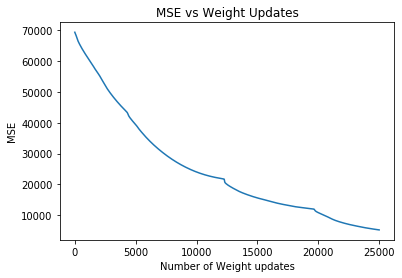

In [53]:
model_loss.head()
import matplotlib.pyplot as plt
plt.plot(model_loss.index,model_loss.mse)
 
# Add title and axis names
plt.title('MSE vs Weight Updates')
plt.xlabel('Number of Weight updates')
plt.ylabel('MSE')
 
# Show graphic
plt.show()


## 2. NUMPY IMPLEMENTATION of d-2d-1 network

In [6]:
import numpy as np

In [7]:
xtrain_arr = x_train.to_numpy()
y_train_arr = y_train.to_numpy()

In [34]:
len(xtrain_arr)

13903

In [ ]:
no_layers = 2
weights_1 = np.random.normal(-1.0, 1.0, size=(len(xtrain_arr[0]), 2*len(xtrain_arr[0])))
weights_2 = np.random.normal(-1.0, 1.0, size=(2*len(xtrain_arr[0]), 1))
no_epochs = 100
learning_rate = 0.4
mse = []
epoch_inst = 1
while(epoch_inst <= no_epochs):
    
    delta2 = np.zeros(2*len(xtrain_arr[0]))
    delta1 = np.zeros((len(xtrain_arr[0]), 2*len(xtrain_arr[0])))
    sse = 0
    for i in range(len(xtrain_arr)):  ### Row wise iteration
        output1 = xtrain_arr[i].dot(weights_1)  ###24 Net inputs to every node (dot product of 12 for each of the 24 nodes & inputs)
        output1 = 1/(1+np.exp(-output1)) ### Sigmoid function on all 24 net inputs to 24 nodes of 1st hidden layer
        output2 = output1.dot(weights_2) ### dot products of 24 outputs from 24 nodes and 24 weights to get 1 final output
        output2 = 1/(1+np.exp(-output2)) ### sigmoid function on output of output node
        sse = sse + (y_train_arr[i]-output2[0])**2
        for j in range(len(weights_2)): ### Backpropogation to calculate & summate delta for each of the 24 weights of output node
            delta2[j] = delta2[j]+ (-1*(y_train_arr[i]-output2[0])*output2[0]*(1-output2[0])*output1[j])
    
        ## Backpropogation to calculate & sum delta for each of the 12 weights on all 24 nodes 
        for k in range(len(delta1[0])): 
            for l in range(len(delta1)):
                delta1[l][k] = delta1[l][k] + (-1*((y_train_arr[i]-output2[0])*output2[0]*(1-output2[0])*weights_2[k])*output1[k]*(1-output1[k])*xtrain_arr[i][l])

    ### Appending MSE after 1 epoch, i.e. after obtaining sse over entire batch
    print(epoch_inst,sse/len(xtrain_arr))
    mse.append(sse/len(xtrain_arr))
    
    ### Updating Weights2 and Weights1 after 1 epoch for batch gradient descent, i.e after running over all the rows after the end of inner for loop
    ### Weight is updated by taking average delta and multiplying with learning rate
    for t in range(len(weights_2)):
        #if delta2[t] > 0:
        weights_2[t] = weights_2[t] - learning_rate*(delta2[t]/len(xtrain_arr))
        #else:
        #    weights_2[t] = weights_2[t] - learning_rate*(delta2[t]/len(xtrain_arr))
    for x in range(len(weights_1)):
        for y in range(len(weights_1[0])):
            #if delta1[x][y] > 0:
            weights_1[x][y] = weights_1[x][y] - learning_rate*(delta1[x][y]/len(xtrain_arr))
            #else:
                #weights_1[x][y] = weights_1[x][y] - learning_rate*(delta1[x][y]/len(xtrain_arr))
    epoch_inst = epoch_inst+1

1 69432.92688055342
2 69329.18677994008
3 69218.340190711
4 69141.39422785497
5 69141.39420722066
6 69141.39418679672
7 69141.39416657941
8 69141.39414656669
9 69141.39412675591
10 69141.39410714484
11 69141.39408773098
12 69141.39406851209
13 69141.39404948482
14 69141.39403064885
15 69141.39401200002
16 69141.39399353624
17 69141.39397525517
18 69141.39395715557
19 69141.3939392351
20 69141.39392149048
21 69141.39390392034
22 69141.39388652169
23 69141.3938692932
24 69141.39385223354
25 69141.39383533853
26 69141.3938186078
27 69141.39380203902


In [52]:
np.exp(5)

148.4131591025766

In [17]:
delta1 = np.zeros((len(xtrain_arr[0]), 2*len(xtrain_arr[0])))
len(delta1[0])

24

In [24]:
xtrain_arr[0][10]

0.55

In [28]:
#weights_2[0] = weights_2[0] + 5
weights_2[0]

array([2.52114901])

In [ ]:
class LayerNode():
    def __init__(self, number_of_nodes, number_of_inputs):
        self.number_of_nodes = number_of_nodes
        self.number_of_inputs = number_of_inputs
        self.weights = np.random.normal(-1.0, 1.0, size=(
        number_of_inputs, number_of_nodes))  # initial weights using normal distribution
        self.bias = np.random.normal(-1.0, 1.0, size=(1, number_of_nodes))

class NeuralNetwork():
    def __init__(self, layer1, layer2):
        self.layer1 = layer1
        self.layer2 = layer2

    # Sigmoid activation function
    def __sigmoid(self, x):
        return (np.exp(x))/(1+np.exp(x))

    def calculate_error(self, labels, layer_output):
        return (np.negative(labels - layer_output))
    
    def calculate_mse(self, labels,layer_output):
        #  MSE loss
        return np.square(labels - layer_output).mean()

    def forward_pass(self, inputs):
        # Sum of dot product of each layer
        # Apply activation function to the layer sums

        # Pass the training sets through neural network
        z_layer_1 = np.dot(inputs, self.layer1.weights) + self.layer1.bias
        output_layer_1 = self.__sigmoid(z_layer_1)  # activation(1)

        z_layer_2 = np.dot(output_layer_1, self.layer2.weights) + self.layer2.bias
        output_layer_2 = z_layer_2  ## No activation

        return output_layer_1, output_layer_2

    def backward_pass(self, learning_rate, labels, training_inputs, output_layer_1, output_layer_2, output_layer_3):
        targets = labels
        # delta_layer2 = output_layer_2 - targets
        delta_layer2 = self.calculate_error(targets, output_layer_2)*output_layer_2
        delta_layer1 = (delta_layer2)* output_layer_2 * (1 - output_layer_2)*output_layer_1

        learning_rate_bias = 0.001

        # Adjust bias and weights
        self.layer2.weights -= learning_rate * output_layer_1.T.dot(delta_layer1)
        self.layer2.bias -= learning_rate_bias * (delta_layer2).sum(axis=0)

        self.layer1.weights -= learning_rate * training_inputs.T.dot(delta_layer1)
        self.layer1.bias -= learning_rate_bias * (delta_layer1).sum(axis=0)

    # print(learning_rate, delta_layer1)

    def train(self, batch_size, training_inputs, labels, n_epochs, learning_rate, filename):
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        for j in range(n_epochs):
            i = 0
            print("/// EPOCH: ", j + 1, "/", n_epochs, " ///")

            output_layer_1, output_layer_2, output_layer_3 = self.forward_pass(training_inputs)
            layer3_error = self.calculate_error(labels, output_layer_3)
            self.backward_pass(learning_rate, labels, training_inputs, output_layer_1, output_layer_2, output_layer_3)

            error_result = layer3_error / len(output_layer_3)
            print("\nError: ", error_result)

            costs.append(error_result)

        print("Saving...")
        # dill.dump_session(filename)

    def test_accuracy(self, test_inputs, test_outputs, filename):
        # dill.load_session(filename)
        output_layer_1, output_layer_2, output_layer_3 = self.forward_pass(test_inputs)
        number_of_instance = len(test_outputs)
        nearest_node = np.argmax(output_layer_3, axis=1)
        test_real_value = np.argmax(test_outputs, axis=1)
        correct = (nearest_node == test_real_value).sum()
        print("Accuracy: ", correct * 100 / number_of_instance, "%")

    # The neural network prints its weights
    def print_weights(self):
        print("============= LAYER 1 =============")
        print("------------ WEIGHT 1 -------------:")
        print(self.layer1.weights)
        print("------------ BIAS 1 -------------:")
        print(self.layer1.bias)
        print("============= LAYER 2 =============")
        print("------------ WEIGHT 2 -------------:")
        print(self.layer2.weights)
        print("------------ BIAS 2 -------------:")
        print(self.layer2.bias)
        print("============= LAYER 3 =============")
        print("------------ WEIGHT 3 -------------:")
        print(self.layer3.weights)
        print("------------ BIAS 3 -------------:")
        print(self.layer3.bias)


if __name__ == "__main__":
    print("Starting...")

    print("Training...")
    # Seed random generator
    np.random.seed(1)

    # Initialize number of nodes of each layer
    number_of_inputs_node = 28 * 28
    number_of_layer1_node = 128
    number_of_layer2_node = 64
    number_of_outputs_node = 10

    # Create layers of neural network
    layer1 = LayerNode(number_of_layer1_node, number_of_inputs_node)
    layer2 = LayerNode(number_of_layer2_node, number_of_layer1_node)
    layer3 = LayerNode(number_of_outputs_node, number_of_layer2_node)

    # Combine each layer into a neural network
    neural_network = NeuralNetwork(layer1, layer2, layer3)

    print("Stage 1) Random starting synaptic weights: ")
    #neural_network.print_weights()

    # Define number of training data
    n_training = 60000
    # Load training sets
    training_inputs = LoadMNISTSets("train-images.idx3-ubyte", n_training)
    training_outputs = LoadMNISTLabel("train-labels.idx1-ubyte", n_training)

    # Train the network using training sets
    neural_network.train(1, training_inputs, training_outputs, n_epochs=100, learning_rate=0.01, filename="model.pkl")

    print("Stage 2) New synaptic weights after training: ")
    #neural_network.print_weights()

    print("Testing...")
    # Define number of test data
    n_test = 10000
    # Load test data
    test_inputs = LoadMNISTSets("train-images.idx3-ubyte", n_test)
    test_outputs = LoadMNISTLabel("train-labels.idx1-ubyte", n_test)

    # Test and check accuracy of the neural network
    neural_network.test_accuracy(test_inputs, test_outputs, filename="model.pkl")